### gnomad data deal
#### gnomad data were download from GnomAD3.1.2 （URL: https://gnomad.broadinstitute.org/downloads）, and used those bash shell to filter.


In [ ]:
# @gnomad.tsvTrans.py
import gzip
import re
import sys
#AC=1;AN=33673;AF=2.96974e-05;
with gzip.open(sys.argv[1],'rt')as fr,open(sys.argv[2],'w')as fw:
    for line in fr:
        if line.startswith("#"): continue
        chromosome,pos,ID,ref,alt,anno,fiter,info=line.strip().split("\t")
        pp = re.match(".*AC=(\d*);AN=(\d*);AF=(.*?);",info)
        ac,an,af=pp[1],pp[2],pp[3]
        vep = re.match('.*vep=(.*)|',info)
        if not vep[1]:
            fw.write("\t".join([chromosome,pos,str(int(pos)+1),ref,alt,ac,an,af,"NA"])+"\n")
        else:
            tmp = []
            for _ in vep[1].split(","):
                tmp.append("|".join(_.split("|")[:4]))
            fw.write("\t".join([chromosome,pos,str(int(pos)+1),ref,alt,ac,an,af,",".join(tmp)])+"\n")


#### commad
``` bcftools filter --threads 4 -i '%TYPE="snp" && %FILTER="PASS" && lcr==0 && segdup==0' -o gnomad.genomes.v3.1.sites.chr*.pass_snps.vcf.gz -O z /public1/home/Suilab/GnomAD/gnomad.genomes.v3.1.2.sites.chr*.vcf.bgz```
```python gnomad.tsvTrans.py gnomad.genomes.v3.1.sites.chr*.pass_snps.vcf.gz gnomad.genomes.v3.1.sites.chr*.pass_snps.tsv```
```cat gnomad.genomes.v3.1.sites.chr*.pass_snps.tsv |gzip > gnomad.genomes.v3.1.sites.pass_snps.tsv.gz```
#### file type
```chr1	821401	821402	G	A	2346	144942	0.0161858	A|downstream_gene_variant|MODIFIER|FAM87B ```
#### commad
```
cd /disk2/G4_MS/reference
cat /disk2/G4_MS/promoter_select/promoter_info/promoter.annotion.tsv /disk2/G4_MS/promoter_select/promoter_info/promoter_info.annotion.H3K4me3.tsv |cut -f1-3|grep -v "Chromosome"|sort -k1,1 -k2,2n|uniq|bedtools merge -i - |awk -v OFS="\t" '{print $1,$2-200,$3+200}' | bedtools intersect -a gnomad.genomes.v3.1.sites.pass_snps.tsv.gz -b - -wa -sorted |gzip > promoter_gnomad.genomes.v3.1.sites.pass_snps.tsv.gz

```

#### constraint LOEUF metric download from GnomAD: https://storage.googleapis.com/gcp-public-data--gnomad/release/2.1.1/constraint/gnomad.v2.1.1.lof_metrics.by_transcript.txt.bgz
```
reference:
The mutational constraint spectrum quantified from variation in 141,456 humans. Nature 581, 434–443 (2020)
```

#### allele frequency analysis 
``` 
the constraint non-promoter method was referred to Lee et.al,Integrative analysis reveals RNA G-quadruplexes in UTRs are selectively constrained and enriched for functional associations,Nat Commun,2020.
```
 

meta NOT subset; don't know how to subset; dropped


<Figure size 640x480 with 0 Axes>

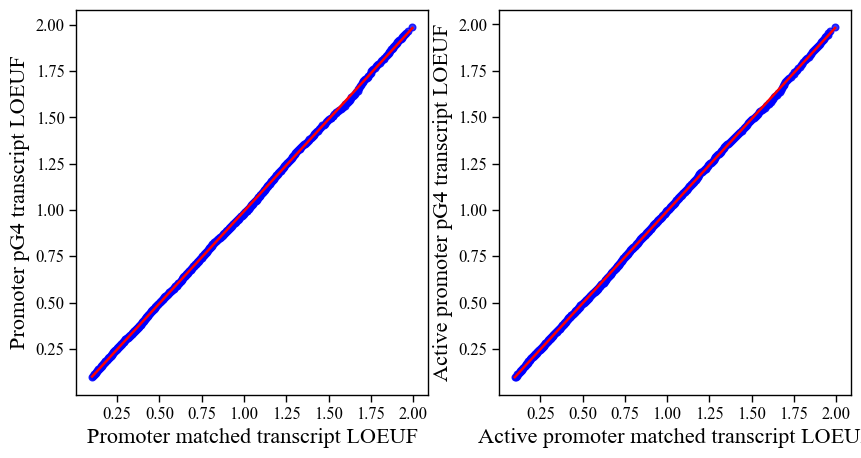

tssg4 gruns 0.0
tssg4_stable gruns  0.0
tssg4_unstable gruns  0.0
*******
activate promoter gruns  0.0
activate promoter stabe gruns  0.0
activate promoter unstable gruns 0.0


meta NOT subset; don't know how to subset; dropped


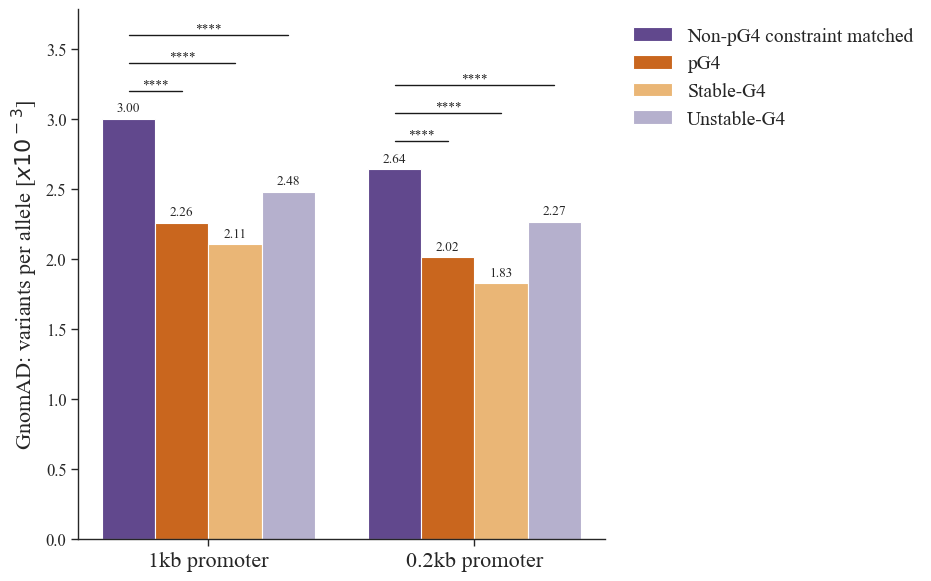

tssG4: flank1 vs nonG4 0.0
tssG4: G4 vs nonG4 0.0
tssG4: flank2 vs nonG4 0.0
tssG4: G4 vs flank 0.0
eG4: flank1 vs nonG4 0.0
eG4: G4 vs nonG4 0.0
eG4: flank2 vs nonG4 0.0
eG4: G4 vs flank 0.0
tssG4_stable: flank1 vs nonG4 0.0
tssG4_stable: G4 vs nonG4 0.0
tssG4_stable: flank2 vs nonG4 0.0
tssG4_stable: G4 vs flank 0.0
eG4_stable: flank1 vs nonG4 0.0
eG4_stable: G4 vs nonG4 0.0
eG4_stable: flank2 vs nonG4 0.0
eG4_stable: G4 vs flank 0.0
tssG4_stable: flank1 vs nonG4 0.0
tssG4_stable: G4 vs nonG4 0.0
tssG4_stable: flank2 vs nonG4 0.0
tssG4_stable: G4 vs flank 0.0
eG4_stable: flank1 vs nonG4 0.0
eG4_stable: G4 vs nonG4 0.0
eG4_stable: flank2 vs nonG4 0.0
eG4_stable: G4 vs flank 0.0


meta NOT subset; don't know how to subset; dropped


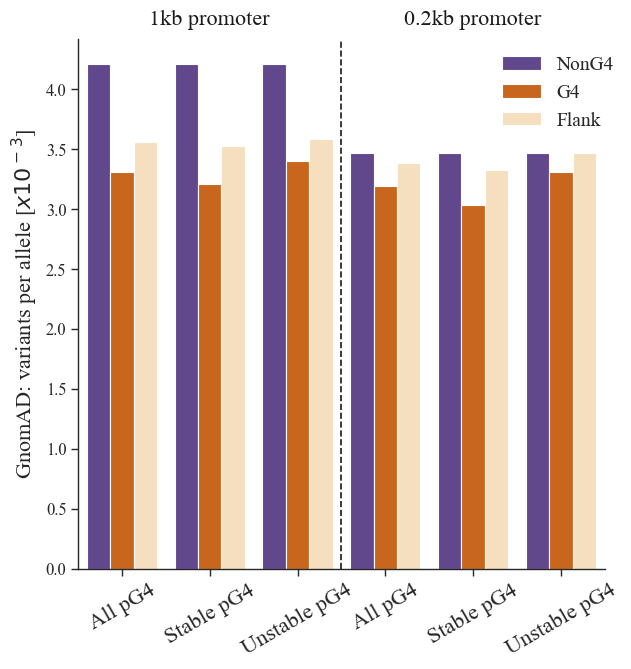

meta NOT subset; don't know how to subset; dropped


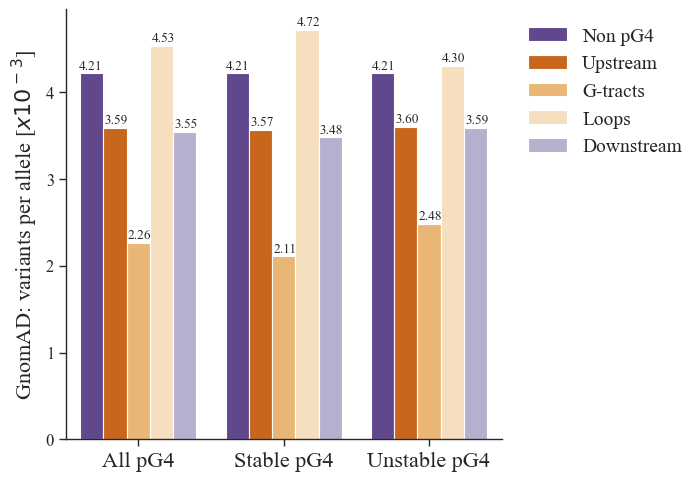

meta NOT subset; don't know how to subset; dropped


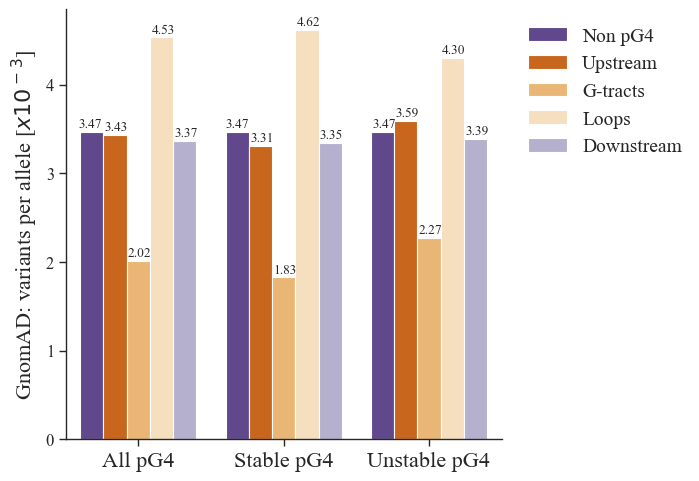

cgc
G4 all genes: 552 |||G4 stable genes:  462 |||G4 unstable genes:  389 |||NonG4genes:  337 |||overlap genes: 204
cgc
G4 all genes: 450 |||G4 stable genes:  339 |||G4 unstable genes:  245 |||NonG4genes:  319 |||overlap genes: 150
tsg
G4 all genes: 773 |||G4 stable genes:  627 |||G4 unstable genes:  551 |||NonG4genes:  455 |||overlap genes: 299
tsg
G4 all genes: 605 |||G4 stable genes:  455 |||G4 unstable genes:  327 |||NonG4genes:  462 |||overlap genes: 217
clinvar
G4 all genes: 3440 |||G4 stable genes:  2772 |||G4 unstable genes:  2375 |||NonG4genes:  2363 |||overlap genes: 1131
clinvar
G4 all genes: 2501 |||G4 stable genes:  1829 |||G4 unstable genes:  1325 |||NonG4genes:  2333 |||overlap genes: 756


meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


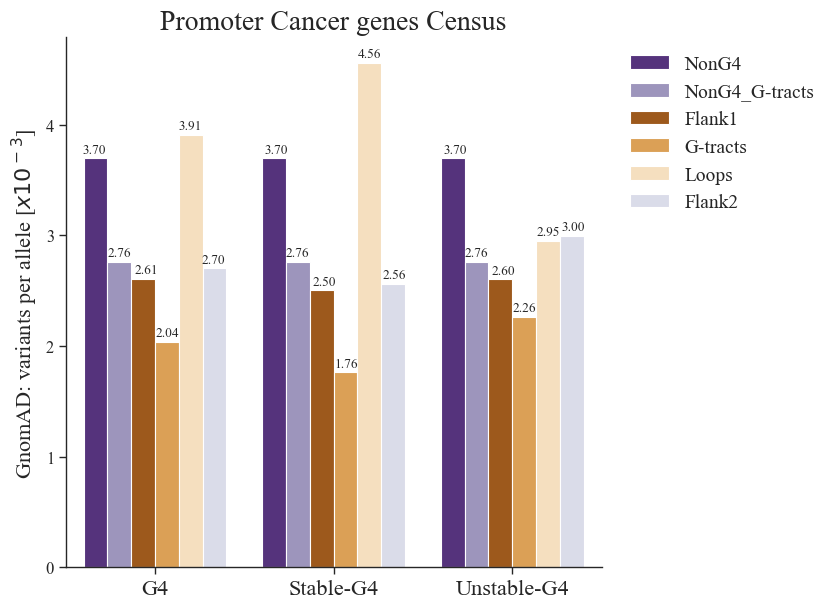

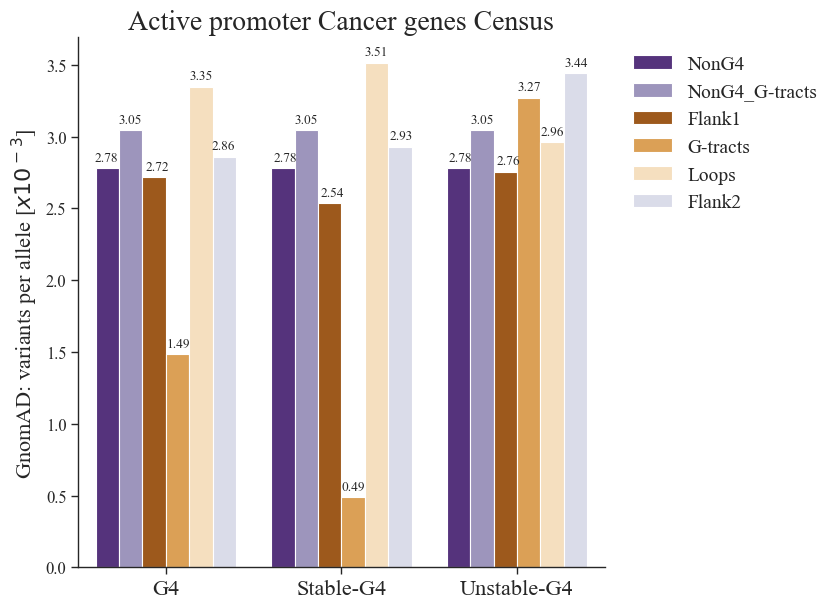

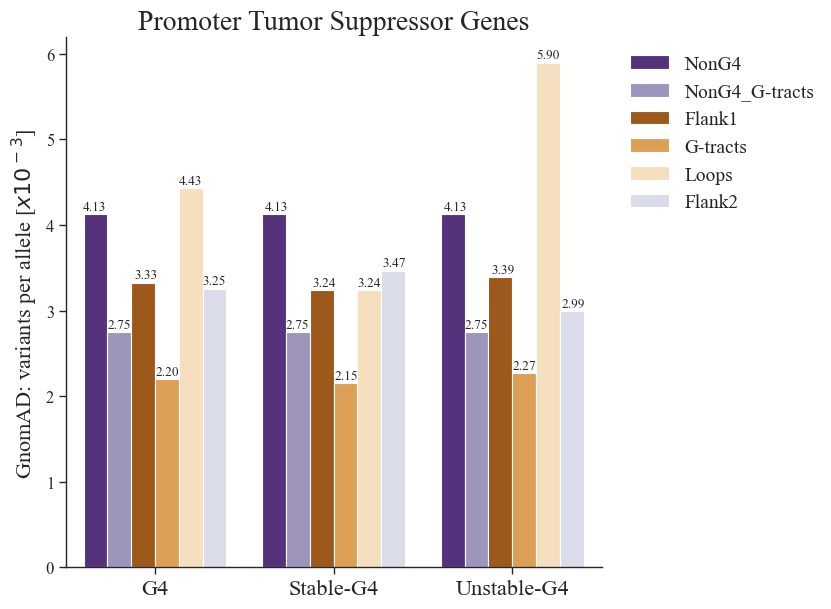

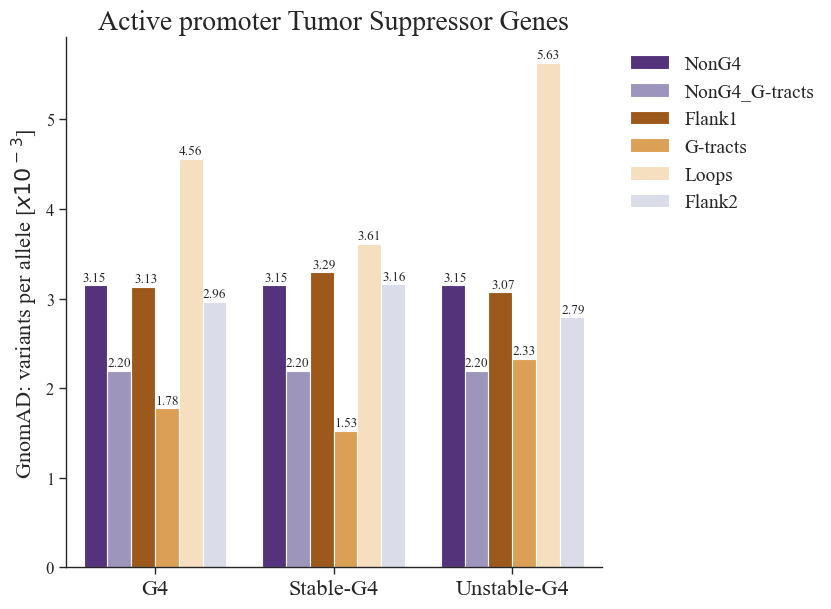

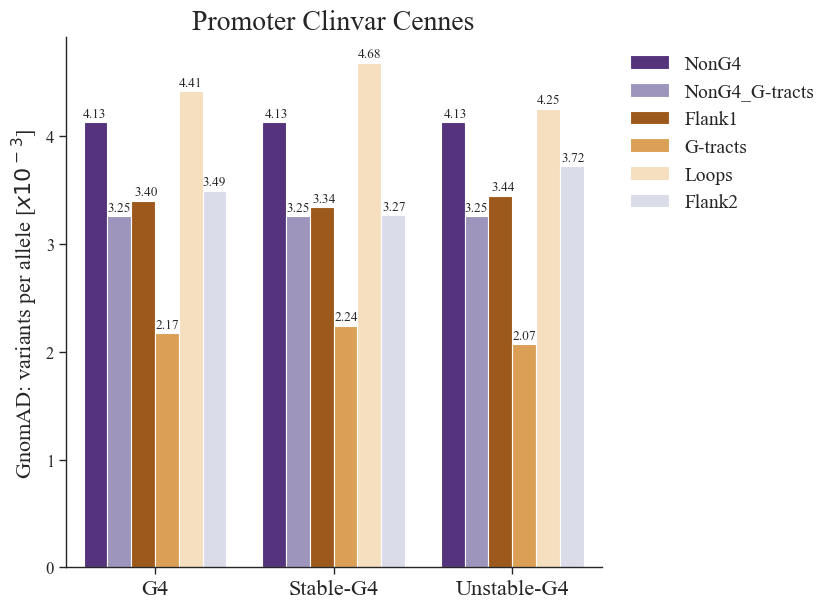

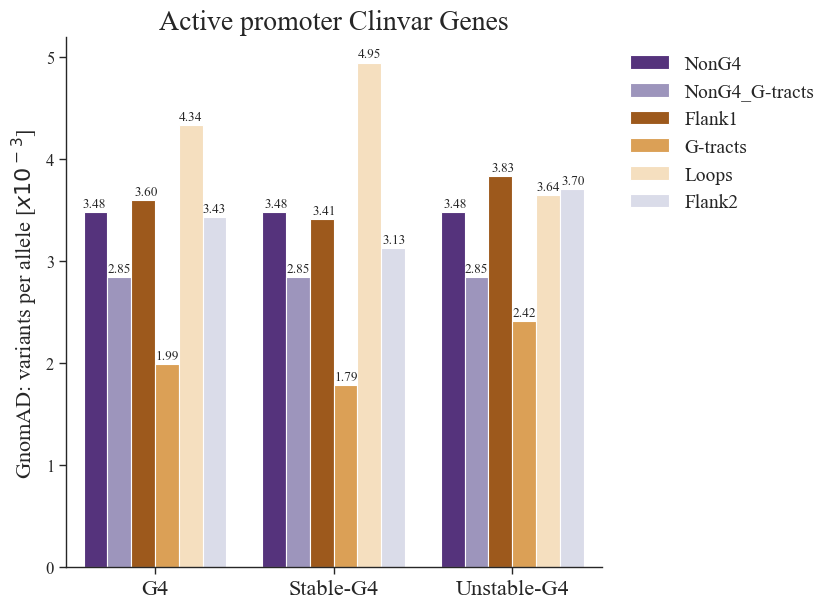

In [1]:
import os, sys, gzip
import pandas as pd
import numpy as np
import pyranges as pr
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats
from itertools import groupby
import re


## 
def x2test(G4ac, G4an, noG4ac, noG4an):
    G4ac = int(G4ac)
    G4an = int(G4an)
    noG4ac = int(noG4ac)
    noG4an = int(noG4an)
    matric = [[G4ac, noG4ac], [G4an - G4ac, noG4an - noG4ac]]
    return scipy.stats.chi2_contingency(matric)

def Fisher_exat(G4ac, G4an, noG4ac, noG4an):
    G4ac = int(G4ac)
    G4an = int(G4an)
    noG4ac = int(noG4ac)
    noG4an = int(noG4an)
    matric = [[G4ac, G4an - G4ac], [noG4ac, noG4an - noG4ac]]
    return scipy.stats.fisher_exact(matric)[1]

def constrant_random_select(oriconstrant_table, constrant_table, n):
#     def tmp(df,n):
#         if df.shape[0] < n:
#             return df
#         else:
#             return df.sample(n, random_state=100)

    constrant_quantile = oriconstrant_table["oe_lof_upper"].quantile([0.25, 0.5, 0.75])
    df_q1 = constrant_table[constrant_table["oe_lof_upper"] < constrant_quantile[0.25]]
    df_q2 = constrant_table[(constrant_table["oe_lof_upper"] >= constrant_quantile[0.25]) & (
            constrant_table["oe_lof_upper"] < constrant_quantile[0.5])]
    df_q3 = constrant_table[(constrant_table["oe_lof_upper"] >= constrant_quantile[0.5]) & (
            constrant_table["oe_lof_upper"] < constrant_quantile[0.75])]
    df_q4 = constrant_table[constrant_table["oe_lof_upper"] >= constrant_quantile[0.75]]
    
    select_N = min([df_q1.shape[0],df_q2.shape[0], df_q3.shape[0], df_q4.shape[0]])
    if select_N < n:
        n = select_N
    df_q1 = df_q1.sample(n, random_state=100)
    df_q2 = df_q2.sample(n, random_state=100)
    df_q3 = df_q3.sample(n, random_state=100)
    df_q4 = df_q4.sample(n, random_state=100)
    df = pd.concat([df_q1, df_q2, df_q3, df_q4])
    return df.transcript

def file_check(workpath):
    if not os.path.exists(workpath):
        print(f"{workpath} is not exist, the procession will be exit!!!")
        sys.exist(1)
    else:
        return workpath

def G4a_all_get(df):
    result = []
    df = df.drop_duplicates(keep="first")
    df = df[df.Name.map(lambda x:len(x)) <100]
    for index, row in df.iterrows():
        plusflg = True
        if row["Strand"] == "-": plusflg = False
        # tp_track = Gtrack_get(row.Name, plus=plusflg)
        if plusflg:
            flank1 = [row.Chromosome, row.Start - 100, row.Start, "+", "flank1"]
            flank2 = [row.Chromosome, row.End, row.End + 100, "+", "flank2"]
            G4 = [row.Chromosome, row.Start, row.End, "+", "G4"]
        else:
            flank2 = [row.Chromosome] + [row.Start - 100, row.Start, "-", "flank2"]
            flank1 = [row.Chromosome] + [row.End, row.End + 100, "-", "flank1"]
            G4 = [row.Chromosome, row.Start, row.End, "-", "G4"]
        result += [flank1, G4, flank2]
    return result

def Gtrack_get(seq, plus=True):
    result = []
    ggg = []
    seqindex = []
    for index, val in enumerate(list(seq)):
        if plus:
            if val == 'g' or val == 'G':
                ggg.append(index)
        else:
            if val == 'c' or val == 'C':
                ggg.append(index)
    for k, g in groupby(enumerate(ggg), lambda x: x[1] - x[0]):
        _ = [j for i, j in g]
        if len(_) >= 3:
            seqindex.append(_)
    if len(seqindex) > 0:
        for idx in seqindex:
            result.append((idx[0], idx[-1] + 1))
    return result

def G4_info(df):
    result = []
    df = df.drop_duplicate_positions(keep="first")
    df = df[df.Name.map(lambda x:len(x)) < 100]
    for index, row in df.as_df().iterrows():
        plusflg = True
        if row.Strand == "-": plusflg = False
        tp_track = Gtrack_get(row.Name, plus=plusflg)
        gtract_count = 0
        if plusflg:
            flank1 = [row.Chromosome, row.Start + tp_track[0][0] - 100, row.Start + tp_track[0][0], "+", "flank1"]
            flank2 = [row.Chromosome, row.Start + tp_track[-1][1], row.Start + tp_track[-1][1] + 100, "+", "flank2"]
            result += [flank1,flank2]
            while gtract_count < len(tp_track):
                gtract_index = tp_track[gtract_count]
                stem = [row.Chromosome] + [int(row.Start) + gtract_index[0], int(row.Start)+gtract_index[1]] + ["+", "stem{}".format(gtract_count+1)]
                result.append(stem)
                if gtract_count != len(tp_track)-1:
                    loop_index = [tp_track[gtract_count][1], tp_track[gtract_count+1][0]]
                    loop = [row.Chromosome] + [int(row.Start) + loop_index[0], int(row.Start)+ loop_index[1]] + ["+", "loop{}".format(gtract_count+1)]
                    result.append(loop)
                gtract_count += 1
        else:
            flank2 = [row.Chromosome] + [row.Start + tp_track[0][0] - 100, row.Start + tp_track[0][0], "-", "flank2"]
            flank1 = [row.Chromosome] + [row.Start + tp_track[-1][1], row.Start + tp_track[-1][1] + 100, "-", "flank1"]
            result += [flank1,flank2]
            while gtract_count < len(tp_track):
                gtract_index = tp_track[gtract_count]
                stem = [row.Chromosome] + [int(row.Start) + gtract_index[0], int(row.Start)+gtract_index[1]] + ["-", "stem{}".format(len(tp_track) - gtract_count)]
                result.append(stem)
                if gtract_count != len(tp_track)-1:
                    loop_index = [tp_track[gtract_count][1], tp_track[gtract_count+1][0]]
                    loop = [row.Chromosome] + [int(row.Start) + loop_index[0], int(row.Start)+ loop_index[1]] + ["+", "loop{}".format(len(tp_track) - gtract_count)]
                    result.append(loop)
                gtract_count += 1
    return result

def chromosome_filter(gr_df, constrant_id, constrant=False):
    gr_df = gr_df[(gr_df.Chromosome != "chrX") & (gr_df.Chromosome != "chrY")]
    gr_df.transcript_id = gr_df.transcript_id.map(lambda x: x.split(".")[0])
    if constrant:
        gr_df = gr_df[gr_df.transcript_id.isin(constrant_id)]
    return gr_df

def foo(tmp):
    if len(tmp) > 1:
        tt = tmp[0]
        tmp_index_list = [int(_[5]) for _ in tmp]
        tmp_index = tmp_index_list.index(max(tmp_index_list))
        tt[4] = tmp[tmp_index][4]
        tt[5] = sum(tmp_index_list)
        tt[6] = max([int(_[6]) for _ in tmp])
        tt[7] = tt[5]/tt[6]
        tt[8] = tmp[tmp_index][8]
    else:
        tt = tmp[0]
        tt[5] = int(tt[5])
        tt[6] = int(tt[6])
        tt[7] = float(tt[7])
    return tt

class G4Deal():
    def __init__(self, G4):
        self.G4 = pr.PyRanges(pd.DataFrame(G4_info(G4.max_disjoint(slack=100)), columns=["Chromosome","Start","End","Strand", "Name"]))
    def G4_subtype(self,cds):
        self.gruns = self.G4[self.G4.Name.isin(["stem"+str(i) for i in range(40)])].subtract(cds, strandedness = False)
        self.loops = self.G4[self.G4.Name.isin(["loop"+str(i) for i in range(40)])].subtract(cds, strandedness = False)
        self.flank1 = self.G4[self.G4.Name.isin(["flank1"])].subtract(cds, strandedness = False)
        self.flank2 = self.G4[self.G4.Name.isin(["flank2"])].subtract(cds, strandedness = False)
        self.g4 = self.G4[self.G4.Name.isin(["stem"+str(i) for i in range(40)] + ["loop"+str(i) for i in range(40)])
                         ].subtract(cds, strandedness = False)
        self.flank = self.G4[self.G4.Name.isin(["flank1","flank2"])].subtract(cds, strandedness = False)
        
    def snp_overlap(self,snp):
        self.gruns_snp = snp.overlap(self.gruns, strandedness=False)
        self.loops_snp = snp.overlap(self.loops, strandedness=False)
        self.flank1_snp = snp.overlap(self.flank1, strandedness=False)
        self.flank2_snp = snp.overlap(self.flank2, strandedness=False)
        self.g4_snp = snp.overlap(self.g4, strandedness=False)
        self.flank_snp = snp.overlap(self.flank, strandedness=False)
    
    def ac_an_count(self):
        self.gruns_snp_ac, self.gruns_snp_an = self.gruns_snp.AC.sum(), self.gruns_snp.AN.sum()
        self.loops_snp_ac, self.loops_snp_an = self.loops_snp.AC.sum(), self.loops_snp.AN.sum()
        self.flank1_snp_ac, self.flank1_snp_an = self.flank1_snp.AC.sum(), self.flank1_snp.AN.sum()
        self.flank2_snp_ac, self.flank2_snp_an = self.flank2_snp.AC.sum(), self.flank2_snp.AN.sum()
        self.g4_snp_ac, self.g4_snp_an = self.g4_snp.AC.sum(), self.g4_snp.AN.sum()
        self.flank_snp_ac, self.flank_snp_an = self.flank_snp.AC.sum(), self.flank_snp.AN.sum()


def gene_select(G4info, nonG4info, genes, key="cgc"):
    result = []
    G4info_gene = G4info[G4info.gene_id.isin(genes)]
    G4info_gene.as_df().to_csv(os.path.join(wd_path,key + "G4.genes.annotinon.tsv"),sep="\t",index=False)
    G4info_stable_gene = G4info_gene[G4info_gene.Score > 19]
    G4info_unstable_gene = G4info_gene[G4info_gene.Score <= 19]
    for p in [G4info_gene, G4info_stable_gene, G4info_unstable_gene]:
        p=G4Deal(p)
        p.G4_subtype(cds)
        p.snp_overlap(snp)
        p.ac_an_count()
        result.append(p)
    nonG4_genes = nonG4info[nonG4info.gene_id.isin(genes)]
    print(key)
    print("G4 all genes:", G4info_gene.gene_id.drop_duplicates().shape[0],"|||G4 stable genes: ",
         G4info_stable_gene.gene_id.drop_duplicates().shape[0], "|||G4 unstable genes: ",
         G4info_unstable_gene.gene_id.drop_duplicates().shape[0],"|||NonG4genes: ",
         nonG4_genes.gene_id.drop_duplicates().shape[0],"|||overlap genes:", 
         len(set(G4info_gene.gene_id).intersection(set(nonG4_genes.gene_id)))
         )
    nonG4_genes_gruns = gruns.overlap(nonG4_genes,strandedness=False)
    nonG4_genes_gruns_snp = snp.overlap(nonG4_genes_gruns)
    nonG4_genes_snp = snp.overlap(nonG4_genes)
    
    nonG4_genes_gruns_snp_ac, nonG4_genes_gruns_snp_an = nonG4_genes_gruns_snp.AC.sum(), nonG4_genes_gruns_snp.AN.sum()
    nonG4_genes_snp_ac, nonG4_genes_snp_an = nonG4_genes_snp.AC.sum(), nonG4_genes_snp.AN.sum()
    return result,nonG4_genes_gruns_snp_ac, nonG4_genes_gruns_snp_an, nonG4_genes_snp_ac, nonG4_genes_snp_an

def write_df(G4_genes,nonG4_genes, key, tss=True):
    """
    G4_genes: the dict type data restore the G4 genes class info
    nonG4_genes: the dict type data restore the non G4 genes snp AC and AN numbers
    key: geneSet selected such as Cancer Gene Census (cgc), tsg and clinvar genes
    tss: whether the analysis is promoter or active promoter
    """
    if tss:
        nonG4Number = 0
        pos_start = 0
        pos_end = 3
        promoter = "Promoter"
    else:
        nonG4Number = 4
        pos_start = 3
        pos_end = 6
        promoter = "Active promoter"
    stem_loop = {}
    stem_loop["sample"] = ["Flank1"]*3 + ["G-tracts"]*3 + ["Loops"]*3 + ["Flank2"]*3 + ["NonG4_G-tracts"]*3 + ["NonG4"]*3
    stem_loop["ac"] = [
        p.flank1_snp_ac for p in G4_genes[key][pos_start:pos_end]] + [
        p.gruns_snp_ac for p in G4_genes[key][pos_start:pos_end]] + [
        p.loops_snp_ac for p in G4_genes[key][pos_start:pos_end]] + [
        p.flank2_snp_ac for p in G4_genes[key][pos_start:pos_end]]+ [
        nonG4_genes[key][nonG4Number],nonG4_genes[key][nonG4Number],nonG4_genes[key][nonG4Number]]+[
        nonG4_genes[key][nonG4Number+2],nonG4_genes[key][nonG4Number+2],nonG4_genes[key][nonG4Number+2]
    ]
        
    stem_loop["an"] = [
        p.flank1_snp_an for p in G4_genes[key][pos_start:pos_end]] + [
        p.gruns_snp_an for p in G4_genes[key][pos_start:pos_end]] + [
        p.loops_snp_an for p in G4_genes[key][pos_start:pos_end]] + [
        p.flank2_snp_an for p in G4_genes[key][pos_start:pos_end]]+ [
        nonG4_genes[key][nonG4Number+1],nonG4_genes[key][nonG4Number+1],nonG4_genes[key][nonG4Number+1]]+[
        nonG4_genes[key][nonG4Number+3],nonG4_genes[key][nonG4Number+3],nonG4_genes[key][nonG4Number+3]
    ]

    stem_loop["groups"] = ["G4", "Stable-G4", "Unstable-G4"]*6
    stem_loop["promoter_class"] = [promoter]*18
    stem_loop = pd.DataFrame(stem_loop)
    stem_loop.sort_values("groups")
    stem_loop.loc[:,"frequency"] = stem_loop.apply(lambda x: x["ac"]/x["an"] *1000,axis=1)
    return stem_loop
        
def convert_pvalue_to_asterisks(pvalue):
    if pvalue <= 0.0001:
        return "****"
    elif pvalue <= 0.001:
        return "***"
    elif pvalue <= 0.01:
        return "**"
    elif pvalue <= 0.05:
        return "*"
    return "ns"

def cancergene_fig_ploted(df,outputFileName,titles):
    mpl.rcParams["pdf.fonttype"] = 42
    mpl.rcParams["ps.fonttype"] = 42
    plt.rcParams['font.sans-serif']=['Times New Roman']

    sns.set_context("paper")
    sns.set(style="ticks", context="paper",rc={'font.sans-serif':['Times New Roman']})

    ax = sns.catplot(x="groups", y="frequency",hue="sample",kind="bar",
                     hue_order=["NonG4","NonG4_G-tracts","Flank1","G-tracts","Loops","Flank2"],
                palette=['#542788','#998ec3','#b35806','#f1a340','#fee0b6','#d8daeb'],
                height=6,data=df,
                legend=False
           )

    xrange=[
            -0.05, 0.95, 1.95, 
            0.07, 1.07, 2.07, 
            0.2, 1.2, 2.2,
            0.33, 1.34, 2.34,
            -0.2, 0.8, 1.8, 
            -0.34, 0.68, 1.68
            
           ]
    for x,y in zip(xrange,df.frequency): # get the height of each bar 
        plt.text(x = x , 
            y = y + 0.05, # y-coordinate position of data label, padded 100 above bar 
            s = '{:.2f}'.format(y), # data label, formatted to ignore decimals 
            ha = 'center') # sets horizontal alignment (ha) to center
    
    plt.title("{titles}".format(titles=titles),size=20)
    plt.xticks([0,1,2],["G4","Stable-G4","Unstable-G4"], size=16)

    plt.yticks(size=12)
    plt.xlabel('',size=16)
    plt.ylabel( "GnomAD: variants per allele [$x10^-$$^3$]", size=16)

    plt.legend(title = "", fontsize = 14, title_fontsize = 14, bbox_to_anchor=(1.02,1),frameon=False)
    plt.savefig(outputFileName)

if __name__ == "__main__":
    wd_path = "/disk2/G4_MS/frequency/gruns_gnomad_frequency"
    if not os.path.exists(wd_path):
        os.mkdir(wd_path)
    reference_path = file_check("/disk2/G4_MS/reference")
    constrant = pd.read_table(os.path.join(reference_path,"gnomad.v2.1.1.lof_metrics.by_transcript.txt"))
    cds = pr.read_bed(os.path.join(reference_path,"gencode38.cds_region.bed"))
    
    G4_path = file_check("/disk2/G4_MS/promoter_select/promoter_info")
    tss_prmtr_G4_path = file_check(os.path.join(G4_path,"promoter_pG4.info.tsv"))
    tss_prmtr_noG4_path = file_check(os.path.join(os.path.join(G4_path,"promoter_nopG4.info.tsv")))
    
    ac_prmtr_G4_path = file_check(os.path.join(G4_path,"promoter_pG4.info.H3K4me3.tsv"))
    ac_prmtr_noG4_path = file_check(os.path.join(G4_path,"promoter_nopG4.info.H3K4me3.tsv"))
    
    tssG4 = pr.PyRanges(pd.read_table(tss_prmtr_G4_path))
    tssG4_ori = chromosome_filter(tssG4,constrant.transcript)
    tssNonG4_ori = pr.PyRanges(pd.read_table(tss_prmtr_noG4_path))
    tssNonG4 = chromosome_filter(tssNonG4_ori,constrant.transcript, constrant=True)
    
    tssG4_stable_ori = tssG4_ori[tssG4_ori.Score > 19]
    tssG4_unstable_ori = tssG4_ori[tssG4_ori.Score <= 19]
    
    eG4 = pr.PyRanges(pd.read_table(ac_prmtr_G4_path))
    eG4_ori = chromosome_filter(eG4,constrant.transcript)
    eNonG4_ori = pr.PyRanges(pd.read_table(ac_prmtr_noG4_path))
    eNonG4 = chromosome_filter(eNonG4_ori, constrant.transcript, constrant=True)
    
    eG4_stable_ori = eG4_ori[eG4_ori.Score > 19]
    eG4_unstable_ori = eG4_ori[eG4_ori.Score <= 19]
    ### constrant
    constrant_tss_nopG4 = constrant[constrant.transcript.isin(tssNonG4.transcript_id)]
    constrant_eNonG4 = constrant[constrant.transcript.isin(eNonG4.transcript_id)]
    tssG4_sample_N = tssG4_ori[tssG4_ori.transcript_id.isin(constrant.transcript)].transcript_id.drop_duplicates().shape[0]/4
    constrant_tssnoG4_txid = constrant_random_select(constrant[constrant.transcript.isin(tssG4_ori.transcript_id)
                                                              ],constrant_tss_nopG4,int(tssG4_sample_N))
    eG4_sample_N = eG4_ori[eG4_ori.transcript_id.isin(constrant.transcript)].transcript_id.drop_duplicates().shape[0]/4
    constrant_enoG4_txid = constrant_random_select(constrant[constrant.transcript.isin(eG4_ori.transcript_id)
                                                            ],constrant_eNonG4,int(eG4_sample_N))
    #  QQ fig drown
    mpl.rcParams["pdf.fonttype"] = 42
    mpl.rcParams["ps.fonttype"] = 42
    plt.rcParams['font.sans-serif']=['Times New Roman']
    sns.set_context("paper")
    fig = plt.figure(1)
    plt.figure(figsize=(10,5))
    tsspG4_LOEUF = sorted([np.percentile(constrant[constrant.transcript.isin(tssG4_ori.transcript_id)]["oe_lof_upper"].dropna().values ,i
                                        ) for i in np.linspace(1,100,500)],reverse=True)
    tssNonpG4_LOEUF = sorted([np.percentile(constrant[constrant.transcript.isin(constrant_tssnoG4_txid)]["oe_lof_upper"].dropna().values ,i
                                           ) for i in np.linspace(1,100,500)],reverse=True)

    epG4_LOEUF = sorted([np.percentile(constrant[constrant.transcript.isin(eG4_ori.transcript_id)]["oe_lof_upper"].dropna().values ,i
                                      ) for i in np.linspace(1,100,500)],reverse=True)
    eNonpG4_LOEUF = sorted([np.percentile(constrant[constrant.transcript.isin(constrant_enoG4_txid)]["oe_lof_upper"].dropna().values ,i
                                         ) for i in np.linspace(1,100,500)],reverse=True)
    ax1 = plt.subplot(1,2,1)
    sns.regplot(x=pd.Series(tssNonpG4_LOEUF),y=pd.Series(tsspG4_LOEUF), ci=None, color="blue",line_kws={'color':"red"})
    plt.xticks(size=12)
    plt.yticks(size=12)
    plt.xlabel('Promoter matched transcript LOEUF',size=16)
    plt.ylabel( 'Promoter pG4 transcript LOEUF',size=16)
    ax2 = plt.subplot(1,2,2)
    sns.regplot(x=pd.Series(eNonpG4_LOEUF),y=pd.Series(epG4_LOEUF), ci=None, color="blue",line_kws={'color':"red"})
    plt.xticks(size=12)
    plt.yticks(size=12)
    plt.xlabel('Active promoter matched transcript LOEUF',size=16)
    plt.ylabel( 'Active promoter pG4 transcript LOEUF',size=16)
    plt.savefig(os.path.join(wd_path,"constrant.qq.pdf"))
    plt.show()
###
    snp = []
    
    with gzip.open(os.path.join(reference_path,"promoter_gnomad.genomes.v3.1.sites.pass_snps.tsv.gz"),"rt")as fr:
        tmp = []
        for line in fr:
            uline = line.strip().split("\t")
            if len(tmp) == 0:
                tmp.append(uline)
                continue
            if tmp[0][0] != uline[0] or tmp[0][1] != uline[1] or tmp[0][2] != uline[2]:
                tt = foo(tmp)
                snp.append(tt)
                tmp.clear()
                tmp.append(uline)
            else:
                tmp.append(uline)
        tt = foo(tmp)
        snp.append(tt)
    snp = pr.PyRanges(pd.DataFrame(snp, columns=["Chromosome","Start","End","Ref","Alt","AC","AN","Fre","vep"]))
    snp = snp[snp.AN > 152312*0.8]
    snp = snp[(snp.Chromosome != "chrX") & (snp.Chromosome != "chrY")]
    # gruns 
    gruns = pr.PyRanges(pd.read_table(os.path.join(reference_path,"genomic_Gruns.bed"),header=None,names=["Chromosome","Start","End","Strand","Name"]))
    tssG4 = G4Deal(tssG4_ori)
    tssG4_stable = G4Deal(tssG4_stable_ori)
    tssG4_unstable = G4Deal(tssG4_unstable_ori)
    
    eG4 = G4Deal(eG4_ori)
    eG4_stable = G4Deal(eG4_stable_ori)
    eG4_unstable = G4Deal(eG4_unstable_ori)
    
    data_deal = [tssG4,tssG4_stable,tssG4_unstable,eG4,eG4_stable,eG4_unstable]
    for d in data_deal:
        d.G4_subtype(cds)
        d.snp_overlap(snp)
        d.ac_an_count()
        
    tssNonG4 = tssNonG4[tssNonG4.transcript_id.isin(constrant_tssnoG4_txid)]
    tssNonG4_gruns = gruns.overlap(tssNonG4,strandedness=False)

    eNonG4 = eNonG4[eNonG4.transcript_id.isin(constrant_enoG4_txid)]
    eNonG4_gruns = gruns.overlap(eNonG4,strandedness=False)

    tssNonG4_gruns_snp = snp.overlap(tssNonG4_gruns)
    eNonG4_gruns_snp = snp.overlap(eNonG4_gruns)
    tssNonG4_gruns_snp_ac, tssNonG4_gruns_snp_an = tssNonG4_gruns_snp.AC.sum(), tssNonG4_gruns_snp.AN.sum()
    eNonG4_gruns_snp_ac, eNonG4_gruns_snp_an = eNonG4_gruns_snp.AC.sum(), eNonG4_gruns_snp.AN.sum()
    
    with open(os.path.join(wd_path,"gnomAd.ac_an.count.tsv"), 'w')as fw:
        fw.write("sample\tac\tan\tgroup\n")
        fw.write("pG4\t" + str(eG4.gruns_snp_ac) + "\t" + str(eG4.gruns_snp_an) + "\t" + "eG4\n")
        fw.write("Stable-G4\t" + str(eG4_stable.gruns_snp_ac) + "\t" + str(eG4_stable.gruns_snp_an) + "\t" + "eG4\n")
        fw.write("Unstable-G4\t" + str(eG4_unstable.gruns_snp_ac) + "\t" + str(eG4_unstable.gruns_snp_an) + "\t" + "eG4\n")
        fw.write("Non-pG4 constraint matched\t" + str(eNonG4_gruns_snp_ac) + "\t" + str(eNonG4_gruns_snp_an) + "\t" + "eG4\n")
        
        fw.write("pG4\t" + str(tssG4.gruns_snp_ac) + "\t" + str(tssG4.gruns_snp_an) + "\t" + "TSS\n")
        fw.write("Stable-G4\t" + str(tssG4_stable.gruns_snp_ac) + "\t" + str(tssG4_stable.gruns_snp_an) + "\t" + "TSS\n")
        fw.write("Unstable-G4\t" + str(tssG4_unstable.gruns_snp_ac) + "\t" + str(tssG4_unstable.gruns_snp_an) + "\t" + "TSS\n")
        fw.write("Non-pG4 constraint matched\t" + str(tssNonG4_gruns_snp_ac) + "\t" + str(tssNonG4_gruns_snp_an) + "\t" + "TSS\n")

    print("tssg4 gruns",x2test(tssG4.gruns_snp_ac, tssG4.gruns_snp_an,tssNonG4_gruns_snp_ac, tssNonG4_gruns_snp_an)[1])
    print("tssg4_stable gruns ",x2test(tssG4_stable.gruns_snp_ac, tssG4_stable.gruns_snp_an,tssNonG4_gruns_snp_ac, tssNonG4_gruns_snp_an)[1])
    print("tssg4_unstable gruns ",x2test(tssG4_unstable.gruns_snp_ac, tssG4_unstable.gruns_snp_an,tssNonG4_gruns_snp_ac, tssNonG4_gruns_snp_an)[1])
    print("*******")
    print("activate promoter gruns ", x2test(eG4.gruns_snp_ac, eG4.gruns_snp_an,eNonG4_gruns_snp_ac, eNonG4_gruns_snp_an)[1])
    print("activate promoter stabe gruns ", x2test(eG4_stable.gruns_snp_ac, eG4_stable.gruns_snp_an, eNonG4_gruns_snp_ac, eNonG4_gruns_snp_an)[1])
    print("activate promoter unstable gruns", x2test(eG4_unstable.gruns_snp_ac, eG4_unstable.gruns_snp_an, eNonG4_gruns_snp_ac, eNonG4_gruns_snp_an)[1])
    ### drown fig
    df = pd.read_table(os.path.join(wd_path, "gnomAd.ac_an.count.tsv"))
    df.loc[:,"frequency"] = df.apply(lambda x:x["ac"]/x["an"]*1000,axis=1)
    df.to_csv(os.path.join(wd_path,"gnomAd.ac_an.count.tsv"),index=False, sep="\t")
    
    mpl.rcParams["pdf.fonttype"] = 42
    mpl.rcParams["ps.fonttype"] = 42
    plt.rcParams['font.sans-serif']=['Times New Roman']
    sns.set_context("paper")
    sns.set(style="ticks", context="paper",rc={'font.sans-serif':['Times New Roman']})

    ax = sns.catplot(x="group", y="frequency",hue="sample",
                 hue_order=["Non-pG4 constraint matched", "pG4","Stable-G4", "Unstable-G4"],
    #                  hue_order=["Non-pG4 constraint matched", "All pG4s","Stable pG4s", "Unstable pG4s"],
                 kind="bar",
            palette=['#5e3c99','#e66101','#fdb863','#b2abd2'],
            height=6,data=df,order=["TSS","eG4"],
            legend=False
           )

    plt.xticks([0,1],[ "1kb promoter", "0.2kb promoter"],size=16)
    plt.yticks(size=12)
    plt.xlabel('',size=16)
    plt.ylabel( "GnomAD: variants per allele [$x10^-$$^3$]",size=16)

    x1, x2, x3, x4, x5, x6, x7, x8 = -0.3, -0.1, 0.1, 0.3, 0.7, 0.9, 1.1 ,1.3
    y,h = df.loc[7,"frequency"],.2

    plt.plot([x1, x2], [y+h, y+h], lw=1, c="k") 
    plt.plot([x1, x3], [y+h+h, y+h+h], lw=1, c="k")
    plt.plot([x1, x4], [y+h*3, y+h*3], lw=1, c="k")
    plt.text((x1+x2)*.5, y+h, "****", ha='center', va='bottom', color="k")
    plt.text((x1+x3)*.5, y+h*2, "****", ha='center', va='bottom', color="k")
    plt.text((x1+x4)*.5, y+h*3, "****", ha='center', va='bottom', color="k")

    y,h = df.loc[3,"frequency"],.2
    plt.plot([x5, x6], [y+h, y+h], lw=1, c="k") 
    plt.plot([x5, x7], [y+h+h, y+h+h], lw=1, c="k")
    plt.plot([x5, x8], [y+h*3, y+h*3], lw=1, c="k")
    plt.text((x5+x6)*.5, y+h, "****", ha='center', va='bottom', color="k")
    plt.text((x5+x7)*.5, y+h*2, "****", ha='center', va='bottom', color="k")
    plt.text((x5+x8)*.5, y+h*3, "****", ha='center', va='bottom', color="k")
    # plt.ylim(0,4.5)
    plt.legend(title = "", fontsize = 14, title_fontsize = 14, loc='best',bbox_to_anchor=(1.02,1.0),frameon=False)
    xrange=[ 0.9, 1.1,1.3, 0.7 ,-0.1, 0.1, 0.3,-0.3]
    for x,y in zip(xrange,df.frequency): # get the height of each bar 
        plt.text(x = x , 
            y = y + 0.05, # y-coordinate position of data label, padded 100 above bar 
            s = '{:.2f}'.format(y), # data label, formatted to ignore decimals 
            ha = 'center') # sets horizontal alignment (ha) to center
    plt.savefig(os.path.join(wd_path,"gtract_promoter_gnomad_frequency.pdf"))
    plt.show()

   #####
    tssNonG4_snp = snp.overlap(tssNonG4,strandedness=False)
    tssNonG4_snp_ac, tssNonG4_snp_an = tssNonG4_snp.AC.sum(), tssNonG4_snp.AN.sum()

    eNonG4_snp = snp.overlap(eNonG4,strandedness=False)
    eNonG4_snp_ac, eNonG4_snp_an = eNonG4_snp.AC.sum(), eNonG4_snp.AN.sum()
    
    print("tssG4: flank1 vs nonG4", x2test(tssG4.flank1_snp_ac,tssG4.flank1_snp_an,tssNonG4_snp_ac, tssNonG4_snp_an)[1])
    print("tssG4: G4 vs nonG4", x2test(tssG4.g4_snp_ac,tssG4.g4_snp_an,tssNonG4_snp_ac, tssNonG4_snp_an)[1])
    print("tssG4: flank2 vs nonG4", x2test(tssG4.flank2_snp_ac,tssG4.flank2_snp_an, tssNonG4_snp_ac, tssNonG4_snp_an)[1])
    print("tssG4: G4 vs flank", x2test(tssG4.g4_snp_ac,tssG4.g4_snp_an,
                                       tssG4.flank_snp_ac, tssG4.flank_snp_an)[1])
    
    print("eG4: flank1 vs nonG4", x2test(eG4.flank1_snp_ac,eG4.flank1_snp_an,eNonG4_snp_ac, eNonG4_snp_an)[1])
    print("eG4: G4 vs nonG4", x2test(eG4.g4_snp_ac,eG4.g4_snp_an, eNonG4_snp_ac, eNonG4_snp_an)[1])
    print("eG4: flank2 vs nonG4", x2test(eG4.flank2_snp_ac,eG4.flank2_snp_an, eNonG4_snp_ac, eNonG4_snp_an)[1])
    print("eG4: G4 vs flank", x2test(eG4.g4_snp_ac,eG4.g4_snp_an,
                                       eG4.flank_snp_ac,eG4.flank_snp_an)[1])
    ### stable ###
    print("tssG4_stable: flank1 vs nonG4", x2test(tssG4_stable.flank1_snp_ac,tssG4_stable.flank1_snp_an,tssNonG4_snp_ac, tssNonG4_snp_an)[1])
    print("tssG4_stable: G4 vs nonG4", x2test(tssG4_stable.g4_snp_ac,tssG4_stable.g4_snp_an,tssNonG4_snp_ac, tssNonG4_snp_an)[1])
    print("tssG4_stable: flank2 vs nonG4", x2test(tssG4_stable.flank2_snp_ac,tssG4_stable.flank2_snp_an, tssNonG4_snp_ac, tssNonG4_snp_an)[1])
    print("tssG4_stable: G4 vs flank", x2test(tssG4_stable.g4_snp_ac,tssG4_stable.g4_snp_an,
                                       tssG4_stable.flank_snp_ac, tssG4_stable.flank_snp_an)[1])
    
    print("eG4_stable: flank1 vs nonG4", x2test(eG4_stable.flank1_snp_ac,eG4_stable.flank1_snp_an,eNonG4_snp_ac, eNonG4_snp_an)[1])
    print("eG4_stable: G4 vs nonG4", x2test(eG4_stable.g4_snp_ac,eG4_stable.g4_snp_an, eNonG4_snp_ac, eNonG4_snp_an)[1])
    print("eG4_stable: flank2 vs nonG4", x2test(eG4_stable.flank2_snp_ac,eG4_stable.flank2_snp_an, eNonG4_snp_ac, eNonG4_snp_an)[1])
    print("eG4_stable: G4 vs flank", x2test(eG4_stable.g4_snp_ac,eG4_stable.g4_snp_an,
                                       eG4_stable.flank_snp_ac,eG4_stable.flank_snp_an)[1])
    ## unstable ####
    print("tssG4_stable: flank1 vs nonG4", x2test(tssG4_stable.flank1_snp_ac,tssG4_stable.flank1_snp_an,tssNonG4_snp_ac, tssNonG4_snp_an)[1])
    print("tssG4_stable: G4 vs nonG4", x2test(tssG4_stable.g4_snp_ac,tssG4_stable.g4_snp_an,tssNonG4_snp_ac, tssNonG4_snp_an)[1])
    print("tssG4_stable: flank2 vs nonG4", x2test(tssG4_stable.flank2_snp_ac,tssG4_stable.flank2_snp_an, tssNonG4_snp_ac, tssNonG4_snp_an)[1])
    print("tssG4_stable: G4 vs flank", x2test(tssG4_stable.g4_snp_ac,tssG4_stable.g4_snp_an,
                                       tssG4_stable.flank_snp_ac, tssG4_stable.flank_snp_an)[1])
    
    print("eG4_stable: flank1 vs nonG4", x2test(eG4_stable.flank1_snp_ac,eG4_stable.flank1_snp_an,eNonG4_snp_ac, eNonG4_snp_an)[1])
    print("eG4_stable: G4 vs nonG4", x2test(eG4_stable.g4_snp_ac,eG4_stable.g4_snp_an, eNonG4_snp_ac, eNonG4_snp_an)[1])
    print("eG4_stable: flank2 vs nonG4", x2test(eG4_stable.flank2_snp_ac,eG4_stable.flank2_snp_an, eNonG4_snp_ac, eNonG4_snp_an)[1])
    print("eG4_stable: G4 vs flank", x2test(eG4_stable.g4_snp_ac,eG4_stable.g4_snp_an,
                                       eG4_stable.flank_snp_ac,eG4_stable.flank_snp_an)[1])
    
    G4_gnomad_fre = [
        ["G4", tssG4.g4_snp_ac, tssG4.g4_snp_an, "tssG4"],
        ["Flank", tssG4.flank_snp_ac, tssG4.flank_snp_an, "tssG4"],
        ["NonG4", tssNonG4_snp_ac, tssNonG4_snp_an,"tssG4"],

        ["G4", tssG4_stable.g4_snp_ac, tssG4_stable.g4_snp_an,"tssG4_stable"],
        ["Flank", tssG4_stable.flank_snp_ac, tssG4_stable.flank_snp_an,"tssG4_stable"],
        ["NonG4", tssNonG4_snp_ac, tssNonG4_snp_an,"tssG4_stable"],
        
        ["G4", tssG4_unstable.g4_snp_ac, tssG4_unstable.g4_snp_an, "tssG4_unstable"],
        ["Flank", tssG4_unstable.flank_snp_ac, tssG4_unstable.flank_snp_an, "tssG4_unstable"],
        ["NonG4", tssNonG4_snp_ac, tssNonG4_snp_an, "tssG4_unstable"],
        ["G4", eG4.g4_snp_ac, eG4.g4_snp_an, "eG4"],
        ["Flank", eG4.flank_snp_ac, eG4.flank_snp_an, "eG4"],
        ["NonG4", eNonG4_snp_ac, eNonG4_snp_an,"eG4"],

        ["G4", eG4_stable.g4_snp_ac, eG4_stable.g4_snp_an, "eG4_stable"],
        ["Flank", eG4_stable.flank_snp_ac, eG4_stable.flank_snp_an, "eG4_stable"],
        ["NonG4", eNonG4_snp_ac, eNonG4_snp_an, "eG4_stable"],
        
        ["G4", eG4_unstable.g4_snp_ac, eG4_unstable.g4_snp_an, "eG4_unstable"],
        ["Flank", eG4_unstable.flank_snp_ac, eG4_unstable.flank_snp_an,"eG4_unstable"],
        ["NonG4", eNonG4_snp_ac, eNonG4_snp_an, "eG4_unstable"]
        ]
    G4_gnomad_fre = pd.DataFrame(G4_gnomad_fre, columns=["sample","ac","an","groups"])
    G4_gnomad_fre.loc[:,"frequency"] = G4_gnomad_fre.apply(lambda x:x["ac"]/x["an"]*1000,axis=1)
    G4_gnomad_fre.to_csv(os.path.join(wd_path,"G4_gnomad_fre.tsv"),index=False, sep="\t")
    
    
    # plot fig #############
    mpl.rcParams["pdf.fonttype"] = 42
    mpl.rcParams["ps.fonttype"] = 42
    plt.rcParams['font.sans-serif']=['Times New Roman']

    sns.set_context("paper")
    sns.set(style="ticks", context="paper",rc={'font.sans-serif':['Times New Roman']})

    ax = sns.catplot(x="groups", y="frequency",hue="sample",kind="bar",
                     hue_order=["NonG4","G4","Flank"],
#             palette=sns.color_palette("colorblind",3),
                 palette=['#5e3c99','#e66101','#fee0b6'],
#             palette="magma",
                height=6,data=G4_gnomad_fre,
                legend=False
           )
    plt.axvline(x=2.5,ls="--", c="k")
    plt.xticks([0,1,2,3,4,5],["All pG4","Stable pG4","Unstable pG4"]*2, size=16, rotation=30)
#    set_xticklabels_context(["Active promoter", "Promoter"])
#    plt.xticks(ticks=["eG4","TSS"], labels=["Active promoter", "Promoter"], size=12)
    plt.yticks(size=12)
    plt.xlabel('',size=16)
    plt.ylabel( "GnomAD: variants per allele [$x10^-$$^3$]", size=16)

    plt.legend(title = "", fontsize = 14, title_fontsize = 14, bbox_to_anchor=(1.05,1),frameon=False)
    plt.text(1, 4.5, "1kb promoter", ha='center', va='bottom', color="k",size=16)
    plt.text(4, 4.5, "0.2kb promoter", ha='center', va='bottom', color="k",size=16)
    plt.savefig(os.path.join(wd_path,"G4_promoter_gnomad_frequency.pdf"))
    plt.show()

### stem loop analysis ###
    tss_gtract_loop = {}
    tss_gtract_loop["sample"] = ["Upstream"]*3 + ["G-tracts"]*3 + ["Loops"]*3 + ["Downstream"]*3 + ["Non pG4"]*3
    tss_gtract_loop["ac"] = [
        p.flank1_snp_ac for p in data_deal[:3]] + [
        p.gruns_snp_ac for p in data_deal[:3]] + [
        p.loops_snp_ac for p in data_deal[:3]] + [
        p.flank2_snp_ac for p in data_deal[:3]]+ [
        tssNonG4_snp_ac,tssNonG4_snp_ac,tssNonG4_snp_ac
    ]
    tss_gtract_loop["an"] = [
        p.flank1_snp_an for p in data_deal[:3]] + [
        p.gruns_snp_an for p in data_deal[:3]] + [
        p.loops_snp_an for p in data_deal[:3]] + [
        p.flank2_snp_an for p in data_deal[:3]]+ [
        tssNonG4_snp_an,tssNonG4_snp_an,tssNonG4_snp_an
    ]
    tss_gtract_loop["groups"] = ["all pG4s", "Stable pG4s", "Unstable pG4s"]*5
    tss_gtract_loop = pd.DataFrame(tss_gtract_loop)
    tss_gtract_loop.sort_values("groups")
    tss_gtract_loop.loc[:,"frequency"] = tss_gtract_loop.apply(lambda x: x["ac"]/x["an"] *1000,axis=1)
    tss_gtract_loop.to_csv(os.path.join(wd_path,"Tss_stable_unstable.stem_loop.tsv"),sep="\t",index=False)
    # drow fig###
    mpl.rcParams["pdf.fonttype"] = 42
    mpl.rcParams["ps.fonttype"] = 42
    plt.rcParams['font.sans-serif']=['Times New Roman']

    sns.set_context("paper")
    sns.set(style="ticks", context="paper",rc={'font.sans-serif':['Times New Roman']})

    ax = sns.catplot(x="groups", y="frequency",hue="sample",kind="bar",
#                 palette=sns.color_palette("colorblind",5,),
                hue_order=["Non pG4","Upstream","G-tracts", "Loops","Downstream"],
                palette=['#5e3c99','#e66101','#fdb863','#fee0b6','#b2abd2'],
#             palette="magma",
                height=5,data=tss_gtract_loop,
                legend=False
           )
#     plt.axvline(x=2.5,ls="--", c="k")
    plt.xticks([0,1,2],["All pG4","Stable pG4","Unstable pG4"], size=16)
    xrange=[-0.15, 0.85, 1.85, 0.01, 1.01, 2.01, 0.17, 1.17, 2.17, 0.33, 1.33, 2.33,-0.33, 0.68, 1.69 ]
    for x,y in zip(xrange,tss_gtract_loop.frequency): # get the height of each bar 
        plt.text(x = x , 
            y = y + 0.05, # y-coordinate position of data label, padded 100 above bar 
            s = '{:.2f}'.format(y), # data label, formatted to ignore decimals 
            ha = 'center') # sets horizontal alignment (ha) to center
    plt.yticks(size=12)
    plt.xlabel('',size=16)
    plt.ylabel( "GnomAD: variants per allele [$x10^-$$^3$]", size=16)

    plt.legend(title = "", fontsize = 14, title_fontsize = 14, bbox_to_anchor=(1.02,1),frameon=False)
    plt.savefig(os.path.join(wd_path,"Tss_stable_unstable.stem_loop.pdf"))
    plt.show()
    
    ### eG4 ###
    eG4_gtract_loop = {}
    eG4_gtract_loop["sample"]  = ["Upstream"]*3 + ["G-tracts"]*3 + ["Loops"]*3 + ["Downstream"]*3 + ["Non pG4"]*3
    eG4_gtract_loop["ac"] = [
        p.flank1_snp_ac for p in data_deal[3:]] + [
        p.gruns_snp_ac for p in data_deal[3:]] + [
        p.loops_snp_ac for p in data_deal[3:]] + [
        p.flank2_snp_ac for p in data_deal[3:]]+ [
        eNonG4_snp_ac,eNonG4_snp_ac,eNonG4_snp_ac
    ]
    eG4_gtract_loop["an"] = [
        p.flank1_snp_an for p in data_deal[3:]] + [
        p.gruns_snp_an for p in data_deal[3:]] + [
        p.loops_snp_an for p in data_deal[3:]] + [
        p.flank2_snp_an for p in data_deal[3:]]+ [
        eNonG4_snp_an,eNonG4_snp_an,eNonG4_snp_an
    ]
    eG4_gtract_loop["groups"] = ["G4", "Stable-G4", "Unstable-G4"]*5
    eG4_gtract_loop = pd.DataFrame(eG4_gtract_loop)
    eG4_gtract_loop.sort_values("groups")
    eG4_gtract_loop.loc[:,"frequency"] = eG4_gtract_loop.apply(lambda x: x["ac"]/x["an"] *1000,axis=1)
    eG4_gtract_loop.to_csv(os.path.join(wd_path,"eG4_stable_unstable.stem_loop.tsv"),sep="\t",index=False)
    
    
    # drow fig###
    mpl.rcParams["pdf.fonttype"] = 42
    mpl.rcParams["ps.fonttype"] = 42
    plt.rcParams['font.sans-serif']=['Times New Roman']

    sns.set_context("paper")
    sns.set(style="ticks", context="paper",rc={'font.sans-serif':['Times New Roman']})

    ax = sns.catplot(x="groups", y="frequency",hue="sample",kind="bar",
                     hue_order=["Non pG4","Upstream","G-tracts", "Loops","Downstream"],
#                 palette=sns.color_palette("colorblind",5,),
                palette=['#5e3c99','#e66101','#fdb863','#fee0b6','#b2abd2'],
#             palette="magma",
                height=5,data=eG4_gtract_loop,
                legend=False
           )

    xrange=[-0.15, 0.85, 1.85, 0.01, 1.01, 2.01, 0.17, 1.17, 2.17, 0.33, 1.33, 2.33,-0.33, 0.68, 1.69 ]
    
    for x,y in zip(xrange,eG4_gtract_loop.frequency): # get the height of each bar 
        plt.text(x = x , 
            y = y + 0.05, # y-coordinate position of data label, padded 100 above bar 
            s = '{:.2f}'.format(y), # data label, formatted to ignore decimals 
            ha = 'center') # sets horizontal alignment (ha) to center
    
    
    plt.xticks([0,1,2],["All pG4","Stable pG4","Unstable pG4"], size=16)

    plt.yticks(size=12)
    plt.xlabel('',size=16)
    plt.ylabel( "GnomAD: variants per allele [$x10^-$$^3$]", size=16)

    plt.legend(title = "", fontsize = 14, title_fontsize = 14, bbox_to_anchor=(1.02,1),frameon=False)
    plt.savefig(os.path.join(wd_path,"eG4_stable_unstable.stem_loop.pdf"))
    plt.show()
    ############### tumor genes analysis ##################
    tssG4_ori.gene_id = tssG4_ori.gene_id.map(lambda x:x.split(".")[0])
    eG4_ori.gene_id = eG4_ori.gene_id.map(lambda x:x.split(".")[0])
    tssNonG4_ori.gene_id=tssNonG4_ori.gene_id.map(lambda x:x.split(".")[0])
    eNonG4_ori.gene_id = eNonG4_ori.gene_id.map(lambda x:x.split(".")[0])
    
    csc_gene_ids= []
    tsg_gene_ids=[]
    csc_genes = pd.read_table(os.path.join(reference_path,"cancer_gene_census.tsv"),sep="\t")
    for i in csc_genes.Synonyms:
        tmp = re.search("(ENSG.+)",str(i))
        if tmp:
            csc_gene_ids.append(tmp.groups()[0].split(".")[0])
    tsg_genes = pd.read_table(os.path.join(reference_path,"tsgenes.tsv"),sep="\t")
    for gene in tsg_genes.Links:
        tmp = re.search("Ensembl\:(.+)",gene)
        if tmp:
            tsg_gene_ids.append(tmp.groups()[0][:15])

    clinvar_genes = pd.read_table(os.path.join(reference_path,"clinvar_gene_annotion.tsv"),sep="\t")
    clinvar_gene_ids = set(clinvar_genes.ensembl)
    
    G4_genes = {"cgc":[],"tsg":[],"clinvar":[]}
    nonG4_genes = {"cgc":[],"tsg":[],"clinvar":[]}
    result, nonG4_genes_gruns_snp_ac, nonG4_genes_gruns_snp_an, nonG4_genes_snp_ac, nonG4_genes_snp_an = gene_select(tssG4_ori, tssNonG4_ori, csc_gene_ids)
    G4_genes["cgc"] += result
    nonG4_genes["cgc"] += [nonG4_genes_gruns_snp_ac, nonG4_genes_gruns_snp_an, nonG4_genes_snp_ac, nonG4_genes_snp_an]
    result, nonG4_genes_gruns_snp_ac, nonG4_genes_gruns_snp_an, nonG4_genes_snp_ac, nonG4_genes_snp_an = gene_select(eG4_ori, eNonG4_ori, csc_gene_ids)
    G4_genes["cgc"] += result
    nonG4_genes["cgc"] += [nonG4_genes_gruns_snp_ac, nonG4_genes_gruns_snp_an, nonG4_genes_snp_ac, nonG4_genes_snp_an]
    
    result, nonG4_genes_gruns_snp_ac, nonG4_genes_gruns_snp_an, nonG4_genes_snp_ac, nonG4_genes_snp_an = gene_select(tssG4_ori, tssNonG4_ori, tsg_gene_ids,key="tsg")
    G4_genes["tsg"] += result
    nonG4_genes["tsg"] += [nonG4_genes_gruns_snp_ac, nonG4_genes_gruns_snp_an, nonG4_genes_snp_ac, nonG4_genes_snp_an]
    result, nonG4_genes_gruns_snp_ac, nonG4_genes_gruns_snp_an, nonG4_genes_snp_ac, nonG4_genes_snp_an = gene_select(eG4_ori,eNonG4_ori, tsg_gene_ids, key="tsg")
    G4_genes["tsg"] += result
    nonG4_genes["tsg"] += [nonG4_genes_gruns_snp_ac, nonG4_genes_gruns_snp_an, nonG4_genes_snp_ac, nonG4_genes_snp_an]
    
    result, nonG4_genes_gruns_snp_ac, nonG4_genes_gruns_snp_an, nonG4_genes_snp_ac, nonG4_genes_snp_an = gene_select(tssG4_ori, tssNonG4_ori, clinvar_gene_ids, key="clinvar")
    G4_genes["clinvar"] += result
    nonG4_genes["clinvar"] += [nonG4_genes_gruns_snp_ac, nonG4_genes_gruns_snp_an, nonG4_genes_snp_ac, nonG4_genes_snp_an]
    result, nonG4_genes_gruns_snp_ac, nonG4_genes_gruns_snp_an, nonG4_genes_snp_ac, nonG4_genes_snp_an = gene_select(eG4_ori, eNonG4_ori, clinvar_gene_ids, key="clinvar")
    G4_genes["clinvar"] += result
    nonG4_genes["clinvar"] += [nonG4_genes_gruns_snp_ac, nonG4_genes_gruns_snp_an, nonG4_genes_snp_ac, nonG4_genes_snp_an]
    
    cgc_tss = write_df(G4_genes, nonG4_genes, "cgc", tss=True)
    cancergene_fig_ploted(cgc_tss, os.path.join(wd_path,"CGC_promoter.stem_loop.pdf"),"Promoter Cancer genes Census")
    cgc_eG4 = write_df(G4_genes, nonG4_genes, "cgc", tss=False)
    cancergene_fig_ploted(cgc_eG4,os.path.join(wd_path,"CGC_active_promoter.stem_loop.pdf"),"Active promoter Cancer genes Census")
    
    tsg_tss = write_df(G4_genes, nonG4_genes, "tsg", tss=True)
    cancergene_fig_ploted(tsg_tss,os.path.join(wd_path,"TSG_promoter.stem_loop.pdf"),"Promoter Tumor Suppressor Genes")
    tsg_eG4 = write_df(G4_genes, nonG4_genes, "tsg", tss=False)
    cancergene_fig_ploted(tsg_eG4,os.path.join(wd_path,"TSG_active_promoter.stem_loop.pdf"),"Active promoter Tumor Suppressor Genes")
    
    clinvar_tss = write_df(G4_genes, nonG4_genes, "clinvar", tss=True)
    cancergene_fig_ploted(clinvar_tss,os.path.join(wd_path,"Clinvar_promoter.stem_loop.pdf"),"Promoter Clinvar Cennes")
    clinvar_eG4 = write_df(G4_genes, nonG4_genes, "clinvar", tss=False)
    cancergene_fig_ploted(clinvar_eG4,os.path.join(wd_path,"Clinvar_active_promoter.stem_loop.pdf"),"Active promoter Clinvar Genes")
    pd.concat([cgc_tss,cgc_eG4]).to_csv(os.path.join(wd_path,"CGC.stem_loop.tsv"),sep="\t",index=False)
    pd.concat([tsg_tss,tsg_eG4]).to_csv(os.path.join(wd_path,"TSG.stem_loop.tsv"),sep="\t",index=False)
    pd.concat([clinvar_tss,clinvar_eG4]).to_csv(os.path.join(wd_path,"Clinvar.stem_loop.tsv"),sep="\t",index=False)

## Sequence context modeling of substitution probabilities

### data deal
the KG SNP dataset was downloaded from KG data, selected high coverage data(deep >30X) that 2504 samples in totial. the different population dataset was obtianed using custom script.


 20160622.allChr.mask.bed was downloaded from http://ftp.1000genomes.ebi.ac.uk/vol1/ftp/data_collections/1000_genomes_project/working/20160622_genome_mask_GRCh38/StrictMask/20160622.allChr.mask.bed
hg38.chrom.sizes was download from https://hgdownload.cse.ucsc.edu/goldenpath/hg38/bigZips/hg38.chrom.sizes

##### hg38.genomes_bed was obtained using  ```awk -v OFS="\t"  '{print $1,1,$2 }'  hg38.chrom.sizes|sort -k1,1 -k2,2n |grep -v "chrM" > hg38.genomes_bed ```

##### hg38.genomes.endregion was obtained using ```awk -v OFS="\t"  '{print $1,0,20000"\n"$1, $2-20000,$2 }' hg38.chrom.sizes |grep -v "chrM" |sort -k1,1 -k2,2n > hg38.genomes.endregion```

In [ ]:
# gene annotion obtian 
import pyranges as pr
import os
wdpath = "/disk2/G4_MS/frequency/Severmer/data"
reference_path = "/disk2/G4_MS/reference"

df = pr.read_gtf(os.path.join(reference_path,"gencode.v38.annotation.gtf"))
df = df[df.Feature == "gene"]
df = df.as_df()
df.loc[:,["Chromosome", "Start", "End","gene_id","gene_name","Strand"]].to_csv(
    os.path.join(wdpath,"gene_region_annotion.merge.tsv"),sep="\t",index=False)

In [ ]:
# -*- coding: utf-8 -*-
# @Time : 2021/5/20 10:28
# @Author : guangyuel
# @File : sevenMer.py

import os
import re
import pandas as pd
import pyranges as pr
import sys
from collections.abc import Iterable
from itertools import product
from collections import Counter



def seven_mer_get(seq):
    seq = seq.upper()
    sep = 7
    c = 0
    while c <= len(seq)-sep:
        yield seq[c: c+sep]
        c += 1

def flattern(items,ignore_types=(str,bytes)):
    for x in items:
        if isinstance(x,Iterable) and not isinstance(x,ignore_types):
            yield from flattern(x)
        else:
            yield x

def seq_reverse(seven_mer):
    transDict = {"A": "T",
                 "C": "G",
                 "G": "C",
                 "T": "A"
                 }
    seven_mer = [transDict[item] for item in list(seven_mer)[::-1]]
    return "".join(seven_mer)

def arrays_get():
    a,b,c,d,e,f,g = [["A","T","C","G"]]*7
    for seq in product(a,b,c,d,e,f,g):
        ref = "".join(seq)
        altBases = ["A","T","C","G"]
        altBases.remove(seq[3])
        for alt in altBases:
            talt = list(seq)
            talt[3] = alt
            alts = ''.join(talt)
            yield ref + "|"+alts

def reverse_merge(ndict):
    newdict = {}
    for k in arrays_get():
        if ndict.get(k):
            kcont_alt, kcount_ref = ndict.pop(k)
            ref,alt = k.split("|")
            reversek = seq_reverse(ref) + "|" + seq_reverse(alt)
            if ndict.get(reversek):
                reverse_count_alt, reverse_count_ref = ndict.pop(reversek)
            else:
                reverse_count_alt, reverse_count_ref = 0, 0
            newdict[k] = 1.0 * (kcont_alt+ reverse_count_alt) / (kcount_ref + reverse_count_ref)
    return newdict


def probability_compute(refcount,snpdict):
    def alt_get(ref, alt):
        tp_alt = list(str(ref))
        tp_alt[3] = alt
        return "".join(tp_alt)

    result = {}
    for key in refcount.keys():
        if "N" in key:
            continue
        bases = ["T","C","G","A"]
        ref_base = key[3]
        bases.remove(ref_base)
        for alt_base in bases:
            alt = alt_get(key,alt_base)
            snp_key = key+"|"+alt
            if not snpdict.get(snp_key):
                snp_count = 0
            else:
                snp_count = snpdict[snp_key]
            if refcount.get(key):
                ref_count = refcount[key]
            else:
                print(key)
                ref_count = 0
            pro = [snp_count, ref_count]
            result[snp_key] = pro
    return reverse_merge(result)

def probroblity_get(probiblity,fileopject):
    for k in probiblity.keys():
        ref,alt = k.split("|")
        fileopject.write("\t".join(k.split("|")) + "\t" + str(probiblity[k]) + "\t" + seq_reverse(ref) + "\t"+seq_reverse(alt) + "\n"
                         )

def fre_prepare(dff):
    def alt_get(ref, alt):
        tp_alt = list(str(ref))
        tp_alt[3] = alt
        return "".join(tp_alt)
    dff["seq"] = dff["seq"].map(lambda x: x.upper())
    dff["altseq"] = dff.apply(lambda x: alt_get(x["seq"], x["Alt"]), axis=1)
    dff["mergeseq"] = dff["seq"].map(str) + "|" + dff["altseq"].map(str)
    return Counter(list(dff["mergeseq"]))

def kg_filter(df_path, refnumbers, frequency=0.005):
    df = pr.PyRanges(pd.read_table(df_path, header=None,
                                   names=["Chromosome", "Start", "End", "Ref", "Alt", "Info", "Type", "Altmumbers",
                                          "Refnumbers", "seq"]))
    df = df[df.Refnumbers > int(refnumbers) * 0.8]
    df = df[df.Altmumbers / df.Refnumbers > frequency]
    return df.as_df()

if __name__ == "__main__":
    ref_all = []
    with open(sys.argv[1])as fr:
        for line in fr:
            uline = line.strip().split("\t")
            seq = uline[3]
            ref_all.append(seven_mer_get(seq))
    ref_all = flattern(ref_all)
    
    df_eur = kg_filter(sys.argv[2], 1006)
    df_eas = kg_filter(sys.argv[3], 1008)
    df_amr = kg_filter(sys.argv[4], 694)
    df_sas = kg_filter(sys.argv[5], 978)
    df_afr = kg_filter(sys.argv[6], 1322)

    eurd = fre_prepare(df_eur)
    easd = fre_prepare(df_eas)
    amrd = fre_prepare(df_amr)
    sasd = fre_prepare(df_sas)
    afrd = fre_prepare(df_afr)

    del df_eur, df_eas, df_amr, df_sas, df_afr

    ## deal ref
    ref_count = Counter(list(ref_all))

    eurmerge = probability_compute(ref_count, eurd)
    easmerge = probability_compute(ref_count, easd)
    amrmerge = probability_compute(ref_count, amrd)
    sasmerge = probability_compute(ref_count, sasd)
    afrmerge = probability_compute(ref_count, afrd)
    del eurd, easd, amrd, sasd, afrd
    result = {"eur":eurmerge, "eas": easmerge, "amr": amrmerge,"sas": sasmerge, "afr": afrmerge}

    for popu in result.keys():
        with open("kg_substitution_probabilities."+popu.upper()+".tsv", 'w') as fw:
            probroblity_get(result[popu], fw)

In [ ]:
## @ 7mer_refseq.py
from Bio import SeqIO
import pyranges as pr
import pandas as pd
import os, sys

def fasta_get(gnomic_fa_dict, chrome, start, end):
    return gnomic_fa_dict[chrome][int(start) - 1:int(end) - 1]
def subtitution_fre_get(df,sub_fre,gnomic_fa, fileName):

    df = df.window(1).as_df()
    df = df.iloc[:,[0,1,2]]
    df.loc[:,"Seq"] = df.apply(lambda row: str(fasta_get(gnomic_fa, row["Chromosome"], row["Start"] - 3, row["End"] + 3).seq).upper(),
                               axis=1)
    df = df.merge(sub_fre,left_on="Seq",right_index=True)
    df.to_csv(fileName,index=None, sep="\t")

hg38_path = "/usr/refence/hg38/hg38.fa"
gnomic_fa = SeqIO.to_dict(SeqIO.parse(hg38_path, format="fasta"))

gene_path = sys.argv[1]
sub_fre_path = sys.argv[2]
sub_fre_paths = [os.path.join(sub_fre_path,p)
    for p in ["kg_substitution_probabilities.EUR.tsv","kg_substitution_probabilities.EAS.tsv",
          "kg_substitution_probabilities.AMR.tsv","kg_substitution_probabilities.SAS.tsv",
          "kg_substitution_probabilities.AFR.tsv"]
]
fileName = sys.argv[3]
sub_fres = []
for p in sub_fre_paths:
    pre_sub_fre = pd.read_table(p, header=None)
    sub_fres.append(
        pd.concat([pre_sub_fre.groupby(0).agg(sum),pre_sub_fre.groupby(3).agg(sum)])
    )
sub_fre = pd.concat(sub_fres,axis=1)
sub_fre.columns = ["EUR","EAS","AMR","SAS","AFS"]

gene_df = pr.PyRanges(pd.read_table(gene_path))
gene_df = gene_df.merge()
subtitution_fre_get(gene_df,sub_fre,gnomic_fa,fileName=fileName)


In [ ]:
%%bash
cd /disk2/G4_MS/frequency/Severmer/data
tail -n +2 gene_region_annotion.merge.tsv|bedtools sort -i - |bedtools slop -i - -g /disk2/G4_MS/reference/hg38.chromsome.sizes -b 2000|bedtools merge -i - > gene_region_annotion.merge.bed
bedtools subtract -a hg38.genomes_bed -b gene_region_annotion.merge.bed |bedtools intersect -wa -a - -b 20160622.allChr.mask.bed|bedtools merge -i - |bedtools subtract -a - -b hg38.genomes.endregion > last_intergenetic.region.bed
grep -v "chrX" last_intergenetic.region.bed|grep -v "chrY" > last_intergenetic.region.noXY.bed
awk -v OFS="\t" '{$2=$2-4;$3=$3+2;print $0}' last_intergenetic.region.noXY.bed|awk -v OFS="\t" '{if($2<0){$2=1};print $0}' |bedtools merge -i - |bedtools getfasta -fi /usr/refence/hg38/hg38.fa -bed - -tab|sed 's/:/\t/g'|sed s'/-/\t/g' > last_intergenetic.region.noXY.fasta.up_down.bed

bedtools intersect -wa -a /disk2/G4_MS/reference/1000G_PASS_SNP_EUR.tsv -b last_intergenetic.region.noXY.bed > 1000G_PASS_SNP_EUR_overlap_intergentic.snp.bed
bedtools intersect -wa -a /disk2/G4_MS/reference/1000G_PASS_SNP_EAS.tsv -b last_intergenetic.region.noXY.bed > 1000G_PASS_SNP_EAS_overlap_intergentic.snp.bed
bedtools intersect -wa -a /disk2/G4_MS/reference/1000G_PASS_SNP_SAS.tsv -b last_intergenetic.region.noXY.bed > 1000G_PASS_SNP_SAS_overlap_intergentic.snp.bed
bedtools intersect -wa -a /disk2/G4_MS/reference/1000G_PASS_SNP_AFR.tsv -b last_intergenetic.region.noXY.bed > 1000G_PASS_SNP_AFR_overlap_intergentic.snp.bed
bedtools intersect -wa -a /disk2/G4_MS/reference/1000G_PASS_SNP_AMR.tsv -b last_intergenetic.region.noXY.bed > 1000G_PASS_SNP_AMR_overlap_intergentic.snp.bed

awk -v OFS="\t" '{$2=$2-4;$3=$3+2;print $0}' 1000G_PASS_SNP_AMR_overlap_intergentic.snp.bed |bedtools getfasta -fi /usr/refence/hg38/hg38.fa -bed - -tab|cut -f2 > 1000G_PASS_SNP_AMR_overlap_intergentic.snp.fasta
awk -v OFS="\t" '{$2=$2-4;$3=$3+2;print $0}' 1000G_PASS_SNP_AFR_overlap_intergentic.snp.bed |bedtools getfasta -fi /usr/refence/hg38/hg38.fa -bed - -tab|cut -f2 > 1000G_PASS_SNP_AFR_overlap_intergentic.snp.fasta
awk -v OFS="\t" '{$2=$2-4;$3=$3+2;print $0}' 1000G_PASS_SNP_EUR_overlap_intergentic.snp.bed |bedtools getfasta -fi /usr/refence/hg38/hg38.fa -bed - -tab|cut -f2 > 1000G_PASS_SNP_EUR_overlap_intergentic.snp.fasta
awk -v OFS="\t" '{$2=$2-4;$3=$3+2;print $0}' 1000G_PASS_SNP_EAS_overlap_intergentic.snp.bed |bedtools getfasta -fi /usr/refence/hg38/hg38.fa -bed - -tab|cut -f2 > 1000G_PASS_SNP_EAS_overlap_intergentic.snp.fasta
awk -v OFS="\t" '{$2=$2-4;$3=$3+2;print $0}' 1000G_PASS_SNP_SAS_overlap_intergentic.snp.bed |bedtools getfasta -fi /usr/refence/hg38/hg38.fa -bed - -tab|cut -f2 > 1000G_PASS_SNP_SAS_overlap_intergentic.snp.fasta


paste 1000G_PASS_SNP_EUR_overlap_intergentic.snp.bed 1000G_PASS_SNP_EUR_overlap_intergentic.snp.fasta > 1000G_PASS_SNP_EUR_overlap_intergentic.snp.fasta.bed
paste 1000G_PASS_SNP_EAS_overlap_intergentic.snp.bed 1000G_PASS_SNP_EAS_overlap_intergentic.snp.fasta > 1000G_PASS_SNP_EAS_overlap_intergentic.snp.fasta.bed
paste 1000G_PASS_SNP_SAS_overlap_intergentic.snp.bed 1000G_PASS_SNP_SAS_overlap_intergentic.snp.fasta > 1000G_PASS_SNP_SAS_overlap_intergentic.snp.fasta.bed
paste 1000G_PASS_SNP_AFR_overlap_intergentic.snp.bed 1000G_PASS_SNP_AFR_overlap_intergentic.snp.fasta > 1000G_PASS_SNP_AFR_overlap_intergentic.snp.fasta.bed
paste 1000G_PASS_SNP_AMR_overlap_intergentic.snp.bed 1000G_PASS_SNP_AMR_overlap_intergentic.snp.fasta > 1000G_PASS_SNP_AMR_overlap_intergentic.snp.fasta.bed

python sevenMer.py last_intergenetic.region.noXY.fasta.up_down.bed 1000G_PASS_SNP_EUR_overlap_intergentic.snp.fasta.bed1000G_PASS_SNP_EAS_overlap_intergentic.snp.fasta.bed 1000G_PASS_SNP_AMR_overlap_intergentic.snp.fasta.bed 1000G_PASS_SNP_SAS_overlap_intergentic.snp.fasta.bed 1000G_PASS_SNP_AFR_overlap_intergentic.snp.fasta.bed
python 7mer_refseq.py promoter_region.tsv /disk2/G4_MS/frequency/Severmer/data promoter_region.substitution.tsv

### substitution probabilities analysis

#### all-pG4 analysis

In [ ]:
## 7mer.analysis.py
# -*- coding: utf-8 -*-
# @Time    : 2022/9/27 9:56
# @Author  : Guangyuel

import os
import pandas as pd
from itertools import groupby, product
import re
from Bio import SeqIO
from collections.abc import Iterable
import numpy as np
import logging
import pyranges as pr


def log():
    logger = logging.getLogger("substitus")
    # set log level
    logger.setLevel(logging.DEBUG)
    if not logger.handlers:
        ch = logging.StreamHandler()
        # log format set
        formatter = logging.Formatter(
            fmt="%(asctime)s %(name)s %(levelname)s %(message)s",
            datefmt="%y-%m-%d %X"
        )
        ch.setFormatter(formatter)
        logger.addHandler(ch)

    return logger


def seven_mer_get(seq):
    seq = seq.upper()
    sep = 7
    c = 0
    while c <= len(seq) - sep:
        yield seq[c: c + sep]
        c += 1


def flattern(items, ignore_types=(str, bytes)):
    for x in items:
        if isinstance(x, Iterable) and not isinstance(x, ignore_types):
            yield from flattern(x)
        else:
            yield x


def seq_reverse(seven_mer):
    transDict = {"A": "T",
                 "C": "G",
                 "G": "C",
                 "T": "A"
                 }
    seven_mer = [transDict[item] for item in list(seven_mer)[::-1]]
    return "".join(seven_mer)


def arrays_get():
    a, b, c, d, e, f, g = [["A", "T", "C", "G"]] * 7
    for seq in product(a, b, c, d, e, f, g):
        ref = "".join(seq)
        yield ref


def reverse_merge(arrays_get, ndict):
    newdict = {}
    for k in arrays_get:
        if ndict.get(k):
            kcount = ndict.pop(k)
            reversek = seq_reverse(k)
            if ndict.get(reversek):
                reverse_count = ndict.pop(reversek)
            else:
                reverse_count = 0
            newdict[k] = kcount + reverse_count
    return newdict


def Gtrack_get(seq, plus=True):
    result = []
    ggg = []
    seqindex = []
    for index, val in enumerate(list(seq)):
        if plus:
            if val == 'g' or val == 'G':
                ggg.append(index)
        else:
            if val == 'c' or val == 'C':
                ggg.append(index)
    for k, g in groupby(enumerate(ggg), lambda x: x[1] - x[0]):
        _ = [j for i, j in g]
        if len(_) >= 3:
            seqindex.append(_)
    if len(seqindex) > 0:
        for idx in seqindex:
            result.append((idx[0], idx[-1] + 1))
    return result

def G4_info(df):
    result = []
    df = df.drop_duplicates(keep="first", subset=["Chromosome", "Start", "End"])
    df = pr.PyRanges(df).max_disjoint(slack=100,strand=False).as_df()
    df = df[df["Chromosome"] != "chrX"]
    df = df[df["Chromosome"] != "chrY"]
    df = df[df["G4_length"] <= 100]
    g4_numbers = 0
    g4_lengths = 0
    grunsNumbers = 0
    gloopNumbers = 0
    for index, row in df.iterrows():
        g4_numbers += 1
        g4_lengths += row.G4_length
        plusflg = True
        if row["Strand"] == "-": plusflg = False
        tp_track = Gtrack_get(row["Name"], plus=plusflg)
        stem = []
        loop = []
        for i in range(len(tp_track)-1):
            if plusflg:
                stem_tmp = [row["Chromosome"], row["Start"]+tp_track[i][0], row["Start"]+tp_track[i][1], "+", "stem"]
                stem.append(stem_tmp)
                loop_tmp = [row["Chromosome"], row["Start"]+tp_track[i][1], row["Start"]+tp_track[i+1][0], "+", "loop"]
                loop.append(loop_tmp)
            else:
                stem_tmp = [row["Chromosome"], row["Start"]+tp_track[i][0], row["Start"]+tp_track[i][1], "-", "stem"]
                stem.append(stem_tmp)
                loop_tmp = [row["Chromosome"], row["Start"]+tp_track[i][1], row["Start"]+tp_track[i+1][0], "-", "loop"]
                loop.append(loop_tmp)
        if plusflg:
            stem_tmp = [row["Chromosome"], row["Start"] + tp_track[-1][0], row["Start"] + tp_track[-1][1], "+", "stem"]
            flank1 = [row["Chromosome"], row["Start"] + tp_track[0][0] - 100, row["Start"] + tp_track[0][0], "+",
                      "flank1"]
            flank2 = [row["Chromosome"], row["Start"] + tp_track[-1][1], row["Start"] + tp_track[-1][1] + 100, "+",
                      "flank2"]
        else:
            stem_tmp = [row["Chromosome"], row["Start"] + tp_track[-1][0], row["Start"] + tp_track[-1][1], "-", "stem"]
            flank2 = [row["Chromosome"]] + [row["Start"] + tp_track[0][0] - 100, row["Start"] + tp_track[0][0], "-",
                                            "flank2"]
            flank1 = [row["Chromosome"]] + [row["Start"] + tp_track[-1][1], row["Start"] + tp_track[-1][1] + 100, "-",
                                            "flank1"]
        stem.append(stem_tmp)
        result += stem
        result += loop
        grunsNumbers += len(tp_track)
        gloopNumbers += len(tp_track) - 1
        result += [flank1, flank2]
    return result, g4_numbers, g4_lengths / g4_numbers, grunsNumbers, gloopNumbers


def fasta_get(gnomic_fa_dict, chrome, start, end):
    return gnomic_fa_dict[chrome][int(start) - 1:int(end) - 1]


def cpg_patterns():
    a, b, c = [["A", "T", "C", "G"]] * 3
    two_mer = ["".join(i) for i in product(a, b)]
    three_mer = ["".join(i) for i in product(a, b, c)]
    cg = ["CG"]
    gc = ["GC"]
    all_cpgs = set(
        [''.join(i) for i in product(two_mer, cg, three_mer)] + [''.join(i) for i in product(two_mer, gc, three_mer)] +
        [''.join(i) for i in product(three_mer, cg, two_mer)] + [''.join(i) for i in product(three_mer, gc, two_mer)])
    return all_cpgs


def pos_list(chrome, start, end):
    for p in range(int(start), int(end)):
        tp_start, tp_end = p, p + 1
        yield (chrome, tp_start, tp_end)


def nog4_boost(noG4info, population, substitution, regions=27, regionnumber=17958):
    def array_get(start, sep=regions):
        return np.arange(start, start + sep)

    count = 0
    rs = []
    while count < 10000:
        randas = []
        randams = np.random.choice(np.arange(noG4info.index.argmax() - regions), size=regionnumber)
        for i in randams:
            randas.append(array_get(i))
        select_index = set(np.concatenate(randas))
        tp = noG4info[noG4info.index.isin(select_index)]
        tp_population = population[population["key"].isin(tp["key"])]
        exp = 0
        for _ in tp["Seq"]:
            if substitution.get(_):
                exp += substitution[_]
        obs = len(tp_population.index)
        rs.append(obs/exp)
        count += 1
    return rs


def noG4_threading_get(noG4info, population, substitution, regions=27, g4number=17958):
    population = population.reset_index(drop=True)
    noG4info = noG4info.reset_index(drop=True)
    noG4info.loc[:, "key"] = noG4info["Chromosome"] + "|" + noG4info["Start"].map(str) + "|" + noG4info["End"].map(str)
    population.loc[:, "key"] = population["Chromosome"].astype(str) + "|" + population["Start"].map(str) + "|" + \
                               population["End"].map(str)
    rs = []
    rs += nog4_boost(noG4info, population, substitution, regions=regions, regionnumber=g4number)
    return rs


def g4_pos_df_get(df, cpgs):
    pG4_all_seq = {}
    for index, row in df.iterrows():
        pos = pos_list(row["Chromosome"], row["Start"], row["End"])
        ref_seq = str(fasta_get(gnomic_fa, row["Chromosome"], row["Start"] - 3, row["End"] + 3).seq).upper()
        for i in zip(pos, seven_mer_get(ref_seq)):
            pG4_all_seq[i[0]] = i[1]
    pre_all_df = []
    for k, v in pG4_all_seq.items():
        pre_all_df.append([k[0], k[1], k[2], v])

    all_df = pd.DataFrame(pre_all_df, columns=["Chromosome", "Start", "End", "Seq"])
    all_df = all_df[~all_df["Seq"].isin(cpgs)]
    all_df = all_df[~all_df["Chromosome"].isin(["chrX", "chrY"])]
    all_df = all_df.drop_duplicates(subset=["Chromosome", "Start", "End"])
    return all_df

def g4_boostloop(g4_all, g4_population, exps):
    g4_population = g4_population.reset_index(drop=True)
    g4_all = g4_all.reset_index(drop=True)
    g4_all.loc[:, "key"] = g4_all["Chromosome"].astype(str) + "|" + g4_all["Start"].map(str) + "|" + g4_all["End"].map(
        str)
    g4_population.loc[:, "key"] = g4_population["Chromosome"].astype(str) + "|" + g4_population["Start"].map(
        str) + "|" + g4_population["End"].map(str)

    count = 0
    rs = []
    while count < 10000:
        tp_all_df = g4_all.sample(g4_all.index.argmax(), replace=True)
        #         tp_all_df = tp_all_df.drop_duplicates()
        tp_snp_df = tp_all_df[tp_all_df["key"].isin(g4_population["key"])]
        obs = tp_snp_df.shape[0]
        exp = 0
        for _ in tp_all_df["Seq"]:
            if exps.get(_):
                exp += exps[_]
        rs.append(obs/exp)
        count += 1
    return rs


def devion_compute(all_df, snp_df, exps):
    all_df.loc[:, "key"] = all_df["Chromosome"].astype(str) + "|" + all_df["Start"].map(str) + "|" + all_df["End"].map(
        str)
    snp_df.loc[:, "key"] = snp_df["Chromosome"].astype(str) + "|" + snp_df["Start"].map(str) + "|" + snp_df["End"].map(
        str)
    snp_df = snp_df[snp_df["key"].isin(all_df["key"])]
    obs = snp_df.shape[0]
    exp = 0
    for _ in all_df["Seq"]:
        if exps.get(_):
            exp += exps[_]
    return str(obs)+"|" + str(exp)


def kg_filter(df_path, refnumbers, frequency=0.005):
    df = pr.PyRanges(pd.read_table(df_path, header=None,
                                   names=["Chromosome", "Start", "End", "Ref", "Alt", "Info", "Type", "Altmumbers",
                                          "Refnumbers"]))
    df = df[df.Refnumbers > int(refnumbers) * 0.8]
    df = df[df.Altmumbers / df.Refnumbers > frequency]
    df = df.drop_duplicate_positions()
    return df

def nonG4_threading(sub_ref, kg_snp, nonG4_genes, cds, g4_mean_length,g4Number, boostNumber=10000):
    result = {"EUR":[],"EAS":[],"SAS":[], "AMR":[], "AFR":[]}
    n = 0
    nonG4_genes = nonG4_genes.merge()
    nonG4_genes = nonG4_genes.subtract(cds)
    used_sub_ref = sub_ref.overlap(nonG4_genes)
    mean_result = {}
    for k in kg_snp.keys():
        obs = kg_snp[k].overlap(nonG4_genes).__len__()
        mean_result[k]=obs/used_sub_ref.as_df()[k].sum()
    while n < boostNumber:
        tp_nonG4_select = nonG4_genes.window(int(g4_mean_length))
        tp_nonG4_select = tp_nonG4_select.sample(g4Number)
        tp_nonG4 = used_sub_ref.overlap(tp_nonG4_select).as_df()
        for k in kg_snp.keys():
            obs = kg_snp[k].overlap(tp_nonG4_select).as_df().shape[0]
            result[k].append(obs/tp_nonG4[k].sum())
        n += 1
    return mean_result,pd.DataFrame(result)
        
def pG4_df_dropdupicates(gr, cpgs, gnomic_fa):
#     gr = gr.drop_duplicate_positions()
    gr = gr.as_df()
    gr["Seq"] = gr.apply(
        lambda x: str(fasta_get(gnomic_fa, x["Chromosome"], int(x["Start"]) - 3, int(x["End"]) + 3).seq.upper()),
        axis=1)
    gr = gr[~gr["Seq"].isin(cpgs)]
    gr = pr.PyRanges(gr)
    return gr


def G4_threading(sub_ref, kg_snp, G4_genes, cds,  boostNumber=10000):
    result = {"EUR":[],"EAS":[],"SAS":[], "AMR":[], "AFR":[]}
    n = 0
    G4_genes = pr.PyRanges(G4_genes).subtract(cds)
    used_sub_ref = sub_ref.overlap(G4_genes)
    
    mean_result = {}
    for k in kg_snp.keys():
        obs = kg_snp[k].overlap(G4_genes).__len__()
        mean_result[k]=obs/used_sub_ref.as_df()[k].sum()
        
    G4_genes = G4_genes.as_df()
    while n < boostNumber:
        tp_G4_select = pr.PyRanges(G4_genes.sample(G4_genes.shape[0],replace=True))
        tp_G4 = used_sub_ref.overlap(tp_G4_select).as_df()
        for k in kg_snp.keys():
            obs = kg_snp[k].overlap(tp_G4_select).__len__()
            result[k].append(obs/tp_G4[k].sum())
        n += 1
    return mean_result, pd.DataFrame(result)

if __name__ == "__main__":
    logger = log()
    logger.info("Start")
    arrays = list(arrays_get())
    ##
    data_path = "/disk2/G4_MS/frequency/Severmer/data"
    promoter_path = "/disk2/G4_MS/promoter_select/promoter_info"
    tss_pG4_path = os.path.join(promoter_path,"promoter_pG4.info.tsv")
    epG4_path = os.path.join(promoter_path,"promoter_pG4.info.H3K4me3.tsv")
    hg38_path = "/usr/refence/hg38/hg38.fa"
    reference_path = "/disk2/G4_MS/reference"
    ## kg ##
    kg_eur = os.path.join("/disk2/G4_MS/reference", "1000G_PASS_SNP_EUR.tsv")
    kg_eas = os.path.join("/disk2/G4_MS/reference", "1000G_PASS_SNP_EAS.tsv")
    kg_sas = os.path.join("/disk2/G4_MS/reference", "1000G_PASS_SNP_SAS.tsv")
    kg_afr = os.path.join("/disk2/G4_MS/reference", "1000G_PASS_SNP_AFR.tsv")
    kg_amr = os.path.join("/disk2/G4_MS/reference", "1000G_PASS_SNP_AMR.tsv")
    kg_eur = kg_filter(kg_eur, 1006)
    kg_eas = kg_filter(kg_eas, 1008)
    kg_sas = kg_filter(kg_sas, 978)
    kg_afr = kg_filter(kg_afr, 1322)
    kg_amr = kg_filter(kg_amr, 694)
    kg_snp = {
        "EUR":kg_eur,
        "EAS":kg_eas,
        "SAS":kg_sas,
        "AMR":kg_amr,
        "AFR":kg_afr
    }
    
    ## reference data obtain
    gnomic_fa = SeqIO.to_dict(SeqIO.parse(hg38_path, format="fasta"))
    cpgs = cpg_patterns()
    cds = pr.read_bed(os.path.join(reference_path,"gencode38.cds_region.bed"))
    
    for k in kg_snp.keys():
        kg_snp[k] = pG4_df_dropdupicates(kg_snp[k],cpgs, gnomic_fa)
        
    sub_ref = pr.PyRanges(pd.read_table(os.path.join(data_path,"promoter_region.substitution.tsv")))
    sub_ref = sub_ref[~sub_ref.Seq.isin(cpgs)]
    ## tss    
    tss = pd.read_table(os.path.join(promoter_path, "promoter.annotion.tsv"))
    tss_pG4 = pd.read_table(tss_pG4_path)
    tss_pG4 = tss_pG4.drop_duplicates(subset=["Chromosome","Start","End","Name","G4_length","Strand","Score"])
    tss_pG4_info, g4numbers, g4_mean_length, g4stemNumber, g4loopNumber = G4_info(tss_pG4)
    tss_pG4_info = pd.DataFrame(tss_pG4_info, columns=["Chromosome", "Start", "End", "Strand", "type"])
    
    nonG4_genes = pd.read_table(os.path.join(promoter_path,"promoter_nopG4.info.tsv"))
    nonG4_genes = pr.PyRanges(nonG4_genes)
    nonG4_genes = nonG4_genes[(nonG4_genes.Chromosome != "chrX") & (nonG4_genes.Chromosome != "chrY") &(nonG4_genes.Chromosome != "chrM")]
       
    logger.info(f"""tss pG4 G4Number: {g4numbers}\ntss pG4 G-tracts: {g4stemNumber}\ntss pG4 loops: {g4loopNumber}""")
    nonpG4_result,nonpG4_boost_result = nonG4_threading(sub_ref,kg_snp,nonG4_genes,cds,g4_mean_length,g4numbers,boostNumber=10)
    
    nonpG4_boost_result.to_csv("tss_nonpG4_boost.result.tsv",sep="\t",index=False)
    
    pG4_groups = {
    "flank1":tss_pG4_info[tss_pG4_info["type"].isin(["flank1"])],
    "stem":tss_pG4_info[tss_pG4_info["type"].isin(["stem"])],
    "loop":tss_pG4_info[tss_pG4_info["type"].isin(["loop"])],
    "flank2":tss_pG4_info[tss_pG4_info["type"].isin(["flank2"])],  
    }
    pG4_result_bost = {}
    pG4_result = {}
    for k in pG4_groups.keys():
        pG4_result[k], pG4_result_bost[k]= G4_threading(sub_ref, kg_snp, pG4_groups[k], cds,  boostNumber=10)
    for k in pG4_result_bost.keys():
        pG4_result_bost[k].to_csv("tss_pG4."+k+'.result.tsv',sep="\t",index=False)
    del nonG4_genes
    #### eG4 analysis
    epromoter = pd.read_table(os.path.join(promoter_path, "promoter_info.annotion.H3K4me3.tsv"))
    eG4 = pd.read_table(epG4_path)
    eG4 = eG4.drop_duplicates(subset=["Chromosome","Start","End","Name","G4_length","Strand","Score"])
    epG4_info, g4numbers, g4_mean_length, g4stemNumber, g4loopNumber = G4_info(eG4)
    epG4_info = pd.DataFrame(epG4_info, columns=["Chromosome", "Start", "End", "Strand", "type"])
    logger.info(f"""epG4 G4Number: {g4numbers}\ntss epG4 G-tracts: {g4stemNumber}\ntss epG4 loops: {g4loopNumber}""")
    
    nonG4_genes = pd.read_table(os.path.join(promoter_path,"promoter_nopG4.info.H3K4me3.tsv"))
    nonG4_genes = pr.PyRanges(nonG4_genes)
    nonG4_genes = nonG4_genes[(nonG4_genes.Chromosome != "chrX") & (nonG4_genes.Chromosome != "chrY") &(nonG4_genes.Chromosome != "chrM")]
    enonpG4_result,enonpG4_boost_result = nonG4_threading(sub_ref,kg_snp,nonG4_genes,cds,g4_mean_length,g4numbers,boostNumber=10)
    enonpG4_boost_result.to_csv("activePromoter_nonpG4_boost.result.tsv",sep="\t",index=False)
    
    eG4_groups = {
    "flank1":epG4_info[epG4_info["type"].isin(["flank1"])],
    "stem":epG4_info[epG4_info["type"].isin(["stem"])],
    "loop":epG4_info[epG4_info["type"].isin(["loop"])],
    "flank2":epG4_info[epG4_info["type"].isin(["flank2"])],  
    }
    
    eG4_result_bost = {}
    eG4_result = {}
    for k in eG4_groups.keys():
        eG4_result[k], eG4_result_bost[k]= G4_threading(sub_ref, kg_snp, eG4_groups[k], cds,  boostNumber=10)
    for k in eG4_result_bost.keys():
        eG4_result_bost[k].to_csv("activePromoter_pG4."+k+'.result.tsv',sep="\t",index=False)

    df_list = []
    for k in ["EUR","EAS","SAS","AMR","AFR"]:
        for g in pG4_result.keys():
            tplist = []
            tplist += [pG4_result[g][k], g, k,"Promoter"]
            df_list.append(tplist)
            
        tplist = []
        tplist += [nonpG4_result[k],"nonG4", k, "Promoter"]
        df_list.append(tplist)
        for g in eG4_result.keys():
            tplist = []
            tplist += [eG4_result[g][k], g, k,"Active promoter"]
            df_list.append(tplist)
        tplist = []
        tplist += [enonpG4_result[k],"nonG4", k, "Active promoter"]
        df_list.append(tplist)
    df = pd.DataFrame(df_list,columns=["ratio","g4_type","population","groups"])
    df.to_csv("sevenMer.ratio.mean.tsv",sep="\t", index=False)

### stable-pG4 analysis

In [ ]:
###  cat 7mer.Stable.py
# -*- coding: utf-8 -*-
# @Time    : 2022/10/30 13:40
# @Author  : Guangyuel

import os
import pandas as pd
from itertools import groupby, product
from Bio import SeqIO
import numpy as np
import logging
import pyranges as pr


def log():
    logger = logging.getLogger("substitus")
    # set log level
    logger.setLevel(logging.DEBUG)
    if not logger.handlers:
        ch = logging.StreamHandler()
        # log format set
        formatter = logging.Formatter(
            fmt="%(asctime)s %(name)s %(levelname)s %(message)s",
            datefmt="%y-%m-%d %X"
        )
        ch.setFormatter(formatter)
        logger.addHandler(ch)

    return logger


def arrays_get():
    a, b, c, d, e, f, g = [["A", "T", "C", "G"]] * 7
    for seq in product(a, b, c, d, e, f, g):
        ref = "".join(seq)
        yield ref


def Gtrack_get(seq, plus=True):
    result = []
    ggg = []
    seqindex = []
    for index, val in enumerate(list(seq)):
        if plus:
            if val == 'g' or val == 'G':
                ggg.append(index)
        else:
            if val == 'c' or val == 'C':
                ggg.append(index)
    for k, g in groupby(enumerate(ggg), lambda x: x[1] - x[0]):
        _ = [j for i, j in g]
        if len(_) >= 3:
            seqindex.append(_)
    if len(seqindex) > 0:
        for idx in seqindex:
            result.append((idx[0], idx[-1] + 1))
    return result


def G4_info(df):
    result = []
    df = df.drop_duplicates(keep="first", subset=["Chromosome", "Start", "End"])
    df = pr.PyRanges(df).max_disjoint(slack=100, strand=False).as_df()
    df = df[df["Chromosome"] != "chrX"]
    df = df[df["Chromosome"] != "chrY"]
    df = df[df["G4_length"] <= 100]
    g4_numbers = 0
    g4_lengths = 0
    grunsNumbers = 0
    gloopNumbers = 0
    for index, row in df.iterrows():
        g4_numbers += 1
        g4_lengths += row.G4_length
        plusflg = True
        if row["Strand"] == "-": plusflg = False
        tp_track = Gtrack_get(row["Name"], plus=plusflg)
        stem = []
        loop = []
        for i in range(len(tp_track) - 1):
            if plusflg:
                stem_tmp = [row["Chromosome"], row["Start"] + tp_track[i][0], row["Start"] + tp_track[i][1], "+",
                            "stem"]
                stem.append(stem_tmp)
                loop_tmp = [row["Chromosome"], row["Start"] + tp_track[i][1], row["Start"] + tp_track[i + 1][0], "+",
                            "loop"]
                loop.append(loop_tmp)
            else:
                stem_tmp = [row["Chromosome"], row["Start"] + tp_track[i][0], row["Start"] + tp_track[i][1], "-",
                            "stem"]
                stem.append(stem_tmp)
                loop_tmp = [row["Chromosome"], row["Start"] + tp_track[i][1], row["Start"] + tp_track[i + 1][0], "-",
                            "loop"]
                loop.append(loop_tmp)
        if plusflg:
            stem_tmp = [row["Chromosome"], row["Start"] + tp_track[-1][0], row["Start"] + tp_track[-1][1], "+", "stem"]
            flank1 = [row["Chromosome"], row["Start"] + tp_track[0][0] - 100, row["Start"] + tp_track[0][0], "+",
                      "flank1"]
            flank2 = [row["Chromosome"], row["Start"] + tp_track[-1][1], row["Start"] + tp_track[-1][1] + 100, "+",
                      "flank2"]
        else:
            stem_tmp = [row["Chromosome"], row["Start"] + tp_track[-1][0], row["Start"] + tp_track[-1][1], "-", "stem"]
            flank2 = [row["Chromosome"]] + [row["Start"] + tp_track[0][0] - 100, row["Start"] + tp_track[0][0], "-",
                                            "flank2"]
            flank1 = [row["Chromosome"]] + [row["Start"] + tp_track[-1][1], row["Start"] + tp_track[-1][1] + 100, "-",
                                            "flank1"]
        stem.append(stem_tmp)
        result += stem
        result += loop
        grunsNumbers += len(tp_track)
        gloopNumbers += len(tp_track) - 1
        result += [flank1, flank2]
    return result, g4_numbers, g4_lengths / g4_numbers, grunsNumbers, gloopNumbers


def fasta_get(gnomic_fa_dict, chrome, start, end):
    return gnomic_fa_dict[chrome][int(start) - 1:int(end) - 1]


def cpg_patterns():
    a, b, c = [["A", "T", "C", "G"]] * 3
    two_mer = ["".join(i) for i in product(a, b)]
    three_mer = ["".join(i) for i in product(a, b, c)]
    cg = ["CG"]
    gc = ["GC"]
    all_cpgs = set(
        [''.join(i) for i in product(two_mer, cg, three_mer)] + [''.join(i) for i in product(two_mer, gc, three_mer)] +
        [''.join(i) for i in product(three_mer, cg, two_mer)] + [''.join(i) for i in product(three_mer, gc, two_mer)])
    return all_cpgs


def pos_list(chrome, start, end):
    for p in range(int(start), int(end)):
        tp_start, tp_end = p, p + 1
        yield (chrome, tp_start, tp_end)


def nog4_boost(noG4info, population, substitution, regions=27, regionnumber=17958):
    def array_get(start, sep=regions):
        return np.arange(start, start + sep)

    count = 0
    rs = []
    while count < 10000:
        randas = []
        randams = np.random.choice(np.arange(noG4info.index.argmax() - regions), size=regionnumber)
        for i in randams:
            randas.append(array_get(i))
        select_index = set(np.concatenate(randas))
        tp = noG4info[noG4info.index.isin(select_index)]
        tp_population = population[population["key"].isin(tp["key"])]
        exp = 0
        for _ in tp["Seq"]:
            if substitution.get(_):
                exp += substitution[_]
        obs = len(tp_population.index)
        rs.append(obs / exp)
        count += 1
    return rs


def kg_filter(df_path, refnumbers, frequency=0.005):
    df = pr.PyRanges(pd.read_table(df_path, header=None,
                                   names=["Chromosome", "Start", "End", "Ref", "Alt", "Info", "Type", "Altmumbers",
                                          "Refnumbers"]))
    df = df[df.Refnumbers > int(refnumbers) * 0.8]
    df = df[df.Altmumbers / df.Refnumbers > frequency]
    df = df.drop_duplicate_positions()
    return df


def nonG4_threading(sub_ref, kg_snp, nonG4_genes, cds, g4_mean_length, g4Number, boostNumber=10000):
    result = {"EUR": [], "EAS": [], "SAS": [], "AMR": [], "AFR": []}
    n = 0
    nonG4_genes = nonG4_genes.merge()
    nonG4_genes = nonG4_genes.subtract(cds)
    used_sub_ref = sub_ref.overlap(nonG4_genes)
    mean_result = {}
    for k in kg_snp.keys():
        obs = kg_snp[k].overlap(nonG4_genes).__len__()
        mean_result[k] = obs / used_sub_ref.as_df()[k].sum()
    while n < boostNumber:
        tp_nonG4_select = nonG4_genes.window(int(g4_mean_length))
        tp_nonG4_select = tp_nonG4_select.sample(g4Number)
        tp_nonG4 = used_sub_ref.overlap(tp_nonG4_select).as_df()
        for k in kg_snp.keys():
            obs = kg_snp[k].overlap(tp_nonG4_select).as_df().shape[0]
            result[k].append(obs / tp_nonG4[k].sum())
        n += 1
    return mean_result, pd.DataFrame(result)


def nonG4_Gtract_threading(sub_ref, kg_snp, nonG4_genes, cds, gtractNumber, boostNumber=10000):
    result = {"EUR": [], "EAS": [], "SAS": [], "AMR": [], "AFR": []}
    n = 0
    nonG4_genes = nonG4_genes.merge()
    nonG4_genes = nonG4_genes.subtract(cds)
    used_sub_ref = sub_ref.overlap(nonG4_genes)
    mean_result = {}
    for k in kg_snp.keys():
        obs = kg_snp[k].overlap(nonG4_genes).__len__()
        mean_result[k] = obs / used_sub_ref.as_df()[k].sum()
    while n < boostNumber:
        tp_nonG4_select = nonG4_genes.sample(gtractNumber)
        tp_nonG4 = used_sub_ref.overlap(tp_nonG4_select).as_df()
        for k in kg_snp.keys():
            obs = kg_snp[k].overlap(tp_nonG4_select).as_df().shape[0]
            result[k].append(obs / tp_nonG4[k].sum())
        n += 1
    return mean_result, pd.DataFrame(result)


def pG4_df_dropdupicates(gr, cpgs, gnomic_fa):
    #     gr = gr.drop_duplicate_positions()
    gr = gr.as_df()
    gr["Seq"] = gr.apply(
        lambda x: str(fasta_get(gnomic_fa, x["Chromosome"], int(x["Start"]) - 3, int(x["End"]) + 3).seq.upper()),
        axis=1)
    gr = gr[~gr["Seq"].isin(cpgs)]
    gr = pr.PyRanges(gr)
    return gr


def G4_threading(sub_ref, kg_snp, G4_genes, cds, boostNumber=10000):
    result = {"EUR": [], "EAS": [], "SAS": [], "AMR": [], "AFR": []}
    n = 0
    G4_genes = pr.PyRanges(G4_genes).subtract(cds)
    used_sub_ref = sub_ref.overlap(G4_genes)

    mean_result = {}
    for k in kg_snp.keys():
        obs = kg_snp[k].overlap(G4_genes).__len__()
        mean_result[k] = obs / used_sub_ref.as_df()[k].sum()

    G4_genes = G4_genes.as_df()
    while n < boostNumber:
        tp_G4_select = pr.PyRanges(G4_genes.sample(G4_genes.shape[0], replace=True))
        tp_G4 = used_sub_ref.overlap(tp_G4_select).as_df()
        for k in kg_snp.keys():
            obs = kg_snp[k].overlap(tp_G4_select).__len__()
            result[k].append(obs / tp_G4[k].sum())
        n += 1
    return mean_result, pd.DataFrame(result)


if __name__ == "__main__":
    logger = log()
    logger.info("Start")
    arrays = list(arrays_get())
    ##
    data_path = "/disk2/G4_MS/frequency/Severmer/data"
    promoter_path = "/disk2/G4_MS/promoter_select/promoter_info"
    tss_pG4_path = os.path.join(promoter_path, "promoter_pG4.info.tsv")
    epG4_path = os.path.join(promoter_path, "promoter_pG4.info.H3K4me3.tsv")
    hg38_path = "/usr/refence/hg38/hg38.fa"
    reference_path = "/disk2/G4_MS/reference"
    ## kg ##
    kg_eur = os.path.join("/disk2/G4_MS/reference", "1000G_PASS_SNP_EUR.tsv")
    kg_eas = os.path.join("/disk2/G4_MS/reference", "1000G_PASS_SNP_EAS.tsv")
    kg_sas = os.path.join("/disk2/G4_MS/reference", "1000G_PASS_SNP_SAS.tsv")
    kg_afr = os.path.join("/disk2/G4_MS/reference", "1000G_PASS_SNP_AFR.tsv")
    kg_amr = os.path.join("/disk2/G4_MS/reference", "1000G_PASS_SNP_AMR.tsv")
    kg_eur = kg_filter(kg_eur, 1006)
    kg_eas = kg_filter(kg_eas, 1008)
    kg_sas = kg_filter(kg_sas, 978)
    kg_afr = kg_filter(kg_afr, 1322)
    kg_amr = kg_filter(kg_amr, 694)
    kg_snp = {
        "EUR": kg_eur,
        "EAS": kg_eas,
        "SAS": kg_sas,
        "AMR": kg_amr,
        "AFR": kg_afr
    }

    ## reference data obtain
    gnomic_fa = SeqIO.to_dict(SeqIO.parse(hg38_path, format="fasta"))
    cpgs = cpg_patterns()
    cds = pr.read_bed(os.path.join(reference_path, "gencode38.cds_region.bed"))
    gruns = pr.PyRanges(pd.read_table(os.path.join(reference_path, "genomic_Gruns.bed"), header=None,
                                      names=["Chromosome", "Start", "End", "Strand", "Name"])
                        )
    for k in kg_snp.keys():
        kg_snp[k] = pG4_df_dropdupicates(kg_snp[k], cpgs, gnomic_fa)

    sub_ref = pr.PyRanges(pd.read_table(os.path.join(data_path, "promoter_region.substitution.tsv")))
    sub_ref = sub_ref[~sub_ref.Seq.isin(cpgs)]
    ## tss
    # tss = pd.read_table(os.path.join(promoter_path, "promoter.annotion.tsv"))
    tss_pG4 = pd.read_table(tss_pG4_path)
    tss_pG4 = tss_pG4[tss_pG4.Score > 19]
    tss_pG4 = tss_pG4.drop_duplicates(subset=["Chromosome", "Start", "End", "Name", "G4_length", "Strand", "Score"])
    tss_pG4_info, g4numbers, g4_mean_length, g4stemNumber, g4loopNumber = G4_info(tss_pG4)
    tss_pG4_info = pd.DataFrame(tss_pG4_info, columns=["Chromosome", "Start", "End", "Strand", "type"])

    nonG4_genes = pd.read_table(os.path.join(promoter_path, "promoter_nopG4.info.tsv"))
    nonG4_genes = pr.PyRanges(nonG4_genes)
    nonG4_genes = nonG4_genes[
        (nonG4_genes.Chromosome != "chrX") & (nonG4_genes.Chromosome != "chrY") & (nonG4_genes.Chromosome != "chrM")]

    logger.info(f"""tss pG4 G4Number: {g4numbers}\ntss pG4 G-tracts: {g4stemNumber}\ntss pG4 loops: {g4loopNumber}""")


    nonG4_gract = gruns.overlap(nonG4_genes)
    nonpG4_Gtract_result, nonpG4_Gtract_boost_result = nonG4_Gtract_threading(sub_ref, kg_snp, nonG4_gract, cds,
                                                                              g4stemNumber)
    nonpG4_Gtract_boost_result.to_csv("tss_Stable_nonpG4_boost.Gtract.result.tsv", sep="\t", index=False)

    pG4_groups = {
        "flank1": tss_pG4_info[tss_pG4_info["type"].isin(["flank1"])],
        "stem": tss_pG4_info[tss_pG4_info["type"].isin(["stem"])],
        "loop": tss_pG4_info[tss_pG4_info["type"].isin(["loop"])],
        "flank2": tss_pG4_info[tss_pG4_info["type"].isin(["flank2"])],
    }
    pG4_result_bost = {}
    pG4_result = {}
    for k in pG4_groups.keys():
        pG4_result[k], pG4_result_bost[k] = G4_threading(sub_ref, kg_snp, pG4_groups[k], cds)
    for k in pG4_result_bost.keys():
        pG4_result_bost[k].to_csv("tss_Stable_pG4." + k + '.result.tsv', sep="\t", index=False)
    del nonG4_genes, nonG4_gract

    #### eG4 analysis

    # epromoter = pd.read_table(os.path.join(promoter_path, "promoter_info.annotion.H3K4me3.tsv"))
    eG4 = pd.read_table(epG4_path)
    eG4 = eG4[eG4.Score > 19]
    eG4 = eG4.drop_duplicates(subset=["Chromosome", "Start", "End", "Name", "G4_length", "Strand", "Score"])
    epG4_info, g4numbers, g4_mean_length, g4stemNumber, g4loopNumber = G4_info(eG4)
    epG4_info = pd.DataFrame(epG4_info, columns=["Chromosome", "Start", "End", "Strand", "type"])
    logger.info(f"""epG4 G4Number: {g4numbers}\ntss epG4 G-tracts: {g4stemNumber}\ntss epG4 loops: {g4loopNumber}""")

    nonG4_genes = pd.read_table(os.path.join(promoter_path, "promoter_nopG4.info.H3K4me3.tsv"))
    nonG4_genes = pr.PyRanges(nonG4_genes)
    nonG4_genes = nonG4_genes[
        (nonG4_genes.Chromosome != "chrX") & (nonG4_genes.Chromosome != "chrY") & (nonG4_genes.Chromosome != "chrM")]

    enonG4_gract = gruns.overlap(nonG4_genes)
    enonpG4_Gtract_result, enonpG4_Gtract_boost_result = nonG4_Gtract_threading(sub_ref, kg_snp, enonG4_gract, cds,
                                                                                g4stemNumber)

    enonpG4_Gtract_boost_result.to_csv("activePromoter_Stable_nonpG4_boost.Gtract.result.tsv", sep="\t", index=False)

    eG4_groups = {
        "flank1": epG4_info[epG4_info["type"].isin(["flank1"])],
        "stem": epG4_info[epG4_info["type"].isin(["stem"])],
        "loop": epG4_info[epG4_info["type"].isin(["loop"])],
        "flank2": epG4_info[epG4_info["type"].isin(["flank2"])],
    }

    eG4_result_bost = {}
    eG4_result = {}
    for k in eG4_groups.keys():
        eG4_result[k], eG4_result_bost[k] = G4_threading(sub_ref, kg_snp, eG4_groups[k], cds)
    for k in eG4_result_bost.keys():
        eG4_result_bost[k].to_csv("activePromoter_Stable_pG4." + k + '.result.tsv', sep="\t", index=False)

    df_list = []
    for k in ["EUR", "EAS", "SAS", "AMR", "AFR"]:
        for g in pG4_result.keys():
            df_list.append([pG4_result[g][k], g, k, "Promoter"])
        df_list.append([nonpG4_Gtract_result[k], "nonG4-Gtract", k, "Promoter"])
        # df_list.append([nonpG4_result[k], "nonG4", k, "Promoter"])

        for g in eG4_result.keys():
            df_list.append([eG4_result[g][k], g, k, "Active promoter"])
        df_list.append([enonpG4_Gtract_result[k], "nonG4-Gtract", k, "Active promoter"])
        # df_list.append([enonpG4_result[k], "nonG4", k, "Active promoter"])
    df = pd.DataFrame(df_list, columns=["ratio", "g4_type", "population", "groups"])
    df.to_csv("sevenMer.ratio.Stable.mean.tsv", sep="\t", index=False)

In [ ]:
### 7mer.unstable.py
# -*- coding: utf-8 -*-
# @Time    : 2022/10/30 13:40
# @Author  : Guangyuel

import os
import pandas as pd
from itertools import groupby, product
from Bio import SeqIO
import numpy as np
import logging
import pyranges as pr


def log():
    logger = logging.getLogger("substitus")
    # set log level
    logger.setLevel(logging.DEBUG)
    if not logger.handlers:
        ch = logging.StreamHandler()
        # log format set
        formatter = logging.Formatter(
            fmt="%(asctime)s %(name)s %(levelname)s %(message)s",
            datefmt="%y-%m-%d %X"
        )
        ch.setFormatter(formatter)
        logger.addHandler(ch)

    return logger


def arrays_get():
    a, b, c, d, e, f, g = [["A", "T", "C", "G"]] * 7
    for seq in product(a, b, c, d, e, f, g):
        ref = "".join(seq)
        yield ref


def Gtrack_get(seq, plus=True):
    result = []
    ggg = []
    seqindex = []
    for index, val in enumerate(list(seq)):
        if plus:
            if val == 'g' or val == 'G':
                ggg.append(index)
        else:
            if val == 'c' or val == 'C':
                ggg.append(index)
    for k, g in groupby(enumerate(ggg), lambda x: x[1] - x[0]):
        _ = [j for i, j in g]
        if len(_) >= 3:
            seqindex.append(_)
    if len(seqindex) > 0:
        for idx in seqindex:
            result.append((idx[0], idx[-1] + 1))
    return result


def G4_info(df):
    result = []
    df = df.drop_duplicates(keep="first", subset=["Chromosome", "Start", "End"])
    df = pr.PyRanges(df).max_disjoint(slack=100, strand=False).as_df()
    df = df[df["Chromosome"] != "chrX"]
    df = df[df["Chromosome"] != "chrY"]
    df = df[df["G4_length"] <= 100]
    g4_numbers = 0
    g4_lengths = 0
    grunsNumbers = 0
    gloopNumbers = 0
    for index, row in df.iterrows():
        g4_numbers += 1
        g4_lengths += row.G4_length
        plusflg = True
        if row["Strand"] == "-": plusflg = False
        tp_track = Gtrack_get(row["Name"], plus=plusflg)
        stem = []
        loop = []
        for i in range(len(tp_track) - 1):
            if plusflg:
                stem_tmp = [row["Chromosome"], row["Start"] + tp_track[i][0], row["Start"] + tp_track[i][1], "+",
                            "stem"]
                stem.append(stem_tmp)
                loop_tmp = [row["Chromosome"], row["Start"] + tp_track[i][1], row["Start"] + tp_track[i + 1][0], "+",
                            "loop"]
                loop.append(loop_tmp)
            else:
                stem_tmp = [row["Chromosome"], row["Start"] + tp_track[i][0], row["Start"] + tp_track[i][1], "-",
                            "stem"]
                stem.append(stem_tmp)
                loop_tmp = [row["Chromosome"], row["Start"] + tp_track[i][1], row["Start"] + tp_track[i + 1][0], "-",
                            "loop"]
                loop.append(loop_tmp)
        if plusflg:
            stem_tmp = [row["Chromosome"], row["Start"] + tp_track[-1][0], row["Start"] + tp_track[-1][1], "+", "stem"]
            flank1 = [row["Chromosome"], row["Start"] + tp_track[0][0] - 100, row["Start"] + tp_track[0][0], "+",
                      "flank1"]
            flank2 = [row["Chromosome"], row["Start"] + tp_track[-1][1], row["Start"] + tp_track[-1][1] + 100, "+",
                      "flank2"]
        else:
            stem_tmp = [row["Chromosome"], row["Start"] + tp_track[-1][0], row["Start"] + tp_track[-1][1], "-", "stem"]
            flank2 = [row["Chromosome"]] + [row["Start"] + tp_track[0][0] - 100, row["Start"] + tp_track[0][0], "-",
                                            "flank2"]
            flank1 = [row["Chromosome"]] + [row["Start"] + tp_track[-1][1], row["Start"] + tp_track[-1][1] + 100, "-",
                                            "flank1"]
        stem.append(stem_tmp)
        result += stem
        result += loop
        grunsNumbers += len(tp_track)
        gloopNumbers += len(tp_track) - 1
        result += [flank1, flank2]
    return result, g4_numbers, g4_lengths / g4_numbers, grunsNumbers, gloopNumbers


def fasta_get(gnomic_fa_dict, chrome, start, end):
    return gnomic_fa_dict[chrome][int(start) - 1:int(end) - 1]


def cpg_patterns():
    a, b, c = [["A", "T", "C", "G"]] * 3
    two_mer = ["".join(i) for i in product(a, b)]
    three_mer = ["".join(i) for i in product(a, b, c)]
    cg = ["CG"]
    gc = ["GC"]
    all_cpgs = set(
        [''.join(i) for i in product(two_mer, cg, three_mer)] + [''.join(i) for i in product(two_mer, gc, three_mer)] +
        [''.join(i) for i in product(three_mer, cg, two_mer)] + [''.join(i) for i in product(three_mer, gc, two_mer)])
    return all_cpgs


def pos_list(chrome, start, end):
    for p in range(int(start), int(end)):
        tp_start, tp_end = p, p + 1
        yield (chrome, tp_start, tp_end)


def nog4_boost(noG4info, population, substitution, regions=27, regionnumber=17958):
    def array_get(start, sep=regions):
        return np.arange(start, start + sep)

    count = 0
    rs = []
    while count < 10000:
        randas = []
        randams = np.random.choice(np.arange(noG4info.index.argmax() - regions), size=regionnumber)
        for i in randams:
            randas.append(array_get(i))
        select_index = set(np.concatenate(randas))
        tp = noG4info[noG4info.index.isin(select_index)]
        tp_population = population[population["key"].isin(tp["key"])]
        exp = 0
        for _ in tp["Seq"]:
            if substitution.get(_):
                exp += substitution[_]
        obs = len(tp_population.index)
        rs.append(obs / exp)
        count += 1
    return rs


def kg_filter(df_path, refnumbers, frequency=0.005):
    df = pr.PyRanges(pd.read_table(df_path, header=None,
                                   names=["Chromosome", "Start", "End", "Ref", "Alt", "Info", "Type", "Altmumbers",
                                          "Refnumbers"]))
    df = df[df.Refnumbers > int(refnumbers) * 0.8]
    df = df[df.Altmumbers / df.Refnumbers > frequency]
    df = df.drop_duplicate_positions()
    return df


def nonG4_threading(sub_ref, kg_snp, nonG4_genes, cds, g4_mean_length, g4Number, boostNumber=10000):
    result = {"EUR": [], "EAS": [], "SAS": [], "AMR": [], "AFR": []}
    n = 0
    nonG4_genes = nonG4_genes.merge()
    nonG4_genes = nonG4_genes.subtract(cds)
    used_sub_ref = sub_ref.overlap(nonG4_genes)
    mean_result = {}
    for k in kg_snp.keys():
        obs = kg_snp[k].overlap(nonG4_genes).__len__()
        mean_result[k] = obs / used_sub_ref.as_df()[k].sum()
    while n < boostNumber:
        tp_nonG4_select = nonG4_genes.window(int(g4_mean_length))
        tp_nonG4_select = tp_nonG4_select.sample(g4Number)
        tp_nonG4 = used_sub_ref.overlap(tp_nonG4_select).as_df()
        for k in kg_snp.keys():
            obs = kg_snp[k].overlap(tp_nonG4_select).as_df().shape[0]
            result[k].append(obs / tp_nonG4[k].sum())
        n += 1
    return mean_result, pd.DataFrame(result)


def nonG4_Gtract_threading(sub_ref, kg_snp, nonG4_genes, cds, gtractNumber, boostNumber=10000):
    result = {"EUR": [], "EAS": [], "SAS": [], "AMR": [], "AFR": []}
    n = 0
    nonG4_genes = nonG4_genes.merge()
    nonG4_genes = nonG4_genes.subtract(cds)
    used_sub_ref = sub_ref.overlap(nonG4_genes)
    mean_result = {}
    for k in kg_snp.keys():
        obs = kg_snp[k].overlap(nonG4_genes).__len__()
        mean_result[k] = obs / used_sub_ref.as_df()[k].sum()
    while n < boostNumber:
        tp_nonG4_select = nonG4_genes.sample(gtractNumber)
        tp_nonG4 = used_sub_ref.overlap(tp_nonG4_select).as_df()
        for k in kg_snp.keys():
            obs = kg_snp[k].overlap(tp_nonG4_select).as_df().shape[0]
            result[k].append(obs / tp_nonG4[k].sum())
        n += 1
    return mean_result, pd.DataFrame(result)


def pG4_df_dropdupicates(gr, cpgs, gnomic_fa):
    #     gr = gr.drop_duplicate_positions()
    gr = gr.as_df()
    gr["Seq"] = gr.apply(
        lambda x: str(fasta_get(gnomic_fa, x["Chromosome"], int(x["Start"]) - 3, int(x["End"]) + 3).seq.upper()),
        axis=1)
    gr = gr[~gr["Seq"].isin(cpgs)]
    gr = pr.PyRanges(gr)
    return gr


def G4_threading(sub_ref, kg_snp, G4_genes, cds, boostNumber=10000):
    result = {"EUR": [], "EAS": [], "SAS": [], "AMR": [], "AFR": []}
    n = 0
    G4_genes = pr.PyRanges(G4_genes).subtract(cds)
    used_sub_ref = sub_ref.overlap(G4_genes)

    mean_result = {}
    for k in kg_snp.keys():
        obs = kg_snp[k].overlap(G4_genes).__len__()
        mean_result[k] = obs / used_sub_ref.as_df()[k].sum()

    G4_genes = G4_genes.as_df()
    while n < boostNumber:
        tp_G4_select = pr.PyRanges(G4_genes.sample(G4_genes.shape[0], replace=True))
        tp_G4 = used_sub_ref.overlap(tp_G4_select).as_df()
        for k in kg_snp.keys():
            obs = kg_snp[k].overlap(tp_G4_select).__len__()
            result[k].append(obs / tp_G4[k].sum())
        n += 1
    return mean_result, pd.DataFrame(result)


if __name__ == "__main__":
    logger = log()
    logger.info("Start")
    arrays = list(arrays_get())
    ##
    data_path = "/disk2/G4_MS/frequency/Severmer/data"
    promoter_path = "/disk2/G4_MS/promoter_select/promoter_info"
    tss_pG4_path = os.path.join(promoter_path, "promoter_pG4.info.tsv")
    epG4_path = os.path.join(promoter_path, "promoter_pG4.info.H3K4me3.tsv")
    hg38_path = "/usr/refence/hg38/hg38.fa"
    reference_path = "/disk2/G4_MS/reference"
    ## kg ##
    kg_eur = os.path.join("/disk2/G4_MS/reference", "1000G_PASS_SNP_EUR.tsv")
    kg_eas = os.path.join("/disk2/G4_MS/reference", "1000G_PASS_SNP_EAS.tsv")
    kg_sas = os.path.join("/disk2/G4_MS/reference", "1000G_PASS_SNP_SAS.tsv")
    kg_afr = os.path.join("/disk2/G4_MS/reference", "1000G_PASS_SNP_AFR.tsv")
    kg_amr = os.path.join("/disk2/G4_MS/reference", "1000G_PASS_SNP_AMR.tsv")
    kg_eur = kg_filter(kg_eur, 1006)
    kg_eas = kg_filter(kg_eas, 1008)
    kg_sas = kg_filter(kg_sas, 978)
    kg_afr = kg_filter(kg_afr, 1322)
    kg_amr = kg_filter(kg_amr, 694)
    kg_snp = {
        "EUR": kg_eur,
        "EAS": kg_eas,
        "SAS": kg_sas,
        "AMR": kg_amr,
        "AFR": kg_afr
    }

    ## reference data obtain
    gnomic_fa = SeqIO.to_dict(SeqIO.parse(hg38_path, format="fasta"))
    cpgs = cpg_patterns()
    cds = pr.read_bed(os.path.join(reference_path, "gencode38.cds_region.bed"))
    gruns = pr.PyRanges(pd.read_table(os.path.join(reference_path, "genomic_Gruns.bed"), header=None,
                                      names=["Chromosome", "Start", "End", "Strand", "Name"])
                        )
    for k in kg_snp.keys():
        kg_snp[k] = pG4_df_dropdupicates(kg_snp[k], cpgs, gnomic_fa)

    sub_ref = pr.PyRanges(pd.read_table(os.path.join(data_path, "promoter_region.substitution.tsv")))
    sub_ref = sub_ref[~sub_ref.Seq.isin(cpgs)]
    ## tss
    # tss = pd.read_table(os.path.join(promoter_path, "promoter.annotion.tsv"))
    tss_pG4 = pd.read_table(tss_pG4_path)
    tss_pG4 = tss_pG4[tss_pG4.Score <= 19]
    tss_pG4 = tss_pG4.drop_duplicates(subset=["Chromosome", "Start", "End", "Name", "G4_length", "Strand", "Score"])
    tss_pG4_info, g4numbers, g4_mean_length, g4stemNumber, g4loopNumber = G4_info(tss_pG4)
    tss_pG4_info = pd.DataFrame(tss_pG4_info, columns=["Chromosome", "Start", "End", "Strand", "type"])

    nonG4_genes = pd.read_table(os.path.join(promoter_path, "promoter_nopG4.info.tsv"))
    nonG4_genes = pr.PyRanges(nonG4_genes)
    nonG4_genes = nonG4_genes[
        (nonG4_genes.Chromosome != "chrX") & (nonG4_genes.Chromosome != "chrY") & (nonG4_genes.Chromosome != "chrM")]

    logger.info(f"""tss pG4 G4Number: {g4numbers}\ntss pG4 G-tracts: {g4stemNumber}\ntss pG4 loops: {g4loopNumber}""")


    nonG4_gract = gruns.overlap(nonG4_genes)
    nonpG4_Gtract_result, nonpG4_Gtract_boost_result = nonG4_Gtract_threading(sub_ref, kg_snp, nonG4_gract, cds,
                                                                              g4stemNumber)
    nonpG4_Gtract_boost_result.to_csv("tss_UnStable_nonpG4_boost.Gtract.result.tsv", sep="\t", index=False)

    pG4_groups = {
        "flank1": tss_pG4_info[tss_pG4_info["type"].isin(["flank1"])],
        "stem": tss_pG4_info[tss_pG4_info["type"].isin(["stem"])],
        "loop": tss_pG4_info[tss_pG4_info["type"].isin(["loop"])],
        "flank2": tss_pG4_info[tss_pG4_info["type"].isin(["flank2"])],
    }
    pG4_result_bost = {}
    pG4_result = {}
    for k in pG4_groups.keys():
        pG4_result[k], pG4_result_bost[k] = G4_threading(sub_ref, kg_snp, pG4_groups[k], cds)
    for k in pG4_result_bost.keys():
        pG4_result_bost[k].to_csv("tss_UnStable_pG4." + k + '.result.tsv', sep="\t", index=False)
    del nonG4_genes, nonG4_gract

    #### eG4 analysis

    # epromoter = pd.read_table(os.path.join(promoter_path, "promoter_info.annotion.H3K4me3.tsv"))
    eG4 = pd.read_table(epG4_path)
    eG4 = eG4[eG4.Score <= 19]
    eG4 = eG4.drop_duplicates(subset=["Chromosome", "Start", "End", "Name", "G4_length", "Strand", "Score"])
    epG4_info, g4numbers, g4_mean_length, g4stemNumber, g4loopNumber = G4_info(eG4)
    epG4_info = pd.DataFrame(epG4_info, columns=["Chromosome", "Start", "End", "Strand", "type"])
    logger.info(f"""epG4 G4Number: {g4numbers}\ntss epG4 G-tracts: {g4stemNumber}\ntss epG4 loops: {g4loopNumber}""")

    nonG4_genes = pd.read_table(os.path.join(promoter_path, "promoter_nopG4.info.H3K4me3.tsv"))
    nonG4_genes = pr.PyRanges(nonG4_genes)
    nonG4_genes = nonG4_genes[
        (nonG4_genes.Chromosome != "chrX") & (nonG4_genes.Chromosome != "chrY") & (nonG4_genes.Chromosome != "chrM")]

    enonG4_gract = gruns.overlap(nonG4_genes)
    enonpG4_Gtract_result, enonpG4_Gtract_boost_result = nonG4_Gtract_threading(sub_ref, kg_snp, enonG4_gract, cds,
                                                                                g4stemNumber)

    enonpG4_Gtract_boost_result.to_csv("activePromoter_UnStable_nonpG4_boost.Gtract.result.tsv", sep="\t", index=False)

    eG4_groups = {
        "flank1": epG4_info[epG4_info["type"].isin(["flank1"])],
        "stem": epG4_info[epG4_info["type"].isin(["stem"])],
        "loop": epG4_info[epG4_info["type"].isin(["loop"])],
        "flank2": epG4_info[epG4_info["type"].isin(["flank2"])],
    }

    eG4_result_bost = {}
    eG4_result = {}
    for k in eG4_groups.keys():
        eG4_result[k], eG4_result_bost[k] = G4_threading(sub_ref, kg_snp, eG4_groups[k], cds)
    for k in eG4_result_bost.keys():
        eG4_result_bost[k].to_csv("activePromoter_UnStable_pG4." + k + '.result.tsv', sep="\t", index=False)

    df_list = []
    for k in ["EUR", "EAS", "SAS", "AMR", "AFR"]:
        for g in pG4_result.keys():
            df_list.append([pG4_result[g][k], g, k, "Promoter"])
        df_list.append([nonpG4_Gtract_result[k], "nonG4-Gtract", k, "Promoter"])
        # df_list.append([nonpG4_result[k], "nonG4", k, "Promoter"])

        for g in eG4_result.keys():
            df_list.append([eG4_result[g][k], g, k, "Active promoter"])
        df_list.append([enonpG4_Gtract_result[k], "nonG4-Gtract", k, "Active promoter"])
        # df_list.append([enonpG4_result[k], "nonG4", k, "Active promoter"])
    df = pd.DataFrame(df_list, columns=["ratio", "g4_type", "population", "groups"])
    df.to_csv("sevenMer.ratio.UnStable.mean.tsv", sep="\t", index=False)

In [ ]:
%%bash
python 7mer.analysis.py
python 7mer.Stable.py
python 7mer.unstable.py

meta NOT subset; don't know how to subset; dropped


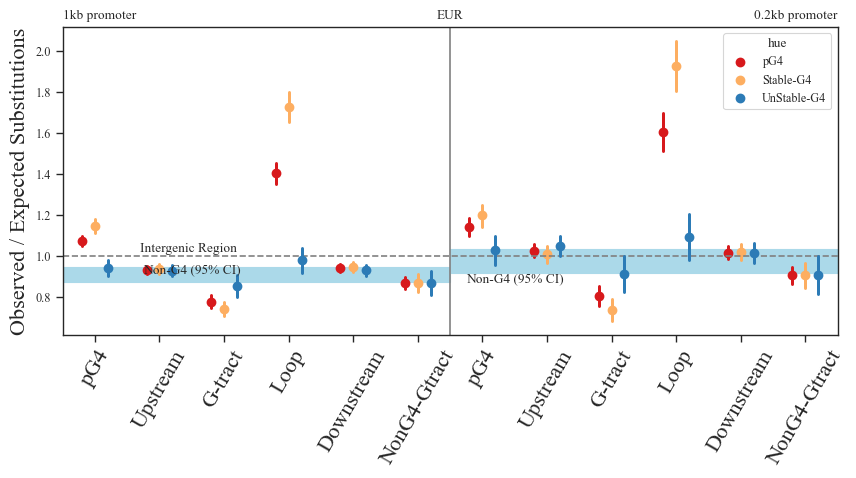

meta NOT subset; don't know how to subset; dropped


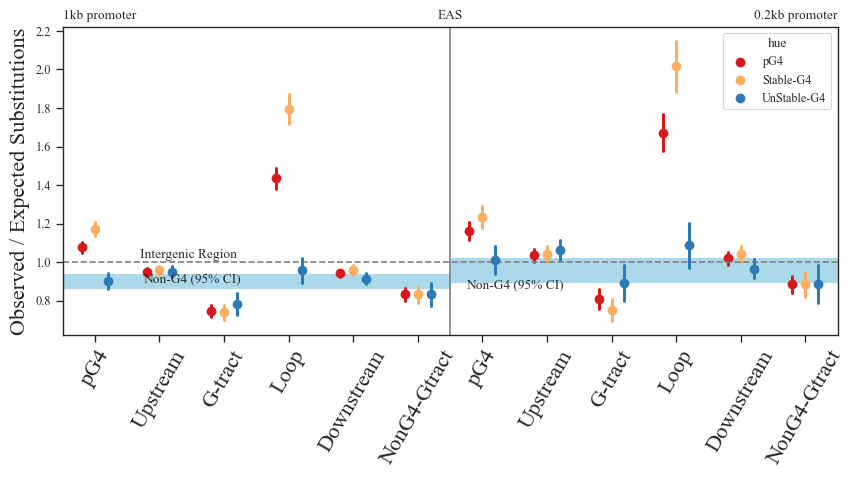

meta NOT subset; don't know how to subset; dropped


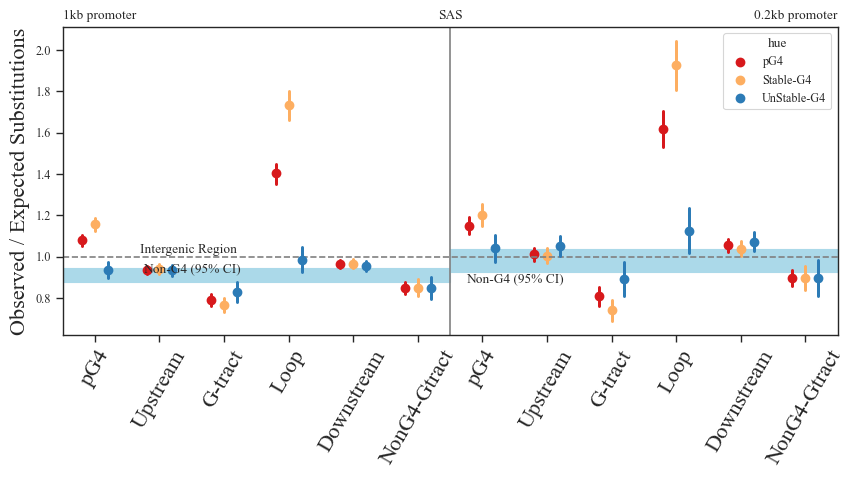

meta NOT subset; don't know how to subset; dropped


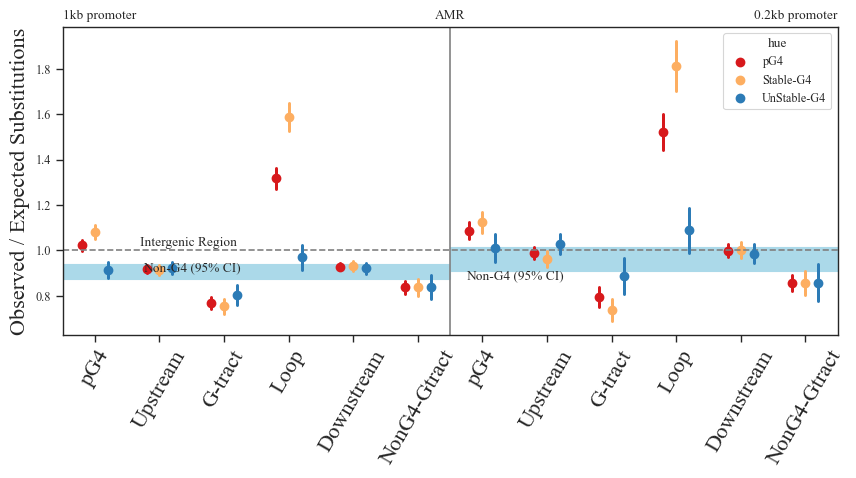

meta NOT subset; don't know how to subset; dropped


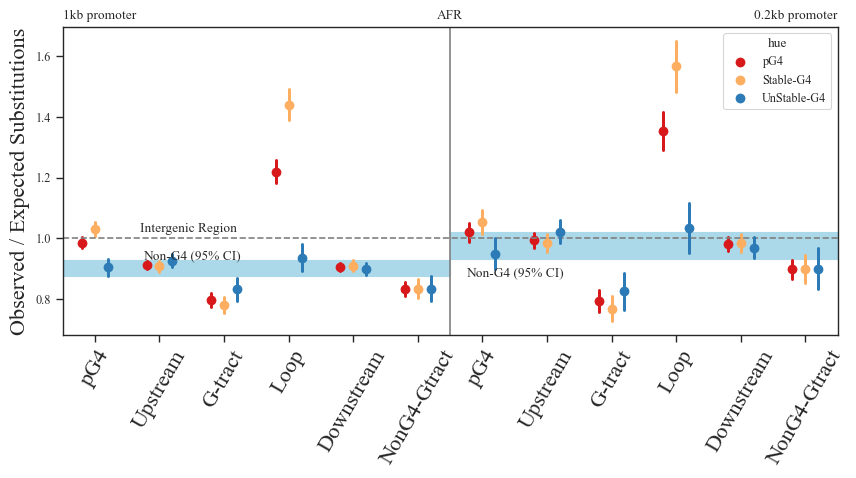

In [4]:
# -*- coding: utf-8 -*-
# @Time    : 2022/10/28 9:43
# @Author  : Guangyuel
# @File:   sevenver_drown_Figure.py

from scipy import stats
import pandas as pd
import sys, os
import numpy as np
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt


def data_annotion(df, key, groups="Promoter",hue="pG4"):
    df.loc[:, "g4_type"] = key
    df.loc[:, "groups"] = groups
    df.loc[:,"hue"] = hue
    return df

def data_merge(df,df_pG4, df_flank1,df_stem,df_loop,df_flank2,df_nonG4_Gtract, key):
    df_pG4 = df_pG4.loc[:, ["g4_type", key, "groups", "hue"]]
    tp_flank1 = df_flank1.loc[:, ["g4_type", key, "groups", "hue"]]
    tp_stem = df_stem.loc[:, ["g4_type", key, "groups", "hue"]]
    tp_loop = df_loop.loc[:, ["g4_type", key, "groups", "hue"]]
    tp_flank2 = df_flank2.loc[:, ["g4_type", key, "groups", "hue"]]
    tp_nonG4_gtract = df_nonG4_Gtract.loc[:, ["g4_type", key, "groups", "hue"]]
    return pd.concat([df,df_pG4,tp_flank1,tp_stem, tp_loop, tp_flank2, tp_nonG4_gtract])
    
def fig_plot(df, wd_path,key="EUR"):
    mpl.rcParams["pdf.fonttype"] = 42
    mpl.rcParams["ps.fonttype"] = 42
    plt.rcParams['font.sans-serif'] = ['Times New Roman']

    sns.set_context("paper")
    sns.set(style="ticks", context="paper",rc={'font.sans-serif':['Times New Roman']})
    fig, ax = plt.subplots(figsize=(10,4))
#     plt.figure()
    ax.axhspan(
        df[(df["groups"] == "Promoter") & (df["g4_type"] == "NonG4")][
            key].sort_values().values[249],
        df[(df["groups"] == "Promoter") & (df["g4_type"] == "NonG4")][
            key].sort_values().values[9750],
        xmin=0,
        xmax=0.5,
        color="#abd9e9")

    ax.axhspan(
        df[(df["groups"] == "Active promoter") & (df["g4_type"] == "NonG4")][
            key].sort_values().values[249],
        df[(df["groups"] == "Active promoter") & (df["g4_type"] == "NonG4")][
            key].sort_values().values[9750],
        xmin=0.5,
        xmax=1,
        color="#abd9e9")
    sns.pointplot(data=df[select_data[key]["g4_type"] != "NonG4"],
                  x="crossgroup", y=key, hue="hue",
                  join=False,
                  dodge=0.4,
                  n_boot=0,
                  errorbar=lambda y: (sorted(y)[int(len(y)*0.025)],
                                 sorted(y)[int(len(y)*0.975)]),
                  palette=['#d7191c','#fdae61','#2c7bb6'],
              ax=ax
             )    
    ax.axhline(y=1, color="grey", ls='--')
    ax.axvline(x=5.5, color="grey", ls='-')
    plt.text(x = 0.7 , y = 1.02, 
             s = "Intergenic Region", 
            ha = 'left')
    plt.text(x=1.5,
             y=df[(df["groups"] == "Active promoter") & (df["g4_type"] == "NonG4")][key].sort_values().values[255],
             s="Non-G4 (95% CI)",  
             ha='center')  
    plt.text(x=6.5,
             y=df[(df["groups"] == "Promoter") & (df["g4_type"] == "NonG4")][key].sort_values().values[255],
             s="Non-G4 (95% CI)",  
             ha='center')  
    plt.ylabel('Observed / Expected Substitutions', size=16)
    plt.xlabel('', size=16, )
    plt.xticks([0,1, 2, 3, 4, 5, 6, 7, 8,9,10,11], ["pG4","Upstream", "G-tract", "Loop", "Downstream","NonG4-Gtract"] * 2, size=16,
               rotation=60)
    plt.title(p)
    plt.title("1kb promoter",loc="left")
    plt.title("0.2kb promoter",loc="right")
    plt.savefig(os.path.join(wd_path,"sevenMer.ratio."+key+".pdf"))
    plt.show()


wd_path = "/disk2/G4_MS/frequency/Severmer"
population = ["EUR", "EAS", "SAS", "AMR", "AFR"]
ac_promoter_pG4 = data_annotion(pd.read_table(os.path.join(wd_path,"pG4","activePromoter_pG4.pG4.result.tsv")),
                               "pG4",
                               groups="Active promoter")
ac_promoter_stem = data_annotion(pd.read_table(os.path.join(wd_path, "activePromoter_pG4.stem.result.tsv")),
                              "G-tract",
                              groups="Active promoter")
ac_promoter_loop = data_annotion(pd.read_table(os.path.join(wd_path, "activePromoter_pG4.loop.result.tsv")),
                              "Loop",
                              groups="Active promoter")
ac_promoter_flank1 = data_annotion(pd.read_table(os.path.join(wd_path, "activePromoter_pG4.flank1.result.tsv")),
                                "Flank1",
                                groups="Active promoter")
ac_promoter_flank2 = data_annotion(pd.read_table(os.path.join(wd_path, "activePromoter_pG4.flank2.result.tsv")),
                                "Flank2",
                                groups="Active promoter")
ac_promoter_nonG4_Gtract = data_annotion(pd.read_table(os.path.join(wd_path, "activePromoter_nonpG4_boost.Gtract.result.tsv")),
                                         "nonG4-Gtract",
                                        groups = "Active promoter")

ac_promoter_nonG4 = data_annotion(pd.read_table(os.path.join(wd_path, "activePromoter_nonpG4_boost.result.tsv")),
                               "NonG4",
                               groups="Active promoter")
promoter_pG4 = data_annotion(pd.read_table(os.path.join(wd_path, "pG4","tss_sevenmer_pG4.results.tsv")), "pG4")
promoter_stem = data_annotion(pd.read_table(os.path.join(wd_path, "tss_pG4.stem.result.tsv")), "G-tract")
promoter_loop = data_annotion(pd.read_table(os.path.join(wd_path, "tss_pG4.loop.result.tsv")), "Loop")
promoter_flank1 = data_annotion(pd.read_table(os.path.join(wd_path, "tss_pG4.flank1.result.tsv")), "Flank1")
promoter_flank2 = data_annotion(pd.read_table(os.path.join(wd_path, "tss_pG4.flank2.result.tsv")), "Flank2")
promoter_nonG4_Gtract = data_annotion(pd.read_table(os.path.join(wd_path, "tss_nonpG4_boost.Gtract.result.tsv")), "nonG4-Gtract")
promoter_nonG4 = data_annotion(pd.read_table(os.path.join(wd_path, "tss_nonpG4_boost.result.tsv")), "NonG4")

### stable
ac_stable_promoter_pG4 = data_annotion(pd.read_table(os.path.join(wd_path,"pG4","activePromoter_pG4.Stable.result.tsv")),
                               "pG4",
                               groups="Active promoter",
                                hue="Stable-G4")
ac_stable_promoter_stem = data_annotion(pd.read_table(os.path.join(wd_path, "activePromoter_Stable_pG4.stem.result.tsv")),
                              "G-tract",
                              groups="Active promoter",hue="Stable-G4")
ac_stable_promoter_loop = data_annotion(pd.read_table(os.path.join(wd_path, "activePromoter_Stable_pG4.loop.result.tsv")),
                              "Loop",
                              groups="Active promoter",hue="Stable-G4")
ac_stable_promoter_flank1 = data_annotion(pd.read_table(os.path.join(wd_path, "activePromoter_Stable_pG4.flank1.result.tsv")),
                                "Flank1",
                                groups="Active promoter",hue="Stable-G4")
ac_stable_promoter_flank2 = data_annotion(pd.read_table(os.path.join(wd_path, "activePromoter_Stable_pG4.flank2.result.tsv")),
                                "Flank2",
                                groups="Active promoter",hue="Stable-G4")
ac_stable_promoter_nonG4_Gtract = data_annotion(pd.read_table(os.path.join(wd_path, "activePromoter_Stable_nonpG4_boost.Gtract.result.tsv")),
                                         "nonG4-Gtract",
                                        groups = "Active promoter",hue="Stable-G4")

promoter_stable_pG4 = data_annotion(pd.read_table(os.path.join(wd_path, "pG4","tss_sevenmer_pG4.Stable.results.tsv")), "pG4",hue="Stable-G4")
promoter_stable_stem = data_annotion(pd.read_table(os.path.join(wd_path, "tss_Stable_pG4.stem.result.tsv")), "G-tract", hue="Stable-G4")
promoter_stable_loop = data_annotion(pd.read_table(os.path.join(wd_path, "tss_Stable_pG4.loop.result.tsv")), "Loop", hue="Stable-G4")
promoter_stable_flank1 = data_annotion(pd.read_table(os.path.join(wd_path, "tss_Stable_pG4.flank1.result.tsv")), "Flank1", hue="Stable-G4")
promoter_stable_flank2 = data_annotion(pd.read_table(os.path.join(wd_path, "tss_Stable_pG4.flank2.result.tsv")), "Flank2", hue="Stable-G4")
promoter_stable_nonG4_Gtract = data_annotion(pd.read_table(os.path.join(wd_path, "tss_Stable_nonpG4_boost.Gtract.result.tsv")), "nonG4-Gtract", hue="Stable-G4")

## unstable 
ac_UnStable_promoter_pG4 = data_annotion(pd.read_table(os.path.join(wd_path,"pG4","activePromoter_pG4.unStable.result.tsv")),
                               "pG4",
                               groups="Active promoter",
                                hue="UnStable-G4")
ac_UnStable_promoter_stem = data_annotion(pd.read_table(os.path.join(wd_path, "activePromoter_UnStable_pG4.stem.result.tsv")),
                              "G-tract",
                              groups="Active promoter",hue="UnStable-G4")
ac_UnStable_promoter_loop = data_annotion(pd.read_table(os.path.join(wd_path, "activePromoter_UnStable_pG4.loop.result.tsv")),
                              "Loop",
                              groups="Active promoter",hue="UnStable-G4")
ac_UnStable_promoter_flank1 = data_annotion(pd.read_table(os.path.join(wd_path, "activePromoter_UnStable_pG4.flank1.result.tsv")),
                                "Flank1",
                                groups="Active promoter",hue="UnStable-G4")
ac_UnStable_promoter_flank2 = data_annotion(pd.read_table(os.path.join(wd_path, "activePromoter_UnStable_pG4.flank2.result.tsv")),
                                "Flank2",
                                groups="Active promoter",hue="UnStable-G4")
ac_UnStable_promoter_nonG4_Gtract = data_annotion(pd.read_table(os.path.join(wd_path, "activePromoter_UnStable_nonpG4_boost.Gtract.result.tsv")),
                                         "nonG4-Gtract",
                                        groups = "Active promoter",hue="UnStable-G4")

promoter_UnStable_pG4 = data_annotion(pd.read_table(os.path.join(wd_path, "pG4","tss_sevenmer_pG4.unStable.results.tsv")), "pG4",hue="UnStable-G4")
promoter_UnStable_stem = data_annotion(pd.read_table(os.path.join(wd_path, "tss_UnStable_pG4.stem.result.tsv")), "G-tract", hue="UnStable-G4")
promoter_UnStable_loop = data_annotion(pd.read_table(os.path.join(wd_path, "tss_UnStable_pG4.loop.result.tsv")), "Loop", hue="UnStable-G4")
promoter_UnStable_flank1 = data_annotion(pd.read_table(os.path.join(wd_path, "tss_UnStable_pG4.flank1.result.tsv")), "Flank1", hue="UnStable-G4")
promoter_UnStable_flank2 = data_annotion(pd.read_table(os.path.join(wd_path, "tss_UnStable_pG4.flank2.result.tsv")), "Flank2", hue="UnStable-G4")
promoter_UnStable_nonG4_Gtract = data_annotion(pd.read_table(os.path.join(wd_path, "tss_UnStable_nonpG4_boost.Gtract.result.tsv")), "nonG4-Gtract", hue="UnStable-G4")

select_data = {}


#     tp_nonG4 = ac_promoter_nonG4.loc[:, ["g4_type", p,"groups", "hue"]]
    
for p in population:
    tp_nonG4 = ac_promoter_nonG4.loc[:, ["g4_type", p,"groups", "hue"]]
    promoter_tp_nonG4 = promoter_nonG4.loc[:, ["g4_type", p,"groups", "hue"]]
    
    df = data_merge(promoter_tp_nonG4,
                    promoter_pG4,
                    promoter_flank1,
                    promoter_stem,
                    promoter_loop,
                    promoter_flank2,
                    promoter_nonG4_Gtract,
                    p
                   )
    df = pd.concat([tp_nonG4, df])
    df = data_merge(df,
                    ac_promoter_pG4,
                    ac_promoter_flank1,
                    ac_promoter_stem,
                    ac_promoter_loop, 
                    ac_promoter_flank2, 
                    ac_promoter_nonG4_Gtract,
                    p)
    
    ## Stable 
    df = data_merge(df,
                    promoter_stable_pG4,
                    promoter_stable_flank1,
                    promoter_stable_stem,
                    promoter_stable_loop,
                    promoter_stable_flank2,
                    promoter_stable_nonG4_Gtract,
                    p
                   )
    df = data_merge(df,
                    ac_stable_promoter_pG4,
                    ac_stable_promoter_flank1,
                    ac_stable_promoter_stem,
                    ac_stable_promoter_loop, 
                    ac_stable_promoter_flank2, 
                    ac_stable_promoter_nonG4_Gtract,p)

    # Unstable

    df = data_merge(df,
                    promoter_UnStable_pG4,
                    promoter_UnStable_flank1,
                    promoter_UnStable_stem,
                    promoter_UnStable_loop,
                    promoter_UnStable_flank2,
                    promoter_UnStable_nonG4_Gtract,
                    p
                   )
    df = data_merge(df,
                    ac_UnStable_promoter_pG4,
                    ac_UnStable_promoter_flank1,
                    ac_UnStable_promoter_stem,
                    ac_UnStable_promoter_loop, 
                    ac_UnStable_promoter_flank2, 
                    ac_UnStable_promoter_nonG4_Gtract,
                   p
                   )
  
    df.loc[:,"crossgroup"] = df["g4_type"]+"|"+ df["groups"]
    select_data[p] = df
    fig_plot(df,os.path.join(wd_path,"pG4"),key=p)


## HKA test
#### multi_sub_download
for i in chr{1..22};do wget https://hgdownload-test.gi.ucsc.edu/goldenPath/hg38/multiz100way/maf/ 𝑖.𝑚𝑎𝑓.𝑔𝑧;𝑐𝑎𝑡
 {i}.maf.gz >> hg38.maf.gz;done cat ${i}.maf.gz >> hg38.maf.gz
 ```
 the HKA test was referred to Guiblet et.al. Selection and thermostability suggest G-quadruplexes are novel functional elements of the human genome. *Genome Research*, 2021.

In [ ]:
# sub.py
import sys
import re


infile = open("/disk2/project/UCSC/100ways/WG_hg38.maf", 'rt')
outfile = open("/disk2/G4_MS/frequency/HKA/data/Substitutions.bed",'w')
parsed = {}

h_motif = None
p_motif = None



nucl_mapping = str.maketrans("actgn-","ACTGN-")

def custom_translate(input_string):
   return input_string.translate(nucl_mapping)


for line in infile:
        if line[0] == 's':
                line = line.strip()
                #print(line)
                array = re.search('[s]\ +([a-z,A-Z]+[0-9]+)\.[a-z,A-Z]+([0-9,\.,\_,\-,a-z,A-Z]+)\ +([0-9]+)\ +([0-9]+)\ +([+-])\ +[0-9]+\ +([a-z,A-z,\-]+)', line)
                if 'hg38' == array.group(1):
                        h_chrom = array.group(2)
                        h_start = array.group(3)
                        h_length = array.group(4)
                        h_strand = array.group(5)
                        h_motif = array.group(6)

                if 'ponAbe2' == array.group(1):
                        p_chrom = array.group(2)
                        p_start = array.group(3)
                        p_length = array.group(4)
                        p_strand = array.group(5)
                        p_motif = array.group(6)


        if line[0] == 'a' and h_motif and p_motif:

                h_motif = custom_translate(h_motif)
                p_motif = custom_translate(p_motif)
                pos = 0
                
                compare = zip(h_motif, p_motif)
                for nuc in compare:
                    if nuc[0] != '-':
                        if nuc[0] != nuc[1]:
                            outfile.write('chr'+h_chrom+'\t'+str(int(h_start)+pos+1)+'\t'+str(int(h_start)+pos+2)+'\t'+nuc[0]+'\t'+nuc[1]+'\n')
                        else:
                            outfile.write('chr'+h_chrom+'\t'+str(int(h_start)+pos+1)+'\t'+str(int(h_start)+pos+2)+'\tNo\tNo\n')
                        pos += 1
                h_motif = None
                p_motif = None
        elif line[0] == 'a' and h_motif:
            for i in range(int(h_start),int(h_start)+int(h_length)):
                outfile.write('chr'+h_chrom+'\t'+str(i+1)+'\t'+str(i+2)+'\tNA\tNA\n')

In [ ]:
# save as locuschoice.py not run with through jupyter
import random
import sys

bedfile = open(sys.argv[1], 'rt')
outfile = open(sys.argv[2], 'w+')

last_chrom = 'chr0'
last_end = 0

tochoose = []

for line in bedfile:
    array = line.strip().split("\t")
    chrom = array[0]
    start = array[1]
    end = array[2]
    
    if chrom == last_chrom:
        if int(start) < last_end:
            tochoose.append(array)
            last_end = int(end)
        else:
            chosenmotif = tochoose[random.randint(0,len(tochoose)-1)]
            for field in chosenmotif[0:-1]:
                outfile.write(str(field)+ "\t")
            outfile.write(chosenmotif[-1] + "\n")
            tochoose = [array]
            last_chrom = chrom
            last_end = int(end)
    else:
        if len(tochoose) > 0:
            chosenmotif = tochoose[random.randint(0,len(tochoose) -1)]
            for field in chosenmotif[0:-1]:
                outfile.write(str(field) + "\t")
            outfile.write(chosenmotif[-1] + "\n")
            
            tochoose = [array]
            last_chrom = chrom
            last_end = int(end)
        else:
            tochoose = [array]
            last_chrom = chrom
            last_end = int(end)
else:
    chosenmotif = tochoose[random.randint(0,len(tochoose)-1)]
    for field in chosenmotif[0:-1]:
        outfile.write(str(field)+ "\t")
    outfile.write(chosenmotif[-1] + "\n")


In [ ]:
%%bash
python locuschoice.py active_promoter_info.annotion.bed active_promoter.bed
python locuschoice.py promoter.annotion.bed promoter.bed


In [ ]:
## G4_split.py
import pandas as pd
import numpy as np
import os
import sys
import pyranges as pr
import inspect
from itertools import groupby, product
from Bio import SeqIO
import warnings

warnings.filterwarnings("ignore")

def retrieve_name(var):
    '''
    utils:
    get back the name of variables
    '''
    callers_local_vars = inspect.currentframe().f_back.f_locals.items()
    return [var_name for var_name, var_val in callers_local_vars if var_val is var]


def Gtrack_get(seq, plus=True):
    result = []
    ggg = []
    seqindex = []
    for index, val in enumerate(list(seq)):
        if plus:
            if val == 'g' or val == 'G':
                ggg.append(index)
        else:
            if val == 'c' or val == 'C':
                ggg.append(index)
    for k, g in groupby(enumerate(ggg), lambda x: x[1] - x[0]):
        _ = [j for i, j in g]
        if len(_) >= 3:
            seqindex.append(_)
    if len(seqindex) > 0:
        for idx in seqindex:
            result.append((idx[0], idx[-1] + 1))
    return result
    
    
def G4_info(df):
    result = []
    df = df.drop_duplicates(keep="first", subset=["Chromosome", "Start", "End"])
    df = df[df["Chromosome"] != "chrX"]
    df = df[df["Chromosome"] != "chrY"]
    df = df[df["G4_length"] <= 100]
    g4_numbers = 0
    g4_lengths = 0
    grunsNumbers = 0
    gloopNumbers = 0
    for index, row in df.iterrows():
        g4_numbers += 1
        g4_lengths += row.G4_length
        plusflg = True
        if row["Strand"] == "-": plusflg = False
        tp_track = Gtrack_get(row["G4_seq"], plus=plusflg)
        stem = []
        loop = []
        for i in range(len(tp_track) - 1):
            if plusflg:
                stem_tmp = [row["Chromosome"], row["Start"] + tp_track[i][0], row["Start"] + tp_track[i][1], "+",
                            "stem"]
                stem.append(stem_tmp)
                loop_tmp = [row["Chromosome"], row["Start"] + tp_track[i][1], row["Start"] + tp_track[i + 1][0], "+",
                            "loop"]
                loop.append(loop_tmp)
            else:
                stem_tmp = [row["Chromosome"], row["Start"] + tp_track[i][0], row["Start"] + tp_track[i][1], "-",
                            "stem"]
                stem.append(stem_tmp)
                loop_tmp = [row["Chromosome"], row["Start"] + tp_track[i][1], row["Start"] + tp_track[i + 1][0], "-",
                            "loop"]
                loop.append(loop_tmp)
        if plusflg:
            stem_tmp = [row["Chromosome"], row["Start"] + tp_track[-1][0], row["Start"] + tp_track[-1][1], "+", "stem"]
            flank1 = [row["Chromosome"], row["Start"] + tp_track[0][0] - 100, row["Start"] + tp_track[0][0], "+",
                      "flank1"]
            flank2 = [row["Chromosome"], row["Start"] + tp_track[-1][1], row["Start"] + tp_track[-1][1] + 100, "+",
                      "flank2"]
        else:
            stem_tmp = [row["Chromosome"], row["Start"] + tp_track[-1][0], row["Start"] + tp_track[-1][1], "-", "stem"]
            flank2 = [row["Chromosome"]] + [row["Start"] + tp_track[0][0] - 100, row["Start"] + tp_track[0][0], "-",
                                            "flank2"]
            flank1 = [row["Chromosome"]] + [row["Start"] + tp_track[-1][1], row["Start"] + tp_track[-1][1] + 100, "-",
                                            "flank1"]
        stem.append(stem_tmp)
        result += stem
        result += loop
        grunsNumbers += len(tp_track)
        gloopNumbers += len(tp_track) - 1
        result += [flank1, flank2]
    return result, g4_numbers, g4_lengths / g4_numbers, grunsNumbers, gloopNumbers


def file_check(path):
    if not os.path.isfile(path):
        sys,exit(f"this file {path} is not exist !!!")
    else:
        return path

def G4_split(promoter_pG4):
    """
    promoter_pG4: pG4 bed file that contains pG4 sequence and Strand 
    return: G-tracts, loop and other pG4 info such as the mean length and numbers of pG4
    
    """
    varname = retrieve_name(promoter_pG4)
    promoter_pG4_info, g4numbers, g4_mean_length, g4stemNumber, g4loopNumber = G4_info(promoter_pG4)
    print(varname)
    print(g4numbers, g4_mean_length, g4stemNumber, g4loopNumber)
    promoter_pG4_info = pd.DataFrame(promoter_pG4_info, columns=["Chromosome", "Start", "End", "Strand", "type"])
    promoter_pG4_info_Gtracts = promoter_pG4_info[promoter_pG4_info["type"] == "stem"]
    promoter_pG4_info_loops = promoter_pG4_info[promoter_pG4_info["type"] == "loop"]
    return promoter_pG4_info_Gtracts, promoter_pG4_info_loops
    
def promoter_select(promoter, promoter_pG4, promoter_name, gruns, WD_PATH):
    G4 = pd.read_table("/disk2/G4_MS/G4_identify/Quadron/hs38d2.quadron.bed", header=None, 
                       names=["Chromosome", "Start", "End", "G4_seq", "G4_length","Strand","G4_score"])
    G4 = pr.PyRanges(G4)
    promoter_pG4 = promoter_pG4.overlap(promoter, strandedness=False)
    promoter_pG4_Stable = promoter_pG4[promoter_pG4.Score > 19]
    promoter_pG4_unStable = promoter_pG4[promoter_pG4.Score < 19]
    promoter_noG4 = promoter.subtract(G4, strandedness=False).merge()
    promoter_pG4.to_csv(os.path.join(WD_PATH, promoter_name + "_pG4.info.tsv"), sep="\t")
    promoter_pG4_Stable.to_csv(os.path.join(WD_PATH, promoter_name + "_pG4_Stable.info.tsv"), sep="\t")
    promoter_pG4_unStable.to_csv(os.path.join(WD_PATH, promoter_name + "_pG4_unStable.info.tsv"), sep="\t")
    promoter_noG4.to_csv(os.path.join(WD_PATH, promoter_name + "_noG4.info.tsv"), sep="\t")
    # G-tracts analysis
    promoter_G4_Gtract = gruns.overlap(promoter_pG4, strandedness=False)
    promoter_stableG4_Gtract = gruns.overlap(promoter_pG4_Stable, strandedness=False)
    promoter_unstable_Gtracts = gruns.overlap(promoter_pG4_unStable, strandedness=False)
    promoter_nonG4_Gtract = gruns.overlap(promoter_noG4, strandedness=False)
    promoter_G4_Gtract.to_bed(os.path.join(WD_PATH,promoter_name + "_pG4_Gtract.bed"))
    promoter_stableG4_Gtract.to_bed(os.path.join(WD_PATH, promoter_name + "_stableG4_Gtract.bed"))
    promoter_unstable_Gtracts.to_bed(os.path.join(WD_PATH, promoter_name + "_unstable_Gtracts.bed"))
    promoter_nonG4_Gtract.to_bed(os.path.join(WD_PATH,promoter_name + "_nonG4_Gtract.bed"))


WD_PATH = "/disk2/G4_MS/frequency/HKA/data/promoterInfo"
# DATA_PTAH = "/disk2/G4_MS/promoter_select/promoter_info"
REFERENCE_PTAH = "/disk2/G4_MS/reference"

cds_path = file_check(os.path.join(REFERENCE_PTAH, "gencode38.cds_region.bed"))
cds = pr.read_bed(cds_path)
G4 = pd.read_table("/disk2/G4_MS/G4_identify/Quadron/hs38d2.quadron.bed", header=None,
                   names=["Chromosome", "Start", "End", "G4_seq", "G4_length","Strand","G4_score"])
G4 = pr.PyRanges(G4)
gruns_path = file_check(os.path.join(REFERENCE_PTAH, "genomic_Gruns.bed"))
gruns = pr.PyRanges(pd.read_table(gruns_path, header=None, names=["Chromosome", "Start", "End", "Strand", "Gtract"]))

## promoter select
promoter = pr.PyRanges(pd.read_table(os.path.join(WD_PATH,"promoter.bed"),header=None, 
                                     names="Chromosome	Start	End	Promoter_id	gene_id	Strand	transcript_id	gene_type	gene_name".split("\t")))
promoter = promoter.subtract(cds,strandedness=False)
promoter_pG4 = G4.overlap(promoter,strandedness=False).as_df()
promoter_pG4_Gtracts, promoter_pG4_loop = G4_split(promoter_pG4)
promoter_pG4.to_csv(os.path.join(WD_PATH,"promoter_pG4.info.tsv"),sep="\t",index=False)
promoter_pG4_Gtracts.to_csv(os.path.join(WD_PATH,"promoter_pG4_Gtract.bed"),sep="\t",header=False, index=False)
promoter_pG4_loop.to_csv(os.path.join(WD_PATH,"tss_loop_pG4.subtype.tsv"),sep="\t",header=False, index=False)

promoter_pG4_Stable = promoter_pG4[promoter_pG4.G4_score > 19]
promoter_pG4_Stable_Gtracts, promoter_pG4_Stable_loop = G4_split(promoter_pG4_Stable)
promoter_pG4_Stable.to_csv(os.path.join(WD_PATH,"promoter_pG4_Stable.info.tsv"),sep="\t",index=False)
promoter_pG4_Stable_Gtracts.to_csv(os.path.join(WD_PATH,"promoter_stableG4_Gtract.bed"),sep="\t",header=False, index=False)
promoter_pG4_Stable_loop.to_csv(os.path.join(WD_PATH,"tss_stable.pG4.loop.tsv"),sep="\t",header=False, index=False)

promoter_pG4_unStable = promoter_pG4[promoter_pG4.G4_score <= 19]
promoter_pG4_unStablee_Gtracts, promoter_pG4_unStable_loop = G4_split(promoter_pG4_unStable)
promoter_pG4_unStable.to_csv(os.path.join(WD_PATH,"promoter_pG4_unStable.info.tsv"),sep="\t",index=False)
promoter_pG4_unStablee_Gtracts.to_csv(os.path.join(WD_PATH,"promoter_unstable_Gtracts.bed"),sep="\t",header=False, index=False)
promoter_pG4_unStable_loop.to_csv(os.path.join(WD_PATH,"tss_unstable.pG4.loop.tsv"),sep="\t",header=False, index=False)

# # nonG4
promoter_nonG4 = promoter.subtract(G4,strandedness=False)
promoter_nonG4_Gtracts = gruns.overlap(promoter_nonG4,strandedness=False)
promoter_nonG4.as_df().to_csv(os.path.join(WD_PATH,"promoter_noG4.info.tsv"),sep="\t",index=False)
promoter_nonG4_Gtracts.to_bed(os.path.join(WD_PATH,"promoter_nonG4_Gtract.bed"))
# ## active promoter get
active_promoter = pr.PyRanges(pd.read_table(os.path.join(WD_PATH,"active_promoter.bed"),header=None,
                                           names="Chromosome	Start	End	Promoter_id	gene_id	Strand	transcript_id	gene_type	gene_name	Start_tss	End_tss".split("\t")))
active_promoter = active_promoter.subtract(cds,strandedness=False)

active_promoter_pG4 = G4.overlap(active_promoter,strandedness=False).as_df()
active_promoter_pG4_Gtracts, active_promoter_pG4_loop = G4_split(active_promoter_pG4)
active_promoter_pG4.to_csv(os.path.join(WD_PATH,"active_promoter_pG4.info.tsv"),sep="\t",index=False)
active_promoter_pG4_Gtracts.to_csv(os.path.join(WD_PATH,"active_promoter_pG4_Gtract.bed"),sep="\t",header=False, index=False)
active_promoter_pG4_loop.to_csv(os.path.join(WD_PATH,"epG4_loop.subtype.tsv"),sep="\t",header=False, index=False)

active_promoter_pG4_Stable = active_promoter_pG4[active_promoter_pG4.G4_score > 19]
active_promoter_pG4_Stable_Gtracts, active_promoter_pG4_Stable_loop = G4_split(active_promoter_pG4_Stable)
active_promoter_pG4_Stable.to_csv(os.path.join(WD_PATH,"active_promoter_pG4_Stable.info.tsv"),sep="\t",index=False)
active_promoter_pG4_Stable_Gtracts.to_csv(os.path.join(WD_PATH,"active_promoter_stableG4_Gtract.bed"),sep="\t",header=False, index=False)
active_promoter_pG4_Stable_loop.to_csv(os.path.join(WD_PATH,"stable_epG4.loop.tsv"),sep="\t",header=False, index=False)

active_promoter_pG4_unStable = active_promoter_pG4[active_promoter_pG4.G4_score <= 19]
active_promoter_pG4_unStable_Gtracts, active_promoter_pG4_unStable_loop = G4_split(active_promoter_pG4_unStable)
active_promoter_pG4_unStable.to_csv(os.path.join(WD_PATH,"active_promoter_pG4_unStable.info.tsv"),sep="\t",index=False)
active_promoter_pG4_unStable_Gtracts.to_csv(os.path.join(WD_PATH,"active_promoter_unstable_Gtracts.bed"),sep="\t",header=False, index=False)
active_promoter_pG4_unStable_loop.to_csv(os.path.join(WD_PATH,"unstable_epG4.loop.tsv"),sep="\t",header=False, index=False)
# #nonG4
active_promoter_nonG4 = active_promoter.subtract(G4)
active_promoter_nonG4_Gtracts = gruns.overlap(active_promoter_nonG4,strandedness=False)
active_promoter_nonG4.as_df().to_csv(os.path.join(WD_PATH,"active_promoter_noG4.info.tsv"),sep="\t",index=False)
promoter_nonG4_Gtracts.to_bed(os.path.join(WD_PATH,"active_promoter_nonG4_Gtract.bed"))


In [ ]:
%%bash
python sub.py
ptrhon G4_split.py
cd /disk2/G4_MS/frequency/HKA/data
cat promoterInfo/promoter.bed promoterInfo/active_promoter.bed |cut -f1-6 |bedtools sort -i -|bedtools merge -i -|bedtools intersect -a 100way.Substitutions.bed.gz -b - |gzip > 100way.promoter.Substitutions.bed.gz
cat promoterInfo/promoter.bed promoterInfo/active_promoter.bed |cut -f1-6 |bedtools sort -i -|bedtools merge -i -|bedtools intersect -a 1000G_PASS_SNP_EUR.tsv.gz -b - |gzip > promoter.1000G_PASS_SNP_EUR.tsv.gz
cat promoterInfo/promoter.bed promoterInfo/active_promoter.bed |cut -f1-6 |bedtools sort -i -|bedtools merge -i -|bedtools intersect -a 1000G_PASS_SNP_EAS.tsv.gz -b - |gzip > promoter.1000G_PASS_SNP_EAS.tsv.gz
cat promoterInfo/promoter.bed promoterInfo/active_promoter.bed |cut -f1-6 |bedtools sort -i -|bedtools merge -i -|bedtools intersect -a 1000G_PASS_SNP_SAS.tsv.gz -b - |gzip > promoter.1000G_PASS_SNP_SAS.tsv.gz
cat promoterInfo/promoter.bed promoterInfo/active_promoter.bed |cut -f1-6 |bedtools sort -i -|bedtools merge -i -|bedtools intersect -a 1000G_PASS_SNP_AMR.tsv.gz -b - |gzip > promoter.1000G_PASS_SNP_AMR.tsv.gz
cat promoterInfo/promoter.bed promoterInfo/active_promoter.bed |cut -f1-6 |bedtools sort -i -|bedtools merge -i -|bedtools intersect -a 1000G_PASS_SNP_AFR.tsv.gz -b - |gzip > promoter.1000G_PASS_SNP_AFR.tsv.gz
cat promoterInfo/promoter.bed promoterInfo/active_promoter.bed |cut -f1-6 |bedtools sort -i -|bedtools merge -i -|bedtools intersect -a 1000G_PASS_SNP_merge.tsv.gz -b - |gzip > promoter.1000G_PASS_SNP_merge.tsv.gz


In [ ]:
# -*- coding: utf-8 -*-
# @Time    : 2022/11/7 9:28
# @Author  : Guangyuel
# @file    : evolution_HKA_analysis.py
## this script was refered to Guiblet et.al Selection and thermostability suggest G-quadruplexes are novel functional elements of the human genome, PMID: 34187812
import sys
import pandas as pd
import os


WORK_PATH = "/disk2/G4_MS/frequency/HKA"


class SNPS:
    def __init__(self, snp_path):
        self.snp = None
        self.path = snp_path

    def snp_filter(self, alle_number):
        self.snp = pd.read_table(self.path, header=None,
                                 names=['Chromosome', "Start", "End", "ref", "alt", "filtered", "mutType", "ac", "an"],
                                 compression="gzip"
                                 )
        self.snp.loc[:, "ac"] = self.snp.groupby(["Chromosome", "Start", "End"])["ac"].transform("sum")
        self.snp.loc[:, "an"] = self.snp.groupby(["Chromosome", "Start", "End"])["an"].transform("mean")
        # notice this pos ref, alt was not assoated with ac and an ,the ac or an is the chromosome pos counts
        self.snp = self.snp.drop_duplicates(["Chromosome", "Start", "End"])
#         self.snp = self.snp[self.snp["an"] >= int(alle_number)*0.8]
        self.snp.loc[:, "maf"] = self.snp.apply(lambda x: x["ac"]/x["an"], axis=1)
        self.snp.loc[:, "key"] = self.snp["Chromosome"].map(str) + "|" + self.snp["Start"].map(str) + "|" + self.snp["End"].map(str)
        self.snp = self.snp.loc[:, ["key", "ref", "alt", "maf"]]


class SUB:
    def __init__(self, path):
        self.subs = None
        self.path = path

    def substitution_filter(self):
        self.subs = pd.read_table(self.path, header=None,
                                  names=['Chromosome', "Start", "End", "homo", "pongo"], dtype=object,
                                  compression="gzip"
                                  )
        self.subs.loc[:, "key"] = self.subs["Chromosome"].map(str) + "|" + self.subs["Start"].map(str) + "|" + self.subs["End"].map(str)
        self.subs = self.subs.loc[:, ["key", "homo", "pongo"]]


snp_path = sys.argv[1]
outputname = sys.argv[2]
alle_number = sys.argv[3]
snp = SNPS(os.path.join(WORK_PATH, "data", snp_path))
snp.snp_filter(alle_number)
subs = SUB(os.path.join(WORK_PATH, "data", "100way.promoter.Substitutions.bed.gz"))
subs.substitution_filter()
print("prepare analysis done")
merge_df = subs.subs.merge(snp.snp, how="outer", on="key")
merge_df = merge_df.fillna("NA")
merge_df["Chromosome"], merge_df["Start"], merge_df["End"] = merge_df["key"].str.split("|").str
merge_df["homo|pongo|ref|alts|maf"] = merge_df["homo"].map(str)+"|"+merge_df["pongo"].map(str)+"|"+merge_df["ref"]+ "|" + merge_df["alt"]+"|"+merge_df["maf"].map(str)
merge_df = merge_df.loc[:, ["Chromosome", "Start", "End", "homo|pongo|ref|alts|maf"]]
merge_df.to_csv(os.path.join(WORK_PATH, outputname + ".Sites.tab"), sep="\t", index=False)

In [ ]:
%%bash
## merged substitutions with snps
cd /disk2/G4_MS/frequency/HKA
python /usr/G4_pipline/evolution_HKA_analysis.py promoter.1000G_PASS_SNP_merge.tsv.gz promoter_kg_merge 5008
python /usr/G4_pipline/evolution_HKA_analysis.py promoter.1000G_PASS_SNP_EUR.tsv.gz promoter_kg_EUR 1006
python /usr/G4_pipline/evolution_HKA_analysis.py promoter.1000G_PASS_SNP_EAS.tsv.gz promoter_kg_EAS 1008
python /usr/G4_pipline/evolution_HKA_analysis.py promoter.1000G_PASS_SNP_SAS.tsv.gz promoter_kg_SAS 978
python /usr/G4_pipline/evolution_HKA_analysis.py promoter.1000G_PASS_SNP_AMR.tsv.gz promoter_kg_AMR 694
python /usr/G4_pipline/evolution_HKA_analysis.py promoter.1000G_PASS_SNP_AFR.tsv.gz promoter_kg_AFR 1322

In [ ]:
%%bash
## G4 groupby analysis
cd /disk2/G4_MS/frequency/HKA
tail -n +2 data/promoterInfo/promoter_pG4.info.tsv|cut -f 1-3|sort -k1,1 -k2,2n|uniq|grep -v "chrX"|grep -v "chrY" > promoter_pG4.info.bed
tail -n +2 data/promoterInfo/promoter_pG4_Stable.info.tsv|cut -f 1-3|sort -k1,1 -k2,2n|uniq|grep -v "chrX"|grep -v "chrY" > promoter_pG4_Stable.info.bed
tail -n +2 data/promoterInfo/promoter_pG4_unStable.info.tsv|cut -f 1-3|sort -k1,1 -k2,2n|uniq|grep -v "chrX"|grep -v "chrY" > promoter_pG4_unStable.info.bed
tail -n +2 data/promoterInfo/promoter_noG4.info.tsv|cut -f 1-3|sort -k1,1 -k2,2n|uniq|grep -v "chrX"|grep -v "chrY" > promoter_noG4.info.bed


cat data/promoterInfo/promoter_pG4_Gtract.bed|cut -f 1-3|sort -k1,1 -k2,2n|uniq|grep -v "chrX"|grep -v "chrY" > promoter_pG4_Gtract.bed
cat data/promoterInfo/promoter_stableG4_Gtract.bed|cut -f 1-3|sort -k1,1 -k2,2n|uniq|grep -v "chrX"|grep -v "chrY" > promoter_stableG4_Gtract.bed
cat data/promoterInfo/promoter_unstable_Gtracts.bed|cut -f 1-3|sort -k1,1 -k2,2n|uniq|grep -v "chrX"|grep -v "chrY" > promoter_unstable_Gtracts.bed
cat data/promoterInfo/promoter_nonG4_Gtract.bed|cut -f 1-3|sort -k1,1 -k2,2n|uniq|grep -v "chrX"|grep -v "chrY" > promoter_nonG4_Gtract.bed

cat data/promoterInfo/tss_loop_pG4.subtype.tsv|cut -f 1-3|sort -k1,1 -k2,2n|uniq|grep -v "chrX"|grep -v "chrY" > promoter_pG4.loop.bed
cat data/promoterInfo/tss_stable.pG4.loop.tsv|cut -f 1-3|sort -k1,1 -k2,2n|uniq|grep -v "chrX"|grep -v "chrY" > promoter_stable.pG4.loop.bed
cat data/promoterInfo/tss_unstable.pG4.loop.tsv|cut -f 1-3|sort -k1,1 -k2,2n|uniq|grep -v "chrX"|grep -v "chrY" > promoter_unstable.pG4.loop.bed

### active promoter

tail -n +2 data/promoterInfo/active_promoter_pG4.info.tsv|cut -f 1-3|sort -k1,1 -k2,2n|uniq|grep -v "chrX"|grep -v "chrY" > active_promoter_pG4.info.bed
tail -n +2 data/promoterInfo/active_promoter_pG4_Stable.info.tsv|cut -f 1-3|sort -k1,1 -k2,2n|uniq|grep -v "chrX"|grep -v "chrY" > active_promoter_pG4_Stable.info.bed
tail -n +2 data/promoterInfo/active_promoter_pG4_unStable.info.tsv|cut -f 1-3|sort -k1,1 -k2,2n|uniq|grep -v "chrX"|grep -v "chrY" > active_promoter_pG4_unStable.info.bed
tail -n +2 data/promoterInfo/active_promoter_noG4.info.tsv|cut -f 1-3|sort -k1,1 -k2,2n|uniq|grep -v "chrX"|grep -v "chrY" > active_promoter_noG4.info.bed


cat data/promoterInfo/active_promoter_pG4_Gtract.bed|cut -f 1-3|sort -k1,1 -k2,2n|uniq|grep -v "chrX"|grep -v "chrY" > active_promoter_pG4_Gtract.bed
cat data/promoterInfo/active_promoter_stableG4_Gtract.bed|cut -f 1-3|sort -k1,1 -k2,2n|uniq|grep -v "chrX"|grep -v "chrY" > active_promoter_stableG4_Gtract.bed
cat data/promoterInfo/active_promoter_unstable_Gtracts.bed|cut -f 1-3|sort -k1,1 -k2,2n|uniq|grep -v "chrX"|grep -v "chrY" > active_promoter_unstable_Gtracts.bed
cat data/promoterInfo/active_promoter_nonG4_Gtract.bed|cut -f 1-3|sort -k1,1 -k2,2n|uniq|grep -v "chrX"|grep -v "chrY" > active_promoter_nonG4_Gtract.bed

cat data/promoterInfo/epG4_loop.subtype.tsv|cut -f 1-3|sort -k1,1 -k2,2n|uniq|grep -v "chrX"|grep -v "chrY" > active_promoter.pG4.loop.bed
cat data/promoterInfo/stable_epG4.loop.tsv|cut -f 1-3|sort -k1,1 -k2,2n|uniq|grep -v "chrX"|grep -v "chrY" > active_promoter_stable.pG4.loop.bed
cat data/promoterInfo/unstable_epG4.loop.tsv|cut -f 1-3|sort -k1,1 -k2,2n|uniq|grep -v "chrX"|grep -v "chrY" > active_promoter_unstable.pG4.loop.bed



In [ ]:
%%bash
cd /disk2/G4_MS/frequency/HKA
tail -n +2 promoter_kg_merge.Sites.tab| bedtools intersect -a - -b promoter_pG4.info.bed -u > promoter_pG4.merge.SFS
tail -n +2 promoter_kg_merge.Sites.tab| bedtools intersect -a - -b promoter_pG4_Stable.info.bed -u > promoter_pG4_Stable.merge.SFS
tail -n +2 promoter_kg_merge.Sites.tab| bedtools intersect -a - -b promoter_pG4_unStable.info.bed -u > promoter_pG4_unStable.merge.SFS
tail -n +2 promoter_kg_merge.Sites.tab| bedtools intersect -a - -b promoter_noG4.info.bed -u > promoter_nonpG4.merge.SFS

tail -n +2 promoter_kg_merge.Sites.tab| bedtools intersect -a - -b promoter_pG4_Gtract.bed -u > promoter_pG4_Gtract.merge.SFS
tail -n +2 promoter_kg_merge.Sites.tab| bedtools intersect -a - -b promoter_stableG4_Gtract.bed -u > promoter_stableG4_Gtract.merge.SFS
tail -n +2 promoter_kg_merge.Sites.tab| bedtools intersect -a - -b promoter_unstable_Gtracts.bed -u > promoter_unstable_Gtracts.merge.SFS
tail -n +2 promoter_kg_merge.Sites.tab| bedtools intersect -a - -b promoter_nonG4_Gtract.bed -u > promoter_nonG4_Gtract.merge.SFS
## EUR 
tail -n +2 promoter_kg_EUR.Sites.tab| bedtools intersect -a - -b promoter_pG4.info.bed -u > promoter_pG4.EUR.SFS
tail -n +2 promoter_kg_EUR.Sites.tab| bedtools intersect -a - -b promoter_pG4_Stable.info.bed -u > promoter_pG4_Stable.EUR.SFS
tail -n +2 promoter_kg_EUR.Sites.tab| bedtools intersect -a - -b promoter_pG4_unStable.info.bed -u > promoter_pG4_unStable.EUR.SFS
tail -n +2 promoter_kg_EUR.Sites.tab| bedtools intersect -a - -b promoter_noG4.info.bed -u > promoter_nonpG4.EUR.SFS

tail -n +2 promoter_kg_EUR.Sites.tab| bedtools intersect -a - -b promoter_pG4_Gtract.bed -u > promoter_pG4_Gtract.EUR.SFS
tail -n +2 promoter_kg_EUR.Sites.tab| bedtools intersect -a - -b promoter_stableG4_Gtract.bed -u > promoter_stableG4_Gtract.EUR.SFS
tail -n +2 promoter_kg_EUR.Sites.tab| bedtools intersect -a - -b promoter_unstable_Gtracts.bed -u > promoter_unstable_Gtracts.EUR.SFS
tail -n +2 promoter_kg_EUR.Sites.tab| bedtools intersect -a - -b promoter_nonG4_Gtract.bed -u > promoter_nonG4_Gtract.EUR.SFS
# EAS
tail -n +2 promoter_kg_EAS.Sites.tab| bedtools intersect -a - -b promoter_pG4.info.bed -u > promoter_pG4.EAS.SFS
tail -n +2 promoter_kg_EAS.Sites.tab| bedtools intersect -a - -b promoter_pG4_Stable.info.bed -u > promoter_pG4_Stable.EAS.SFS
tail -n +2 promoter_kg_EAS.Sites.tab| bedtools intersect -a - -b promoter_pG4_unStable.info.bed -u > promoter_pG4_unStable.EAS.SFS
tail -n +2 promoter_kg_EAS.Sites.tab| bedtools intersect -a - -b promoter_noG4.info.bed -u > promoter_nonpG4.EAS.SFS

tail -n +2 promoter_kg_EAS.Sites.tab| bedtools intersect -a - -b promoter_pG4_Gtract.bed -u > promoter_pG4_Gtract.EAS.SFS
tail -n +2 promoter_kg_EAS.Sites.tab| bedtools intersect -a - -b promoter_stableG4_Gtract.bed -u > promoter_stableG4_Gtract.EAS.SFS
tail -n +2 promoter_kg_EAS.Sites.tab| bedtools intersect -a - -b promoter_unstable_Gtracts.bed -u > promoter_unstable_Gtracts.EAS.SFS
tail -n +2 promoter_kg_EAS.Sites.tab| bedtools intersect -a - -b promoter_nonG4_Gtract.bed -u > promoter_nonG4_Gtract.EAS.SFS
# SAS
tail -n +2 promoter_kg_SAS.Sites.tab| bedtools intersect -a - -b promoter_pG4.info.bed -u > promoter_pG4.SAS.SFS
tail -n +2 promoter_kg_SAS.Sites.tab| bedtools intersect -a - -b promoter_pG4_Stable.info.bed -u > promoter_pG4_Stable.SAS.SFS
tail -n +2 promoter_kg_SAS.Sites.tab| bedtools intersect -a - -b promoter_pG4_unStable.info.bed -u > promoter_pG4_unStable.SAS.SFS
tail -n +2 promoter_kg_SAS.Sites.tab| bedtools intersect -a - -b promoter_noG4.info.bed -u > promoter_nonpG4.SAS.SFS

tail -n +2 promoter_kg_SAS.Sites.tab| bedtools intersect -a - -b promoter_pG4_Gtract.bed -u > promoter_pG4_Gtract.SAS.SFS
tail -n +2 promoter_kg_SAS.Sites.tab| bedtools intersect -a - -b promoter_stableG4_Gtract.bed -u > promoter_stableG4_Gtract.SAS.SFS
tail -n +2 promoter_kg_SAS.Sites.tab| bedtools intersect -a - -b promoter_unstable_Gtracts.bed -u > promoter_unstable_Gtracts.SAS.SFS
tail -n +2 promoter_kg_SAS.Sites.tab| bedtools intersect -a - -b promoter_nonG4_Gtract.bed -u > promoter_nonG4_Gtract.SAS.SFS
# AMR
tail -n +2 promoter_kg_AMR.Sites.tab| bedtools intersect -a - -b promoter_pG4.info.bed -u > promoter_pG4.AMR.SFS
tail -n +2 promoter_kg_AMR.Sites.tab| bedtools intersect -a - -b promoter_pG4_Stable.info.bed -u > promoter_pG4_Stable.AMR.SFS
tail -n +2 promoter_kg_AMR.Sites.tab| bedtools intersect -a - -b promoter_pG4_unStable.info.bed -u > promoter_pG4_unStable.AMR.SFS
tail -n +2 promoter_kg_AMR.Sites.tab| bedtools intersect -a - -b promoter_noG4.info.bed -u > promoter_nonpG4.AMR.SFS

tail -n +2 promoter_kg_AMR.Sites.tab| bedtools intersect -a - -b promoter_pG4_Gtract.bed -u > promoter_pG4_Gtract.AMR.SFS
tail -n +2 promoter_kg_AMR.Sites.tab| bedtools intersect -a - -b promoter_stableG4_Gtract.bed -u > promoter_stableG4_Gtract.AMR.SFS
tail -n +2 promoter_kg_AMR.Sites.tab| bedtools intersect -a - -b promoter_unstable_Gtracts.bed -u > promoter_unstable_Gtracts.AMR.SFS
tail -n +2 promoter_kg_AMR.Sites.tab| bedtools intersect -a - -b promoter_nonG4_Gtract.bed -u > promoter_nonG4_Gtract.AMR.SFS

# AFR
tail -n +2 promoter_kg_AFR.Sites.tab| bedtools intersect -a - -b promoter_pG4.info.bed -u > promoter_pG4.AFR.SFS
tail -n +2 promoter_kg_AFR.Sites.tab| bedtools intersect -a - -b promoter_pG4_Stable.info.bed -u > promoter_pG4_Stable.AFR.SFS
tail -n +2 promoter_kg_AFR.Sites.tab| bedtools intersect -a - -b promoter_pG4_unStable.info.bed -u > promoter_pG4_unStable.AFR.SFS
tail -n +2 promoter_kg_AFR.Sites.tab| bedtools intersect -a - -b promoter_noG4.info.bed -u > promoter_nonpG4.AFR.SFS

tail -n +2 promoter_kg_AFR.Sites.tab| bedtools intersect -a - -b promoter_pG4_Gtract.bed -u > promoter_pG4_Gtract.AFR.SFS
tail -n +2 promoter_kg_AFR.Sites.tab| bedtools intersect -a - -b promoter_stableG4_Gtract.bed -u > promoter_stableG4_Gtract.AFR.SFS
tail -n +2 promoter_kg_AFR.Sites.tab| bedtools intersect -a - -b promoter_unstable_Gtracts.bed -u > promoter_unstable_Gtracts.AFR.SFS
tail -n +2 promoter_kg_AFR.Sites.tab| bedtools intersect -a - -b promoter_nonG4_Gtract.bed -u > promoter_nonG4_Gtract.AFR.SFS

## loop 
cd /disk2/G4_MS/frequency/HKA
tail -n +2 promoter_kg_merge.Sites.tab| bedtools intersect -a - -b promoter_pG4.loop.bed -u > promoter_pG4.loop.merge.SFS
tail -n +2 promoter_kg_merge.Sites.tab| bedtools intersect -a - -b promoter_stable.pG4.loop.bed -u > promoter_pG4_Stable.loop.merge.SFS
tail -n +2 promoter_kg_merge.Sites.tab| bedtools intersect -a - -b promoter_unstable.pG4.loop.bed -u > promoter_pG4_unStable.loop.merge.SFS

## EUR 
tail -n +2 promoter_kg_EUR.Sites.tab| bedtools intersect -a - -b promoter_pG4.loop.bed -u > promoter_pG4.loop.EUR.SFS
tail -n +2 promoter_kg_EUR.Sites.tab| bedtools intersect -a - -b promoter_stable.pG4.loop.bed -u > promoter_pG4_Stable.loop.EUR.SFS
tail -n +2 promoter_kg_EUR.Sites.tab| bedtools intersect -a - -b promoter_unstable.pG4.loop.bed -u > promoter_pG4_unStable.loop.EUR.SFS
# EAS
tail -n +2 promoter_kg_EAS.Sites.tab| bedtools intersect -a - -b promoter_pG4.loop.bed -u > promoter_pG4.loop.EAS.SFS
tail -n +2 promoter_kg_EAS.Sites.tab| bedtools intersect -a - -b promoter_stable.pG4.loop.bed -u > promoter_pG4_Stable.EAS.SFS
tail -n +2 promoter_kg_EAS.Sites.tab| bedtools intersect -a - -b promoter_unstable.pG4.loop.bed -u > promoter_pG4_unStable.EAS.SFS
# SAS
tail -n +2 promoter_kg_SAS.Sites.tab| bedtools intersect -a - -b promoter_pG4.loop.bed -u > promoter_pG4.loop.SAS.SFS
tail -n +2 promoter_kg_SAS.Sites.tab| bedtools intersect -a - -b promoter_stable.pG4.loop.bed -u > promoter_pG4_Stable.loop.SAS.SFS
tail -n +2 promoter_kg_SAS.Sites.tab| bedtools intersect -a - -b promoter_unstable.pG4.loop.bed -u > promoter_pG4_unStable.loop.SAS.SFS
# AMR
tail -n +2 promoter_kg_AMR.Sites.tab| bedtools intersect -a - -b promoter_pG4.loop.bed -u > promoter_pG4.loop.AMR.SFS
tail -n +2 promoter_kg_AMR.Sites.tab| bedtools intersect -a - -b promoter_stable.pG4.loop.bed -u > promoter_pG4_Stable.loop.AMR.SFS
tail -n +2 promoter_kg_AMR.Sites.tab| bedtools intersect -a - -b promoter_unstable.pG4.loop.bed -u > promoter_pG4_unStable.loop.AMR.SFS

# AFR
tail -n +2 promoter_kg_AFR.Sites.tab| bedtools intersect -a - -b promoter_pG4.loop.bed -u > promoter_pG4.loop.AFR.SFS
tail -n +2 promoter_kg_AFR.Sites.tab| bedtools intersect -a - -b promoter_stable.pG4.loop.bed -u > promoter_pG4_Stable.loop.AFR.SFS
tail -n +2 promoter_kg_AFR.Sites.tab| bedtools intersect -a - -b promoter_unstable.pG4.loop.bed -u > promoter_pG4_unStable.loop.AFR.SFS
#####
ls promoter*SFS|while read id;do python /usr/G4_pipline/test/SFS_Counter.py ${id} >> SFS.count.xls;done

In [ ]:
%%bash
cd /disk2/G4_MS/frequency/HKA
tail -n +2 promoter_kg_merge.Sites.tab| bedtools intersect -a - -b active_promoter_pG4.info.bed -u > active_promoter_pG4.merge.SFS
tail -n +2 promoter_kg_merge.Sites.tab| bedtools intersect -a - -b active_promoter_pG4_Stable.info.bed -u > active_promoter_pG4_Stable.merge.SFS
tail -n +2 promoter_kg_merge.Sites.tab| bedtools intersect -a - -b active_promoter_pG4_unStable.info.bed -u > active_promoter_pG4_unStable.merge.SFS
tail -n +2 promoter_kg_merge.Sites.tab| bedtools intersect -a - -b active_promoter_noG4.info.bed -u > active_promoter_nonpG4.merge.SFS

tail -n +2 promoter_kg_merge.Sites.tab| bedtools intersect -a - -b active_promoter_pG4_Gtract.bed -u > active_promoter_pG4_Gtract.merge.SFS
tail -n +2 promoter_kg_merge.Sites.tab| bedtools intersect -a - -b active_promoter_stableG4_Gtract.bed -u > active_promoter_stableG4_Gtract.merge.SFS
tail -n +2 promoter_kg_merge.Sites.tab| bedtools intersect -a - -b active_promoter_unstable_Gtracts.bed -u > active_promoter_unstable_Gtracts.merge.SFS
tail -n +2 promoter_kg_merge.Sites.tab| bedtools intersect -a - -b active_promoter_nonG4_Gtract.bed -u > active_promoter_nonG4_Gtract.merge.SFS
## EUR 
tail -n +2 promoter_kg_EUR.Sites.tab| bedtools intersect -a - -b active_promoter_pG4.info.bed -u > active_promoter_pG4.EUR.SFS
tail -n +2 promoter_kg_EUR.Sites.tab| bedtools intersect -a - -b active_promoter_pG4_Stable.info.bed -u > active_promoter_pG4_Stable.EUR.SFS
tail -n +2 promoter_kg_EUR.Sites.tab| bedtools intersect -a - -b active_promoter_pG4_unStable.info.bed -u > active_promoter_pG4_unStable.EUR.SFS
tail -n +2 promoter_kg_EUR.Sites.tab| bedtools intersect -a - -b active_promoter_noG4.info.bed -u > active_promoter_nonpG4.EUR.SFS

tail -n +2 promoter_kg_EUR.Sites.tab| bedtools intersect -a - -b active_promoter_pG4_Gtract.bed -u > active_promoter_pG4_Gtract.EUR.SFS
tail -n +2 promoter_kg_EUR.Sites.tab| bedtools intersect -a - -b active_promoter_stableG4_Gtract.bed -u > active_promoter_stableG4_Gtract.EUR.SFS
tail -n +2 promoter_kg_EUR.Sites.tab| bedtools intersect -a - -b active_promoter_unstable_Gtracts.bed -u > active_promoter_unstable_Gtracts.EUR.SFS
tail -n +2 promoter_kg_EUR.Sites.tab| bedtools intersect -a - -b active_promoter_nonG4_Gtract.bed -u > active_promoter_nonG4_Gtract.EUR.SFS
# EAS
tail -n +2 promoter_kg_EAS.Sites.tab| bedtools intersect -a - -b active_promoter_pG4.info.bed -u > active_promoter_pG4.EAS.SFS
tail -n +2 promoter_kg_EAS.Sites.tab| bedtools intersect -a - -b active_promoter_pG4_Stable.info.bed -u > active_promoter_pG4_Stable.EAS.SFS
tail -n +2 promoter_kg_EAS.Sites.tab| bedtools intersect -a - -b active_promoter_pG4_unStable.info.bed -u > active_promoter_pG4_unStable.EAS.SFS
tail -n +2 promoter_kg_EAS.Sites.tab| bedtools intersect -a - -b active_promoter_noG4.info.bed -u > active_promoter_nonpG4.EAS.SFS

tail -n +2 promoter_kg_EAS.Sites.tab| bedtools intersect -a - -b active_promoter_pG4_Gtract.bed -u > active_promoter_pG4_Gtract.EAS.SFS
tail -n +2 promoter_kg_EAS.Sites.tab| bedtools intersect -a - -b active_promoter_stableG4_Gtract.bed -u > active_promoter_stableG4_Gtract.EAS.SFS
tail -n +2 promoter_kg_EAS.Sites.tab| bedtools intersect -a - -b active_promoter_unstable_Gtracts.bed -u > active_promoter_unstable_Gtracts.EAS.SFS
tail -n +2 promoter_kg_EAS.Sites.tab| bedtools intersect -a - -b active_promoter_nonG4_Gtract.bed -u > active_promoter_nonG4_Gtract.EAS.SFS
# SAS
tail -n +2 promoter_kg_SAS.Sites.tab| bedtools intersect -a - -b active_promoter_pG4.info.bed -u > active_promoter_pG4.SAS.SFS
tail -n +2 promoter_kg_SAS.Sites.tab| bedtools intersect -a - -b active_promoter_pG4_Stable.info.bed -u > active_promoter_pG4_Stable.SAS.SFS
tail -n +2 promoter_kg_SAS.Sites.tab| bedtools intersect -a - -b active_promoter_pG4_unStable.info.bed -u > active_promoter_pG4_unStable.SAS.SFS
tail -n +2 promoter_kg_SAS.Sites.tab| bedtools intersect -a - -b active_promoter_noG4.info.bed -u > active_promoter_nonpG4.SAS.SFS

tail -n +2 promoter_kg_SAS.Sites.tab| bedtools intersect -a - -b active_promoter_pG4_Gtract.bed -u > active_promoter_pG4_Gtract.SAS.SFS
tail -n +2 promoter_kg_SAS.Sites.tab| bedtools intersect -a - -b active_promoter_stableG4_Gtract.bed -u > active_promoter_stableG4_Gtract.SAS.SFS
tail -n +2 promoter_kg_SAS.Sites.tab| bedtools intersect -a - -b active_promoter_unstable_Gtracts.bed -u > active_promoter_unstable_Gtracts.SAS.SFS
tail -n +2 promoter_kg_SAS.Sites.tab| bedtools intersect -a - -b active_promoter_nonG4_Gtract.bed -u > active_promoter_nonG4_Gtract.SAS.SFS
# AMR
tail -n +2 promoter_kg_AMR.Sites.tab| bedtools intersect -a - -b active_promoter_pG4.info.bed -u > active_promoter_pG4.AMR.SFS
tail -n +2 promoter_kg_AMR.Sites.tab| bedtools intersect -a - -b active_promoter_pG4_Stable.info.bed -u > active_promoter_pG4_Stable.AMR.SFS
tail -n +2 promoter_kg_AMR.Sites.tab| bedtools intersect -a - -b active_promoter_pG4_unStable.info.bed -u > active_promoter_pG4_unStable.AMR.SFS
tail -n +2 promoter_kg_AMR.Sites.tab| bedtools intersect -a - -b active_promoter_noG4.info.bed -u > active_promoter_nonpG4.AMR.SFS

tail -n +2 promoter_kg_AMR.Sites.tab| bedtools intersect -a - -b active_promoter_pG4_Gtract.bed -u > active_promoter_pG4_Gtract.AMR.SFS
tail -n +2 promoter_kg_AMR.Sites.tab| bedtools intersect -a - -b active_promoter_stableG4_Gtract.bed -u > active_promoter_stableG4_Gtract.AMR.SFS
tail -n +2 promoter_kg_AMR.Sites.tab| bedtools intersect -a - -b active_promoter_unstable_Gtracts.bed -u > active_promoter_unstable_Gtracts.AMR.SFS
tail -n +2 promoter_kg_AMR.Sites.tab| bedtools intersect -a - -b active_promoter_nonG4_Gtract.bed -u > active_promoter_nonG4_Gtract.AMR.SFS

# AFR
tail -n +2 promoter_kg_AFR.Sites.tab| bedtools intersect -a - -b active_promoter_pG4.info.bed -u > active_promoter_pG4.AFR.SFS
tail -n +2 promoter_kg_AFR.Sites.tab| bedtools intersect -a - -b active_promoter_pG4_Stable.info.bed -u > active_promoter_pG4_Stable.AFR.SFS
tail -n +2 promoter_kg_AFR.Sites.tab| bedtools intersect -a - -b active_promoter_pG4_unStable.info.bed -u > active_promoter_pG4_unStable.AFR.SFS
tail -n +2 promoter_kg_AFR.Sites.tab| bedtools intersect -a - -b active_promoter_noG4.info.bed -u > active_promoter_nonpG4.AFR.SFS

tail -n +2 promoter_kg_AFR.Sites.tab| bedtools intersect -a - -b active_promoter_pG4_Gtract.bed -u > active_promoter_pG4_Gtract.AFR.SFS
tail -n +2 promoter_kg_AFR.Sites.tab| bedtools intersect -a - -b active_promoter_stableG4_Gtract.bed -u > active_promoter_stableG4_Gtract.AFR.SFS
tail -n +2 promoter_kg_AFR.Sites.tab| bedtools intersect -a - -b active_promoter_unstable_Gtracts.bed -u > active_promoter_unstable_Gtracts.AFR.SFS
tail -n +2 promoter_kg_AFR.Sites.tab| bedtools intersect -a - -b active_promoter_nonG4_Gtract.bed -u > active_promoter_nonG4_Gtract.AFR.SFS
## loop

tail -n +2 promoter_kg_merge.Sites.tab| bedtools intersect -a - -b active_promoter.pG4.loop.bed -u > active_promoter_pG4.loop.merge.SFS
tail -n +2 promoter_kg_merge.Sites.tab| bedtools intersect -a - -b active_promoter_stable.pG4.loop.bed -u > active_promoter_pG4_Stable.loop.merge.SFS
tail -n +2 promoter_kg_merge.Sites.tab| bedtools intersect -a - -b active_promoter_unstable.pG4.loop.bed -u > active_promoter_pG4_unStable.loop.merge.SFS

## EUR 
tail -n +2 promoter_kg_EUR.Sites.tab| bedtools intersect -a - -b active_promoter.pG4.loop.bed -u > active_promoter_pG4.loop.EUR.SFS
tail -n +2 promoter_kg_EUR.Sites.tab| bedtools intersect -a - -b active_promoter_stable.pG4.loop.bed -u > active_promoter_pG4_Stable.loop.EUR.SFS
tail -n +2 promoter_kg_EUR.Sites.tab| bedtools intersect -a - -b active_promoter_unstable.pG4.loop.bed -u > active_promoter_pG4_unStable.loop.EUR.SFS
# EAS
tail -n +2 promoter_kg_EAS.Sites.tab| bedtools intersect -a - -b active_promoter.pG4.loop.bed -u > active_promoter_pG4.loop.EAS.SFS
tail -n +2 promoter_kg_EAS.Sites.tab| bedtools intersect -a - -b active_promoter_stable.pG4.loop.bed -u > active_promoter_pG4_Stable.EAS.SFS
tail -n +2 promoter_kg_EAS.Sites.tab| bedtools intersect -a - -b active_promoter_unstable.pG4.loop.bed -u > active_promoter_pG4_unStable.EAS.SFS
# SAS
tail -n +2 promoter_kg_SAS.Sites.tab| bedtools intersect -a - -b active_promoter.pG4.loop.bed -u > active_promoter_pG4.loop.SAS.SFS
tail -n +2 promoter_kg_SAS.Sites.tab| bedtools intersect -a - -b active_promoter_stable.pG4.loop.bed -u > active_promoter_pG4_Stable.loop.SAS.SFS
tail -n +2 promoter_kg_SAS.Sites.tab| bedtools intersect -a - -b active_promoter_unstable.pG4.loop.bed -u > active_promoter_pG4_unStable.loop.SAS.SFS
# AMR
tail -n +2 promoter_kg_AMR.Sites.tab| bedtools intersect -a - -b active_promoter.pG4.loop.bed -u > active_promoter_pG4.loop.AMR.SFS
tail -n +2 promoter_kg_AMR.Sites.tab| bedtools intersect -a - -b active_promoter_stable.pG4.loop.bed -u > active_promoter_pG4_Stable.loop.AMR.SFS
tail -n +2 promoter_kg_AMR.Sites.tab| bedtools intersect -a - -b active_promoter_unstable.pG4.loop.bed -u > active_promoter_pG4_unStable.loop.AMR.SFS

# AFR
tail -n +2 promoter_kg_AFR.Sites.tab| bedtools intersect -a - -b active_promoter.pG4.loop.bed -u > active_promoter_pG4.loop.AFR.SFS
tail -n +2 promoter_kg_AFR.Sites.tab| bedtools intersect -a - -b active_promoter_stable.pG4.loop.bed -u > active_promoter_pG4_Stable.loop.AFR.SFS
tail -n +2 promoter_kg_AFR.Sites.tab| bedtools intersect -a - -b active_promoter_unstable.pG4.loop.bed -u > active_promoter_pG4_unStable.loop.AFR.SFS

ls active_p*SFS|while read id;do python /usr/G4_pipline/test/SFS_Counter.py ${id} >> active_SFS.count.xls;done

In [5]:
%load_ext rpy2.ipython

In [6]:
%%R
setwd("/disk2/G4_MS/frequency/HKA")
promoter = read.table("SFS.count.xls")
colnames(promoter) <- c("fileName", "ployNumber", "subsNumber")
active_promoter <- read.table("active_SFS.count.xls")
colnames(active_promoter) <- c("fileName", "ployNumber", "subsNumber")

Saving 6.67 x 6.67 in image


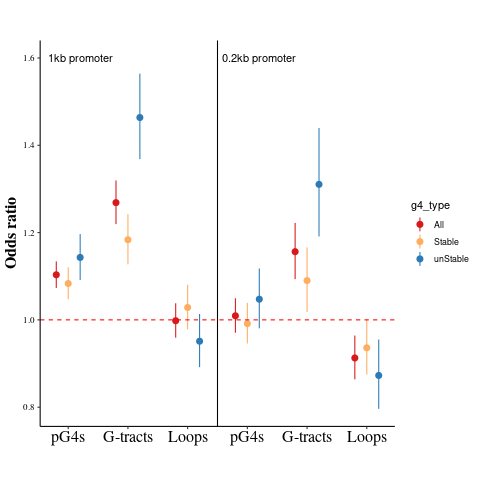

In [7]:
%%R
######################fixed
promoter_g4_fisher <- fisher.test(cbind(c(promoter[promoter$fileName=="promoter_pG4.merge.SFS",]$ployNumber, 
                                          promoter[promoter$fileName=="promoter_pG4.merge.SFS",]$subsNumber),
                                        c(promoter[promoter$fileName=="promoter_nonpG4.merge.SFS",]$ployNumber, 
                                          promoter[promoter$fileName=="promoter_nonpG4.merge.SFS",]$subsNumber)
                                       ))
promoter_Stable_g4_fisher <- fisher.test(cbind(c(promoter[promoter$fileName=="promoter_pG4_Stable.merge.SFS",]$ployNumber, 
                                          promoter[promoter$fileName=="promoter_pG4_Stable.merge.SFS",]$subsNumber),
                                        c(promoter[promoter$fileName=="promoter_nonpG4.merge.SFS",]$ployNumber, 
                                          promoter[promoter$fileName=="promoter_nonpG4.merge.SFS",]$subsNumber)
                                       ))
promoter_unStable_g4_fisher <- fisher.test(cbind(c(promoter[promoter$fileName=="promoter_pG4_unStable.merge.SFS",]$ployNumber, 
                                          promoter[promoter$fileName=="promoter_pG4_unStable.merge.SFS",]$subsNumber),
                                        c(promoter[promoter$fileName=="promoter_nonpG4.merge.SFS",]$ployNumber, 
                                          promoter[promoter$fileName=="promoter_nonpG4.merge.SFS",]$subsNumber)
                                       ))
promoter_gtract_fisher <- fisher.test(cbind(c(promoter[promoter$fileName=="promoter_pG4_Gtract.merge.SFS",]$ployNumber, 
                                          promoter[promoter$fileName=="promoter_pG4_Gtract.merge.SFS",]$subsNumber),
                                        c(promoter[promoter$fileName=="promoter_nonpG4.merge.SFS",]$ployNumber, 
                                          promoter[promoter$fileName=="promoter_nonpG4.merge.SFS",]$subsNumber)
                                       ))
promoter_Stable_gtract_fisher <- fisher.test(cbind(c(promoter[promoter$fileName=="promoter_stableG4_Gtract.merge.SFS",]$ployNumber, 
                                          promoter[promoter$fileName=="promoter_stableG4_Gtract.merge.SFS",]$subsNumber),
                                        c(promoter[promoter$fileName=="promoter_nonpG4.merge.SFS",]$ployNumber, 
                                          promoter[promoter$fileName=="promoter_nonpG4.merge.SFS",]$subsNumber)
                                       ))
promoter_unStable_gtract_fisher <- fisher.test(cbind(c(promoter[promoter$fileName=="promoter_unstable_Gtracts.merge.SFS",]$ployNumber, 
                                          promoter[promoter$fileName=="promoter_unstable_Gtracts.merge.SFS",]$subsNumber),
                                        c(promoter[promoter$fileName=="promoter_nonpG4.merge.SFS",]$ployNumber, 
                                          promoter[promoter$fileName=="promoter_nonpG4.merge.SFS",]$subsNumber)
                                       ))
# loop
promoter_loop_fisher <- fisher.test(cbind(c(promoter[promoter$fileName=="promoter_pG4.loop.merge.SFS",]$ployNumber, 
                                          promoter[promoter$fileName=="promoter_pG4.loop.merge.SFS",]$subsNumber),
                                        c(promoter[promoter$fileName=="promoter_nonpG4.merge.SFS",]$ployNumber, 
                                          promoter[promoter$fileName=="promoter_nonpG4.merge.SFS",]$subsNumber)
                                       ))
promoter_Stable_loop_fisher <- fisher.test(cbind(c(promoter[promoter$fileName=="promoter_pG4_Stable.loop.merge.SFS",]$ployNumber, 
                                          promoter[promoter$fileName=="promoter_pG4_Stable.loop.merge.SFS",]$subsNumber),
                                        c(promoter[promoter$fileName=="promoter_nonpG4.merge.SFS",]$ployNumber, 
                                          promoter[promoter$fileName=="promoter_nonpG4.merge.SFS",]$subsNumber)
                                       ))
promoter_unStable_loop_fisher <- fisher.test(cbind(c(promoter[promoter$fileName=="promoter_pG4_unStable.loop.merge.SFS",]$ployNumber, 
                                          promoter[promoter$fileName=="promoter_pG4_unStable.loop.merge.SFS",]$subsNumber),
                                        c(promoter[promoter$fileName=="promoter_nonpG4.merge.SFS",]$ployNumber, 
                                          promoter[promoter$fileName=="promoter_nonpG4.merge.SFS",]$subsNumber)
                                       ))

### active promoter ####
active_promoter_g4_fisher <- fisher.test(cbind(c(active_promoter[active_promoter$fileName=="active_promoter_pG4.merge.SFS",]$ployNumber, 
                                          active_promoter[active_promoter$fileName=="active_promoter_pG4.merge.SFS",]$subsNumber),
                                        c(active_promoter[active_promoter$fileName=="active_promoter_nonpG4.merge.SFS",]$ployNumber, 
                                          active_promoter[active_promoter$fileName=="active_promoter_nonpG4.merge.SFS",]$subsNumber)
                                       ))
active_promoter_Stable_g4_fisher <- fisher.test(cbind(c(active_promoter[active_promoter$fileName=="active_promoter_pG4_Stable.merge.SFS",]$ployNumber, 
                                          active_promoter[active_promoter$fileName=="active_promoter_pG4_Stable.merge.SFS",]$subsNumber),
                                        c(active_promoter[active_promoter$fileName=="active_promoter_nonpG4.merge.SFS",]$ployNumber, 
                                          active_promoter[active_promoter$fileName=="active_promoter_nonpG4.merge.SFS",]$subsNumber)
                                       ))
active_promoter_unStable_g4_fisher <- fisher.test(cbind(c(active_promoter[active_promoter$fileName=="active_promoter_pG4_unStable.merge.SFS",]$ployNumber, 
                                          active_promoter[active_promoter$fileName=="active_promoter_pG4_unStable.merge.SFS",]$subsNumber),
                                        c(active_promoter[active_promoter$fileName=="active_promoter_nonpG4.merge.SFS",]$ployNumber, 
                                          active_promoter[active_promoter$fileName=="active_promoter_nonpG4.merge.SFS",]$subsNumber)
                                       ))

active_promoter_gtract_fisher <- fisher.test(cbind(c(active_promoter[active_promoter$fileName=="active_promoter_pG4_Gtract.merge.SFS",]$ployNumber, 
                                          active_promoter[active_promoter$fileName=="active_promoter_pG4_Gtract.merge.SFS",]$subsNumber),
                                        c(active_promoter[active_promoter$fileName=="active_promoter_nonpG4.merge.SFS",]$ployNumber, 
                                          active_promoter[active_promoter$fileName=="active_promoter_nonpG4.merge.SFS",]$subsNumber)
                                       ))
active_promoter_Stable_gtract_fisher <- fisher.test(cbind(c(active_promoter[active_promoter$fileName=="active_promoter_stableG4_Gtract.merge.SFS",]$ployNumber, 
                                          active_promoter[active_promoter$fileName=="active_promoter_stableG4_Gtract.merge.SFS",]$subsNumber),
                                        c(active_promoter[active_promoter$fileName=="active_promoter_nonpG4.merge.SFS",]$ployNumber, 
                                          active_promoter[active_promoter$fileName=="active_promoter_nonpG4.merge.SFS",]$subsNumber)
                                       ))
active_promoter_unStable_gtract_fisher <- fisher.test(cbind(c(active_promoter[active_promoter$fileName=="active_promoter_unstable_Gtracts.merge.SFS",]$ployNumber, 
                                          active_promoter[active_promoter$fileName=="active_promoter_unstable_Gtracts.merge.SFS",]$subsNumber),
                                        c(active_promoter[active_promoter$fileName=="active_promoter_nonpG4.merge.SFS",]$ployNumber, 
                                          active_promoter[active_promoter$fileName=="active_promoter_nonpG4.merge.SFS",]$subsNumber)
                                       ))

## loop
active_promoter_loop_fisher <- fisher.test(cbind(c(active_promoter[active_promoter$fileName=="active_promoter_pG4.loop.merge.SFS",]$ployNumber, 
                                          active_promoter[active_promoter$fileName=="active_promoter_pG4.loop.merge.SFS",]$subsNumber),
                                        c(active_promoter[active_promoter$fileName=="active_promoter_nonpG4.merge.SFS",]$ployNumber, 
                                          active_promoter[active_promoter$fileName=="active_promoter_nonpG4.merge.SFS",]$subsNumber)
                                       ))
active_promoter_Stable_loop_fisher <- fisher.test(cbind(c(active_promoter[active_promoter$fileName=="active_promoter_pG4_Stable.loop.merge.SFS",]$ployNumber, 
                                          active_promoter[active_promoter$fileName=="active_promoter_pG4_Stable.loop.merge.SFS",]$subsNumber),
                                        c(active_promoter[active_promoter$fileName=="active_promoter_nonpG4.merge.SFS",]$ployNumber, 
                                          active_promoter[active_promoter$fileName=="active_promoter_nonpG4.merge.SFS",]$subsNumber)
                                       ))
active_promoter_unStable_loop_fisher <- fisher.test(cbind(c(active_promoter[active_promoter$fileName=="active_promoter_pG4_unStable.loop.merge.SFS",]$ployNumber, 
                                          active_promoter[active_promoter$fileName=="active_promoter_pG4_unStable.loop.merge.SFS",]$subsNumber),
                                        c(active_promoter[active_promoter$fileName=="active_promoter_nonpG4.merge.SFS",]$ployNumber, 
                                          active_promoter[active_promoter$fileName=="active_promoter_nonpG4.merge.SFS",]$subsNumber)
                                       ))




promoter_G4 <- c("Promoter", "pG4", "All", promoter_g4_fisher$estimate, promoter_g4_fisher$conf.int[1],promoter_g4_fisher$conf.int[2], promoter_g4_fisher$p.value)
promoter_Stable_G4 <- c("Promoter", "pG4", "Stable", promoter_Stable_g4_fisher$estimate, promoter_Stable_g4_fisher$conf.int[1],promoter_Stable_g4_fisher$conf.int[2], promoter_Stable_g4_fisher$p.value)
promoter_unStable_G4 <- c("Promoter", "pG4", "unStable", promoter_unStable_g4_fisher$estimate, promoter_unStable_g4_fisher$conf.int[1],promoter_unStable_g4_fisher$conf.int[2], promoter_unStable_g4_fisher$p.value)

active_promoter_G4 <- c("active_promoter", "pG4", "All", active_promoter_g4_fisher$estimate, active_promoter_g4_fisher$conf.int[1],active_promoter_g4_fisher$conf.int[2], active_promoter_g4_fisher$p.value)
active_promoter_Stable_G4 <- c("active_promoter", "pG4", "Stable", active_promoter_Stable_g4_fisher$estimate, active_promoter_Stable_g4_fisher$conf.int[1],active_promoter_Stable_g4_fisher$conf.int[2], active_promoter_Stable_g4_fisher$p.value)
active_promoter_unStable_G4 <- c("active_promoter", "pG4", "unStable", active_promoter_unStable_g4_fisher$estimate, active_promoter_unStable_g4_fisher$conf.int[1],active_promoter_unStable_g4_fisher$conf.int[2], active_promoter_unStable_g4_fisher$p.value)

promoter_Gtract <- c("Promoter", "Gtract", "All", promoter_gtract_fisher$estimate, promoter_gtract_fisher$conf.int[1],promoter_gtract_fisher$conf.int[2], promoter_gtract_fisher$p.value)
promoter_Stable_Gtract <- c("Promoter", "Gtract", "Stable", promoter_Stable_gtract_fisher$estimate, promoter_Stable_gtract_fisher$conf.int[1],promoter_Stable_gtract_fisher$conf.int[2], promoter_Stable_gtract_fisher$p.value)
promoter_unStable_Gtract <- c("Promoter", "Gtract", "unStable", promoter_unStable_gtract_fisher$estimate, promoter_unStable_gtract_fisher$conf.int[1],promoter_unStable_gtract_fisher$conf.int[2], promoter_unStable_gtract_fisher$p.value)

active_promoter_Gtract <- c("active_promoter", "Gtract", "All", active_promoter_gtract_fisher$estimate, active_promoter_gtract_fisher$conf.int[1],active_promoter_gtract_fisher$conf.int[2], active_promoter_gtract_fisher$p.value)
active_promoter_Stable_Gtract <- c("active_promoter", "Gtract", "Stable", active_promoter_Stable_gtract_fisher$estimate, active_promoter_Stable_gtract_fisher$conf.int[1],active_promoter_Stable_gtract_fisher$conf.int[2], active_promoter_Stable_gtract_fisher$p.value)
active_promoter_unStable_Gtract <- c("active_promoter", "Gtract", "unStable", active_promoter_unStable_gtract_fisher$estimate, active_promoter_unStable_gtract_fisher$conf.int[1],active_promoter_unStable_gtract_fisher$conf.int[2], active_promoter_unStable_gtract_fisher$p.value)
## loop 
promoter_loop <- c("Promoter", "loop", "All", promoter_loop_fisher$estimate, promoter_loop_fisher$conf.int[1],promoter_loop_fisher$conf.int[2], promoter_loop_fisher$p.value)
promoter_Stable_loop <- c("Promoter", "loop", "Stable", promoter_Stable_loop_fisher$estimate, promoter_Stable_loop_fisher$conf.int[1],promoter_Stable_loop_fisher$conf.int[2], promoter_Stable_loop_fisher$p.value)
promoter_unStable_loop <- c("Promoter", "loop", "unStable", promoter_unStable_loop_fisher$estimate, promoter_unStable_loop_fisher$conf.int[1],promoter_unStable_loop_fisher$conf.int[2], promoter_unStable_loop_fisher$p.value)

active_promoter_loop <- c("active_promoter", "loop", "All", active_promoter_loop_fisher$estimate, active_promoter_loop_fisher$conf.int[1],active_promoter_loop_fisher$conf.int[2], active_promoter_loop_fisher$p.value)
active_promoter_Stable_loop <- c("active_promoter", "loop", "Stable", active_promoter_Stable_loop_fisher$estimate, active_promoter_Stable_loop_fisher$conf.int[1],active_promoter_Stable_loop_fisher$conf.int[2], active_promoter_Stable_loop_fisher$p.value)
active_promoter_unStable_loop <- c("active_promoter", "loop", "unStable", active_promoter_unStable_loop_fisher$estimate, active_promoter_unStable_loop_fisher$conf.int[1],active_promoter_unStable_loop_fisher$conf.int[2], active_promoter_unStable_loop_fisher$p.value)

df <- t(data.frame(promoter_G4,promoter_Stable_G4,promoter_unStable_G4,
                   promoter_Gtract, promoter_Stable_Gtract, promoter_unStable_Gtract,
                   promoter_loop, promoter_Stable_loop, promoter_unStable_loop,
                   active_promoter_G4,active_promoter_Stable_G4,active_promoter_unStable_G4,
                   active_promoter_Gtract, active_promoter_Stable_Gtract, active_promoter_unStable_Gtract,
                   active_promoter_loop, active_promoter_Stable_loop, active_promoter_unStable_loop
                   ))

colnames(df) <- c("promoter_type", "groups", "g4_type","OR","OR_down","OR_up", "pvalue")
write.table(df, "kg_merge.fisher.reslt.tsv", sep="\t", quote = F,row.names=F)
library(ggplot2)
library(tidyr)
df = as.data.frame(df)
df$OR <- as.numeric(df$OR)
df$OR_down <- as.numeric(df$OR_down)
df$OR_up <- as.numeric(df$OR_up)

df$x=c(0.8,1,1.2,1.8,2,2.2,2.8,3,3.2,
       3.8,4,4.2,4.8,5,5.2,5.8,6,6.2
      )

cols <-c(All="#d7191c",Stable="#fdae61",unStable="#2c7bb6")
g <- ggplot(df,aes(x=x,y=OR, color=g4_type))+geom_point()+
    geom_pointrange(aes(ymin=OR_down, ymax=OR_up))+
    geom_hline(yintercept=1.0, linetype="dashed", color="red")+
    scale_fill_manual(values=cols)+
    scale_color_manual(values=cols)+
    geom_vline(xintercept = 3.5, color = "black")+
    labs(title="",subtitle="",y="Odds ratio",x="",caption="",size=16)+
    scale_x_continuous(breaks=c(1,2,3,4,5,6),
                      labels=c("pG4s", "G-tracts","Loops","pG4s", "G-tracts","Loops")
                      )+
    annotate("text",x=4.2,y=1.6,label="0.2kb promoter")+
    annotate("text",x=1.2,y=1.6,label="1kb promoter")+
    theme_classic()+
    theme(axis.text.x=element_text(family = "Times",size=16, colour ="black"),
          axis.text.y = element_text(family = "Times", size=9, colour="black"),
          axis.title.y = element_text(family = "Times", size=16, colour="black",face="bold")
         )
ggsave("kg_merge.fisher.HKA.pdf",g)
g

Saving 6.67 x 6.67 in image


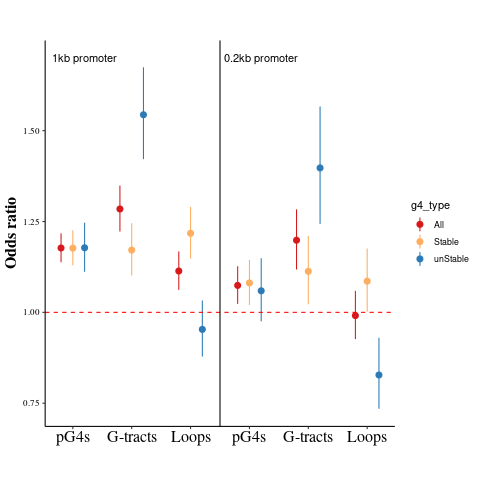

In [8]:
%%R
######################EUR
promoter_g4_fisher <- fisher.test(cbind(c(promoter[promoter$fileName=="promoter_pG4.EUR.SFS",]$ployNumber, 
                                          promoter[promoter$fileName=="promoter_pG4.EUR.SFS",]$subsNumber),
                                        c(promoter[promoter$fileName=="promoter_nonpG4.EUR.SFS",]$ployNumber, 
                                          promoter[promoter$fileName=="promoter_nonpG4.EUR.SFS",]$subsNumber)
                                       ))
promoter_Stable_g4_fisher <- fisher.test(cbind(c(promoter[promoter$fileName=="promoter_pG4_Stable.EUR.SFS",]$ployNumber, 
                                          promoter[promoter$fileName=="promoter_pG4_Stable.EUR.SFS",]$subsNumber),
                                        c(promoter[promoter$fileName=="promoter_nonpG4.EUR.SFS",]$ployNumber, 
                                          promoter[promoter$fileName=="promoter_nonpG4.EUR.SFS",]$subsNumber)
                                       ))
promoter_unStable_g4_fisher <- fisher.test(cbind(c(promoter[promoter$fileName=="promoter_pG4_unStable.EUR.SFS",]$ployNumber, 
                                          promoter[promoter$fileName=="promoter_pG4_unStable.EUR.SFS",]$subsNumber),
                                        c(promoter[promoter$fileName=="promoter_nonpG4.EUR.SFS",]$ployNumber, 
                                          promoter[promoter$fileName=="promoter_nonpG4.EUR.SFS",]$subsNumber)
                                       ))
promoter_gtract_fisher <- fisher.test(cbind(c(promoter[promoter$fileName=="promoter_pG4_Gtract.EUR.SFS",]$ployNumber, 
                                          promoter[promoter$fileName=="promoter_pG4_Gtract.EUR.SFS",]$subsNumber),
                                        c(promoter[promoter$fileName=="promoter_nonpG4.EUR.SFS",]$ployNumber, 
                                          promoter[promoter$fileName=="promoter_nonpG4.EUR.SFS",]$subsNumber)
                                       ))
promoter_Stable_gtract_fisher <- fisher.test(cbind(c(promoter[promoter$fileName=="promoter_stableG4_Gtract.EUR.SFS",]$ployNumber, 
                                          promoter[promoter$fileName=="promoter_stableG4_Gtract.EUR.SFS",]$subsNumber),
                                        c(promoter[promoter$fileName=="promoter_nonpG4.EUR.SFS",]$ployNumber, 
                                          promoter[promoter$fileName=="promoter_nonpG4.EUR.SFS",]$subsNumber)
                                       ))
promoter_unStable_gtract_fisher <- fisher.test(cbind(c(promoter[promoter$fileName=="promoter_unstable_Gtracts.EUR.SFS",]$ployNumber, 
                                          promoter[promoter$fileName=="promoter_unstable_Gtracts.EUR.SFS",]$subsNumber),
                                        c(promoter[promoter$fileName=="promoter_nonpG4.EUR.SFS",]$ployNumber, 
                                          promoter[promoter$fileName=="promoter_nonpG4.EUR.SFS",]$subsNumber)
                                       ))
# loop
promoter_loop_fisher <- fisher.test(cbind(c(promoter[promoter$fileName=="promoter_pG4.loop.EUR.SFS",]$ployNumber, 
                                          promoter[promoter$fileName=="promoter_pG4.loop.EUR.SFS",]$subsNumber),
                                        c(promoter[promoter$fileName=="promoter_nonpG4.EUR.SFS",]$ployNumber, 
                                          promoter[promoter$fileName=="promoter_nonpG4.EUR.SFS",]$subsNumber)
                                       ))
promoter_Stable_loop_fisher <- fisher.test(cbind(c(promoter[promoter$fileName=="promoter_pG4_Stable.loop.EUR.SFS",]$ployNumber, 
                                          promoter[promoter$fileName=="promoter_pG4_Stable.loop.EUR.SFS",]$subsNumber),
                                        c(promoter[promoter$fileName=="promoter_nonpG4.EUR.SFS",]$ployNumber, 
                                          promoter[promoter$fileName=="promoter_nonpG4.EUR.SFS",]$subsNumber)
                                       ))
promoter_unStable_loop_fisher <- fisher.test(cbind(c(promoter[promoter$fileName=="promoter_pG4_unStable.loop.EUR.SFS",]$ployNumber, 
                                          promoter[promoter$fileName=="promoter_pG4_unStable.loop.EUR.SFS",]$subsNumber),
                                        c(promoter[promoter$fileName=="promoter_nonpG4.EUR.SFS",]$ployNumber, 
                                          promoter[promoter$fileName=="promoter_nonpG4.EUR.SFS",]$subsNumber)
                                       ))

### active promoter ####
active_promoter_g4_fisher <- fisher.test(cbind(c(active_promoter[active_promoter$fileName=="active_promoter_pG4.EUR.SFS",]$ployNumber, 
                                          active_promoter[active_promoter$fileName=="active_promoter_pG4.EUR.SFS",]$subsNumber),
                                        c(active_promoter[active_promoter$fileName=="active_promoter_nonpG4.EUR.SFS",]$ployNumber, 
                                          active_promoter[active_promoter$fileName=="active_promoter_nonpG4.EUR.SFS",]$subsNumber)
                                       ))
active_promoter_Stable_g4_fisher <- fisher.test(cbind(c(active_promoter[active_promoter$fileName=="active_promoter_pG4_Stable.EUR.SFS",]$ployNumber, 
                                          active_promoter[active_promoter$fileName=="active_promoter_pG4_Stable.EUR.SFS",]$subsNumber),
                                        c(active_promoter[active_promoter$fileName=="active_promoter_nonpG4.EUR.SFS",]$ployNumber, 
                                          active_promoter[active_promoter$fileName=="active_promoter_nonpG4.EUR.SFS",]$subsNumber)
                                       ))
active_promoter_unStable_g4_fisher <- fisher.test(cbind(c(active_promoter[active_promoter$fileName=="active_promoter_pG4_unStable.EUR.SFS",]$ployNumber, 
                                          active_promoter[active_promoter$fileName=="active_promoter_pG4_unStable.EUR.SFS",]$subsNumber),
                                        c(active_promoter[active_promoter$fileName=="active_promoter_nonpG4.EUR.SFS",]$ployNumber, 
                                          active_promoter[active_promoter$fileName=="active_promoter_nonpG4.EUR.SFS",]$subsNumber)
                                       ))

active_promoter_gtract_fisher <- fisher.test(cbind(c(active_promoter[active_promoter$fileName=="active_promoter_pG4_Gtract.EUR.SFS",]$ployNumber, 
                                          active_promoter[active_promoter$fileName=="active_promoter_pG4_Gtract.EUR.SFS",]$subsNumber),
                                        c(active_promoter[active_promoter$fileName=="active_promoter_nonpG4.EUR.SFS",]$ployNumber, 
                                          active_promoter[active_promoter$fileName=="active_promoter_nonpG4.EUR.SFS",]$subsNumber)
                                       ))
active_promoter_Stable_gtract_fisher <- fisher.test(cbind(c(active_promoter[active_promoter$fileName=="active_promoter_stableG4_Gtract.EUR.SFS",]$ployNumber, 
                                          active_promoter[active_promoter$fileName=="active_promoter_stableG4_Gtract.EUR.SFS",]$subsNumber),
                                        c(active_promoter[active_promoter$fileName=="active_promoter_nonpG4.EUR.SFS",]$ployNumber, 
                                          active_promoter[active_promoter$fileName=="active_promoter_nonpG4.EUR.SFS",]$subsNumber)
                                       ))
active_promoter_unStable_gtract_fisher <- fisher.test(cbind(c(active_promoter[active_promoter$fileName=="active_promoter_unstable_Gtracts.EUR.SFS",]$ployNumber, 
                                          active_promoter[active_promoter$fileName=="active_promoter_unstable_Gtracts.EUR.SFS",]$subsNumber),
                                        c(active_promoter[active_promoter$fileName=="active_promoter_nonpG4.EUR.SFS",]$ployNumber, 
                                          active_promoter[active_promoter$fileName=="active_promoter_nonpG4.EUR.SFS",]$subsNumber)
                                       ))

## loop
active_promoter_loop_fisher <- fisher.test(cbind(c(active_promoter[active_promoter$fileName=="active_promoter_pG4.loop.EUR.SFS",]$ployNumber, 
                                          active_promoter[active_promoter$fileName=="active_promoter_pG4.loop.EUR.SFS",]$subsNumber),
                                        c(active_promoter[active_promoter$fileName=="active_promoter_nonpG4.EUR.SFS",]$ployNumber, 
                                          active_promoter[active_promoter$fileName=="active_promoter_nonpG4.EUR.SFS",]$subsNumber)
                                       ))
active_promoter_Stable_loop_fisher <- fisher.test(cbind(c(active_promoter[active_promoter$fileName=="active_promoter_pG4_Stable.loop.EUR.SFS",]$ployNumber, 
                                          active_promoter[active_promoter$fileName=="active_promoter_pG4_Stable.loop.EUR.SFS",]$subsNumber),
                                        c(active_promoter[active_promoter$fileName=="active_promoter_nonpG4.EUR.SFS",]$ployNumber, 
                                          active_promoter[active_promoter$fileName=="active_promoter_nonpG4.EUR.SFS",]$subsNumber)
                                       ))
active_promoter_unStable_loop_fisher <- fisher.test(cbind(c(active_promoter[active_promoter$fileName=="active_promoter_pG4_unStable.loop.EUR.SFS",]$ployNumber, 
                                          active_promoter[active_promoter$fileName=="active_promoter_pG4_unStable.loop.EUR.SFS",]$subsNumber),
                                        c(active_promoter[active_promoter$fileName=="active_promoter_nonpG4.EUR.SFS",]$ployNumber, 
                                          active_promoter[active_promoter$fileName=="active_promoter_nonpG4.EUR.SFS",]$subsNumber)
                                       ))




promoter_G4 <- c("Promoter", "pG4", "All", promoter_g4_fisher$estimate, promoter_g4_fisher$conf.int[1],promoter_g4_fisher$conf.int[2], promoter_g4_fisher$p.value)
promoter_Stable_G4 <- c("Promoter", "pG4", "Stable", promoter_Stable_g4_fisher$estimate, promoter_Stable_g4_fisher$conf.int[1],promoter_Stable_g4_fisher$conf.int[2], promoter_Stable_g4_fisher$p.value)
promoter_unStable_G4 <- c("Promoter", "pG4", "unStable", promoter_unStable_g4_fisher$estimate, promoter_unStable_g4_fisher$conf.int[1],promoter_unStable_g4_fisher$conf.int[2], promoter_unStable_g4_fisher$p.value)

active_promoter_G4 <- c("active_promoter", "pG4", "All", active_promoter_g4_fisher$estimate, active_promoter_g4_fisher$conf.int[1],active_promoter_g4_fisher$conf.int[2], active_promoter_g4_fisher$p.value)
active_promoter_Stable_G4 <- c("active_promoter", "pG4", "Stable", active_promoter_Stable_g4_fisher$estimate, active_promoter_Stable_g4_fisher$conf.int[1],active_promoter_Stable_g4_fisher$conf.int[2], active_promoter_Stable_g4_fisher$p.value)
active_promoter_unStable_G4 <- c("active_promoter", "pG4", "unStable", active_promoter_unStable_g4_fisher$estimate, active_promoter_unStable_g4_fisher$conf.int[1],active_promoter_unStable_g4_fisher$conf.int[2], active_promoter_unStable_g4_fisher$p.value)

promoter_Gtract <- c("Promoter", "Gtract", "All", promoter_gtract_fisher$estimate, promoter_gtract_fisher$conf.int[1],promoter_gtract_fisher$conf.int[2], promoter_gtract_fisher$p.value)
promoter_Stable_Gtract <- c("Promoter", "Gtract", "Stable", promoter_Stable_gtract_fisher$estimate, promoter_Stable_gtract_fisher$conf.int[1],promoter_Stable_gtract_fisher$conf.int[2], promoter_Stable_gtract_fisher$p.value)
promoter_unStable_Gtract <- c("Promoter", "Gtract", "unStable", promoter_unStable_gtract_fisher$estimate, promoter_unStable_gtract_fisher$conf.int[1],promoter_unStable_gtract_fisher$conf.int[2], promoter_unStable_gtract_fisher$p.value)

active_promoter_Gtract <- c("active_promoter", "Gtract", "All", active_promoter_gtract_fisher$estimate, active_promoter_gtract_fisher$conf.int[1],active_promoter_gtract_fisher$conf.int[2], active_promoter_gtract_fisher$p.value)
active_promoter_Stable_Gtract <- c("active_promoter", "Gtract", "Stable", active_promoter_Stable_gtract_fisher$estimate, active_promoter_Stable_gtract_fisher$conf.int[1],active_promoter_Stable_gtract_fisher$conf.int[2], active_promoter_Stable_gtract_fisher$p.value)
active_promoter_unStable_Gtract <- c("active_promoter", "Gtract", "unStable", active_promoter_unStable_gtract_fisher$estimate, active_promoter_unStable_gtract_fisher$conf.int[1],active_promoter_unStable_gtract_fisher$conf.int[2], active_promoter_unStable_gtract_fisher$p.value)
## loop 
promoter_loop <- c("Promoter", "loop", "All", promoter_loop_fisher$estimate, promoter_loop_fisher$conf.int[1],promoter_loop_fisher$conf.int[2], promoter_loop_fisher$p.value)
promoter_Stable_loop <- c("Promoter", "loop", "Stable", promoter_Stable_loop_fisher$estimate, promoter_Stable_loop_fisher$conf.int[1],promoter_Stable_loop_fisher$conf.int[2], promoter_Stable_loop_fisher$p.value)
promoter_unStable_loop <- c("Promoter", "loop", "unStable", promoter_unStable_loop_fisher$estimate, promoter_unStable_loop_fisher$conf.int[1],promoter_unStable_loop_fisher$conf.int[2], promoter_unStable_loop_fisher$p.value)

active_promoter_loop <- c("active_promoter", "loop", "All", active_promoter_loop_fisher$estimate, active_promoter_loop_fisher$conf.int[1],active_promoter_loop_fisher$conf.int[2], active_promoter_loop_fisher$p.value)
active_promoter_Stable_loop <- c("active_promoter", "loop", "Stable", active_promoter_Stable_loop_fisher$estimate, active_promoter_Stable_loop_fisher$conf.int[1],active_promoter_Stable_loop_fisher$conf.int[2], active_promoter_Stable_loop_fisher$p.value)
active_promoter_unStable_loop <- c("active_promoter", "loop", "unStable", active_promoter_unStable_loop_fisher$estimate, active_promoter_unStable_loop_fisher$conf.int[1],active_promoter_unStable_loop_fisher$conf.int[2], active_promoter_unStable_loop_fisher$p.value)

df <- t(data.frame(
                   promoter_G4,promoter_Stable_G4,promoter_unStable_G4,
                   promoter_Gtract, promoter_Stable_Gtract, promoter_unStable_Gtract,
                   promoter_loop, promoter_Stable_loop, promoter_unStable_loop,
                   active_promoter_G4,active_promoter_Stable_G4,active_promoter_unStable_G4, 
                   active_promoter_Gtract, active_promoter_Stable_Gtract, active_promoter_unStable_Gtract,
                   active_promoter_loop, active_promoter_Stable_loop, active_promoter_unStable_loop
                   ))
colnames(df) <- c("promoter_type", "groups", "g4_type","OR","OR_down","OR_up", "pvalue")
write.table(df, "kg_EUR.fisher.reslt.tsv", quote = F,sep="\t", row.names=F)
library(ggplot2)
library(tidyr)
df = as.data.frame(df)
df$OR <- as.numeric(df$OR)
df$OR_down <- as.numeric(df$OR_down)
df$OR_up <- as.numeric(df$OR_up)

df$x=c(0.8,1,1.2,1.8,2,2.2,2.8,3,3.2,
       3.8,4,4.2,4.8,5,5.2,5.8,6,6.2
      )

cols <-c(All="#d7191c",Stable="#fdae61",unStable="#2c7bb6")
g <- ggplot(df,aes(x=x,y=OR, color=g4_type))+geom_point()+
    geom_pointrange(aes(ymin=OR_down, ymax=OR_up))+
    geom_hline(yintercept=1.0, linetype="dashed", color="red")+
    scale_fill_manual(values=cols)+
    scale_color_manual(values=cols)+
#     geom_vline(xintercept = 2.5, color = "black")+
    geom_vline(xintercept = 3.5, color = "black")+
    labs(title="",subtitle="",y="Odds ratio",x="",caption="",size=16)+
    scale_x_continuous(breaks=c(1,2,3,4,5,6),labels=c("pG4s", "G-tracts","Loops", "pG4s", "G-tracts","Loops"))+
    theme_classic()+
    annotate("text",x=4.2,y=1.7,label="0.2kb promoter")+
    annotate("text",x=1.2,y=1.7,label="1kb promoter")+
    theme(axis.text.x=element_text(family = "Times",size=16,  colour ="black"),
          axis.text.y = element_text(family = "Times", size=9, colour="black"),
          axis.title.y = element_text(family = "Times", size=16, colour="black",face="bold")
         )
ggsave("kg_EUR.fisher.HKA.pdf",g)
g

In [9]:
# EUR pG4 503
import os
from scipy import stats

def maf_get(inputfile,populationNumber):
    min_fre = 1/int(populationNumber)
    with open(inputfile,'r')as fr:
        mafs = []
        selectkey_parser = set()
        for line in fr:
            uline = line.strip().split("\t")
            key = "|".join(uline[0:3])
            sfs = uline[3]
            maf = sfs.split("|")[4]
            
            if key not in selectkey_parser and maf != "NA":
                if float(maf) < 1:
                    maf = float(maf)
                    if maf > 0.5:
                        maf = 1 - maf
                    if float(maf) > min_fre:
                        mafs.append(maf)
            selectkey_parser.add(key)
    return mafs


def KS_test(test, control, comparedName):
    ks_result = stats.ks_2samp(test,control)
    print(comparedName)
    print("Asymptotic two-sample Kolmogorov-Smirnov test")
    print("D = ",ks_result[0])
    print("p-value = ",ks_result[1])
    print("**********")

WD_path = "/disk2/G4_MS/frequency/HKA"

promoter_Stable_pG4_path = os.path.join(WD_path,"promoter_pG4_Stable.EUR.SFS")
promoter_unStable_pG4_path = os.path.join(WD_path,"promoter_pG4_unStable.EUR.SFS")
promoter_pG4_control_path = os.path.join(WD_path,"promoter_nonpG4.EUR.SFS")

activePromoter_Stable_pG4_path = os.path.join(WD_path,"active_promoter_pG4_Stable.EUR.SFS")
activePromoter_unStable_pG4_path = os.path.join(WD_path,"active_promoter_pG4_unStable.EUR.SFS")
activePromoter_pG4_control_path = os.path.join(WD_path,"active_promoter_nonpG4.EUR.SFS")


promoter_Stable_pG4 = maf_get(promoter_Stable_pG4_path, 503)
promoter_unStable_pG4 = maf_get(promoter_unStable_pG4_path, 503)
promoter_pG4_control = maf_get(promoter_pG4_control_path, 503)

activePromoter_Stable_pG4 = maf_get(activePromoter_Stable_pG4_path, 503)
activePromoter_unStable_pG4 = maf_get(activePromoter_unStable_pG4_path, 503)
activePromoter_pG4_control = maf_get(activePromoter_pG4_control_path, 503)
## Gtracts 
promoter_Stable_Gtracts_path = os.path.join(WD_path,"promoter_stableG4_Gtract.EUR.SFS")
promoter_unStable_Gtracts_path = os.path.join(WD_path,"promoter_unstable_Gtracts.EUR.SFS")
promoter_Stable_Gtracts = maf_get(promoter_Stable_Gtracts_path, 503)
promoter_unStable_Gtracts = maf_get(promoter_unStable_Gtracts_path, 503)

activePromoter_Stable_Gtracts_path = os.path.join(WD_path,"active_promoter_stableG4_Gtract.EUR.SFS")
activePromoter_unStable_Gtracts_path = os.path.join(WD_path,"active_promoter_unstable_Gtracts.EUR.SFS")
activePromoter_Stable_Gtracts = maf_get(activePromoter_Stable_Gtracts_path, 503)
activePromoter_unStable_Gtracts = maf_get(activePromoter_unStable_Gtracts_path, 503)
## loops
promoter_Stable_loops_path = os.path.join(WD_path,"promoter_pG4_Stable.loop.EUR.SFS")
promoter_unStable_loops_path = os.path.join(WD_path,"promoter_pG4_unStable.loop.EUR.SFS")
promoter_Stable_loops = maf_get(promoter_Stable_loops_path, 503)
promoter_unStable_loops = maf_get(promoter_unStable_loops_path, 503)

activePromoter_Stable_loops_path = os.path.join(WD_path,"active_promoter_pG4_Stable.loop.EUR.SFS")
activePromoter_unStable_loops_path = os.path.join(WD_path,"active_promoter_pG4_unStable.loop.EUR.SFS")
activePromoter_Stable_loops = maf_get(activePromoter_Stable_loops_path, 503)
activePromoter_unStable_loops = maf_get(activePromoter_unStable_loops_path, 503)

# ks tset
print("*"*20+"Promoter"+ "*"*20)

KS_test(promoter_Stable_pG4 + promoter_unStable_pG4 ,promoter_pG4_control,"all pG4")
KS_test(promoter_Stable_pG4,promoter_pG4_control,"Stable pG4")
KS_test(promoter_unStable_pG4,promoter_pG4_control,"unStable pG4")

KS_test(promoter_Stable_Gtracts + promoter_unStable_Gtracts ,promoter_pG4_control,"all pG4 G-tracts")
KS_test(promoter_Stable_Gtracts,promoter_pG4_control,"Stable pG4 G-tracts")
KS_test(promoter_unStable_Gtracts,promoter_pG4_control,"unStable pG4 G-tracts")

KS_test(promoter_Stable_loops + promoter_unStable_loops ,promoter_pG4_control,"all pG4 loops")
KS_test(promoter_Stable_loops,promoter_pG4_control,"Stable pG4 loops")
KS_test(promoter_unStable_loops,promoter_pG4_control,"unStable pG4 loops")

print("*"*20+"active Promoter"+ "*"*20)
KS_test(activePromoter_Stable_pG4 + activePromoter_unStable_pG4 ,activePromoter_pG4_control,"all pG4")
KS_test(activePromoter_Stable_pG4, activePromoter_pG4_control,"Stable pG4")
KS_test(activePromoter_unStable_pG4,activePromoter_pG4_control,"unStable pG4")

KS_test(activePromoter_Stable_Gtracts + activePromoter_unStable_Gtracts ,activePromoter_pG4_control,"all pG4 G-tracts")
KS_test(activePromoter_Stable_Gtracts,activePromoter_pG4_control,"Stable pG4 G-tracts")
KS_test(activePromoter_unStable_Gtracts,activePromoter_pG4_control,"unStable pG4 G-tracts")

KS_test(activePromoter_Stable_loops + activePromoter_unStable_loops ,activePromoter_pG4_control,"all pG4 loops")
KS_test(activePromoter_Stable_loops,activePromoter_pG4_control,"Stable pG4 loops")
KS_test(activePromoter_unStable_loops,activePromoter_pG4_control,"unStable pG4 loops")

********************Promoter********************
all pG4
Asymptotic two-sample Kolmogorov-Smirnov test
D =  0.12278162772445339
p-value =  5.27663293836081e-103
**********
Stable pG4
Asymptotic two-sample Kolmogorov-Smirnov test
D =  0.15017467063275902
p-value =  6.472068411720847e-111
**********
unStable pG4
Asymptotic two-sample Kolmogorov-Smirnov test
D =  0.05858377575284457
p-value =  8.527372846425907e-08
**********
all pG4 G-tracts
Asymptotic two-sample Kolmogorov-Smirnov test
D =  0.10705029717307768
p-value =  1.5016013802401027e-31
**********
Stable pG4 G-tracts
Asymptotic two-sample Kolmogorov-Smirnov test
D =  0.12290704042607015
p-value =  6.580998093561179e-28
**********
unStable pG4 G-tracts
Asymptotic two-sample Kolmogorov-Smirnov test
D =  0.08684940646980122
p-value =  1.6439662944136932e-07
**********
all pG4 loops
Asymptotic two-sample Kolmogorov-Smirnov test
D =  0.1215910147787288
p-value =  1.5814364519693104e-53
**********
Stable pG4 loops
Asymptotic two-sample

meta NOT subset; don't know how to subset; dropped


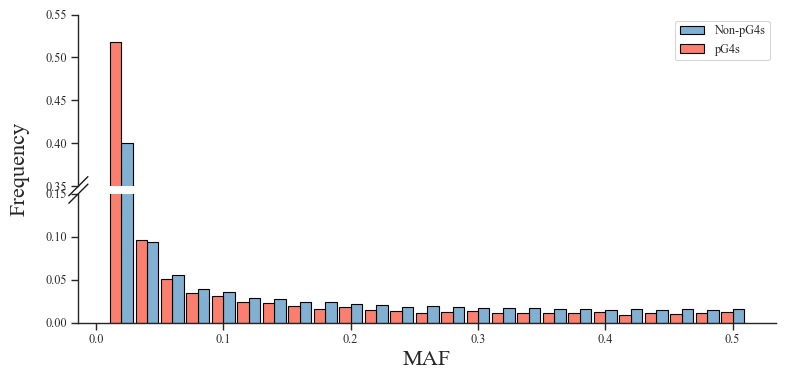

meta NOT subset; don't know how to subset; dropped


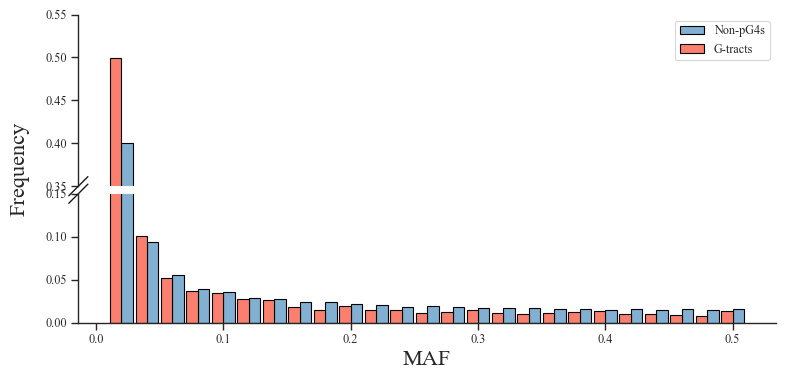

meta NOT subset; don't know how to subset; dropped


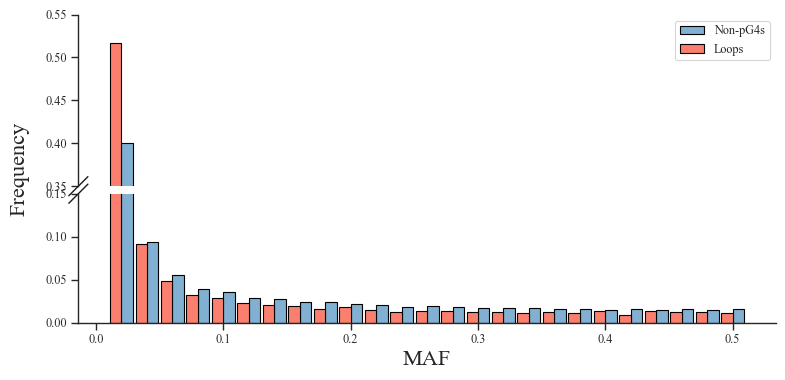

********************Active promoter ********************


meta NOT subset; don't know how to subset; dropped


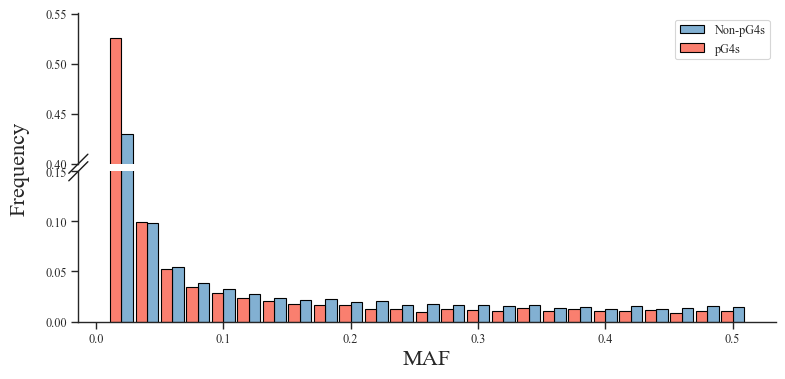

meta NOT subset; don't know how to subset; dropped


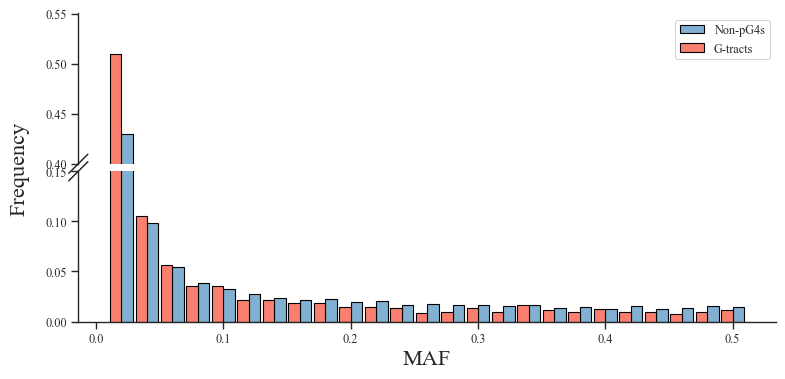

meta NOT subset; don't know how to subset; dropped


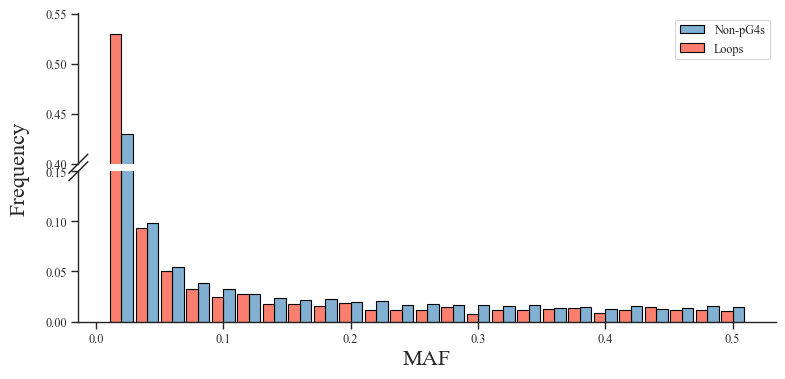

In [10]:
import pandas as pd
import os
from brokenaxes import brokenaxes
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt

def bar_fig(df_c,df,groups,outputname,break_up=0.35):
    mpl.rcParams["pdf.fonttype"] = 42
    mpl.rcParams["ps.fonttype"] = 42
    plt.rcParams['font.sans-serif']=['Times New Roman']

    plt.figure(figsize=(9,4))
    total_width, n = 0.9, 100
    width = total_width/n
    bax = brokenaxes(ylims=((0,0.15),(break_up,0.55)),hspace=0.05)
    tmp_x = []
    tmp_x2 = []

    for _ in list(df_c["x"]):
        tmp_x2.append(_+width/2)
    bax.bar(tmp_x2,df_c["frequency"],width=width,label="Non-pG4s",alpha=1,edgecolor="black",fc="#82B0D2")
    for _ in list(df["x"]):
        tmp_x.append(_- width/2)
    bax.bar(tmp_x,df["frequency"],width=width,label=groups,alpha=1, edgecolor="black",fc="#FA7F6F")
    bax.legend(loc=1)

    bax.set_xlabel('MAF',size=16)
    bax.set_ylabel( "Frequency",size=16)
    plt.savefig(outputname)
    plt.show()
WD_path = "/disk2/G4_MS/frequency/HKA/MAF"
bins = np.arange(0,0.51,0.02)
### promoter
control_bins = pd.cut(promoter_pG4_control,bins,labels=np.delete(bins,[0]))
df_c = pd.DataFrame(pd.value_counts(control_bins)/len(control_bins), columns= ["frequency"])
df_c.loc[:,"groups"] = "non-pG4s"
df_c.loc[:,"x"] = df_c.index

# all pG4
bins_splited = pd.cut(promoter_Stable_pG4+promoter_unStable_pG4,bins,labels=np.delete(bins,[0]))
df = pd.DataFrame(pd.value_counts(bins_splited)/len(bins_splited), columns= ["frequency"])
df.loc[:,"groups"] = "pG4s"
df.loc[:,"x"] = df.index

bar_fig(df_c,df,"pG4s",os.path.join(WD_path,"promoter_pG4.maf.pdf"))
df = df.merge(df_c,on="x")
df = df.rename(columns={"frequency_x":"pG4s","frequency_y":"Non_pG4s","x":"MAF"})
df = df.loc[:,["MAF","Non_pG4s","pG4s"]]
df.to_csv(os.path.join(WD_path,"promoter_pG4.tsv.txt"),index=False, sep="\t")
# G-tracts
bins_splited = pd.cut(promoter_Stable_Gtracts + promoter_unStable_Gtracts,bins,labels=np.delete(bins,[0]))
df = pd.DataFrame(pd.value_counts(bins_splited)/len(bins_splited), columns= ["frequency"])
df.loc[:,"groups"] = "G-tracts"
df.loc[:,"x"] = df.index

bar_fig(df_c,df,"G-tracts",os.path.join(WD_path,"promoter_Gtracts.maf.pdf"))
df = df.merge(df_c,on="x")
df = df.rename(columns={"frequency_x":"G-tracts","frequency_y":"Non_pG4s","x":"MAF"})
df = df.loc[:,["MAF","Non_pG4s","G-tracts"]]
df.to_csv(os.path.join(WD_path,"promoter_Gtracts.tsv.txt"),index=False, sep="\t")

# loops
bins_splited = pd.cut(promoter_Stable_loops + promoter_unStable_loops,bins,labels=np.delete(bins,[0]))
df = pd.DataFrame(pd.value_counts(bins_splited)/len(bins_splited), columns= ["frequency"])
df.loc[:,"groups"] = "Loops"
df.loc[:,"x"] = df.index

bar_fig(df_c,df,"Loops",os.path.join(WD_path,"promoter_Loops.maf.pdf"))
df = df.merge(df_c,on="x")
df = df.rename(columns={"frequency_x":"Loops","frequency_y":"Non_pG4s","x":"MAF"})
df = df.loc[:,["MAF","Non_pG4s","Loops"]]
df.to_csv(os.path.join(WD_path,"promoter_loops.tsv.txt"),index=False, sep="\t")

print("*"*20+"Active promoter "+"*"*20)
### activePromoter
control_bins = pd.cut(activePromoter_pG4_control,bins,labels=np.delete(bins,[0]))
df_c = pd.DataFrame(pd.value_counts(control_bins)/len(control_bins), columns= ["frequency"])
df_c.loc[:,"groups"] = "non-pG4s"
df_c.loc[:,"x"] = df_c.index

# all pG4
bins_splited = pd.cut(activePromoter_Stable_pG4+activePromoter_unStable_pG4,bins,labels=np.delete(bins,[0]))
df = pd.DataFrame(pd.value_counts(bins_splited)/len(bins_splited), columns= ["frequency"])
df.loc[:,"groups"] = "pG4s"
df.loc[:,"x"] = df.index

bar_fig(df_c,df,"pG4s",os.path.join(WD_path,"activePromoter_pG4.maf.pdf"),break_up=0.4)
df = df.merge(df_c,on="x")
df = df.rename(columns={"frequency_x":"pG4s","frequency_y":"Non_pG4s","x":"MAF"})
df = df.loc[:,["MAF","Non_pG4s","pG4s"]]
df.to_csv(os.path.join(WD_path,"activePromoter_pG4.tsv.txt"),index=False, sep="\t")
# G-tracts
bins_splited = pd.cut(activePromoter_Stable_Gtracts + activePromoter_unStable_Gtracts,bins,labels=np.delete(bins,[0]))
df = pd.DataFrame(pd.value_counts(bins_splited)/len(bins_splited), columns= ["frequency"])
df.loc[:,"groups"] = "G-tracts"
df.loc[:,"x"] = df.index

bar_fig(df_c,df,"G-tracts",os.path.join(WD_path,"activePromoter_Gtracts.maf.pdf"),break_up=0.4)
df = df.merge(df_c,on="x")
df = df.rename(columns={"frequency_x":"G-tracts","frequency_y":"Non_pG4s","x":"MAF"})
df = df.loc[:,["MAF","Non_pG4s","G-tracts"]]
df.to_csv(os.path.join(WD_path,"activePromoter_Gtracts.tsv.txt"),index=False, sep="\t")

# loops
bins_splited = pd.cut(activePromoter_Stable_loops + activePromoter_unStable_loops,bins,labels=np.delete(bins,[0]))
df = pd.DataFrame(pd.value_counts(bins_splited)/len(bins_splited), columns= ["frequency"])
df.loc[:,"groups"] = "Loops"
df.loc[:,"x"] = df.index

bar_fig(df_c,df,"Loops",os.path.join(WD_path,"activePromoter_Loops.maf.pdf"),break_up=0.4)
df = df.merge(df_c,on="x")
df = df.rename(columns={"frequency_x":"Loops","frequency_y":"Non_pG4s","x":"MAF"})
df = df.loc[:,["MAF","Non_pG4s","Loops"]]
df.to_csv(os.path.join(WD_path,"activePromoter_loops.tsv.txt"),index=False, sep="\t")

## MAPS analysis

this method was refered to Lee et.al,Integrative analysis reveals RNA G-quadruplexes in UTRs are selectively constrained and enriched for functional associations,Nat Commun,2020.

#### data prepared 
the methylation_hg38.RData and mutation_rate_methylation_bins.txt were download from https://zenodo.org/record/4536050/files/methylation_hg38.RData?download=1, this data was used to control methylation levels(Lee, et al. Disrupting upstream translation in mRNAs is associated with human disease. *Nat Communications* 2021)



In [ ]:
## maps_noG4_g4_data_get.py
import pandas as pd
import pyranges as pr
import os,sys
wdpath = "/disk2/G4_MS/frequency/MAPS/data"
gruns = pr.PyRanges(pd.read_table("/disk2/G4_MS/reference/genomic_Gruns.bed", header=None, names=["Chromosome", "Start", "End" ,"Strand", "grun"]))
promoter = pr.PyRanges(pd.read_table("/disk2/G4_MS/promoter_select/promoter_info/promoter.annotion.tsv"))
epromoter = pr.PyRanges(pd.read_table("/disk2/G4_MS/promoter_select/promoter_info/promoter_info.annotion.H3K4me3.tsv"))
promoter_pG4 = pr.PyRanges(pd.read_table("/disk2/G4_MS/promoter_select/promoter_info/promoter_pG4.info.tsv").loc[:,["Chromosome", "Start","End","Strand","Name","gene_id","transcript_id","Score", "Strand_b"]])
promoter_eG4 = pr.PyRanges(pd.read_table("/disk2/G4_MS/promoter_select/promoter_info/promoter_pG4.info.H3K4me3.tsv").loc[:,["Chromosome", "Start","End","Strand","Name", "gene_id","transcript_id","Score", "Strand_b"]])
all_pG4 = pr.read_bed("/disk2/G4_MS/G4_identify/Quadron/hs38d2.quadron.bed")
def gruns_select(gruns, all_pG4, promoter, promoter_pG4, eG4=False):
    g4 = "pG4"
    if eG4:
        g4 = "eG4"
    promoter_noG4 = promoter.subtract(all_pG4,strandedness=False)
    promoter_pG4_gruns = promoter_pG4.intersect(gruns, strandedness="same").drop_duplicate_positions().as_df().loc[:,["Chromosome", "Start","End","transcript_id","gene_id","Strand"]]
    promoter_pG4_gruns.to_csv(os.path.join(wdpath,"promoter_1000_"+g4+".gruns.bed"),index=False, header=False, sep="\t")
    
    promoter_nonG4_gruns = promoter_noG4.intersect(gruns,strandedness=False).drop_duplicate_positions().as_df().loc[:,["Chromosome", "Start","End","transcript_id","gene_id","Strand"]]
    promoter_nonG4_gruns.to_csv(os.path.join(wdpath, "protein_promoter_1000_noG4."+ g4 + ".gruns.bed"), index=False, header=False, sep="\t")
    
    pre_promoter_pG4 = promoter_pG4.drop_duplicate_positions().as_df().loc[:,["Chromosome", "Start","End","Name", "Strand","transcript_id","gene_id","Strand_b"]]
    if eG4:
        pre_promoter_pG4.to_csv(os.path.join(wdpath, "promoter_pG4.info.H3K4me3.tsv"),index=False, header=False, sep="\t")
    else:
        pre_promoter_pG4.to_csv(os.path.join(wdpath, "promoter_"+g4+".info.tsv"),index=False, header=False, sep="\t")
    
    promoter_stable = promoter_pG4[promoter_pG4.Score >19]
    promoter_unstable = promoter_pG4[promoter_pG4.Score <= 19]
    
    promoter_stable_gruns = promoter_stable.intersect(gruns,strandedness="same").drop_duplicate_positions().as_df().loc[:,["Chromosome", "Start","End","transcript_id","gene_id","Strand"]]
    promoter_stable_gruns.to_csv(os.path.join(wdpath,"promoter_1000_stable_"+g4+".gruns.bed"),index=False, header=False, sep="\t")
    
    promoter_unstable_gruns = promoter_unstable.intersect(gruns,strandedness="same").drop_duplicate_positions().as_df().loc[:,["Chromosome", "Start","End","transcript_id","gene_id","Strand"]]
    promoter_unstable_gruns.to_csv(os.path.join(wdpath,"promoter_1000_unstable_"+g4+".gruns.bed"),index=False, header=False, sep="\t")
    
    promoter = promoter.drop_duplicate_positions().as_df().loc[:,["Chromosome","Start", "End","Promoter_id", "gene_id", "Strand","transcript_id"]]
    if eG4:
        promoter.to_csv(os.path.join(wdpath, "promoter_info.annotion.H3K4me3.tsv"),index=False, header=False, sep="\t")
    else:
        promoter.to_csv(os.path.join(wdpath, "promoter.annotion.tsv"),index=False, header=False, sep="\t")

gruns_select(gruns, all_pG4, promoter, promoter_pG4)
gruns_select(gruns, all_pG4, epromoter, promoter_eG4, eG4=True)


In [ ]:
# maps_synonynous.py
import os,sys,gzip
import pandas as pd
import pybedtools
wdpath = "/disk2/G4_MS/frequency/MAPS/data"
# refpath = "/usr/refence/hg38/hg38.fa"
with gzip.open(os.path.join(wdpath,"cds.gnomad.genomes.v3.1.sites.pass_snps.tsv.gz"),'rt')as fr,open(os.path.join(wdpath,"gnomad.genomes.v3.1.sites.pass_snps.synonymous.tsv"),'w')as fw, open(os.path.join(wdpath,"gnomad.genomes.v3.1.sites.missense.pass_snps.filtered.tsv"),'w')as fw2:
    for line in fr:
        uline = line.strip().split("\t")
        chromsome,start,end,ref,alter,ac,an,af,info=uline
        if "synonymous_variant" in info and "missense_variant" not in info:
            fw.write("\t".join([chromsome,start,ref,alter,an,ac,af,"snv",'.',info])+"\n")
        if "missense_variant" in info:
            fw2.write("\t".join([chromsome,start,ref,alter,an,ac,af,"snv",'.',info])+"\n")

In [ ]:
# snp_trans.py 
import sys,os
import gzip
wdpath = "/disk2/G4_MS/frequency/MAPS/data"
with gzip.open(os.path.join(wdpath,"promoter_region_gnomad.genomes.v3.1.sites.pass_snps.tsv.gz"),'rt')as fr,open(os.path.join(wdpath,"promoter_region_gnomad.genomes.v3.1.sites.pass_snps.tsv"),'w')as fw:
    #fw.write("chromosome\tstart\tref\talt\tan\tac\taf\n")
    for line in fr:
        uline = line.strip().split("\t")
        chromsome,start,end,ref,alter,ac,an,af,info=uline
        fw.write("\t".join([chromsome,start,ref,alter,an,ac,af])+"\n")
        
with gzip.open(os.path.join(wdpath,"active_promoter_region_gnomad.genomes.v3.1.sites.pass_snps.tsv.gz"),'rt')as fr,open(os.path.join(wdpath,"active_promoter_region_gnomad.genomes.v3.1.sites.pass_snps.tsv"),'w')as fw:
    #fw.write("chromosome\tstart\tref\talt\tan\tac\taf\n")
    for line in fr:
        uline = line.strip().split("\t")
        chromsome,start,end,ref,alter,ac,an,af,info=uline
        fw.write("\t".join([chromsome,start,ref,alter,an,ac,af])+"\n")        

with gzip.open("/disk2/G4_MS/reference/gnomad.genomes.v3.1.sites.pass_snps.tsv.gz",'rt')as fr,open(os.path.join(wdpath,"gnomad.genomes.v3.1.sites.pass_snps.high_plof.tsv"),'w')as fw:
    for line in fr:
        uline = line.strip().split("\t")
        chromsome,start,end,ref,alter,ac,an,af,info=uline
        if "HIGH" in info:
            fw.write("\t".join([chromsome,start,ref,alter,an,ac,af,"snv",'.',info])+"\n")

In [ ]:
%%R
# Title     : TODO
# Objective : TODO
# Created by: guang
# Created on: 2021/9/30
# Filname maps.model.R
library(dplyr)
library(ggplot2)
load("/disk2/G4_MS/frequency/MAPS/data/methylation_hg38.RData")

make_ps_model <- function(cds_vcf, mut, AC_thresh = 1) {
  singletons <- cds_vcf %>%
    filter(AC == AC_thresh)
  singletons_context <- table(singletons$mut)
  context_n <- table(cds_vcf$mut)
  prop_singletons <- data.frame('mutation' = names(singletons_context),
                                'singletons' = c(singletons_context))
  prop_n <- data.frame('mutation' = names(context_n),
                       'n' = c(context_n))
  prop_singletons <- left_join(prop_singletons, prop_n, by ='mutation')

  prop_singletons <- left_join(prop_singletons, mut, by = 'mutation')
  ps_lm <- lm(singletons/n ~ mu_snp, data = prop_singletons, weights = n)
  return(ps_lm)

}

make_ps2_model <- function(cds_vcf, mu, AC_thresh = 1) {
  variants <- split(cds_vcf, cds_vcf$group)
  ps_models <- lapply(variants, function(x) make_ps_model(x, mu, AC_thresh))
  return(ps_models)
}

annotate_methylation <- function(variants, mutation_table, methylation) {
  variants <- left_join(variants, methylation)
  # set missing methylation values to zero
  variants$methyl_bins[is.na(variants$methyl_bins)] <- 0
  fixed_context <- ifelse(variants$context %in% mutation_table$context,
                          variants$context,
                          chartr('ATGC','TACG',variants$context))
  fixed_mut <- ifelse(variants$context %in% mutation_table$context,
                      variants$mut_context,
                      chartr('ATGC','TACG',variants$mut_context))

  # amend mutation context for MAPS score calculation
  variants$mut <- paste0(fixed_context,':',
                         variants$methyl_bins,
                         '>',
                         fixed_mut)

  variants$mut <- ifelse(variants$mut %in% mutation_table$mutation,
                         variants$mut,
                         gsub('[1|2]',
                              '0',
                              variants$mut))

  variants$context <- fixed_context
  variants$mut_context <- fixed_mut

  # annotate variants for methylation adjustment
  var_adjust <- mutation_table %>%
    filter(methylation_level != 0) %>%
    select(context) %>% unlist()

  variants$group <- ifelse((variants$context %in% var_adjust),
                           ifelse((variants$REF == 'C' & variants$ALT == 'T') | (variants$REF == 'G' & variants$ALT == 'A'),
                                  'methyl_adjust',
                                  'no_adjust'),
                           'no_adjust')

  return(variants)

}
bed_dir <- "/disk2/G4_MS/frequency/MAPS/data"
setwd(bed_dir)
# load variants from gnomAD v3.1
vcf_syn <- data.table::fread("gnomad.genomes.v3.1.sites.pass_snps.synonymous.tsv")
colnames(vcf_syn) <- c('CHROM','POS','REF','ALT','AN','AC','AF','variant_type','lcr','vep')
seq <- data.table::fread('gnomad.genomes.v3.1.sites.pass_snps.synonymous.seq',
                        header = FALSE)
seq <- toupper(seq$V2)
vcf_syn$heptamer <- seq
# filter variants
vcf_syn <- vcf_syn %>%
    filter(lcr != 1, AN >= 121849, CHROM != 'chrX', CHROM != 'chrY',variant_type == 'snv')
vcf_syn$context <- substr(vcf_syn$heptamer, start = 3, stop = 5)
vcf_syn$mut_context <- paste0(substr(vcf_syn$context, 1, 1),
                      vcf_syn$ALT,
                      substr(vcf_syn$context, 3, 3))

# load mutation rate table
mut <- data.table::fread('mutation_rate_methylation_bins.txt')
mut <- mut %>%
  mutate(ref_context = paste0(context, ':', methylation_level),
         mut_context = paste0(substr(context, 1, 1),
                              alt,
                              substr(context, 3, 3)),
         mutation = paste0(ref_context, '>', mut_context))




# annotate methylation levels
vcf_syn <- annotate_methylation(vcf_syn, mut, combined_methylation_estimates)
vcf_syn$methyl_bins <- as.numeric(as.character(vcf_syn$methyl_bins))
# make MAPS model
ps_lm_genomes <- make_ps2_model(vcf_syn, mut, AC_thresh = 1)
lapply(ps_lm_genomes, function(x) summary(x))
if (!dir.exists('RData')) {
  dir.create('RData')
}
save(ps_lm_genomes, file = 'RData/ps_lm_genomes.RData')

In [ ]:
%%bash
cd /disk2/G4_MS/frequency/MAPS/data
python maps_noG4_g4_data_get.py
bedtools intersect -a /disk2/G4_MS/reference/gnomad.genomes.v3.1.sites.pass_snps.tsv.gz -b /disk2/G4_MS/reference/gencode38.cds_region.bed -wa -u|gzip > cds.gnomad.genomes.v3.1.sites.pass_snps.tsv.gz
python maps_synonynous.py
python snp_trans.py
bedtools sort -i gnomad.genomes.v3.1.sites.missense.pass_snps.filtered.tsv > gnomad.genomes.v3.1.sites.missense.pass_snps.filtered.tsv1
mv gnomad.genomes.v3.1.sites.missense.pass_snps.filtered.tsv1 gnomad.genomes.v3.1.sites.missense.pass_snps.filtered.tsv
awk -v OFS="\t" '{print$1,$2-4,$2+3}' gnomad.genomes.v3.1.sites.missense.pass_snps.filtered.tsv|bedtools getfasta -fi /usr/refence/hg38/hg38.fa -bed - -tab >gnomad.genomes.v3.1.sites.missense.pass_snps.filtered.seq

bedtools sort -i gnomad.genomes.v3.1.sites.pass_snps.synonymous.tsv > gnomad.genomes.v3.1.sites.pass_snps.synonymous.tsv1
mv gnomad.genomes.v3.1.sites.pass_snps.synonymous.tsv1 gnomad.genomes.v3.1.sites.pass_snps.synonymous.tsv
awk -v OFS="\t" '{print$1,$2-4,$2+3}' gnomad.genomes.v3.1.sites.pass_snps.synonymous.tsv |bedtools getfasta -fi /usr/refence/hg38/hg38.fa -bed - -tab > gnomad.genomes.v3.1.sites.pass_snps.synonymous.seq

tail -n +2 /disk2/G4_MS/promoter_select/promoter_info/promoter.annotion.tsv|bedtools sort -i - |bedtools merge -i -|bedtools intersect -a /disk2/G4_MS/reference/gnomad.genomes.v3.1.sites.pass_snps.tsv.gz -b -|bedtools intersect -a - -b /disk2/G4_MS/reference/gencode38.cds_region.bed -v |bedtools sort -i -|gzip > promoter_region_gnomad.genomes.v3.1.sites.pass_snps.tsv.gz
tail -n +2 /disk2/G4_MS/promoter_select/promoter_info/promoter_info.annotion.H3K4me3.tsv|bedtools sort -i - |bedtools merge -i -|bedtools intersect -a /disk2/G4_MS/reference/gnomad.genomes.v3.1.sites.pass_snps.tsv.gz -b -|bedtools intersect -a - -b /disk2/G4_MS/reference/gencode38.cds_region.bed -v |bedtools sort -i - |gzip > active_promoter_region_gnomad.genomes.v3.1.sites.pass_snps.tsv.gz
python snp_trans.py
awk -v OFS="\t" '{print$1,$2-4,$2+3}' promoter_region_gnomad.genomes.v3.1.sites.pass_snps.tsv|bedtools getfasta -fi /usr/refence/hg38/hg38.fa -bed - -tab > promoter_region_gnomad.genomes.v3.1.sites.pass_snps.seq
awk -v OFS="\t" '{print$1,$2-4,$2+3}' active_promoter_region_gnomad.genomes.v3.1.sites.pass_snps.tsv|bedtools getfasta -fi /usr/refence/hg38/hg38.fa -bed - -tab > active_promoter_region_gnomad.genomes.v3.1.sites.pass_snps.seq

# bedtools sort -i gnomad.genomes.v3.1.sites.pass_snps.high_plof.tsv > gnomad.genomes.v3.1.sites.pass_snps.high_plof.tsv1
# mv gnomad.genomes.v3.1.sites.pass_snps.high_plof.tsv1 gnomad.genomes.v3.1.sites.pass_snps.high_plof.tsv
# awk -v OFS="\t" '{print$1,$2-4,$2+3}' gnomad.genomes.v3.1.sites.pass_snps.high_plof.tsv|bedtools getfasta -fi /usr/refence/hg38/hg38.fa -bed - -tab > gnomad.genomes.v3.1.sites.pass_snps.high_plof.tsv.seq

bedtools sort -i gnomad.genomes.v3.1.sites.pass_snps.high_plof.tsv > gnomad.genomes.v3.1.sites.pass_snps.high_plof.tsv1
mv gnomad.genomes.v3.1.sites.pass_snps.high_plof.tsv1 gnomad.genomes.v3.1.sites.pass_snps.high_plof.tsv
awk -v OFS="\t" '{print$1,$2-4,$2+3}' gnomad.genomes.v3.1.sites.pass_snps.high_plof.tsv|bedtools getfasta -fi /usr/refence/hg38/hg38.fa -bed - -tab > gnomad.genomes.v3.1.sites.pass_snps.high_plof.tsv.seq

Rscript maps.model.R

In [ ]:
# Title     : TODO
# Objective : TODO
# Created by: guangyue
# Created on: 2021/9/30
# h3k4me3_stable_unstable.data.get.R

library(GenomicRanges)
library(dplyr)


######################
## Helper functions ##
######################
granges_from_vcf <- function(vcf) {

  vcf$end <- vcf$POS
  grange <- makeGRangesFromDataFrame(vcf, keep.extra.columns = TRUE, ignore.strand = TRUE,
                                     seqnames.field = "CHROM", start.field = "POS", end.field = "end")
  return(grange)

}

apply_qc <- function(vcf, coverage_thresh, SNV = TRUE, AF_thresh = Inf) {

  "
  This function filters variants based on the specified QC metrics. If
  SNV = TRUE, indels are removed. RF_PROB is the Random Forest Probability
  that a called variant is a True Positive. The MacArthur Lab QC process
  uses a RF probability of 0.4 Coverage threshold is the number of total
  alleles that must have been observed (variant or non-variant) for a site.
  In ExAC, the MacArthur Lab uses a cutoff of > 0.8 of the max AN for a site.
  "

  # split X chromosome from others for AN threshold

  thresh = 0.8*coverage_thresh

  nonx <- vcf %>% filter(CHROM != "chrX" & CHROM != "chrY", AN > thresh)
  combined_var <- nonx
  combined_var$AF <- as.numeric(combined_var$AF)

  if (SNV) {
    combined_var <- combined_var %>% filter(nchar(REF) + nchar(ALT) == 2, lcr != 1, decoy != 1)
  } else {
    combined_var <- combined_var %>% filter(lcr != 1, decoy != 1)
  }

  combined_var <- combined_var %>% filter(AF < AF_thresh)
  combined_var$AF <- as.numeric(combined_var$AF)

  combined_var <- combined_var %>% filter(AC > 0)

  return(combined_var)

}

bed_dir <- "/disk2/G4_MS/frequency/MAPS/data"
reference_ranges <- list(g4_gruns = file.path(bed_dir, 'promoter_1000_eG4.gruns.bed'),
                         g4_regions = file.path(bed_dir,'promoter_pG4.info.H3K4me3.tsv'),
             stable_g4_gruns = file.path(bed_dir,'promoter_1000_stable_eG4.gruns.bed'),
             unstable_g4_gruns = file.path(bed_dir,'promoter_1000_unstable_eG4.gruns.bed'),

#                          g4tx_nog4_gruns = file.path(bed_dir,'protein_promoter_1000_noG4.pG4.gruns.g4_tx.bed'),
                         nog4_gruns = file.path(bed_dir,'protein_promoter_1000_noG4.eG4.gruns.bed'),
                         nog4_tx = file.path(bed_dir,'promoter_nopG4.info.H3K4me3.tsv')
                         )

reference_ranges$g4_gruns <- lapply(reference_ranges$g4_gruns, function (x) data.table::fread(
  x,col.names=c("chromosome",'start','end',"txid", "ensembl_gene_id","oristrand")))[[1]]
reference_ranges$g4_regions <- lapply(reference_ranges$g4_regions, function (x) data.table::fread(
  x,col.names=c("chromosome",'start','end',"seq", "oristrand","txid","ensembl_gene_id","oristrand_gene")))[[1]]

## reference_ranges$g4tx_nog4_gruns <- lapply(reference_ranges$g4tx_nog4_gruns, function (x) data.table::fread(
#   x,col.names=c("chromosome",'start','end',"txid", "ensembl_gene_id","oristrand")))[[1]]
reference_ranges$stable_g4_gruns <- lapply(reference_ranges$stable_g4_gruns, function (x) data.table::fread(
  x,col.names=c("chromosome",'start','end',"txid", "ensembl_gene_id","oristrand")))[[1]]
reference_ranges$unstable_g4_gruns <- lapply(reference_ranges$unstable_g4_gruns, function (x) data.table::fread(
  x,col.names=c("chromosome",'start','end',"txid","ensembl_gene_id","oristrand")))[[1]]

reference_ranges$nog4_gruns <- lapply(reference_ranges$nog4_gruns, function (x) data.table::fread(
  x,col.names=c("chromosome",'start','end',"txid", "ensembl_gene_id","oristrand")))[[1]]
reference_ranges$nog4_tx <- lapply(reference_ranges$nog4_tx, function (x) data.table::fread(
  x,col.names=c("chromosome",'start','end',"prmtr_id","ensembl_gene_id", "oristrand","txid")))[[1]]

reference_ranges <- lapply(reference_ranges, function(x) x %>% filter(!chromosome == 'chrY'))
reference_ranges <- lapply(reference_ranges, function(x) mutate(x,txid=substr(txid,1,15)))
reference_ranges <- lapply(reference_ranges, function(x) mutate(x,ensembl_gene_id=substr(ensembl_gene_id,1,15)))
reference_ranges <- lapply(reference_ranges, function(x) mutate(x,end=end-1))
reference_granges <- lapply(reference_ranges, function(x) makeGRangesFromDataFrame(x,
                                                                                   keep.extra.columns = TRUE,
                                                                                   ignore.strand = TRUE,
                                                                                   seqnames.field = "chromosome",
                                                                                   start.field = "start",
                                                                                   end.field = "end",
                                                                                   starts.in.df.are.0based = FALSE))
cds_ranges <- data.table::fread(file.path(bed_dir,'cds_region.used.bed'),
                         col.names = c("chromosome",'start','end',"ensembl_gene_id","gene_name", "oristrand","txid"))
cds_ranges <- cds_ranges %>% filter(!chromosome == 'chrY')
cds_ranges <- mutate(cds_ranges,ensembl_gene_id=substr(ensembl_gene_id,1,15))
cds_ranges <- mutate(cds_ranges,txid=substr(txid,1,15))
cds_ranges$end <- cds_ranges$end -1
cds_ranges <- makeGRangesFromDataFrame(cds_ranges,
                                       keep.extra.columns = TRUE,
                                       ignore.strand = TRUE,
                                       seqnames.field = 'chromosome',
                                       start.field = 'start',
                                       end.field = 'end',
                                       starts.in.df.are.0based = FALSE)
promoter_region <- data.table::fread(file.path(bed_dir,'promoter_info.annotion.H3K4me3.tsv'),
                                     col.names = c("chromosome",'start','end',"prmtr_id","ensembl_gene_id", "oristrand","txid")
)
promoter_region <- mutate(promoter_region,ensembl_gene_id=substr(ensembl_gene_id,1,15))
promoter_region <- mutate(promoter_region,txid=substr(txid,1,15))
promoter_region <- makeGRangesFromDataFrame(promoter_region,
                                       keep.extra.columns = TRUE,
                                       ignore.strand = TRUE,
                                       seqnames.field = 'chromosome',
                                       start.field = 'start',
                                       end.field = 'end',
                                       starts.in.df.are.0based = FALSE)

In [ ]:
# Title     : TODO
# Objective : TODO
# Created by: guangyue
# Created on: 2021/9/30
# h3k4me3_stable_unstable.data.get.R

library(GenomicRanges)
library(dplyr)


######################
## Helper functions ##
######################
granges_from_vcf <- function(vcf) {

  vcf$end <- vcf$POS
  grange <- makeGRangesFromDataFrame(vcf, keep.extra.columns = TRUE, ignore.strand = TRUE,
                                     seqnames.field = "CHROM", start.field = "POS", end.field = "end")
  return(grange)

}

apply_qc <- function(vcf, coverage_thresh, SNV = TRUE, AF_thresh = Inf) {

  "
  This function filters variants based on the specified QC metrics. If
  SNV = TRUE, indels are removed. RF_PROB is the Random Forest Probability
  that a called variant is a True Positive. The MacArthur Lab QC process
  uses a RF probability of 0.4 Coverage threshold is the number of total
  alleles that must have been observed (variant or non-variant) for a site.
  In ExAC, the MacArthur Lab uses a cutoff of > 0.8 of the max AN for a site.
  "

  # split X chromosome from others for AN threshold

  thresh = 0.8*coverage_thresh

  nonx <- vcf %>% filter(CHROM != "chrX" & CHROM != "chrY", AN > thresh)
  combined_var <- nonx
  combined_var$AF <- as.numeric(combined_var$AF)

  if (SNV) {
    combined_var <- combined_var %>% filter(nchar(REF) + nchar(ALT) == 2, lcr != 1, decoy != 1)
  } else {
    combined_var <- combined_var %>% filter(lcr != 1, decoy != 1)
  }

  combined_var <- combined_var %>% filter(AF < AF_thresh)
  combined_var$AF <- as.numeric(combined_var$AF)

  combined_var <- combined_var %>% filter(AC > 0)

  return(combined_var)

}

bed_dir <- "/disk2/G4_MS/frequency/MAPS/data"
reference_ranges <- list(g4_gruns = file.path(bed_dir, 'promoter_1000_eG4.gruns.bed'),
                         g4_regions = file.path(bed_dir,'promoter_pG4.info.H3K4me3.tsv'),
			 stable_g4_gruns = file.path(bed_dir,'promoter_1000_stable_eG4.gruns.bed'),
			 unstable_g4_gruns = file.path(bed_dir,'promoter_1000_unstable_eG4.gruns.bed'),

#                          g4tx_nog4_gruns = file.path(bed_dir,'protein_promoter_1000_noG4.pG4.gruns.g4_tx.bed'),
                         nog4_gruns = file.path(bed_dir,'protein_promoter_1000_noG4.eG4.gruns.bed'),
                         nog4_tx = file.path(bed_dir,'promoter_nopG4.info.H3K4me3.tsv')
                         )

reference_ranges$g4_gruns <- lapply(reference_ranges$g4_gruns, function (x) data.table::fread(
  x,col.names=c("chromosome",'start','end',"txid", "ensembl_gene_id","oristrand")))[[1]]
reference_ranges$g4_regions <- lapply(reference_ranges$g4_regions, function (x) data.table::fread(
  x,col.names=c("chromosome",'start','end',"seq", "oristrand","txid","ensembl_gene_id","oristrand_gene")))[[1]]

## reference_ranges$g4tx_nog4_gruns <- lapply(reference_ranges$g4tx_nog4_gruns, function (x) data.table::fread(
#   x,col.names=c("chromosome",'start','end',"txid", "ensembl_gene_id","oristrand")))[[1]]
reference_ranges$stable_g4_gruns <- lapply(reference_ranges$stable_g4_gruns, function (x) data.table::fread(
  x,col.names=c("chromosome",'start','end',"txid", "ensembl_gene_id","oristrand")))[[1]]
reference_ranges$unstable_g4_gruns <- lapply(reference_ranges$unstable_g4_gruns, function (x) data.table::fread(
  x,col.names=c("chromosome",'start','end',"txid","ensembl_gene_id","oristrand")))[[1]]

reference_ranges$nog4_gruns <- lapply(reference_ranges$nog4_gruns, function (x) data.table::fread(
  x,col.names=c("chromosome",'start','end',"txid", "ensembl_gene_id","oristrand")))[[1]]
reference_ranges$nog4_tx <- lapply(reference_ranges$nog4_tx, function (x) data.table::fread(
  x,col.names=c("chromosome",'start','end',"prmtr_id","ensembl_gene_id", "oristrand","txid")))[[1]]

reference_ranges <- lapply(reference_ranges, function(x) x %>% filter(!chromosome == 'chrY'))
reference_ranges <- lapply(reference_ranges, function(x) mutate(x,txid=substr(txid,1,15)))
reference_ranges <- lapply(reference_ranges, function(x) mutate(x,ensembl_gene_id=substr(ensembl_gene_id,1,15)))
reference_ranges <- lapply(reference_ranges, function(x) mutate(x,end=end-1))
reference_granges <- lapply(reference_ranges, function(x) makeGRangesFromDataFrame(x,
                                                                                   keep.extra.columns = TRUE,
                                                                                   ignore.strand = TRUE,
                                                                                   seqnames.field = "chromosome",
                                                                                   start.field = "start",
                                                                                   end.field = "end",
                                                                                   starts.in.df.are.0based = FALSE))
cds_ranges <- data.table::fread(file.path(bed_dir,'cds_region.used.bed'),
                         col.names = c("chromosome",'start','end',"ensembl_gene_id","gene_name", "oristrand","txid"))
cds_ranges <- cds_ranges %>% filter(!chromosome == 'chrY')
cds_ranges <- mutate(cds_ranges,ensembl_gene_id=substr(ensembl_gene_id,1,15))
cds_ranges <- mutate(cds_ranges,txid=substr(txid,1,15))
cds_ranges$end <- cds_ranges$end -1
cds_ranges <- makeGRangesFromDataFrame(cds_ranges,
                                       keep.extra.columns = TRUE,
                                       ignore.strand = TRUE,
                                       seqnames.field = 'chromosome',
                                       start.field = 'start',
                                       end.field = 'end',
                                       starts.in.df.are.0based = FALSE)
promoter_region <- data.table::fread(file.path(bed_dir,'promoter_info.annotion.H3K4me3.tsv'),
                                     col.names = c("chromosome",'start','end',"prmtr_id","ensembl_gene_id", "oristrand","txid")
)
promoter_region <- mutate(promoter_region,ensembl_gene_id=substr(ensembl_gene_id,1,15))
promoter_region <- mutate(promoter_region,txid=substr(txid,1,15))
promoter_region <- makeGRangesFromDataFrame(promoter_region,
                                       keep.extra.columns = TRUE,
                                       ignore.strand = TRUE,
                                       seqnames.field = 'chromosome',
                                       start.field = 'start',
                                       end.field = 'end',
                                       starts.in.df.are.0based = FALSE)


In [ ]:
# promoter.MAPS.R
library(dplyr)
library(GenomicRanges)
library(ggplot2)
#library(ensembldb)

setwd("/disk2/G4_MS/frequency/MAPS")
source("/disk2/G4_MS/frequency/MAPS/data/tss_stable_unstable.data.get.R")
load("data/RData/ps_lm_genomes.RData")

gtffile <- "/disk2/G4_MS/frequency/MAPS/data/Homo_sapiens.GRCh38.104.gtf.gz"
DB.104 <- ensembldb::ensDbFromGtf(gtf = gtffile)
EnsDb.Hsapiens.v104 <- ensembldb::EnsDb(DB.104)
## cds rangeget
mu <- data.table::fread("data/mutation_rate_methylation_bins.txt")
mu <- mu %>%
  mutate(ref_context = paste0(context,":",methylation_level),
         mut_context = paste0(substr(context,1,1),
                              alt,
                              substr(context,3,3)),
         mutation = paste0(ref_context,">",mut_context))
## Genes with alternativate pG4 isoform
dlata_g4 <- unique(intersect(reference_ranges$nog4_tx$ensembl_gene_id,reference_ranges$g4_regions$ensembl_gene_id))
constitutive_g4 <-unique(setdiff(reference_ranges$g4_regions$ensembl_gene_id,reference_ranges$nog4_tx$ensembl_gene_id))

# load constraint table by gene
gene_constraints <- data.table::fread("/disk2/G4_MS/reference/gnomad.v2.1.1.lof_metrics.by_gene.txt")
non_plof_genes <- gene_constraints[order(gene_constraints$oe_lof_upper,decreasing = TRUE),]
non_plof_genes <- non_plof_genes[1:6568,]
plof_genes <- gene_constraints[order(gene_constraints$oe_lof_upper,decreasing = FALSE),]
plof_genes <- plof_genes[1:6568,]
clinvar_genes <- data.table::fread("/disk2/G4_MS/reference/clinvar_20220115.vcf_annotated_af.tsv")
clinvar_genes <- AnnotationDbi::mapIds(EnsDb.Hsapiens.v104,
                                       keys=gsub(pattern = ":.*","",clinvar_genes$GENEINFO),
                                       column = "GENEID",keytype="SYMBOL")
cgcs <- data.table::fread("/disk2/G4_MS/reference//cancer_gene_census.tsv")
cgcs <- AnnotationDbi::mapIds(EnsDb.Hsapiens.v104,keys=cgcs$GeneSymbol,column = "GENEID",keytype="SYMBOL")

tsgs <- data.table::fread("/disk2/G4_MS/reference//tsgenes.tsv")
# tsgs <- tsgs[which(tsgs$GeneType=='protein-coding'),]
tsgs <- AnnotationDbi::mapIds(EnsDb.Hsapiens.v104,keys=tsgs$GeneSymbol,column = "GENEID",keytype="SYMBOL")

# Load genome-wide methylation estimates
load('data/methylation_hg38.RData')
promoter_gnomad <- data.table::fread("data/promoter_region_gnomad.genomes.v3.1.sites.pass_snps.tsv")
colnames(promoter_gnomad) <- c("CHROM", "POS", "REF", "ALT", "AN", "AC", "AF")
promoter_hept <- data.table::fread("data/promoter_region_gnomad.genomes.v3.1.sites.pass_snps.seq", header = FALSE)
promoter_tri <- substr(promoter_hept$V2,3,5)
promoter_gnomad$context <- toupper(promoter_tri)
promoter_gnomad$mut_context <- paste0(substr(promoter_gnomad$context,1,1),
                                      promoter_gnomad$ALT,
                                      substr(promoter_gnomad$context,3,3))
promoter_gnomad$hept <- toupper(promoter_hept$V2)
promoter_gnomad <- promoter_gnomad %>%  select(CHROM, POS, REF, ALT, AN, AC, AF, context, mut_context, hept) %>%
  filter(CHROM != 'chrX', AN > 0.8*152312, AC >= 1)
rm(promoter_hept)
rm(promoter_tri)
promoter_gnomad_grange <- granges_from_vcf(promoter_gnomad)
### 
# combined_promoter_variants = promoter_gnomad_grange
g1_allowed <- c('AGG',
                'CCA',
                'CCG',
                'CCT',
                'CGG',
                'TGG')
g2_allowed <- c('CCC','GGG')
g3_allowed <- c('ACC',
                'GCC',
                'GGA',
                'GGC',
                'GGT',
                'TCC')

allowed <- list('pos1' = g1_allowed,
                'pos2' = g2_allowed,
                'pos3' = g3_allowed)

######################
## Helper Functions ##
######################

get_ps <- function(vcf_list, mu) {

  n <- lapply(vcf_list, function(x) table(x$mutation))
  ps <- lapply(vcf_list, function(x) table(x[x$AC == 1]$mutation))

  ps_res <- mapply(function(x, y) cbind(x, y[match(names(x), names(y))]), x=n, y=ps, SIMPLIFY = FALSE)
  ps_res <- lapply(ps_res, function(x) x[match(mu$mutation, rownames(x)),])

  return(ps_res)
}


get_mu_avg <- function(ps_list, mu) {

  res <- lapply(ps_list, function(x) sum((x*mu$mu_snp), na.rm = TRUE) / sum(x, na.rm = TRUE))


  return(res)

}


calc_maps <- function(raw_ps, ps_counts, predictions) {

  obs <- unlist(raw_ps) * unlist(ps_counts)
  exp <- unlist(predictions) * unlist(ps_counts)

  maps <- (obs - exp) / unlist(ps_counts)

  return(maps)

}
# MAPS 2 model:
calc_maps2 <- function(variants, mu, ps_lm) {

  variants <- data.frame(variants)

  total_variants <- dim(variants)[[1]]

  variants <- split(variants, variants$group)

  if (length(variants) == 2) {
    methyl_adjust <- variants$methyl_adjust %>%
      group_by(mut) %>%
      summarise(singletons = length(which(AC == 1)),
                n = length(AN)) %>%
      mutate(ps = singletons / n) %>%
      left_join(., mu, by = c('mut' = 'mutation')) %>%
      select(mut, singletons, n, ps, methylation_level, mu_snp) %>%
      get_obs_exp_singletons(., ps_lm = ps_lm$methyl_adjust)
    no_adjust <- variants$no_adjust %>%
      group_by(mut) %>%
      summarise(singletons = length(which(AC == 1)),
                n = length(AN)) %>%
      mutate(ps = singletons / n) %>%
      left_join(., mu, by = c('mut' = 'mutation')) %>%
      select(mut, singletons, n, ps, methylation_level, mu_snp) %>%
      get_obs_exp_singletons(., ps_lm = ps_lm$no_adjust)

  } else if (names(variants) == 'no_adjust') {

    methyl_adjust <- c('exp_singletons.1' = 0,
                       'obs_singletons' = 0)
    no_adjust <- variants$no_adjust %>%
      group_by(mut) %>%
      summarise(singletons = length(which(AC == 1)),
                n = length(AN)) %>%
      mutate(ps = singletons / n) %>%
      left_join(., mu, by = c('mut' = 'mutation')) %>%
      select(mut, singletons, n, ps, methylation_level, mu_snp) %>%
      get_obs_exp_singletons(., ps_lm = ps_lm$no_adjust)
  } else {
    methyl_adjust <- variants$methyl_adjust %>%
      group_by(mut) %>%
      summarise(singletons = length(which(AC == 1)),
                n = length(AN)) %>%
      mutate(ps = singletons / n) %>%
      left_join(., mu, by = c('mut' = 'mutation')) %>%
      select(mut, singletons, n, ps, methylation_level, mu_snp) %>%
      get_obs_exp_singletons(., ps_lm = ps_lm$methyl_adjust)
    no_adjust <- c('exp_singletons.1' = 0,
                   'obs_singletons' = 0)
  }
  combined <- methyl_adjust + no_adjust

  maps <- (combined['obs_singletons'] - combined['exp_singletons.1']) / total_variants
  raw_p <- combined['obs_singletons'] / total_variants
  se <-  sqrt(raw_p*(1-raw_p)/total_variants)
  result <- c("MAPS" = as.numeric(maps), "SE" = as.numeric(se), "N" = as.integer(total_variants))
  return(result)

}

get_obs_exp_singletons <- function(variants, ps_lm) {

  variants <- na.omit(variants)
  mu_avg <- sum(variants$n * variants$mu_snp) / sum(variants$n)
  exp_singletons <- sum(variants$n) * predict(ps_lm, data.frame('mu_snp' = mu_avg))
  obs_singletons <- sum(variants$singletons)
  return(c('exp_singletons' = exp_singletons,
           'obs_singletons' = obs_singletons))

}

do_MAPS <- function(vcf_list, mu, ps_model) {
  # determine proportion singletons
  ps <- get_ps(vcf_list, mu)
  # determine mu average for the variants + contexts
  mu_avg <- get_mu_avg(ps, mu)
  # extract raw proportion of singletons
  raw_p <- lapply(vcf_list, function(x) length(x[x$AC==1])/length(x))
  var_counts <- lapply(vcf_list, function(x) length(x))
  se <- mapply(function(p, n ) sqrt(p*(1-p)/n), raw_p, var_counts)
  # predicted ps:
  ps_predict <- lapply(mu_avg, function(x) predict(ps_model, data.frame(mu = unlist(x))))
  maps <- calc_maps(raw_p, var_counts, ps_predict)
  return(maps)

}

annotate_grun_position <- function(grun_grange, promoter_region, width = 3) {

  gruns <- grun_grange[width(grun_grange) == width]
  gruns_df <- data.frame(gruns)
  #gruns$strand <- gruns$oristrand
  gruns_df$strand <- promoter_region$oristrand[match(gruns_df$txid, promoter_region$txid)]
  # gruns_df$strand <- gruns_df$strand.1
  # gruns_df <- gruns_df[,!colnames(gruns_df) %in% c("oristrand","strand.1")]
  tile <- makeGRangesFromDataFrame(gruns_df)
  tile <- tile(tile, width = 1) %>% as.data.frame()
  pos_tiles <- tile %>% filter(strand == '+')
  neg_tiles <- tile %>% filter(strand == '-')

  pos_tiles$var_pos <- rep(x = c(1:width), dim(pos_tiles)[[1]]/width)
  neg_tiles$var_pos <- rep(x = c(1:width), dim(neg_tiles)[[1]]/width)

  tiles <- rbind(pos_tiles, neg_tiles)

  pos1 <- tiles %>% filter(var_pos == 1)
  pos2 <- tiles %>% filter(var_pos == 2)
  pos3 <- tiles %>% filter(var_pos == 3)

  res <- list("pos1" = pos1,
              "pos2" = pos2,
              "pos3" = pos3)
  res <- lapply(res, function(x) makeGRangesFromDataFrame(x, keep.extra.columns = TRUE))
  return(res)

}
match_var_to_strand <- function(var_grange_first, var_grange_last, tx_grange) {

  # this function annotates a variant as being either first or last in a trinucleotide G/C run
  # based on the strand of the UTR transcript

  pos_strand <- tx_grange[tx_grange$oristrand == '+']
  neg_strand <- tx_grange[tx_grange$oristrand == '-']
  pos_strand_first <- subsetByOverlaps(var_grange_first, pos_strand)
  pos_strand_last <- subsetByOverlaps(var_grange_last, pos_strand)

  neg_strand_first <- subsetByOverlaps(var_grange_last, neg_strand)
  neg_strand_last <- subsetByOverlaps(var_grange_first, neg_strand)

  first_vars <- c(pos_strand_first, neg_strand_first)
  last_vars <- c(pos_strand_last, neg_strand_last)

  return(list('pos1'=first_vars,
              'pos3'=last_vars))

}

calc_maps2_bootstrap <- function(variants, mu, ps_lm) {

  total_variants <- dim(variants)[[1]]

  variants <- variants[sample(1:total_variants, total_variants, replace = TRUE),]

  variants <- split(variants, variants$group)

  if (length(variants) == 2) {

    methyl_adjust <- variants$methyl_adjust %>%
      group_by(mut) %>%
      summarise(singletons = length(which(AC == 1)),
                n = length(AN)) %>%
      mutate(ps = singletons / n) %>%
      left_join(., mu, by = c('mut' = 'mutation')) %>%
      select(mut, singletons, n, ps, methylation_level, mu_snp) %>%
      get_obs_exp_singletons(., ps_lm = ps_lm$methyl_adjust)

    no_adjust <- variants$no_adjust %>%
      group_by(mut) %>%
      summarise(singletons = length(which(AC == 1)),
                n = length(AN)) %>%
      mutate(ps = singletons / n) %>%
      left_join(., mu, by = c('mut' = 'mutation')) %>%
      select(mut, singletons, n, ps, methylation_level, mu_snp) %>%
      get_obs_exp_singletons(., ps_lm = ps_lm$no_adjust)

  } else if (names(variants) == 'no_adjust') {

    methyl_adjust <- c('exp_singletons.1' = 0,
                       'obs_singletons' = 0)

    no_adjust <- variants$no_adjust %>%
      group_by(mut) %>%
      summarise(singletons = length(which(AC == 1)),
                n = length(AN)) %>%
      mutate(ps = singletons / n) %>%
      left_join(., mu, by = c('mut' = 'mutation')) %>%
      select(mut, singletons, n, ps, methylation_level, mu_snp) %>%
      get_obs_exp_singletons(., ps_lm = ps_lm$no_adjust)

  } else {

    methyl_adjust <- variants$methyl_adjust %>%
      group_by(mut) %>%
      summarise(singletons = length(which(AC == 1)),
                n = length(AN)) %>%
      mutate(ps = singletons / n) %>%
      left_join(., mu, by = c('mut' = 'mutation')) %>%
      select(mut, singletons, n, ps, methylation_level, mu_snp) %>%
      get_obs_exp_singletons(., ps_lm = ps_lm$methyl_adjust)

    no_adjust <- c('exp_singletons.1' = 0,
                   'obs_singletons' = 0)
  }
combined <- methyl_adjust + no_adjust

  maps <- (combined['obs_singletons'] - combined['exp_singletons.1']) / total_variants

  return(as.numeric(maps))

}
                
bootstrap_maps2 <- function(variants, mu, ps_lm, ntimes = 10000) {

  variants <- data.frame(variants)

  variants <- variants %>%
    select(AC, AN, group, mut)

  res <- vector("list", length = ntimes)

  res <- lapply(res, function(x) calc_maps2_bootstrap(variants, mu, ps_lm))

  return(unlist(res))

}

resample_MAPS <- function(vcf, mu, ps_model) {

  n <- table(vcf$mut_context)
  ps <- table(vcf[vcf$AC == 1]$mut_context)

  ps <- cbind(n, ps[match(names(n), names(ps))])
  ps <- ps[match(mu$mut_context, rownames(ps)),]

  mu_average <- sum(ps*mu$mu_snp, na.rm =TRUE) / sum(ps, na.rm = TRUE)

  raw_p <- length(vcf[vcf$AC==1])/length(vcf)
  var_counts <- length(vcf)
  ps_predict <- predict(ps_model, data.frame(mu = unlist(mu_average)))

  obs <- unlist(raw_p) * unlist(var_counts)
  exp <- unlist(ps_predict) * unlist(var_counts)
  maps <- (obs-exp)/unlist(var_counts)

  return(maps)

}

generate_bootstrap <- function(vcf, n, mu, ps_model) {

  x <- length(vcf)

  res <- rep(x, n)

  samples <- lapply(res, function(x) sample(x, size = x, replace = TRUE))

  maps_bootstrap <- lapply(samples, function(x) resample_MAPS(vcf[x], mu = mu, ps_model = ps_model))

  return(unlist(maps_bootstrap))

}
                
chunked_bootstrap <- function(vcf, n, mu, ps_model) {

  chunksize <- as.integer(n/10)
  chunk1 <- bootstrap_maps2(variants = vcf, ntimes = chunksize,
                            mu = mu, ps_lm = ps_model)
  chunk2 <- bootstrap_maps2(variants = vcf, ntimes = chunksize,
                            mu = mu, ps_lm = ps_model)
  chunk3 <- bootstrap_maps2(variants = vcf, ntimes = chunksize,
                            mu = mu, ps_lm = ps_model)
  chunk4 <- bootstrap_maps2(variants = vcf, ntimes = chunksize,
                            mu = mu, ps_lm = ps_model)
  chunk5 <- bootstrap_maps2(variants = vcf, ntimes = chunksize,
                            mu = mu, ps_lm = ps_model)
  chunk6 <- bootstrap_maps2(variants = vcf, ntimes = chunksize,
                            mu = mu, ps_lm = ps_model)
  chunk7 <- bootstrap_maps2(variants = vcf, ntimes = chunksize,
                            mu = mu, ps_lm = ps_model)
  chunk8 <- bootstrap_maps2(variants = vcf, ntimes = chunksize,
                            mu = mu, ps_lm = ps_model)
  chunk9 <- bootstrap_maps2(variants = vcf, ntimes = chunksize,
                            mu = mu, ps_lm = ps_model)
  chunk10 <- bootstrap_maps2(variants = vcf, ntimes = chunksize,
                             mu = mu, ps_lm = ps_model)
  result <- c(chunk1, chunk2, chunk3, chunk4, chunk5,
              chunk6, chunk7, chunk8, chunk9, chunk10)
  return(result)

}
annotate_methylation <- function(variants, mutation_table, methylation) {

  variants <- left_join(variants, methylation)
  # set missing methylation values to zero
  variants$methyl_bins[is.na(variants$methyl_bins)] <- 0
  fixed_context <- ifelse(variants$context %in% mutation_table$context,
                          variants$context,
                          chartr('ATGC','TACG',variants$context))
  fixed_mut <- ifelse(variants$context %in% mutation_table$context,
                      variants$mut_context,
                      chartr('ATGC','TACG',variants$mut_context))

  # amend mutation context for MAPS score calculation
  variants$mut <- paste0(fixed_context,':',
                         variants$methyl_bins,
                         '>',
                         fixed_mut)
  variants$mut <- ifelse(variants$mut %in% mutation_table$mutation,
                         variants$mut,
                         gsub('[1|2]',
                              '0',
                              variants$mut))
  variants$context <- fixed_context
  variants$mut_context <- fixed_mut

  # annotate variants for methylation adjustment
  var_adjust <- mutation_table %>%
    filter(methylation_level != 0) %>%
    select(context) %>% unlist()
  variants$group <- ifelse((variants$context %in% var_adjust),
                           ifelse((variants$REF == 'C' & variants$ALT == 'T') | (variants$REF == 'G' & variants$ALT == 'A'),
                                  'methyl_adjust',
                                  'no_adjust'),
                           'no_adjust')

  return(variants)

}

##############
## Analysis ##
##############
# annotate methylation context for MAPS analysis
# correct gruns
reference_granges$g4_gruns <- subsetByOverlaps(reference_granges$g4_gruns, promoter_region)
## combined_promoter_variants = promoter_gnomad_grange
promoter_gnomad_grange_df <- data.frame(promoter_gnomad_grange) %>% mutate(CHROM = seqnames, POS = start)
promoter_gnomad_grange_df <- annotate_methylation(data.frame(promoter_gnomad_grange_df),
                                                  mu,
                                                  combined_methylation_estimates)
promoter_gnomad_grange <- promoter_gnomad_grange_df %>% select(-c(CHROM, POS)) %>%
  makeGRangesFromDataFrame(., keep.extra.columns = TRUE)

# subset pG4s by alternative vs. constitutive
promoter_delta_pg4 <- reference_granges$g4_gruns[reference_granges$g4_gruns$ensembl_gene_id %in% dlata_g4]
promoter_const_pg4 <- reference_granges$g4_gruns[!reference_granges$g4_gruns$ensembl_gene_id %in% dlata_g4]
                           
promoter_stable_pg4 <- reference_granges$stable_g4_gruns
#promoter_stable_pg4 <- promoter_stable_pg4[!promoter_stable_pg4$ensembl_gene_id %in% reference_granges$unstable_g4_gruns$ensembl_gene_id]
promoter_unstable_pg4 <-reference_granges$unstable_g4_gruns
# promoter_unstable_pg4 <- promoter_unstable_pg4[!promoter_unstable_pg4$ensembl_gene_id %in% reference_granges$stable_g4_gruns$ensembl_gene_id]
# Annotate grun positions (G1, G2, G3) and remove sequence contexts that are mismatched
promoter_g4_gruns_positional <- annotate_grun_position(reference_granges$g4_gruns,promoter_region)
promoter_g4_vars <- lapply(promoter_g4_gruns_positional, function(x) subsetByOverlaps(promoter_gnomad_grange, x))

# repeat for delta pG4
promoter_delta_pg4 <- annotate_grun_position(promoter_delta_pg4,promoter_region)
promoter_delta_pg4 <- lapply(promoter_delta_pg4, function(x) subsetByOverlaps(promoter_gnomad_grange, x))

# repeat for constitutive pG4
promoter_const_pg4 <- annotate_grun_position(promoter_const_pg4,promoter_region)
promoter_const_pg4 <- lapply(promoter_const_pg4, function(x) subsetByOverlaps(promoter_gnomad_grange, x))                     

# repeat for stable pG4
promoter_stable_pg4 <- annotate_grun_position(promoter_stable_pg4,promoter_region)
promoter_stable_pg4 <- lapply(promoter_stable_pg4, function(x) subsetByOverlaps(promoter_gnomad_grange, x))

# repeat for unstable pG4
promoter_unstable_pg4 <- annotate_grun_position(promoter_unstable_pg4,promoter_region)
promoter_unstable_pg4 <- lapply(promoter_unstable_pg4, function(x) subsetByOverlaps(promoter_gnomad_grange, x))

# combine variant sets and perform MAPS
promoter_combined <- c('G1' = promoter_g4_vars$pos1,
                  'G2' = promoter_g4_vars$pos2,
                  'G3' = promoter_g4_vars$pos3
)
promoter_combined_delta <- c('G1' = promoter_delta_pg4$pos1,
                             'G2' = promoter_delta_pg4$pos2,
                             'G3' = promoter_delta_pg4$pos3
)
promoter_combined_const <- c('G1' = promoter_const_pg4$pos1,
                             'G2' = promoter_const_pg4$pos2,
                             'G3' = promoter_const_pg4$pos3
)
###
promoter_combined_stable <- c('G1' = promoter_stable_pg4$pos1,
                             'G2' = promoter_stable_pg4$pos2,
                             'G3' = promoter_stable_pg4$pos3
)
promoter_combined_unstable <- c('G1' = promoter_unstable_pg4$pos1,
                             'G2' = promoter_unstable_pg4$pos2,
                             'G3' = promoter_unstable_pg4$pos3
)
# Evaluate MAPS
maps_pg4_combined <- lapply(promoter_combined, function(x) calc_maps2(x, mu, ps_lm_genomes))
maps_promoter_combined_delta <- lapply(promoter_combined_delta, function(x) calc_maps2(x, mu, ps_lm_genomes))
maps_promoter_combined_const<- lapply(promoter_combined_const, function(x) calc_maps2(x, mu, ps_lm_genomes))
maps_promoter_combined_stable <- lapply(promoter_combined_stable, function(x) calc_maps2(x, mu, ps_lm_genomes))
maps_promoter_combined_unstable <- lapply(promoter_combined_unstable, function(x) calc_maps2(x, mu, ps_lm_genomes))                                       

######################################################################
## repeat for GGG/CCC repeats to control for local sequence context ##
######################################################################

promoter_combined_npg4 <- subsetByOverlaps(promoter_gnomad_grange, promoter_combined$G1, invert = TRUE)
promoter_combined_npg4 <- subsetByOverlaps(promoter_combined_npg4, promoter_combined$G2, invert = TRUE)
promoter_combined_npg4 <- subsetByOverlaps(promoter_combined_npg4, promoter_combined$G3, invert = TRUE)
# remove CDS
promoter_combined_npg4 <- subsetByOverlaps(promoter_combined_npg4, cds_ranges, invert = TRUE)
# remove CpG sites
promoter_combined_npg4_central <- grepl('[ATG]CCC[ATG]|[ATC]GGG[ATC]', substr(promoter_combined_npg4$hept, 2, 6))
promoter_combined_npg4_central <- promoter_combined_npg4[promoter_combined_npg4_central]

# Map 1st and 3rd positions for non-pG4 sequences:
promoter_region_df <- data.frame(promoter_region)
promoter_region_df$strand <- promoter_region_df$oristrand
# promoter_region_df <- promoter_region_df[,!colnames(promoter_region_df) %in% c("oristrand")]
promoter_region_df <- makeGRangesFromDataFrame(promoter_region_df,
                                               keep.extra.columns = TRUE,
                                               seqnames.field = 'seqnames',
                                               start.field = 'start',
                                               end.field = 'end')

promoter_combined_npg4_first <- grepl('[ATG]CCC[ATG]|[ATC]GGG[ATC]', substr(promoter_combined_npg4$hept, 3, 7))
promoter_combined_npg4_first <- promoter_combined_npg4[promoter_combined_npg4_first]

promoter_combined_npg4_last <- grepl('[ATG]CCC[ATG]|[ATC]GGG[ATC]', substr(promoter_combined_npg4$hept, 1, 5))
promoter_combined_npg4_last <- promoter_combined_npg4[promoter_combined_npg4_last]

first_last_npg4 <- match_var_to_strand(promoter_combined_npg4_first, promoter_combined_npg4_last,
                                       promoter_region_df)

promoter_nog4_combined <- list('pos1' = first_last_npg4$pos1,
                      'pos2' = promoter_combined_npg4_central,
                      'pos3' = first_last_npg4$pos3)
# All non-pG4 GGG / CCC contexts
maps_nong4_first_last <- lapply(promoter_nog4_combined, function(x) calc_maps2(x, mu, ps_lm_genomes))
maps_all_promoter <- list('all'=calc_maps2(promoter_gnomad_grange, mu, ps_lm_genomes))

# non-pG4 delta GGG /CCC contexts
promoter_nog4_combined_delta <- lapply(promoter_nog4_combined, function(x) subsetByOverlaps(x, promoter_region_df[promoter_region_df$ensembl_gene_id %in% dlata_g4]
                                                                          ))
maps_promoter_nog4_delta <- lapply(promoter_nog4_combined_delta, function(x) calc_maps2(x, mu, ps_lm_genomes))

all_promoter_delta_variants <- subsetByOverlaps(promoter_gnomad_grange,
                                           promoter_region_df[promoter_region_df$ensembl_gene_id %in% dlata_g4]
)
all_promoter_delta_variants <- subsetByOverlaps(all_promoter_delta_variants,
                                           promoter_region_df[promoter_region_df$ensembl_gene_id %in% reference_granges$g4_regions$ensembl_gene_id]
                                                )
maps_all_promoter_delta <- list('all'=calc_maps2(all_promoter_delta_variants, mu, ps_lm_genomes))
                                
# non-pG4 const GGG /CCC contexts
promoter_nog4_combined_const <- lapply(promoter_nog4_combined, function(x)
  subsetByOverlaps(x, promoter_region_df[!promoter_region_df$ensembl_gene_id %in% dlata_g4]
))
promoter_nog4_combined_const <- lapply(promoter_nog4_combined_const, function(x)
  subsetByOverlaps(x, promoter_region_df[promoter_region_df$ensembl_gene_id %in% reference_granges$g4_regions$ensembl_gene_id]
  )
)

maps_promoter_nog4_const <- lapply(promoter_nog4_combined_const, function(x) calc_maps2(x, mu, ps_lm_genomes))
# select variants that are not in delta pG4 genes' promoter
const_all_promoter_variants <- subsetByOverlaps(promoter_gnomad_grange,
                                           promoter_region_df[!promoter_region_df$ensembl_gene_id %in% dlata_g4])
# subset these variants by those that are in pG4 genes to isolate "constitutive" pG4s
const_all_promoter_variants <- subsetByOverlaps(const_all_promoter_variants,
                                           promoter_region_df[promoter_region_df$ensembl_gene_id %in% reference_granges$g4_regions$ensembl_gene_id]
)
maps_all_promoter_const <- list('all'=calc_maps2(const_all_promoter_variants, mu, ps_lm_genomes))

# non-pG4 stable GGG/CCC contexts
promoter_nog4_combined_stable <- lapply(promoter_nog4_combined, function(x) subsetByOverlaps(x, promoter_region_df[promoter_region_df$ensembl_gene_id %in% reference_granges$stable_g4_gruns$ensembl_gene_id]
                                                                          ))
promoter_nog4_combined_stable <- lapply(promoter_nog4_combined_stable, function(x) subsetByOverlaps(x, promoter_region_df[!promoter_region_df$ensembl_gene_id %in% reference_granges$unstable_g4_gruns$ensembl_gene_id]
                                                                          ))
maps_promoter_nog4_stable <- lapply(promoter_nog4_combined_stable, function(x) calc_maps2(x, mu, ps_lm_genomes))

all_promoter_stable_variants <- subsetByOverlaps(promoter_gnomad_grange,
                                           reference_granges$stable_g4_gruns
)
#all_promoter_stable_variants <- subsetByOverlaps(all_promoter_stable_variants,
#                                           promoter_region_df[!promoter_region_df$ensembl_gene_id %in% reference_granges$unstable_g4_gruns$ensembl_gene_id]
#)
maps_all_promoter_stable <- list('all'=calc_maps2(all_promoter_stable_variants, mu, ps_lm_genomes))

# non-pG4 unstable GGG/CCC contexts
promoter_nog4_combined_unstable <- lapply(promoter_nog4_combined, function(x) subsetByOverlaps(x, promoter_region_df[promoter_region_df$ensembl_gene_id %in% reference_granges$unstable_g4_gruns$ensembl_gene_id]
                                                                          ))
promoter_nog4_combined_unstable <- lapply(promoter_nog4_combined_unstable, function(x) subsetByOverlaps(x, promoter_region_df[!promoter_region_df$ensembl_gene_id %in% reference_granges$stable_g4_gruns$ensembl_gene_id]
                                                                          ))
maps_promoter_nog4_unstable <- lapply(promoter_nog4_combined_unstable, function(x) calc_maps2(x, mu, ps_lm_genomes))

all_promoter_unstable_variants <- subsetByOverlaps(promoter_gnomad_grange,
                                           reference_granges$unstable_g4_gruns)
#all_promoter_unstable_variants <- subsetByOverlaps(all_promoter_unstable_variants,
#                                           promoter_region_df[!promoter_region_df$ensembl_gene_id %in% reference_granges$stable_g4_gruns$ensembl_gene_id]
#)
maps_all_promoter_unstable <- list('all'=calc_maps2(all_promoter_unstable_variants, mu, ps_lm_genomes)) 
                                      
####################################################################
## Evaluate MAPS for variants in top 1/3 of most constrained genes ##
#####################################################################
## promoter_g4_gruns = combined_g4_gruns
promoter_g4_gruns <- reference_granges$g4_gruns[width(reference_granges$g4_gruns) == 3]
promoter_g4_gruns$plof <- ifelse(promoter_g4_gruns$ensembl_gene_id %in% plof_genes$gene_id,
                                 TRUE,
                                 FALSE)

promoter_combined_g4_plof_gruns <- lapply(promoter_combined,
                                 function(x) subsetByOverlaps(
                                   x, promoter_g4_gruns[promoter_g4_gruns$plof == TRUE])
                                 )

# overlap gnomAD variants
combined_g4_plof_gruns <- lapply(promoter_combined, function(x) subsetByOverlaps(x, promoter_g4_gruns[promoter_g4_gruns$plof == TRUE]))

#combined_g4_nonplof_gruns <- lapply(promoter_combined, function(x) subsetByOverlaps(x, promoter_g4_gruns[promoter_g4_gruns$non_plof == TRUE]))

# evaluate MAPS for top third most constrained UTR
maps_plof_gruns <-  lapply(combined_g4_plof_gruns, function(x) calc_maps2(x, mu, ps_lm_genomes))

# Evaluate all variants in top 1/3 most constrained UTR
promoter_reference_grange <- data.frame(promoter_region) %>%
  select(txid,
         ensembl_gene_id,
         start,
         end,
         oristrand,
         seqnames)
promoter_reference_grange$strand <- promoter_reference_grange$oristrand
promoter_reference_grange$top_third <- ifelse(promoter_reference_grange$ensembl_gene_id %in% plof_genes$gene_id, TRUE, FALSE)
promoter_reference_grange$bottom_third <- ifelse(promoter_reference_grange$ensembl_gene_id %in% non_plof_genes$gene_id, TRUE,FALSE)
promoter_reference_grange$clinvar_signal <- ifelse(promoter_reference_grange$ensembl_gene_id %in% clinvar_genes, TRUE, FALSE)
promoter_reference_grange$cgcs_signal <- ifelse(promoter_reference_grange$ensembl_gene_id %in% cgcs, TRUE, FALSE)
promoter_reference_grange$tsgs_signal <- ifelse(promoter_reference_grange$ensembl_gene_id %in% tsgs, TRUE, FALSE)
promoter_reference_grange <- promoter_reference_grange %>% makeGRangesFromDataFrame(start.field = 'start',
                                                                            end.field = 'end',
                                                                            seqnames.field = 'seqnames', keep.extra.columns =TRUE)

# define variant subsets
all_promoter_plof <- subsetByOverlaps(promoter_gnomad_grange, promoter_reference_grange[promoter_reference_grange$top_third == TRUE])
all_promoter_nonplof <- subsetByOverlaps(promoter_gnomad_grange,promoter_reference_grange[promoter_reference_grange$bottom_third == TRUE])
all_promoter_clinvar_signal <- subsetByOverlaps(promoter_gnomad_grange, promoter_reference_grange[promoter_reference_grange$clinvar_signal == TRUE])
all_promoter_cgcs_signal <- subsetByOverlaps(promoter_gnomad_grange, promoter_reference_grange[promoter_reference_grange$cgcs_signal == TRUE])
all_promoter_tsgs_signal <- subsetByOverlaps(promoter_gnomad_grange, promoter_reference_grange[promoter_reference_grange$tsgs_signal == TRUE])

nog4_combined_plof <- lapply(promoter_nog4_combined, function(x) subsetByOverlaps(x,promoter_reference_grange[promoter_reference_grange$top_third == TRUE]))
nog4_combined_clinvar_signal <- lapply(promoter_nog4_combined, function(x) subsetByOverlaps(x,promoter_reference_grange[promoter_reference_grange$clinvar_signal == TRUE]))
nog4_combined_cgcs_signal <- lapply(promoter_nog4_combined, function(x) subsetByOverlaps(x,promoter_reference_grange[promoter_reference_grange$cgcs_signal == TRUE]))
nog4_combined_tsgs_signal <- lapply(promoter_nog4_combined, function(x) subsetByOverlaps(x,promoter_reference_grange[promoter_reference_grange$tsgs_signal == TRUE]))


promoter_g4_gruns$clinvar_signal <- ifelse(promoter_g4_gruns$ensembl_gene_id %in% clinvar_genes, TRUE, FALSE)
promoter_g4_gruns$cgcs_signal <- ifelse(promoter_g4_gruns$ensembl_gene_id %in% cgcs, TRUE, FALSE)
promoter_g4_gruns$tsgs_signal <- ifelse(promoter_g4_gruns$ensembl_gene_id %in% tsgs, TRUE, FALSE)

#####################################
## evaluate MAPS for ClinVar genes ##
#####################################
maps_plof_all_variants <- list('all_promoter_plof' = calc_maps2(all_promoter_plof, mu, ps_lm_genomes))

maps_nog4_combined_plof <- lapply(nog4_combined_plof, function(x) calc_maps2(x, mu, ps_lm_genomes))

maps_clinvar_signal_all_variants <- list('clinvar' = calc_maps2(all_promoter_clinvar_signal, mu, ps_lm_genomes))
maps_cgcs_signal_all_variants <- list('cgcs' = calc_maps2(all_promoter_cgcs_signal, mu, ps_lm_genomes))
maps_tsgs_signal_all_variants <- list('tsgs' = calc_maps2(all_promoter_tsgs_signal, mu, ps_lm_genomes))

combined_g4_clinvar_signal_gruns <- lapply(promoter_combined, function(x) subsetByOverlaps(x, promoter_g4_gruns[promoter_g4_gruns$clinvar_signal == TRUE]))
combined_g4_cgcs_signal_gruns <- lapply(promoter_combined, function(x) subsetByOverlaps(x, promoter_g4_gruns[promoter_g4_gruns$cgcs_signal == TRUE]))
combined_g4_tsgs_signal_gruns <- lapply(promoter_combined, function(x) subsetByOverlaps(x, promoter_g4_gruns[promoter_g4_gruns$tsgs_signal == TRUE]))

maps_clinvar_pg4 <- lapply(combined_g4_clinvar_signal_gruns, function(x) calc_maps2(x, mu, ps_lm_genomes))
maps_cgcs_pg4 <- lapply(combined_g4_cgcs_signal_gruns, function(x) calc_maps2(x, mu, ps_lm_genomes))
maps_tsgs_pg4 <- lapply(combined_g4_tsgs_signal_gruns, function(x) calc_maps2(x, mu, ps_lm_genomes))

maps_clinvar_nong4 <- lapply(nog4_combined_clinvar_signal, function(x) calc_maps2(x, mu, ps_lm_genomes))
maps_cgcs_nong4 <- lapply(nog4_combined_cgcs_signal, function(x) calc_maps2(x, mu, ps_lm_genomes))
maps_tsgs_nong4 <- lapply(nog4_combined_tsgs_signal, function(x) calc_maps2(x, mu, ps_lm_genomes))


combined_g4_clinvar_signal_delta_gruns <- mapply(function(x,y) subsetByOverlaps(x,y),
                                         x = combined_g4_clinvar_signal_gruns,
                                         y = promoter_combined_delta)
combined_g4_cgcs_signal_delta_gruns <- mapply(function(x,y) subsetByOverlaps(x,y),
                                         x = combined_g4_cgcs_signal_gruns,
                                         y = promoter_combined_delta)
combined_g4_tsgs_signal_delta_gruns <- mapply(function(x,y) subsetByOverlaps(x,y),
                                         x = combined_g4_tsgs_signal_gruns,
                                         y = promoter_combined_delta)


maps_clinvar_pg4_delta <- lapply(combined_g4_clinvar_signal_delta_gruns, function(x) calc_maps2(x, mu, ps_lm_genomes))
maps_cgcs_pg4_delta <- lapply(combined_g4_cgcs_signal_delta_gruns, function(x) calc_maps2(x, mu, ps_lm_genomes))
maps_tsgs_pg4_delta <- lapply(combined_g4_tsgs_signal_delta_gruns, function(x) calc_maps2(x, mu, ps_lm_genomes))

# Generate MAPS estimates for missense and putative loss of function-causing variants in gnomAD
missense <- data.table::fread('data/gnomad.genomes.v3.1.sites.missense.pass_snps.filtered.tsv',header=FALSE)
colnames(missense) <- c('CHROM','POS','REF','ALT','AN','AC','AF','type','other', 'vep')
heptamers <- data.table::fread("data/gnomad.genomes.v3.1.sites.missense.pass_snps.filtered.seq", header = FALSE)
missense$heptamers <- toupper(heptamers$V2)
missense$context <- toupper(substr(heptamers$V2, 3, 5))

rm(heptamers)
                              
an_adj <- 0.8*152312
missense <- missense %>% filter(AC != 0,
                                AN >= an_adj, CHROM != "chrX") %>%
                        select(-c(type, other, vep))

missense$mut_context <- paste0(substr(missense$context, 1, 1),
                               missense$ALT,
                               substr(missense$context, 3, 3))

missense$CHROM <- as.character(missense$CHROM)
missense <- annotate_methylation(missense, mu, combined_methylation_estimates)
plof <- data.table::fread("data/gnomad.genomes.v3.1.sites.pass_snps.high_plof.tsv",
                          header=FALSE,
                          col.names = c('CHROM','POS','REF','ALT','AN','AC','AF','type','other', 'vep')
)
heptamers <- data.table::fread('data/gnomad.genomes.v3.1.sites.pass_snps.high_plof.tsv.seq', header = FALSE)
plof$heptamers <- heptamers$V2 %>% toupper()
rm(heptamers)
plof <- plof %>% filter(AC >= 1,
                        AN >= 0.8*152312, CHROM != "chrX",
                        nchar(REF) == 1, nchar(ALT) == 1) %>%
  select(-c(type, other, vep))

plof$context <- substr(plof$heptamers, 3,5)

plof$mut_context <- paste0(substr(plof$context, 1, 1),
                           plof$ALT,
                           substr(plof$context, 3, 3))

plof$CHROM <- as.character(plof$CHROM)
plof <- annotate_methylation(plof, mu, combined_methylation_estimates)
####
cds_varsets <- list('missense_all' = missense,
                    'lof_all' = plof)
maps_cds_markers <- lapply(cds_varsets, function(x) calc_maps2(x, mu, ps_lm_genomes))
##############################
## Generate bootstrapped CI ##
##############################
# G4_combined bootstraps
g4_combined_bootstraps <- lapply(promoter_combined, function(x) bootstrap_maps2(x, mu = mu, ps_lm = ps_lm_genomes, ntimes = 10000))
save(g4_combined_bootstraps, file = 'RData/g4_positional_maps_bootstraps_ncpg.RData')
lapply(g4_combined_bootstraps, function(x) quantile(x, c(0.05, 0.95)))
# load('RData/g4_positional_maps_bootstraps_ncpg.RData')

G4 delta bootstraps
g4_combined_delta_bootstraps <- lapply(promoter_combined_delta, function(x) bootstrap_maps2(x, mu = mu, ps_lm = ps_lm_genomes, ntimes = 10000)) #lapply(utr_combined_delta, function(x) generate_bootstrap(x, 10000, mu = mu, ps_model = ps_lm))
save(g4_combined_delta_bootstraps, file = 'RData/g4_combined_delta_bootstraps.RData')
lapply(g4_combined_delta_bootstraps, function(x) quantile(x, c(0.05, 0.95)))
# load("RData/g4_combined_delta_bootstraps.RData")

# G4 const bootstraps
g4_combined_const_bootstraps <- lapply(promoter_combined_const, function(x) bootstrap_maps2(x, mu = mu, ps_lm = ps_lm_genomes, ntimes = 10000))#lapply(utr_combined_const, function(x) generate_bootstrap(x, 10000, mu = mu, ps_model = ps_lm))
save(g4_combined_const_bootstraps, file = 'RData/g4_combined_const_bootstraps.RData')
lapply(g4_combined_const_bootstraps, function(x) quantile(x, c(0.05, 0.95)))
# load("RData/g4_combined_const_bootstraps.RData")
       
# G4 stable bootstraps
g4_combined_stable_bootstraps <- lapply(promoter_combined_stable, function(x) bootstrap_maps2(x, mu = mu, ps_lm = ps_lm_genomes, ntimes = 10000)) 
save(g4_combined_stable_bootstraps, file = 'RData/g4_combined_stable_bootstraps.RData')
#lapply(g4_combined_stable_bootstraps, function(x) quantile(x, c(0.05, 0.95)))
#load("RData/g4_combined_stable_bootstraps.RData")

# G4 unstable bootstraps
g4_combined_unstable_bootstraps <- lapply(promoter_combined_unstable, function(x) bootstrap_maps2(x, mu = mu, ps_lm = ps_lm_genomes, ntimes = 10000))
save(g4_combined_unstable_bootstraps, file = 'RData/g4_combined_unstable_bootstraps.RData')
#lapply(g4_combined_unstable_bootstraps, function(x) quantile(x, c(0.05, 0.95)))
#load("RData/g4_combined_unstable_bootstraps.RData")

# # non-G4 G bootstraps
nog4_combined_bootstraps <- lapply(promoter_nog4_combined, function(x) bootstrap_maps2(x, mu = mu, ps_lm = ps_lm_genomes, ntimes = 10000))#lapply(nog4_combined, function(x) generate_bootstrap(x, 10000, mu = mu, ps_model = ps_lm))
save(nog4_combined_bootstraps, file = 'RData/nog4_combined_bootstraps.RData')
#lapply(nog4_combined_bootstraps, function(x) quantile(x, c(0.05, 0.95)))
load("RData/nog4_combined_bootstraps.RData")

# # non-G4 delta-G bootstraps
nog4_combined_delta_bootstraps <-  lapply(promoter_nog4_combined_delta, function(x) bootstrap_maps2(x, mu = mu, ps_lm = ps_lm_genomes, ntimes = 10000))#lapply(nog4_combined_delta, function(x) generate_bootstrap(x, 10000, mu = mu, ps_model = ps_lm))
save(nog4_combined_delta_bootstraps, file = 'RData/nog4_combined_delta_bootstraps.RData')
lapply(nog4_combined_delta_bootstraps, function(x) quantile(x, c(0.05, 0.95)))
# load('RData/nog4_combined_delta_bootstraps.RData')

# # non-G4 const-G bootstraps
nog4_combined_const_bootstraps <-  lapply(promoter_nog4_combined_const, function(x) bootstrap_maps2(x, mu = mu, ps_lm = ps_lm_genomes, ntimes = 10000))#lapply(nog4_combined_const, function(x) generate_bootstrap(x, 10000, mu = mu, ps_model = ps_lm))
save(nog4_combined_const_bootstraps, file = 'RData/nog4_combined_const_bootstraps.RData')
#lapply(nog4_combined_const_bootstraps, function(x) quantile(x, c(0.05, 0.95)))
# load('RData/nog4_combined_const_bootstraps.RData')

# non-G4 stable-G bootstraps
nog4_combined_stable_bootstraps <-  lapply(promoter_nog4_combined_stable, function(x) bootstrap_maps2(x, mu = mu, ps_lm = ps_lm_genomes, ntimes = 10000))#lapply(nog4_combined_delta, function(x) generate_bootstrap(x, 10000, mu = mu, ps_model = ps_lm))
save(nog4_combined_stable_bootstraps, file = 'RData/nog4_combined_stable_bootstraps.RData')
#lapply(nog4_combined_stable_bootstraps, function(x) quantile(x, c(0.05, 0.95)))
#load('RData/nog4_combined_stable_bootstraps.RData')

# non-G4 unstable-G bootstraps
nog4_combined_unstable_bootstraps <-  lapply(promoter_nog4_combined_unstable, function(x) bootstrap_maps2(x, mu = mu, ps_lm = ps_lm_genomes, ntimes = 10000))#lapply(nog4_combined_delta, function(x) generate_bootstrap(x, 10000, mu = mu, ps_model = ps_lm))
save(nog4_combined_unstable_bootstraps, file = 'RData/nog4_combined_unstable_bootstraps.RData')
#lapply(nog4_combined_unstable_bootstraps, function(x) quantile(x, c(0.05, 0.95)))
#load('RData/nog4_combined_unstable_bootstraps.RData')       
       
# # g4 in PLOF genes bootstrap
combined_g4_plof_gruns_bootstrap <-  lapply(promoter_combined_g4_plof_gruns, function(x) bootstrap_maps2(x, mu = mu, ps_lm = ps_lm_genomes, ntimes = 10000))#lapply(combined_g4_plof_gruns, function(x) generate_bootstrap(x, 10000, mu = mu, ps_model = ps_lm))
save(combined_g4_plof_gruns_bootstrap, file = 'RData/combined_g4_plof_gruns_bootstraps.RData')
#lapply(combined_g4_plof_gruns_bootstrap, function(x) quantile(x, c(0.05, 0.95)))
load("RData/combined_g4_plof_gruns_bootstraps.RData")

# # nonG4 in PLOF genes bootstrap
combined_npg4_plof_gruns_bootstrap <-  lapply(nog4_combined_plof, function(x) bootstrap_maps2(x, mu = mu, ps_lm = ps_lm_genomes, ntimes = 10000))#lapply(nog4_combined_plof, function(x) generate_bootstrap(x, 10000, mu = mu, ps_model = ps_lm))
save(combined_npg4_plof_gruns_bootstrap, file = 'RData/combined_npg4_plof_gruns_bootstrap.RData')
lapply(combined_npg4_plof_gruns_bootstrap, function(x) quantile(x, c(0.05, 0.95)))
# load('RData/combined_npg4_plof_gruns_bootstrap.RData')
# #
# G4 in disease gene bootstrap
combined_g4_clinvar_signal_bootstrap <-  lapply(combined_g4_clinvar_signal_gruns, function(x) bootstrap_maps2(x, mu = mu, ps_lm = ps_lm_genomes, ntimes = 10000))#lapply(combined_g4_signal_gruns, function(x) generate_bootstrap(x, 10000, mu = mu, ps_model = ps_lm))
save(combined_g4_clinvar_signal_bootstrap, file = 'RData/combined_g4_clinvar_signal_bootstrap.RData')
lapply(combined_g4_clinvar_signal_bootstrap, function(x) quantile(x, c(0.05, 0.95)))
# load('RData/combined_g4_clinvar_signal_bootstrap.RData')

# # G4 in cgcs gene bootstrap
combined_g4_cgcs_signal_bootstrap <-  lapply(combined_g4_cgcs_signal_gruns, function(x) bootstrap_maps2(x, mu = mu, ps_lm = ps_lm_genomes, ntimes = 10000))#lapply(combined_g4_signal_gruns, function(x) generate_bootstrap(x, 10000, mu = mu, ps_model = ps_lm))
save(combined_g4_cgcs_signal_bootstrap, file = 'RData/combined_g4_cgcs_signal_bootstrap.RData')
lapply(combined_g4_cgcs_signal_bootstrap, function(x) quantile(x, c(0.05, 0.95)))
# load('RData/combined_g4_cgcs_signal_bootstrap.RData')

# # G4 in disease gene bootstrap
combined_g4_tsgs_signal_bootstrap <-  lapply(combined_g4_tsgs_signal_gruns, function(x) bootstrap_maps2(x, mu = mu, ps_lm = ps_lm_genomes, ntimes = 10000))#lapply(combined_g4_signal_gruns, function(x) generate_bootstrap(x, 10000, mu = mu, ps_model = ps_lm))
save(combined_g4_tsgs_signal_bootstrap, file = 'RData/combined_g4_tsgs_signal_bootstrap.RData')
lapply(combined_g4_tsgs_signal_bootstrap, function(x) quantile(x, c(0.05, 0.95)))
# load('RData/combined_g4_tsgs_signal_bootstrap.RData')

# nonG4 in disease gene bootstrap
nog4_combined_clinvar_signal_bootstrap <-  lapply(nog4_combined_clinvar_signal, function(x) bootstrap_maps2(x, mu = mu, ps_lm= ps_lm_genomes, ntimes = 10000))#lapply(nog4_combined_signal, function(x) generate_bootstrap(x, 10000, mu = mu, ps_model = ps_lm))
save(nog4_combined_clinvar_signal_bootstrap, file = 'RData/nog4_combined_clivar_signal_bootstrap.RData')
lapply(nog4_combined_clinvar_signal_bootstrap, function(x) quantile(x, c(0.05, 0.95)))
# load('RData/nog4_combined_clivar_signal_bootstrap.RData')
# #
# nonG4 in disease gene bootstrap
nog4_combined_cgcs_signal_bootstrap <-  lapply(nog4_combined_cgcs_signal, function(x) bootstrap_maps2(x, mu = mu, ps_lm = ps_lm_genomes, ntimes = 10000))#lapply(nog4_combined_signal, function(x) generate_bootstrap(x, 10000, mu = mu, ps_model = ps_lm))
save(nog4_combined_cgcs_signal_bootstrap, file = 'RData/nog4_combined_cgcs_signal_bootstrap.RData')
lapply(nog4_combined_cgcs_signal_bootstrap, function(x) quantile(x, c(0.05, 0.95)))
load('RData/nog4_combined_cgcs_signal_bootstrap.RData')
# #
# nonG4 in disease gene bootstrap
nog4_combined_tsgs_signal_bootstrap <-  lapply(nog4_combined_tsgs_signal, function(x) bootstrap_maps2(x, mu = mu, ps_lm = ps_lm_genomes, ntimes = 10000))#lapply(nog4_combined_signal, function(x) generate_bootstrap(x, 10000, mu = mu, ps_model = ps_lm))
save(nog4_combined_tsgs_signal_bootstrap, file = 'RData/nog4_combined_tsgs_signal_bootstrap.RData')
lapply(nog4_combined_tsgs_signal_bootstrap, function(x) quantile(x, c(0.05, 0.95)))
# load('RData/nog4_combined_tsgs_signal_bootstrap.RData')

# delta g4 in disease genes bootstrap
combined_g4_clinvar_signal_delta_gruns_bootstrap <-  lapply(combined_g4_clinvar_signal_delta_gruns, function(x) bootstrap_maps2(x, mu = mu, ps_lm = ps_lm_genomes, ntimes = 10000))#lapply(combined_g4_signal_delta_gruns,
save(combined_g4_clinvar_signal_delta_gruns_bootstrap, file = 'RData/combined_g4_clinvar_signal_delta_gruns_bootstrap.RData')
lapply(combined_g4_clinvar_signal_delta_gruns_bootstrap, function(x) quantile(x, c(0.05, 0.95)))
# load('RData/combined_g4_clinvar_signal_delta_gruns_bootstrap.RData')

# delta g4 in cgcs genes bootstrap
combined_g4_cgcs_signal_delta_gruns_bootstrap <-  lapply(combined_g4_cgcs_signal_delta_gruns, function(x) bootstrap_maps2(x, mu = mu, ps_lm = ps_lm_genomes, ntimes = 10000))#lapply(combined_g4_signal_delta_gruns,
save(combined_g4_cgcs_signal_delta_gruns_bootstrap, file = 'RData/combined_g4_cgcs_signal_delta_gruns_bootstrap.RData')
lapply(combined_g4_cgcs_signal_delta_gruns_bootstrap, function(x) quantile(x, c(0.05, 0.95)))
# load('RData/combined_g4_cgcs_signal_delta_gruns_bootstrap.RData')
# 
# # delta g4 in tsgs genes bootstrap
combined_g4_tsgs_signal_delta_gruns_bootstrap <-  lapply(combined_g4_tsgs_signal_delta_gruns, function(x) bootstrap_maps2(x, mu = mu, ps_lm = ps_lm_genomes, ntimes = 10000))#lapply(combined_g4_signal_delta_gruns,
save(combined_g4_tsgs_signal_delta_gruns_bootstrap, file = 'RData/combined_g4_tsgs_signal_delta_gruns_bootstrap.RData')
lapply(combined_g4_tsgs_signal_delta_gruns_bootstrap, function(x) quantile(x, c(0.05, 0.95)))
# load('RData/combined_g4_tsgs_signal_delta_gruns_bootstrap.RData')

# ALL promoter variants bootstrap
promoter_gnomad_grange_bootstrap <- chunked_bootstrap(promoter_gnomad_grange, 10000, mu = mu, ps_model = ps_lm_genomes)
save(promoter_gnomad_grange_bootstrap, file = 'RData/promoter_gnomad_grange_bootstrap.RData')
quantile(promoter_gnomad_grange_bootstrap, c(0.05, 0.95))
load('RData/promoter_gnomad_grange_bootstrap.RData')

# # ALL promoter variants delta pG4 bootstrap
combined_promoter_delta_variants_bootstrap <- chunked_bootstrap(all_promoter_delta_variants, 10000, mu = mu, ps_model = ps_lm_genomes)
save(combined_promoter_delta_variants_bootstrap, file = 'RData/combined_promoter_delta_variants_bootstrap.RData')
quantile(combined_promoter_delta_variants_bootstrap, c(0.05, 0.95))
load('RData/combined_promoter_delta_variants_bootstrap.RData')

# # ALL promoter variants const pG4 bootstrap
combined_promoter_const_variants_bootstrap <- chunked_bootstrap(const_all_promoter_variants, 10000, mu = mu, ps_model = ps_lm_genomes)
save(combined_promoter_const_variants_bootstrap, file = 'RData/combined_promoter_const_variants_bootstrap.RData')
quantile(combined_promoter_const_variants_bootstrap, c(0.05, 0.95))
load("RData/combined_promoter_const_variants_bootstrap.RData")

# ALL promoter variants stable pG4 bootstrap
combined_promoter_stable_variants_bootstrap <- chunked_bootstrap(all_promoter_stable_variants, 10000, mu = mu, ps_model = ps_lm_genomes)
save(combined_promoter_stable_variants_bootstrap, file = 'RData/combined_promoter_stable_variants_bootstrap.RData')
quantile(combined_promoter_stable_variants_bootstrap, c(0.05, 0.95))
load('RData/combined_promoter_stable_variants_bootstrap.RData')

# ALL promoter variants unstable pG4 bootstrap
combined_promoter_unstable_variants_bootstrap <- chunked_bootstrap(all_promoter_unstable_variants, 10000, mu = mu, ps_model = ps_lm_genomes)
save(combined_promoter_unstable_variants_bootstrap, file = 'RData/combined_promoter_unstable_variants_bootstrap.RData')
quantile(combined_promoter_unstable_variants_bootstrap, c(0.05, 0.95))
# load('RData/combined_promoter_unstable_variants_bootstrap.RData')

# # All promoter variants plof bootstrap
all_promoter_plof_bootstrap <- chunked_bootstrap(all_promoter_plof, 10000, mu = mu, ps_model = ps_lm_genomes)
save(all_promoter_plof_bootstrap, file = 'RData/all_promoter_plof_bootstrap.RData')
quantile(all_promoter_plof_bootstrap, c(0.05, 0.95))
load('RData/all_promoter_plof_bootstrap.RData')

 # ALL promoter variants disease genes bootstrap
all_promoter_clinvar_dx_bootstrap <- chunked_bootstrap(all_promoter_clinvar_signal, 10000, mu = mu, ps_model = ps_lm_genomes)
save(all_promoter_clinvar_dx_bootstrap, file = 'RData/all_promoter_clinvar_dx_bootstrap.RData')
quantile(all_promoter_clinvar_dx_bootstrap, c(0.05, 0.95))
# load('RData/all_promoter_clinvar_dx_bootstrap.RData')

# # ALL promoter variants disease genes bootstrap
all_promoter_cgcs_dx_bootstrap <- chunked_bootstrap(all_promoter_cgcs_signal, 10000, mu = mu, ps_model = ps_lm_genomes)
save(all_promoter_cgcs_dx_bootstrap, file = 'RData/all_promoter_cgcs_dx_bootstrap.RData')
quantile(all_promoter_cgcs_dx_bootstrap, c(0.05, 0.95))
# load('RData/all_promoter_cgcs_dx_bootstrap.RData')

# # ALL promoter variants disease genes bootstrap
all_promoter_tsgs_dx_bootstrap <- chunked_bootstrap(all_promoter_tsgs_signal, 10000, mu = mu, ps_model = ps_lm_genomes)
save(all_promoter_tsgs_dx_bootstrap, file = 'RData/all_promoter_tsgs_dx_bootstrap.RData')
quantile(all_promoter_tsgs_dx_bootstrap, c(0.05, 0.95))
# load('RData/all_promoter_tsgs_dx_bootstrap.RData')
                                      
                     
confidence_intervals <- list('All SNV' = promoter_gnomad_grange_bootstrap,
                             'pG4 G1' = g4_combined_bootstraps$G1,
                             'pG4 G2' = g4_combined_bootstraps$G2,
                             'pG4 G3' = g4_combined_bootstraps$G3,
                             'Top-third SNV' = all_promoter_plof_bootstrap,
                             'Top-third pG4 G1' = combined_g4_plof_gruns_bootstrap$G1,
                             'Top-third pG4 G2' = combined_g4_plof_gruns_bootstrap$G2,
                             'Top-third pG4 G3' = combined_g4_plof_gruns_bootstrap$G3,
                             'ClinVar SNV' = all_promoter_clinvar_dx_bootstrap,
                             'ClinVar pG4 G1' = combined_g4_clinvar_signal_bootstrap$G1,
                             'ClinVar pG4 G2' = combined_g4_clinvar_signal_bootstrap$G2,
                             'ClinVar pG4 G3' = combined_g4_clinvar_signal_bootstrap$G3,
                             'Cosmic SNV' = all_promoter_cgcs_dx_bootstrap,
                             'Cosmic pG4 G1' = combined_g4_cgcs_signal_bootstrap$G1,
                             'Cosmic pG4 G2' = combined_g4_cgcs_signal_bootstrap$G2,
                             'Cosmic pG4 G3' = combined_g4_cgcs_signal_bootstrap$G3,

                             'TsGenes SNV' = all_promoter_tsgs_dx_bootstrap,
                             'TsGenes pG4 G1' = combined_g4_tsgs_signal_bootstrap$G1,
                             'TsGenes pG4 G2' = combined_g4_tsgs_signal_bootstrap$G2,
                             'TsGenes pG4 G3' = combined_g4_tsgs_signal_bootstrap$G3
                             )

confidence_intervals <- sapply(confidence_intervals, function(x) quantile(x, c(0.05, 0.95))) %>%
  t() %>%
  as.data.frame()

confidence_intervals$MAPS <- c(maps_all_promoter$all['MAPS'],
                               maps_pg4_combined$G1['MAPS'],
                               maps_pg4_combined$G2['MAPS'],
                               maps_pg4_combined$G3['MAPS'],
                               maps_plof_all_variants$all_promoter_plof['MAPS'],
                               maps_plof_gruns$G1['MAPS'],
                               maps_plof_gruns$G2['MAPS'],
                               maps_plof_gruns$G3['MAPS'],
                               maps_clinvar_signal_all_variants$clinvar['MAPS'],
                               maps_clinvar_pg4$G1['MAPS'],
                               maps_clinvar_pg4$G2['MAPS'],
                               maps_clinvar_pg4$G3['MAPS'],
                               maps_cgcs_signal_all_variants$cgcs["MAPS"],
                               maps_cgcs_pg4$G1['MAPS'],
                               maps_cgcs_pg4$G2["MAPS"],
                               maps_cgcs_pg4$G3["MAPS"],
                               maps_tsgs_signal_all_variants$tsgs["MAPS"],
                               maps_tsgs_pg4$G1["MAPS"],
                               maps_tsgs_pg4$G2["MAPS"],
                               maps_tsgs_pg4$G3["MAPS"]
                               )

plot_df <- confidence_intervals
plot_df$Category <- factor(c("All", "All", "All", "All",
                             "LOEUF Top 1/3", "LOEUF Top 1/3", "LOEUF Top 1/3", "LOEUF Top 1/3",
                             "ClinVar Genes", "ClinVar Genes", "ClinVar Genes", "ClinVar Genes",
                             "Cancer Gene Census","Cancer Gene Census","Cancer Gene Census","Cancer Gene Census",
                             "Tumor suppressor gene","Tumor suppressor gene","Tumor suppressor gene","Tumor suppressor gene"
                             ),
                           ordered = TRUE)
plot_df$N <- c(length(promoter_gnomad_grange),
               sapply(promoter_combined, function(x) length(x)),
               length(all_promoter_plof),
               sapply(combined_g4_plof_gruns, function(x) length(x)),
               length(all_promoter_clinvar_signal),
               sapply(combined_g4_clinvar_signal_gruns, function(x) length(x)),
               length(all_promoter_cgcs_signal),
               sapply(combined_g4_cgcs_signal_gruns, function(x) length(x)),
               length(all_promoter_tsgs_signal),
               sapply(combined_g4_tsgs_signal_gruns, function(x) length(x))
)
plot_df$Context <- paste0(rep(c('All SNV','pG4 G1', 'pG4 G2', 'pG4 G3'), 5),
                          '\n(N = ',
                          prettyNum(plot_df$N, big.mark=',', trim = TRUE), ')')

plot_df$Context <- factor(plot_df$Context, levels = plot_df$Context)

plot_df$Class <- rep(c('All SNVs', 'G4', 'G4', 'G4'),5)

# tiff('figures/MAPS.tiff', units = 'in', width = 9, height = 6, res = 300)
ggplot(plot_df, aes(x = Context, y = MAPS, color = Class)) +
  geom_errorbar(aes(ymin=`5%`, ymax=`95%`, width=0)) +
  # geom_segment(x = 12, xend = 12, y = plot_df['ClinVar pG4 G3',]$`95%`, yend = -Inf, color = 'red', size = 0.4) +
#  geom_segment(x = 10, xend = 10, y = plot_df['ClinVar pG4 G1',]$`95%`, yend = -Inf, color = 'red', size = 0.4) +
#  geom_segment(x = 8, xend = 8, y = plot_df['Top-third pG4 G3',]$`95%`, yend = -Inf, color = 'red', size = 0.4) +
  geom_point() +
  ylim(c(-0.05, 0.10)) + ylab(expression(atop("Increasing Negative Selection  " ~ symbol('\256'),"MAPS"))) +
  xlab('') +
  geom_hline(yintercept = 0, lty = 2, color = 'grey') +
  geom_hline(yintercept = maps_cds_markers$missense_all['MAPS'], lty = 2, color = 'orange') +
  geom_hline(yintercept = maps_cds_markers$lof_all['MAPS'], lty = 2, color = 'red') +
  scale_color_manual(values = c("black", "red")) +
  theme(axis.line = element_line(size = 1, color = 'black'),
        panel.background = element_rect((fill = 'white')),
        axis.text.x = element_text(angle = 45, hjust = 1, size = 9),
        axis.title.y = element_text(),
        plot.margin=unit(c(0,0,0,0),"cm")) +
  annotate("text", x = 1.2, y = 0.043, label = "missense", color = 'orange', size = 2.5) +
  annotate("text", x = 1.4, y = 0.005, label = "synonymous", color = 'grey', size = 2.5) +
  annotate("text", x = 1.0, y = 0.096, label = "pLOF", color = 'red', size = 2.5) +
  geom_vline(xintercept = 4.5, lty = 1, color = 'darkgrey', size = 0.3) +
  geom_vline(xintercept = 8.5, lty = 1, color = 'darkgrey', size = 0.3) +
  geom_vline(xintercept = 12.5, lty = 1, color = 'darkgrey', size = 0.3) +
  geom_vline(xintercept = 16.5, lty = 1, color = 'darkgrey', size = 0.3) +
  annotate("text", x = 2.5, y = -0.05, label = 'All Promoters', size = 3) +
  annotate("text", x = 6.5, y = -0.05, label = 'LOEUF Top 1/3', size = 3) +
  annotate("text", x = 10.5, y = -0.05, label = 'Disease Genes', size = 3)+
  annotate("text", x = 14.5, y = -0.05, label = 'Cancer Gene Census', size = 3)+
  annotate("text", x = 18.5, y = -0.05, label = 'Tumor suppressor gene', size = 3)
ggsave('figures/MAPS.tiff', units = 'in', width = 9, height = 6, device=tiff())
ggsave('figures/MAPS.pdf', width = 9, height = 6,device=pdf())
dev.off()

###################################
## Plot delta pG4 vs. const. pG4 ##
###################################

confidence_intervals_2 <- list('All SNV' = promoter_gnomad_grange_bootstrap,
                               'pG4 G1' = g4_combined_bootstraps$G1,
                               'pG4 G2' = g4_combined_bootstraps$G2,
                               'pG4 G3' = g4_combined_bootstraps$G3,
                               'Delta SNV' = combined_promoter_delta_variants_bootstrap,
                               'Delta pG4 G1' = g4_combined_delta_bootstraps$G1,
                               'Delta pG4 G2' = g4_combined_delta_bootstraps$G2,
                               'Delta pG4 G3' = g4_combined_delta_bootstraps$G3,
                               'ClinVar SNV' = all_promoter_clinvar_dx_bootstrap,
                               'ClinVar pG4 G1' = combined_g4_clinvar_signal_bootstrap$G1,
                               'ClinVar pG4 G2' = combined_g4_clinvar_signal_bootstrap$G2,
                               'ClinVar pG4 G3' = combined_g4_clinvar_signal_bootstrap$G3,
                               'Cosmic SNV' = all_promoter_cgcs_dx_bootstrap,
                               'Cosmic pG4 G1' = combined_g4_cgcs_signal_bootstrap$G1,
                               'Cosmic pG4 G2' = combined_g4_cgcs_signal_bootstrap$G2,
                               'Cosmic pG4 G3' = combined_g4_cgcs_signal_bootstrap$G3,
                               'TsGenes SNV' = all_promoter_tsgs_dx_bootstrap,
                               'TsGenes pG4 G1' = combined_g4_tsgs_signal_bootstrap$G1,
                               'TsGenes pG4 G2' = combined_g4_tsgs_signal_bootstrap$G2,
                               'TsGenes pG4 G3' = combined_g4_tsgs_signal_bootstrap$G3
                             )

confidence_intervals_2 <- sapply(confidence_intervals_2, function(x) quantile(x, c(0.05, 0.95))) %>%
  t() %>%
  as.data.frame()
confidence_intervals_2$MAPS <- c(maps_all_promoter$all['MAPS'],
                                 maps_pg4_combined$G1['MAPS'],
                                 maps_pg4_combined$G2['MAPS'],
                                 maps_pg4_combined$G3['MAPS'],
                                 maps_all_promoter_delta$all['MAPS'],
                                 maps_promoter_combined_delta$G1['MAPS'],
                                 maps_promoter_combined_delta$G2['MAPS'],
                                 maps_promoter_combined_delta$G3['MAPS'],
                                 maps_clinvar_signal_all_variants$clinvar['MAPS'],
                                 maps_clinvar_pg4$G1['MAPS'],
                                 maps_clinvar_pg4$G2['MAPS'],
                                 maps_clinvar_pg4$G3['MAPS'],
                                 maps_cgcs_signal_all_variants$cgcs["MAPS"],
                                 maps_cgcs_pg4$G1['MAPS'],
                                 maps_cgcs_pg4$G2["MAPS"],
                                 maps_cgcs_pg4$G3["MAPS"],
                                 maps_tsgs_signal_all_variants$tsgs["MAPS"],
                                 maps_tsgs_pg4$G1["MAPS"],
                                 maps_tsgs_pg4$G2["MAPS"],
                                 maps_tsgs_pg4$G3["MAPS"]
                               )

plot_df <- confidence_intervals_2
plot_df$Category <- factor(c("All", "All", "All", "All",
                             "Alternative", "Alternative", "Alternative", "Alternative",
                             "ClinVar", "ClinVar", "ClinVar", "ClinVar",
                             "Cancer Gene Census","Cancer Gene Census","Cancer Gene Census","Cancer Gene Census",
                             "Tumor suppressor gene","Tumor suppressor gene","Tumor suppressor gene","Tumor suppressor gene"
                             ),
                           ordered = TRUE)
plot_df$N <- c(length(promoter_gnomad_grange),
               sapply(promoter_combined, function(x) length(x)),
               length(all_promoter_delta_variants),
               sapply(promoter_combined_delta, function(x) length(x)),
               length(all_promoter_clinvar_signal),
               sapply(combined_g4_clinvar_signal_gruns, function(x) length(x)),
               length(all_promoter_cgcs_signal),
               sapply(combined_g4_cgcs_signal_gruns, function(x) length(x)),
               length(all_promoter_tsgs_signal),
               sapply(combined_g4_tsgs_signal_gruns, function(x) length(x))
)

plot_df$Context <- paste0(rep(c('All SNV','pG4 G1', 'pG4 G2', 'pG4 G3'), 5),
                          '\n(N = ',
                          prettyNum(plot_df$N, big.mark=',', trim = TRUE), ')')

plot_df$Context <- factor(plot_df$Context, levels = plot_df$Context)

plot_df$Class <- rep(c('All SNVs', 'G4', 'G4', 'G4'),5)

# tiff('figures/MAPS_delta_dx.tiff', units = 'in', width = 9, height = 6, res = 300)
ggplot(plot_df, aes(x = Context, y = MAPS, color = Class)) +
  geom_errorbar(aes(ymin=`5%`, ymax=`95%`, width=0)) +
  # geom_segment(x = 12, xend = 12, y = plot_df['ClinVar pG4 G3',]$`95%`, yend = -Inf, color = 'red', size = 0.4) +
  geom_point() +
  ylim(c(-0.05, .12)) + ylab(expression(atop("Increasing Negative Selection  " ~ symbol('\256'),"MAPS"))) +
  xlab('') +
  geom_hline(yintercept = 0, lty = 2, color = 'grey') +
  geom_hline(yintercept = maps_cds_markers$missense_all['MAPS'], lty = 2, color = 'orange') +
  geom_hline(yintercept = maps_cds_markers$lof_all['MAPS'], lty = 2, color = 'purple') +
  scale_color_manual(values = c("black", "red")) +
  theme(axis.line = element_line(size = 1, color = 'black'),
        panel.background = element_rect((fill = 'white')),
        axis.text.x = element_text(angle = 45, hjust = 1, size = 9),
        axis.title.y = element_text(),
        plot.margin=unit(c(0,0,0,0),"cm")) +
  annotate("text", x = 1, y = 0.043, label = "missense", color = 'orange', size = 2.5) +
  annotate("text", x = 1.2, y = 0.005, label = "synonymous", color = 'grey', size = 2.5) +
  annotate("text", x = 0.8, y = 0.096, label = "pLOF", color = 'purple', size = 2.5) +
  geom_vline(xintercept = 4.5, lty = 1, color = 'darkgrey', size = 0.3) +
  geom_vline(xintercept = 8.5, lty = 1, color = 'darkgrey', size = 0.3) +
  geom_vline(xintercept = 12.5, lty = 1, color = 'darkgrey', size = 0.3) +
  geom_vline(xintercept = 16.5, lty = 1, color = 'darkgrey', size = 0.3) +
  annotate("text", x = 2.5, y = -0.05, label = 'All Promoters', size = 3) +
  annotate("text", x = 6.5, y = -0.05, label = 'Alt. pG4', size = 3) +
  annotate("text", x = 10.5, y = -0.05, label = 'Diseae Genes', size = 3)+
  annotate("text", x = 14.5, y = -0.05, label = 'Cancer Gene Census', size = 3)+
  annotate("text", x = 18.5, y = -0.05, label = 'Tumor suppressor gene', size = 3)

ggsave('figures/MAPS_delta_dx.tiff', units = 'in', width = 9, height = 6,device=tiff())
ggsave('figures/MAPS_delta_dx.pdf', width = 9, height = 6, device=pdf())
dev.off()

tiff('figures/MAPS_delta_dx_resized.tiff', units = 'in', width = 6, height = 4, res = 600)
ggplot(plot_df, aes(x = Context, y = MAPS, color = Class)) +
  geom_errorbar(aes(ymin=`5%`, ymax=`95%`, width=0), size = 0.25) +
  # geom_segment(x = 12, xend = 12, y = plot_df['ClinVar pG4 G3',]$`95%`, yend = -Inf, color = 'red', size = 0.2) +
  geom_point(size = 0.5) +
  ylim(c(-0.05, .12)) + ylab(expression(atop("Increasing Negative Selection  " ~ symbol('\256'),"MAPS"))) +
  xlab('') +
  geom_hline(yintercept = 0, lty = 2, color = 'grey') +
  geom_hline(yintercept = maps_cds_markers$missense_all['MAPS'], lty = 2, color = 'orange') +
  geom_hline(yintercept = maps_cds_markers$lof_all['MAPS'], lty = 2, color = 'purple') +
  scale_color_manual(values = c("black", "red")) +
  theme(axis.line = element_line(size = 0.5, color = 'black'),
        panel.background = element_rect((fill = 'white')),
        axis.text.x = element_text(angle = 45, hjust = 1, size = 4),
        axis.text.y = element_text(hjust = 1, size = 7),
        axis.title.y = element_text(size=5),
        plot.margin=unit(c(0,0,0,0),"cm"),
        legend.title = element_text(size=5),
        legend.text = element_text(size=5)) +
  annotate("text", x = 1.3, y = 0.043, label = "missense", color = 'orange', size = 1.5) +
  annotate("text", x = 1.55, y = 0.005, label = "synonymous", color = 'grey', size = 1.5) +
  annotate("text", x = 1, y = 0.096, label = "pLOF", color = 'purple', size = 1.5) +
  geom_vline(xintercept = 4.5, lty = 1, color = 'darkgrey', size = 0.3) +
  geom_vline(xintercept = 8.5, lty = 1, color = 'darkgrey', size = 0.3) +
  geom_vline(xintercept = 12.5, lty = 1, color = 'darkgrey', size = 0.3) +
  geom_vline(xintercept = 16.5, lty = 1, color = 'darkgrey', size = 0.3) +
  annotate("text", x = 2.5, y = -0.05, label = 'All Promoters', size = 2) +
  annotate("text", x = 6.5, y = -0.05, label = 'Alt. pG4', size = 2) +
  annotate("text", x = 10.5, y = -0.05, label = 'Disease Genes', size = 2)+
  annotate("text", x = 14.5, y = -0.05, label = 'Cancer Gene Census', size = 2)+
  annotate("text", x = 18.5, y = -0.05, label = 'Tumor suppressor gene', size = 2)
dev.off()

# pdf('figures/MAPS_delta_dx_resized.pdf', width = 6, height = 4, res = 600)
ggplot(plot_df, aes(x = Context, y = MAPS, color = Class)) +
  geom_errorbar(aes(ymin=`5%`, ymax=`95%`, width=0), size = 0.25) +
  # geom_segment(x = 12, xend = 12, y = plot_df['ClinVar pG4 G3',]$`95%`, yend = -Inf, color = 'red', size = 0.2) +
  geom_point(size = 0.5) +
  ylim(c(-0.05, .12)) + ylab(expression(atop("Increasing Negative Selection  " ~ symbol('\256'),"MAPS"))) +
  xlab('') +
  geom_hline(yintercept = 0, lty = 2, color = 'grey') +
  geom_hline(yintercept = maps_cds_markers$missense_all['MAPS'], lty = 2, color = 'orange') +
  geom_hline(yintercept = maps_cds_markers$lof_all['MAPS'], lty = 2, color = 'purple') +
  scale_color_manual(values = c("black", "red")) +
  theme(axis.line = element_line(size = 0.5, color = 'black'),
        panel.background = element_rect((fill = 'white')),
        axis.text.x = element_text(angle = 45, hjust = 1, size = 5),
        axis.text.y = element_text(hjust = 1, size = 9),
        axis.title.y = element_text(size=9),
        plot.margin=unit(c(0,0,0,0),"cm"),
        legend.title = element_text(size=5),
        legend.text = element_text(size=5)) +
  annotate("text", x = 1.3, y = 0.043, label = "missense", color = 'orange', size = 1.5) +
  annotate("text", x = 1.55, y = 0.005, label = "synonymous", color = 'grey', size = 1.5) +
  annotate("text", x = 1, y = 0.096, label = "pLOF", color = 'purple', size = 1.5) +
  geom_vline(xintercept = 4.5, lty = 1, color = 'darkgrey', size = 0.3) +
  geom_vline(xintercept = 8.5, lty = 1, color = 'darkgrey', size = 0.3) +
  geom_vline(xintercept = 12.5, lty = 1, color = 'darkgrey', size = 0.3) +
  geom_vline(xintercept = 16.5, lty = 1, color = 'darkgrey', size = 0.3) +
  annotate("text", x = 2.5, y = -0.05, label = 'All Promoters', size = 2) +
  annotate("text", x = 6.5, y = -0.05, label = 'Alt. pG4', size = 2) +
  annotate("text", x = 10.5, y = -0.05, label = 'Disease Genes', size = 2)+
  annotate("text", x = 14.5, y = -0.05, label = 'Cancer Gene Census', size = 2)+
  annotate("text", x = 18.5, y = -0.05, label = 'Tumor Suppressor Gene', size = 2)
# grDevices::embedFonts('figures/MAPS_delta_dx_resized.pdf')
ggsave('figures/MAPS_delta_dx_resized.pdf', width = 6, height = 4,device = pdf())
ggsave('figures/MAPS_delta_dx_resized.tiff', width = 6, height = 4,device = tiff())
dev.off()

###########################################
## Plot all G4, delta G4, and clinvar G4 ##
###########################################

confidence_intervals_2 <- list('All SNV' = promoter_gnomad_grange_bootstrap,
                               'pG4 G1' = g4_combined_bootstraps$G1,
                               'pG4 G2' = g4_combined_bootstraps$G2,
                               'pG4 G3' = g4_combined_bootstraps$G3,
                               'Delta SNV' = combined_promoter_delta_variants_bootstrap,
                               'Delta pG4 G1' = g4_combined_delta_bootstraps$G1,
                               'Delta pG4 G2' = g4_combined_delta_bootstraps$G2,
                               'Delta pG4 G3' = g4_combined_delta_bootstraps$G3,
                               'Const. SNV' = combined_promoter_const_variants_bootstrap,
                               'Const. pG4 G1' = g4_combined_const_bootstraps$G1,
                               'Const. pG4 G2' = g4_combined_const_bootstraps$G2,
                               'Const. pG4 G3' = g4_combined_const_bootstraps$G3,

                               'Stable SNV' = combined_promoter_stable_variants_bootstrap,
                               'Stable pG4 G1' = g4_combined_stable_bootstraps$G1,
                               'Stable pG4 G2' = g4_combined_stable_bootstraps$G2,
                               'Stable pG4 G3' = g4_combined_stable_bootstraps$G3,

                               'Unstable SNV' = combined_promoter_unstable_variants_bootstrap,
                               'Unstable pG4 G1' = g4_combined_unstable_bootstraps$G1,
                               'Unstable pG4 G2' = g4_combined_unstable_bootstraps$G2,
                               'Unstable pG4 G3' = g4_combined_unstable_bootstraps$G3

)

confidence_intervals_2 <- sapply(confidence_intervals_2, function(x) quantile(x, c(0.05, 0.95))) %>%
  t() %>%
  as.data.frame()

confidence_intervals_2$MAPS <- c(maps_all_promoter$all['MAPS'],
                                 maps_pg4_combined$G1['MAPS'],
                                 maps_pg4_combined$G2['MAPS'],
                                 maps_pg4_combined$G3['MAPS'],

                                 maps_all_promoter_delta$all['MAPS'],
                                 maps_promoter_combined_delta$G1['MAPS'],
                                 maps_promoter_combined_delta$G2['MAPS'],
                                 maps_promoter_combined_delta$G3['MAPS'],

                                 maps_all_promoter_const$all['MAPS'],
                                 maps_promoter_combined_const$G1['MAPS'],
                                 maps_promoter_combined_const$G2['MAPS'],
                                 maps_promoter_combined_const$G3['MAPS'],

                                 maps_all_promoter_stable$all['MAPS'],
                                 maps_promoter_combined_stable$G1['MAPS'],
                                 maps_promoter_combined_stable$G2['MAPS'],
                                 maps_promoter_combined_stable$G3['MAPS'],

                                 maps_all_promoter_unstable$all['MAPS'],
                                 maps_promoter_combined_unstable$G1['MAPS'],
                                 maps_promoter_combined_unstable$G2['MAPS'],
                                 maps_promoter_combined_unstable$G3['MAPS']

                                 )

plot_df <- confidence_intervals_2
plot_df$Category <- factor(c("All", "All", "All", "All",
                             "Alternative", "Alternative", "Alternative", "Alternative",
                             "Const.", "Const.", "Const.", "Const.",
                             "Stable.", "Stable.", "Stable.", "Stable.",
                             "Unstable.", "Unstable.", "Unstable.", "Unstable."
                             ),
                           ordered = TRUE)
plot_df$N <- c(length(promoter_gnomad_grange),
               sapply(promoter_combined, function(x) length(x)),
               length(all_promoter_delta_variants),
               sapply(promoter_combined_delta, function(x) length(x)),
               length(const_all_promoter_variants),
               sapply(promoter_combined_const, function(x) length(x)),
               length(all_promoter_stable_variants),
               sapply(promoter_combined_stable, function(x) length(x)),

               length(all_promoter_unstable_variants),
               sapply(promoter_combined_unstable, function(x) length(x))
               )

plot_df$Context <- paste0(rep(c('All SNV','G4 G1', 'G4 G2', 'G4 G3'), 5),
                          '\n(N = ',
                          prettyNum(plot_df$N, big.mark=',', trim = TRUE), ')')

plot_df$Context <- factor(plot_df$Context, levels = plot_df$Context)

plot_df$Class <- rep(c('All SNVs', 'G4', 'G4', 'G4'),5)
# tiff('figures/MAPS_delta_const.tiff', units = 'in', width = 7, height = 5, res = 300)
ggplot(plot_df, aes(x = Context, y = MAPS, color = Class)) +
  geom_errorbar(aes(ymin=`5%`, ymax=`95%`, width=0)) +
  geom_point() +
  ylim(c(-0.05, .12)) + ylab(expression(atop("Increasing Negative Selection  " ~ symbol('\256'),"MAPS"))) +
  xlab('') +
  geom_hline(yintercept = 0, lty = 2, color = 'grey') +
  geom_hline(yintercept = maps_cds_markers$missense_all['MAPS'], lty = 2, color = 'orange') +
  geom_hline(yintercept = maps_cds_markers$lof_all['MAPS'], lty = 2, color = 'purple') +
  scale_color_manual(values = c("black", "red")) +
  theme(axis.line = element_line(size = 1, color = 'black'),
        panel.background = element_rect((fill = 'white')),
        axis.text.x = element_text(angle = 45, hjust = 1, size = 9),
        axis.title.y = element_text(),
        plot.margin=unit(c(0,0,0,0),"cm")) +
  annotate("text", x = 1, y = 0.044, label = "missense", color = 'orange', size = 2.5) +
  annotate("text", x = 1.2, y = 0.005, label = "synonymous", color = 'grey', size = 2.5) +
  annotate("text", x = 0.8, y = 0.096, label = "pLOF", color = 'purple', size = 2.5) +
  geom_vline(xintercept = 4.5, lty = 1, color = 'darkgrey', size = 0.3) +
  geom_vline(xintercept = 8.5, lty = 1, color = 'darkgrey', size = 0.3) +
  geom_vline(xintercept = 12.5, lty = 1, color = 'darkgrey', size = 0.3) +
  geom_vline(xintercept = 16.5, lty = 1, color = 'darkgrey', size = 0.3) +
  annotate("text", x = 2.5, y = -0.05, label = 'All pG4s', size = 3) +
  annotate("text", x = 6.5, y = -0.05, label = 'Alt. pG4', size = 3) +
  annotate("text", x = 10.5, y = -0.05, label = 'Cons. pG4', size = 3) +
  annotate("text", x = 14.5, y = -0.05, label = 'Stable. pG4s', size = 3) +
  annotate("text", x = 18.5, y = -0.05, label = 'Unstable. pG4', size = 3)
ggsave('figures/MAPS_delta_const.tiff', units = 'in', width = 12, height = 5, dpi = 300,device=tiff())
ggsave('figures/MAPS_delta_const.pdf', width = 12, height = 5, device=pdf())
dev.off()


###########################################
## Plot with comparison of non-pG4 Gruns ##
###########################################

confidence_intervals_2 <- list('All SNV' = promoter_gnomad_grange_bootstrap,
                               'pG4 G1' = g4_combined_bootstraps$G1,
                               'pG4 G2' = g4_combined_bootstraps$G2,
                               'pG4 G3' = g4_combined_bootstraps$G3,
                               'non-G4 1' = nog4_combined_bootstraps$pos1,
                               'non-G4 2' = nog4_combined_bootstraps$pos2,
                               'non-G4 3' = nog4_combined_bootstraps$pos3,
                               'plof All SNV' = all_promoter_plof_bootstrap,
                               'plof pG4 G1' = combined_g4_plof_gruns_bootstrap$G1,
                               'plof pG4 G2' = combined_g4_plof_gruns_bootstrap$G2,
                               'plof pG4 G3' = combined_g4_plof_gruns_bootstrap$G3,
                               'plof non-G4 1' = combined_npg4_plof_gruns_bootstrap$pos1,
                               'plof non-G4 2' = combined_npg4_plof_gruns_bootstrap$pos2,
                               'plof non-G4 3' = combined_npg4_plof_gruns_bootstrap$pos3,
                               'Delta SNV' = combined_promoter_delta_variants_bootstrap,
                               'Delta pG4 G1' = g4_combined_delta_bootstraps$G1,
                               'Delta pG4 G2' = g4_combined_delta_bootstraps$G2,
                               'Delta pG4 G3' = g4_combined_delta_bootstraps$G3,
                               'Delta non-G4 1' = nog4_combined_delta_bootstraps$pos1,
                               'Delta non-G4 2' = nog4_combined_delta_bootstraps$pos2,
                               'Delta non-G4 3' = nog4_combined_delta_bootstraps$pos3,
                               'Const. SNV' = combined_promoter_const_variants_bootstrap,
                               'Const. pG4 G1' = g4_combined_const_bootstraps$G1,
                               'Const. pG4 G2' = g4_combined_const_bootstraps$G2,
                               'Const. pG4 G3' = g4_combined_const_bootstraps$G3,
                               'Const. non-G4 1' = nog4_combined_const_bootstraps$pos1,
                               'Const. non-G4 2' = nog4_combined_const_bootstraps$pos2,
                               'Const. non-G4 3' = nog4_combined_const_bootstraps$pos3,

                               'Stable SNV' = combined_promoter_stable_variants_bootstrap,
                               'Stable pG4 G1' = g4_combined_stable_bootstraps$G1,
                               'Stable pG4 G2' = g4_combined_stable_bootstraps$G2,
                               'Stable pG4 G3' = g4_combined_stable_bootstraps$G3,
                               'Stable non-G4 1' = nog4_combined_stable_bootstraps$pos1,
                               'Stable non-G4 2' = nog4_combined_stable_bootstraps$pos2,
                               'Stable non-G4 3' = nog4_combined_stable_bootstraps$pos3,


                               'Unstable SNV' = combined_promoter_unstable_variants_bootstrap,
                               'Unstable pG4 G1' = g4_combined_unstable_bootstraps$G1,
                               'Unstable pG4 G2' = g4_combined_unstable_bootstraps$G2,
                               'Unstable pG4 G3' = g4_combined_unstable_bootstraps$G3,
                               'Unstable non-G4 1' = nog4_combined_unstable_bootstraps$pos1,
                               'Unstable non-G4 2' = nog4_combined_unstable_bootstraps$pos2,
                               'Unstable non-G4 3' = nog4_combined_unstable_bootstraps$pos3,

                               'ClinVar SNV' = all_promoter_clinvar_dx_bootstrap,
                               'ClinVar pG4 G1' = combined_g4_clinvar_signal_bootstrap$G1,
                               'ClinVar pG4 G2' = combined_g4_clinvar_signal_bootstrap$G2,
                               'ClinVar pG4 G3' = combined_g4_clinvar_signal_bootstrap$G3,
                               'ClinVar non-G4 1' = nog4_combined_clinvar_signal_bootstrap$pos1,
                               'ClinVar non-G4 2' = nog4_combined_clinvar_signal_bootstrap$pos2,
                               'ClinVar non-G4 3' = nog4_combined_clinvar_signal_bootstrap$pos3,

                               'Cosmic SNV' = all_promoter_cgcs_dx_bootstrap,
                               'Cosmic pG4 G1' = combined_g4_cgcs_signal_bootstrap$G1,
                               'Cosmic pG4 G2' = combined_g4_cgcs_signal_bootstrap$G2,
                               'Cosmic pG4 G3' = combined_g4_cgcs_signal_bootstrap$G3,
                               'Cosmic non-G4 1' = nog4_combined_cgcs_signal_bootstrap$pos1,
                               'Cosmic non-G4 2' = nog4_combined_cgcs_signal_bootstrap$pos2,
                               'Cosmic non-G4 3' = nog4_combined_cgcs_signal_bootstrap$pos3,

                               'TsGenes SNV' = all_promoter_tsgs_dx_bootstrap,
                               'TsGenes pG4 G1' = combined_g4_tsgs_signal_bootstrap$G1,
                               'TsGenes pG4 G2' = combined_g4_tsgs_signal_bootstrap$G2,
                               'TsGenes pG4 G3' = combined_g4_tsgs_signal_bootstrap$G3,
                               'TsGenes non-G4 1' = nog4_combined_tsgs_signal_bootstrap$pos1,
                               'TsGenes non-G4 2' = nog4_combined_tsgs_signal_bootstrap$pos2,
                               'TsGenes non-G4 3' = nog4_combined_tsgs_signal_bootstrap$pos3
)
confidence_intervals_2 <- sapply(confidence_intervals_2, function(x) quantile(x, c(0.05, 0.95))) %>%
  t() %>%
  as.data.frame()

confidence_intervals_2$MAPS <- c(maps_all_promoter$all['MAPS'],
                                 maps_pg4_combined$G1['MAPS'],
                                 maps_pg4_combined$G2['MAPS'],
                                 maps_pg4_combined$G3['MAPS'],
                                 maps_nong4_first_last$pos1['MAPS'],
                                 maps_nong4_first_last$pos2['MAPS'],
                                 maps_nong4_first_last$pos3['MAPS'],

                                 maps_plof_all_variants$all_promoter_plof['MAPS'],
                                 maps_plof_gruns$G1['MAPS'],
                                 maps_plof_gruns$G2['MAPS'],
                                 maps_plof_gruns$G3['MAPS'],
                                 maps_nog4_combined_plof$pos1['MAPS'],
                                 maps_nog4_combined_plof$pos2['MAPS'],
                                 maps_nog4_combined_plof$pos3['MAPS'],

                                 maps_all_promoter_delta$all['MAPS'],
                                 maps_promoter_combined_delta$G1['MAPS'],
                                 maps_promoter_combined_delta$G2['MAPS'],
                                 maps_promoter_combined_delta$G3['MAPS'],
                                 maps_promoter_nog4_delta$pos1['MAPS'],
                                 maps_promoter_nog4_delta$pos2['MAPS'],
                                 maps_promoter_nog4_delta$pos3['MAPS'],

                                 maps_all_promoter_const$all['MAPS'],
                                 maps_promoter_combined_const$G1['MAPS'],
                                 maps_promoter_combined_const$G2['MAPS'],
                                 maps_promoter_combined_const$G3['MAPS'],
                                 maps_promoter_nog4_const$pos1['MAPS'],
                                 maps_promoter_nog4_const$pos2['MAPS'],
                                 maps_promoter_nog4_const$pos3['MAPS'],

                                 maps_all_promoter_stable$all['MAPS'],
                                 maps_promoter_combined_stable$G1['MAPS'],
                                 maps_promoter_combined_stable$G2['MAPS'],
                                 maps_promoter_combined_stable$G3['MAPS'],
                                 maps_promoter_nog4_stable$pos1['MAPS'],
                                 maps_promoter_nog4_stable$pos2['MAPS'],
                                 maps_promoter_nog4_stable$pos3['MAPS'],

                                 maps_all_promoter_unstable$all['MAPS'],
                                 maps_promoter_combined_unstable$G1['MAPS'],
                                 maps_promoter_combined_unstable$G2['MAPS'],
                                 maps_promoter_combined_unstable$G3['MAPS'],
                                 maps_promoter_nog4_unstable$pos1['MAPS'],
                                 maps_promoter_nog4_unstable$pos2['MAPS'],
                                 maps_promoter_nog4_unstable$pos3['MAPS'],

                                 maps_clinvar_signal_all_variants$clinvar['MAPS'],
                                 maps_clinvar_pg4$G1['MAPS'],
                                 maps_clinvar_pg4$G2['MAPS'],
                                 maps_clinvar_pg4$G3['MAPS'],
                                 maps_clinvar_nong4$pos1['MAPS'],
                                 maps_clinvar_nong4$pos2['MAPS'],
                                 maps_clinvar_nong4$pos3['MAPS'],

                                 maps_cgcs_signal_all_variants$cgcs['MAPS'],
                                 maps_cgcs_pg4$G1['MAPS'],
                                 maps_cgcs_pg4$G2['MAPS'],
                                 maps_cgcs_pg4$G3['MAPS'],
                                 maps_cgcs_nong4$pos1['MAPS'],
                                 maps_cgcs_nong4$pos2['MAPS'],
                                 maps_cgcs_nong4$pos3['MAPS'],

                                 maps_tsgs_signal_all_variants$tsgs['MAPS'],
                                 maps_tsgs_pg4$G1['MAPS'],
                                 maps_tsgs_pg4$G2['MAPS'],
                                 maps_tsgs_pg4$G3['MAPS'],
                                 maps_tsgs_nong4$pos1['MAPS'],
                                 maps_tsgs_nong4$pos2['MAPS'],
                                 maps_tsgs_nong4$pos3['MAPS']
)
plot_df <- confidence_intervals_2
plot_df$Category <- factor(c(rep("All", 7),
                             rep('Top 1/3 LOEUF', 7),
                             rep("Alternative", 7),
                             rep('Constitutive', 7),
                             rep("Stable", 7),
                             rep('Unstable', 7),
                             rep('ClinVar', 7),
                             rep('Cancer Gene Cencus',7),
                             rep('Tumor Suppressor Genes',7)
                             ),
                           ordered = TRUE)
plot_df$N <- c(length(promoter_gnomad_grange),
               sapply(promoter_combined, function(x) length(x)),
               sapply(promoter_nog4_combined, function(x) length(x)),

               length(all_promoter_plof),
               sapply(combined_g4_plof_gruns, function(x) length(x)),
               sapply(nog4_combined_plof, function(x) length(x)),

               length(all_promoter_delta_variants),
               sapply(promoter_combined_delta, function(x) length(x)),
               sapply(promoter_nog4_combined_delta, function(x) length(x)),

               length(const_all_promoter_variants),
               sapply(promoter_combined_const, function(x) length(x)),
               sapply(promoter_nog4_combined_const, function(x) length(x)),

               length(all_promoter_stable_variants),
               sapply(promoter_combined_stable, function(x) length(x)),
               sapply(promoter_nog4_combined_stable, function(x) length(x)),

               length(all_promoter_unstable_variants),
               sapply(promoter_combined_unstable, function(x) length(x)),
               sapply(promoter_nog4_combined_unstable, function(x) length(x)),

               length(all_promoter_clinvar_signal),
               sapply(combined_g4_clinvar_signal_delta_gruns, function(x) length(x)),
               sapply(nog4_combined_clinvar_signal, function(x) length(x)),

               length(all_promoter_cgcs_signal),
               sapply(combined_g4_cgcs_signal_delta_gruns, function(x) length(x)),
               sapply(nog4_combined_cgcs_signal, function(x) length(x)),

               length(all_promoter_tsgs_signal),
               sapply(combined_g4_tsgs_signal_delta_gruns, function(x) length(x)),
               sapply(nog4_combined_tsgs_signal, function(x) length(x))
               )
plot_df$Context <- paste0(rep(c('All SNV','pG4 G1', 'pG4 G2', 'pG4 G3', 'non-G4 1', 'non-G4 2', 'non-G4 3'), 9),
                          '\n(N = ',
                          prettyNum(plot_df$N, big.mark=',', trim = TRUE), ')')

plot_df$Context <- factor(plot_df$Context, levels = plot_df$Context)

plot_df$Class <- rep(c('All SNVs', 'G4', 'G4', 'G4', 'non-G4', 'non-G4', 'non-G4'),9)

# tiff('figures/MAPS_all_classes_3.tiff', units = 'in', width = 10, height = 4, res = 300)
ggplot(plot_df, aes(x = Context, y = MAPS, color = Class)) +
  geom_errorbar(aes(ymin=`5%`, ymax=`95%`, width=0), size = 0.25) +
  # geom_segment(x = 32, xend = 32, y = plot_df['ClinVar pG4 G3',]$`95%`, yend = -Inf, color = 'red', size = 0.2) +
  geom_point(size = 0.5) +
  ylim(c(-0.05, .12)) + ylab("MAPS") +
  xlab('') +
  geom_hline(yintercept = 0, lty = 2, color = 'grey') +
  geom_hline(yintercept = maps_cds_markers$missense_all['MAPS'], lty = 2, color = 'orange') +
  geom_hline(yintercept = maps_cds_markers$lof_all['MAPS'], lty = 2, color = 'purple') +
  scale_color_manual(values = c("black", "red", "blue")) +
  theme(axis.line = element_line(size = 0.5, color = 'black'),
        panel.background = element_rect((fill = 'white')),
        axis.text.x = element_text(angle = 65, hjust = 1, size = 5),
        axis.title.y = element_text(size = 8),
        axis.text.y = element_text(size = 8),
        plot.margin=unit(c(0,0,0,0),"cm"),
        legend.position = 'top',
        legend.title = element_blank(),
        legend.text = element_text(size=5)) +
  annotate("text", x = 2, y = 0.043, label = "missense", color = 'orange', size = 2.5) +
  annotate("text", x = 2, y = 0.005, label = "synonymous", color = 'grey', size = 2.5) +
  annotate("text", x = 1.5, y = 0.096, label = "pLOF", color = 'purple', size = 2.5) +
  geom_vline(xintercept = 7.5, lty = 1, color = 'darkgrey', size = 0.3) +
  geom_vline(xintercept = 14.5, lty = 1, color = 'darkgrey', size = 0.3) +
  geom_vline(xintercept = 15 + 6.5, lty = 1, color = 'darkgrey', size = 0.3) +
  geom_vline(xintercept = 28.5, lty = 1, color = 'darkgrey', size = 0.3) +
  geom_vline(xintercept = 35.5, lty = 1, color = 'darkgrey', size = 0.3) +
  geom_vline(xintercept = 42.5, lty = 1, color = 'darkgrey', size = 0.3) +
  geom_vline(xintercept = 49.5, lty = 1, color = 'darkgrey', size = 0.3) +
  geom_vline(xintercept = 56.5, lty = 1, color = 'darkgrey', size = 0.3) +
  annotate("text", x = 3.75, y = -0.05, label = 'All Promiters', size = 2) +
  annotate("text", x = 11.25, y = -0.05, label = 'Top 1/3 LOEUF', size = 2) +
  annotate("text", x = 17.75, y = -0.05, label = 'Alt. pG4', size = 2) +
  annotate("text", x = 25.25, y = -0.05, label = 'Const. pG4', size = 2) +
  annotate("text", x = 24.25 + 7.5, y = -0.05, label = 'Stable pG4', size = 2) +
  annotate("text", x = 32.25 + 7, y = -0.05, label = 'Unstable pG4', size = 2) +
  annotate("text", x = 39.25 + 7.5, y = -0.05, label = 'ClinVar pG4', size = 2)+
  annotate("text", x = 46.25 + 7, y = -0.05, label = 'Cancer Gene Cencus pG4', size = 2)+
  annotate("text", x = 54.25 + 7, y = -0.05, label = 'Tumor Suppressor Genes pG4', size = 2)
ggsave('figures/MAPS_all_classes_3.tiff', units = 'in', width = 10, height = 4, dpi = 300,device = tiff())
ggsave('figures/MAPS_all_classes_3.pdf', width = 10, height = 4, device = pdf())
dev.off()


In [ ]:
# active_promoter_MAPS.R
library(dplyr)
library(GenomicRanges)
library(ggplot2)
#library(ensembldb)

setwd("/disk2/G4_MS/frequency/MAPS_h3k4me3")
source("/disk2/G4_MS/frequency/MAPS/data/h3k4me3_stable_unstable.data.get.R")
load("/disk2/G4_MS/frequency/MAPS/data/RData/ps_lm_genomes.RData")

gtffile <- "/disk2/G4_MS/frequency/MAPS/data/Homo_sapiens.GRCh38.104.gtf.gz"
DB.104 <- ensembldb::ensDbFromGtf(gtf = gtffile)
EnsDb.Hsapiens.v104 <- ensembldb::EnsDb(DB.104)
## cds rangeget
mu <- data.table::fread("/disk2/G4_MS/frequency/MAPS/data/mutation_rate_methylation_bins.txt")
mu <- mu %>%
  mutate(ref_context = paste0(context,":",methylation_level),
         mut_context = paste0(substr(context,1,1),
                              alt,
                              substr(context,3,3)),
         mutation = paste0(ref_context,">",mut_context))
## Genes with alternativate pG4 isoform
dlata_g4 <- unique(intersect(reference_ranges$nog4_tx$ensembl_gene_id,reference_ranges$g4_regions$ensembl_gene_id))
constitutive_g4 <-unique(setdiff(reference_ranges$g4_regions$ensembl_gene_id,reference_ranges$nog4_tx$ensembl_gene_id))

# load constraint table by gene
gene_constraints <- data.table::fread("/disk2/G4_MS/reference/gnomad.v2.1.1.lof_metrics.by_gene.txt")
non_plof_genes <- gene_constraints[order(gene_constraints$oe_lof_upper,decreasing = TRUE),]
non_plof_genes <- non_plof_genes[1:6568,]
plof_genes <- gene_constraints[order(gene_constraints$oe_lof_upper,decreasing = FALSE),]
plof_genes <- plof_genes[1:6568,]
clinvar_genes <- data.table::fread("/disk2/G4_MS/reference/clinvar_20220115.vcf_annotated_af.tsv")
clinvar_genes <- AnnotationDbi::mapIds(EnsDb.Hsapiens.v104,
                                       keys=gsub(pattern = ":.*","",clinvar_genes$GENEINFO),
                                       column = "GENEID",keytype="SYMBOL")
cgcs <- data.table::fread("/disk2/G4_MS/reference/cancer_gene_census.tsv")
cgcs <- AnnotationDbi::mapIds(EnsDb.Hsapiens.v104,keys=cgcs$GeneSymbol,column = "GENEID",keytype="SYMBOL")

tsgs <- data.table::fread("/disk2/G4_MS/reference/tsgenes.tsv")
# tsgs <- tsgs[which(tsgs$GeneType=='protein-coding'),]
tsgs <- AnnotationDbi::mapIds(EnsDb.Hsapiens.v104,keys=tsgs$GeneSymbol,column = "GENEID",keytype="SYMBOL")

# Load genome-wide methylation estimates
load('/disk2/G4_MS/frequency/MAPS/data/methylation_hg38.RData')
promoter_gnomad <- data.table::fread("/disk2/G4_MS/frequency/MAPS/data/active_promoter_region_gnomad.genomes.v3.1.sites.pass_snps.tsv")
colnames(promoter_gnomad) <- c("CHROM", "POS", "REF", "ALT", "AN", "AC", "AF")
promoter_hept <- data.table::fread("/disk2/G4_MS/frequency/MAPS/data/active_promoter_region_gnomad.genomes.v3.1.sites.pass_snps.seq", header = FALSE)
promoter_tri <- substr(promoter_hept$V2,3,5)
promoter_gnomad$context <- toupper(promoter_tri)
promoter_gnomad$mut_context <- paste0(substr(promoter_gnomad$context,1,1),
                                      promoter_gnomad$ALT,
                                      substr(promoter_gnomad$context,3,3))
promoter_gnomad$hept <- toupper(promoter_hept$V2)
promoter_gnomad <- promoter_gnomad %>%  select(CHROM, POS, REF, ALT, AN, AC, AF, context, mut_context, hept) %>%
  filter(CHROM != 'chrX' & CHROM != 'chrY', AN > 0.8*152312, AC >= 1)
rm(promoter_hept)
rm(promoter_tri)
promoter_gnomad_grange <- granges_from_vcf(promoter_gnomad)
### 
# combined_promoter_variants = promoter_gnomad_grange
g1_allowed <- c('AGG',
                'CCA',
                'CCG',
                'CCT',
                'CGG',
                'TGG')
g2_allowed <- c('CCC','GGG')
g3_allowed <- c('ACC',
                'GCC',
                'GGA',
                'GGC',
                'GGT',
                'TCC')

allowed <- list('pos1' = g1_allowed,
                'pos2' = g2_allowed,
                'pos3' = g3_allowed)

######################
## Helper Functions ##
######################

get_ps <- function(vcf_list, mu) {

  n <- lapply(vcf_list, function(x) table(x$mutation))
  ps <- lapply(vcf_list, function(x) table(x[x$AC == 1]$mutation))

  ps_res <- mapply(function(x, y) cbind(x, y[match(names(x), names(y))]), x=n, y=ps, SIMPLIFY = FALSE)
  ps_res <- lapply(ps_res, function(x) x[match(mu$mutation, rownames(x)),])

  return(ps_res)
}


get_mu_avg <- function(ps_list, mu) {

  res <- lapply(ps_list, function(x) sum((x*mu$mu_snp), na.rm = TRUE) / sum(x, na.rm = TRUE))


  return(res)

}


calc_maps <- function(raw_ps, ps_counts, predictions) {

  obs <- unlist(raw_ps) * unlist(ps_counts)
  exp <- unlist(predictions) * unlist(ps_counts)

  maps <- (obs - exp) / unlist(ps_counts)

  return(maps)

}
# MAPS 2 model:
calc_maps2 <- function(variants, mu, ps_lm) {

  variants <- data.frame(variants)

  total_variants <- dim(variants)[[1]]

  variants <- split(variants, variants$group)

  if (length(variants) == 2) {
    methyl_adjust <- variants$methyl_adjust %>%
      group_by(mut) %>%
      summarise(singletons = length(which(AC == 1)),
                n = length(AN)) %>%
      mutate(ps = singletons / n) %>%
      left_join(., mu, by = c('mut' = 'mutation')) %>%
      select(mut, singletons, n, ps, methylation_level, mu_snp) %>%
      get_obs_exp_singletons(., ps_lm = ps_lm$methyl_adjust)
    no_adjust <- variants$no_adjust %>%
      group_by(mut) %>%
      summarise(singletons = length(which(AC == 1)),
                n = length(AN)) %>%
      mutate(ps = singletons / n) %>%
      left_join(., mu, by = c('mut' = 'mutation')) %>%
      select(mut, singletons, n, ps, methylation_level, mu_snp) %>%
      get_obs_exp_singletons(., ps_lm = ps_lm$no_adjust)

  } else if (names(variants) == 'no_adjust') {

    methyl_adjust <- c('exp_singletons.1' = 0,
                       'obs_singletons' = 0)
    no_adjust <- variants$no_adjust %>%
      group_by(mut) %>%
      summarise(singletons = length(which(AC == 1)),
                n = length(AN)) %>%
      mutate(ps = singletons / n) %>%
      left_join(., mu, by = c('mut' = 'mutation')) %>%
      select(mut, singletons, n, ps, methylation_level, mu_snp) %>%
      get_obs_exp_singletons(., ps_lm = ps_lm$no_adjust)
  } else {
    methyl_adjust <- variants$methyl_adjust %>%
      group_by(mut) %>%
      summarise(singletons = length(which(AC == 1)),
                n = length(AN)) %>%
      mutate(ps = singletons / n) %>%
      left_join(., mu, by = c('mut' = 'mutation')) %>%
      select(mut, singletons, n, ps, methylation_level, mu_snp) %>%
      get_obs_exp_singletons(., ps_lm = ps_lm$methyl_adjust)
    no_adjust <- c('exp_singletons.1' = 0,
                   'obs_singletons' = 0)
  }
  combined <- methyl_adjust + no_adjust

  maps <- (combined['obs_singletons'] - combined['exp_singletons.1']) / total_variants
  raw_p <- combined['obs_singletons'] / total_variants
  se <-  sqrt(raw_p*(1-raw_p)/total_variants)
  result <- c("MAPS" = as.numeric(maps), "SE" = as.numeric(se), "N" = as.integer(total_variants))
  return(result)

}

get_obs_exp_singletons <- function(variants, ps_lm) {

  variants <- na.omit(variants)
  mu_avg <- sum(variants$n * variants$mu_snp) / sum(variants$n)
  exp_singletons <- sum(variants$n) * predict(ps_lm, data.frame('mu_snp' = mu_avg))
  obs_singletons <- sum(variants$singletons)
  return(c('exp_singletons' = exp_singletons,
           'obs_singletons' = obs_singletons))

}

do_MAPS <- function(vcf_list, mu, ps_model) {
  # determine proportion singletons
  ps <- get_ps(vcf_list, mu)
  # determine mu average for the variants + contexts
  mu_avg <- get_mu_avg(ps, mu)
  # extract raw proportion of singletons
  raw_p <- lapply(vcf_list, function(x) length(x[x$AC==1])/length(x))
  var_counts <- lapply(vcf_list, function(x) length(x))
  se <- mapply(function(p, n ) sqrt(p*(1-p)/n), raw_p, var_counts)
  # predicted ps:
  ps_predict <- lapply(mu_avg, function(x) predict(ps_model, data.frame(mu = unlist(x))))
  maps <- calc_maps(raw_p, var_counts, ps_predict)
  return(maps)

}

annotate_grun_position <- function(grun_grange, promoter_region, width = 3) {

  gruns <- grun_grange[width(grun_grange) == width]
  gruns_df <- data.frame(gruns)
  #gruns$strand <- gruns$oristrand
  gruns_df$strand <- promoter_region$oristrand[match(gruns_df$txid, promoter_region$txid)]
  # gruns_df$strand <- gruns_df$strand.1
  # gruns_df <- gruns_df[,!colnames(gruns_df) %in% c("oristrand","strand.1")]
  tile <- makeGRangesFromDataFrame(gruns_df)
  tile <- tile(tile, width = 1) %>% as.data.frame()
  pos_tiles <- tile %>% filter(strand == '+')
  neg_tiles <- tile %>% filter(strand == '-')

  pos_tiles$var_pos <- rep(x = c(1:width), dim(pos_tiles)[[1]]/width)
  neg_tiles$var_pos <- rep(x = c(1:width), dim(neg_tiles)[[1]]/width)

  tiles <- rbind(pos_tiles, neg_tiles)

  pos1 <- tiles %>% filter(var_pos == 1)
  pos2 <- tiles %>% filter(var_pos == 2)
  pos3 <- tiles %>% filter(var_pos == 3)

  res <- list("pos1" = pos1,
              "pos2" = pos2,
              "pos3" = pos3)
  res <- lapply(res, function(x) makeGRangesFromDataFrame(x, keep.extra.columns = TRUE))
  return(res)

}
match_var_to_strand <- function(var_grange_first, var_grange_last, tx_grange) {

  # this function annotates a variant as being either first or last in a trinucleotide G/C run
  # based on the strand of the UTR transcript

  pos_strand <- tx_grange[tx_grange$oristrand == '+']
  neg_strand <- tx_grange[tx_grange$oristrand == '-']
  pos_strand_first <- subsetByOverlaps(var_grange_first, pos_strand)
  pos_strand_last <- subsetByOverlaps(var_grange_last, pos_strand)

  neg_strand_first <- subsetByOverlaps(var_grange_last, neg_strand)
  neg_strand_last <- subsetByOverlaps(var_grange_first, neg_strand)

  first_vars <- c(pos_strand_first, neg_strand_first)
  last_vars <- c(pos_strand_last, neg_strand_last)

  return(list('pos1'=first_vars,
              'pos3'=last_vars))

}

calc_maps2_bootstrap <- function(variants, mu, ps_lm) {

  total_variants <- dim(variants)[[1]]

  variants <- variants[sample(1:total_variants, total_variants, replace = TRUE),]

  variants <- split(variants, variants$group)

  if (length(variants) == 2) {

    methyl_adjust <- variants$methyl_adjust %>%
      group_by(mut) %>%
      summarise(singletons = length(which(AC == 1)),
                n = length(AN)) %>%
      mutate(ps = singletons / n) %>%
      left_join(., mu, by = c('mut' = 'mutation')) %>%
      select(mut, singletons, n, ps, methylation_level, mu_snp) %>%
      get_obs_exp_singletons(., ps_lm = ps_lm$methyl_adjust)

    no_adjust <- variants$no_adjust %>%
      group_by(mut) %>%
      summarise(singletons = length(which(AC == 1)),
                n = length(AN)) %>%
      mutate(ps = singletons / n) %>%
      left_join(., mu, by = c('mut' = 'mutation')) %>%
      select(mut, singletons, n, ps, methylation_level, mu_snp) %>%
      get_obs_exp_singletons(., ps_lm = ps_lm$no_adjust)

  } else if (names(variants) == 'no_adjust') {

    methyl_adjust <- c('exp_singletons.1' = 0,
                       'obs_singletons' = 0)

    no_adjust <- variants$no_adjust %>%
      group_by(mut) %>%
      summarise(singletons = length(which(AC == 1)),
                n = length(AN)) %>%
      mutate(ps = singletons / n) %>%
      left_join(., mu, by = c('mut' = 'mutation')) %>%
      select(mut, singletons, n, ps, methylation_level, mu_snp) %>%
      get_obs_exp_singletons(., ps_lm = ps_lm$no_adjust)

  } else {

    methyl_adjust <- variants$methyl_adjust %>%
      group_by(mut) %>%
      summarise(singletons = length(which(AC == 1)),
                n = length(AN)) %>%
      mutate(ps = singletons / n) %>%
      left_join(., mu, by = c('mut' = 'mutation')) %>%
      select(mut, singletons, n, ps, methylation_level, mu_snp) %>%
      get_obs_exp_singletons(., ps_lm = ps_lm$methyl_adjust)

    no_adjust <- c('exp_singletons.1' = 0,
                   'obs_singletons' = 0)
  }
combined <- methyl_adjust + no_adjust

  maps <- (combined['obs_singletons'] - combined['exp_singletons.1']) / total_variants

  return(as.numeric(maps))

}
                
bootstrap_maps2 <- function(variants, mu, ps_lm, ntimes = 10000) {

  variants <- data.frame(variants)

  variants <- variants %>%
    select(AC, AN, group, mut)

  res <- vector("list", length = ntimes)

  res <- lapply(res, function(x) calc_maps2_bootstrap(variants, mu, ps_lm))

  return(unlist(res))

}

resample_MAPS <- function(vcf, mu, ps_model) {

  n <- table(vcf$mut_context)
  ps <- table(vcf[vcf$AC == 1]$mut_context)

  ps <- cbind(n, ps[match(names(n), names(ps))])
  ps <- ps[match(mu$mut_context, rownames(ps)),]

  mu_average <- sum(ps*mu$mu_snp, na.rm =TRUE) / sum(ps, na.rm = TRUE)

  raw_p <- length(vcf[vcf$AC==1])/length(vcf)
  var_counts <- length(vcf)
  ps_predict <- predict(ps_model, data.frame(mu = unlist(mu_average)))

  obs <- unlist(raw_p) * unlist(var_counts)
  exp <- unlist(ps_predict) * unlist(var_counts)
  maps <- (obs-exp)/unlist(var_counts)

  return(maps)

}

generate_bootstrap <- function(vcf, n, mu, ps_model) {

  x <- length(vcf)

  res <- rep(x, n)

  samples <- lapply(res, function(x) sample(x, size = x, replace = TRUE))

  maps_bootstrap <- lapply(samples, function(x) resample_MAPS(vcf[x], mu = mu, ps_model = ps_model))

  return(unlist(maps_bootstrap))

}
                
chunked_bootstrap <- function(vcf, n, mu, ps_model) {

  chunksize <- as.integer(n/10)
  chunk1 <- bootstrap_maps2(variants = vcf, ntimes = chunksize,
                            mu = mu, ps_lm = ps_model)
  chunk2 <- bootstrap_maps2(variants = vcf, ntimes = chunksize,
                            mu = mu, ps_lm = ps_model)
  chunk3 <- bootstrap_maps2(variants = vcf, ntimes = chunksize,
                            mu = mu, ps_lm = ps_model)
  chunk4 <- bootstrap_maps2(variants = vcf, ntimes = chunksize,
                            mu = mu, ps_lm = ps_model)
  chunk5 <- bootstrap_maps2(variants = vcf, ntimes = chunksize,
                            mu = mu, ps_lm = ps_model)
  chunk6 <- bootstrap_maps2(variants = vcf, ntimes = chunksize,
                            mu = mu, ps_lm = ps_model)
  chunk7 <- bootstrap_maps2(variants = vcf, ntimes = chunksize,
                            mu = mu, ps_lm = ps_model)
  chunk8 <- bootstrap_maps2(variants = vcf, ntimes = chunksize,
                            mu = mu, ps_lm = ps_model)
  chunk9 <- bootstrap_maps2(variants = vcf, ntimes = chunksize,
                            mu = mu, ps_lm = ps_model)
  chunk10 <- bootstrap_maps2(variants = vcf, ntimes = chunksize,
                             mu = mu, ps_lm = ps_model)
  result <- c(chunk1, chunk2, chunk3, chunk4, chunk5,
              chunk6, chunk7, chunk8, chunk9, chunk10)
  return(result)

}
annotate_methylation <- function(variants, mutation_table, methylation) {

  variants <- left_join(variants, methylation)
  # set missing methylation values to zero
  variants$methyl_bins[is.na(variants$methyl_bins)] <- 0
  fixed_context <- ifelse(variants$context %in% mutation_table$context,
                          variants$context,
                          chartr('ATGC','TACG',variants$context))
  fixed_mut <- ifelse(variants$context %in% mutation_table$context,
                      variants$mut_context,
                      chartr('ATGC','TACG',variants$mut_context))

  # amend mutation context for MAPS score calculation
  variants$mut <- paste0(fixed_context,':',
                         variants$methyl_bins,
                         '>',
                         fixed_mut)
  variants$mut <- ifelse(variants$mut %in% mutation_table$mutation,
                         variants$mut,
                         gsub('[1|2]',
                              '0',
                              variants$mut))
  variants$context <- fixed_context
  variants$mut_context <- fixed_mut

  # annotate variants for methylation adjustment
  var_adjust <- mutation_table %>%
    filter(methylation_level != 0) %>%
    select(context) %>% unlist()
  variants$group <- ifelse((variants$context %in% var_adjust),
                           ifelse((variants$REF == 'C' & variants$ALT == 'T') | (variants$REF == 'G' & variants$ALT == 'A'),
                                  'methyl_adjust',
                                  'no_adjust'),
                           'no_adjust')

  return(variants)

}

##############
## Analysis ##
##############
# annotate methylation context for MAPS analysis
# correct gruns
reference_granges$g4_gruns <- subsetByOverlaps(reference_granges$g4_gruns, promoter_region)
## combined_promoter_variants = promoter_gnomad_grange
promoter_gnomad_grange_df <- data.frame(promoter_gnomad_grange) %>% mutate(CHROM = seqnames, POS = start)
promoter_gnomad_grange_df <- annotate_methylation(data.frame(promoter_gnomad_grange_df),
                                                  mu,
                                                  combined_methylation_estimates)
promoter_gnomad_grange <- promoter_gnomad_grange_df %>% select(-c(CHROM, POS)) %>%
  makeGRangesFromDataFrame(., keep.extra.columns = TRUE)

# subset pG4s by alternative vs. constitutive
promoter_delta_pg4 <- reference_granges$g4_gruns[reference_granges$g4_gruns$ensembl_gene_id %in% dlata_g4]
promoter_const_pg4 <- reference_granges$g4_gruns[!reference_granges$g4_gruns$ensembl_gene_id %in% dlata_g4]
                           
promoter_stable_pg4 <- reference_granges$stable_g4_gruns
# promoter_stable_pg4 <- promoter_stable_pg4[!promoter_stable_pg4$ensembl_gene_id %in% reference_granges$unstable_g4_gruns$ensembl_gene_id]
# promoter_unstable_pg4 <- reference_granges$g4_gruns[reference_granges$g4_gruns$ensembl_gene_id %in% reference_granges$unstable_g4_gruns$ensembl_gene_id]
promoter_unstable_pg4 <- reference_granges$unstable_g4_gruns
# Annotate grun positions (G1, G2, G3) and remove sequence contexts that are mismatched
promoter_g4_gruns_positional <- annotate_grun_position(reference_granges$g4_gruns,promoter_region)
promoter_g4_vars <- lapply(promoter_g4_gruns_positional, function(x) subsetByOverlaps(promoter_gnomad_grange, x))

# repeat for delta pG4
promoter_delta_pg4 <- annotate_grun_position(promoter_delta_pg4,promoter_region)
promoter_delta_pg4 <- lapply(promoter_delta_pg4, function(x) subsetByOverlaps(promoter_gnomad_grange, x))

# repeat for constitutive pG4
promoter_const_pg4 <- annotate_grun_position(promoter_const_pg4,promoter_region)
promoter_const_pg4 <- lapply(promoter_const_pg4, function(x) subsetByOverlaps(promoter_gnomad_grange, x))                     

# repeat for stable pG4
promoter_stable_pg4 <- annotate_grun_position(promoter_stable_pg4,promoter_region)
promoter_stable_pg4 <- lapply(promoter_stable_pg4, function(x) subsetByOverlaps(promoter_gnomad_grange, x))

# repeat for unstable pG4
promoter_unstable_pg4 <- annotate_grun_position(promoter_unstable_pg4,promoter_region)
promoter_unstable_pg4 <- lapply(promoter_unstable_pg4, function(x) subsetByOverlaps(promoter_gnomad_grange, x))

# combine variant sets and perform MAPS
promoter_combined <- c('G1' = promoter_g4_vars$pos1,
                  'G2' = promoter_g4_vars$pos2,
                  'G3' = promoter_g4_vars$pos3
)
promoter_combined_delta <- c('G1' = promoter_delta_pg4$pos1,
                             'G2' = promoter_delta_pg4$pos2,
                             'G3' = promoter_delta_pg4$pos3
)
promoter_combined_const <- c('G1' = promoter_const_pg4$pos1,
                             'G2' = promoter_const_pg4$pos2,
                             'G3' = promoter_const_pg4$pos3
)
###
promoter_combined_stable <- c('G1' = promoter_stable_pg4$pos1,
                             'G2' = promoter_stable_pg4$pos2,
                             'G3' = promoter_stable_pg4$pos3
)
promoter_combined_unstable <- c('G1' = promoter_unstable_pg4$pos1,
                             'G2' = promoter_unstable_pg4$pos2,
                             'G3' = promoter_unstable_pg4$pos3
)
# Evaluate MAPS
maps_pg4_combined <- lapply(promoter_combined, function(x) calc_maps2(x, mu, ps_lm_genomes))
maps_promoter_combined_delta <- lapply(promoter_combined_delta, function(x) calc_maps2(x, mu, ps_lm_genomes))
maps_promoter_combined_const<- lapply(promoter_combined_const, function(x) calc_maps2(x, mu, ps_lm_genomes))
maps_promoter_combined_stable <- lapply(promoter_combined_stable, function(x) calc_maps2(x, mu, ps_lm_genomes))
maps_promoter_combined_unstable <- lapply(promoter_combined_unstable, function(x) calc_maps2(x, mu, ps_lm_genomes))                                       

######################################################################
## repeat for GGG/CCC repeats to control for local sequence context ##
######################################################################

promoter_combined_npg4 <- subsetByOverlaps(promoter_gnomad_grange, promoter_combined$G1, invert = TRUE)
promoter_combined_npg4 <- subsetByOverlaps(promoter_combined_npg4, promoter_combined$G2, invert = TRUE)
promoter_combined_npg4 <- subsetByOverlaps(promoter_combined_npg4, promoter_combined$G3, invert = TRUE)
# remove CDS
promoter_combined_npg4 <- subsetByOverlaps(promoter_combined_npg4, cds_ranges, invert = TRUE)
# remove CpG sites
promoter_combined_npg4_central <- grepl('[ATG]CCC[ATG]|[ATC]GGG[ATC]', substr(promoter_combined_npg4$hept, 2, 6))
promoter_combined_npg4_central <- promoter_combined_npg4[promoter_combined_npg4_central]

# Map 1st and 3rd positions for non-pG4 sequences:
promoter_region_df <- data.frame(promoter_region)
promoter_region_df$strand <- promoter_region_df$oristrand
# promoter_region_df <- promoter_region_df[,!colnames(promoter_region_df) %in% c("oristrand")]
promoter_region_df <- makeGRangesFromDataFrame(promoter_region_df,
                                               keep.extra.columns = TRUE,
                                               seqnames.field = 'seqnames',
                                               start.field = 'start',
                                               end.field = 'end')

promoter_combined_npg4_first <- grepl('[ATG]CCC[ATG]|[ATC]GGG[ATC]', substr(promoter_combined_npg4$hept, 3, 7))
promoter_combined_npg4_first <- promoter_combined_npg4[promoter_combined_npg4_first]

promoter_combined_npg4_last <- grepl('[ATG]CCC[ATG]|[ATC]GGG[ATC]', substr(promoter_combined_npg4$hept, 1, 5))
promoter_combined_npg4_last <- promoter_combined_npg4[promoter_combined_npg4_last]

first_last_npg4 <- match_var_to_strand(promoter_combined_npg4_first, promoter_combined_npg4_last,
                                       promoter_region_df)

promoter_nog4_combined <- list('pos1' = first_last_npg4$pos1,
                      'pos2' = promoter_combined_npg4_central,
                      'pos3' = first_last_npg4$pos3)
# All non-pG4 GGG / CCC contexts
maps_nong4_first_last <- lapply(promoter_nog4_combined, function(x) calc_maps2(x, mu, ps_lm_genomes))
maps_all_promoter <- list('all'=calc_maps2(promoter_gnomad_grange, mu, ps_lm_genomes))

# non-pG4 delta GGG /CCC contexts
promoter_nog4_combined_delta <- lapply(promoter_nog4_combined, function(x) subsetByOverlaps(x, promoter_region_df[promoter_region_df$ensembl_gene_id %in% dlata_g4]
                                                                          ))
maps_promoter_nog4_delta <- lapply(promoter_nog4_combined_delta, function(x) calc_maps2(x, mu, ps_lm_genomes))

all_promoter_delta_variants <- subsetByOverlaps(promoter_gnomad_grange,
                                           promoter_region_df[promoter_region_df$ensembl_gene_id %in% dlata_g4]
)
all_promoter_delta_variants <- subsetByOverlaps(all_promoter_delta_variants,
                                           promoter_region_df[promoter_region_df$ensembl_gene_id %in% reference_granges$g4_regions$ensembl_gene_id]
                                                )
maps_all_promoter_delta <- list('all'=calc_maps2(all_promoter_delta_variants, mu, ps_lm_genomes))
                                
# non-pG4 const GGG /CCC contexts
promoter_nog4_combined_const <- lapply(promoter_nog4_combined, function(x)
  subsetByOverlaps(x, promoter_region_df[!promoter_region_df$ensembl_gene_id %in% dlata_g4]
))
promoter_nog4_combined_const <- lapply(promoter_nog4_combined_const, function(x)
  subsetByOverlaps(x, promoter_region_df[promoter_region_df$ensembl_gene_id %in% reference_granges$g4_regions$ensembl_gene_id]
  )
)

maps_promoter_nog4_const <- lapply(promoter_nog4_combined_const, function(x) calc_maps2(x, mu, ps_lm_genomes))
# select variants that are not in delta pG4 genes' promoter
const_all_promoter_variants <- subsetByOverlaps(promoter_gnomad_grange,
                                           promoter_region_df[!promoter_region_df$ensembl_gene_id %in% dlata_g4])
# subset these variants by those that are in pG4 genes to isolate "constitutive" pG4s
const_all_promoter_variants <- subsetByOverlaps(const_all_promoter_variants,
                                           promoter_region_df[promoter_region_df$ensembl_gene_id %in% reference_granges$g4_regions$ensembl_gene_id]
)
maps_all_promoter_const <- list('all'=calc_maps2(const_all_promoter_variants, mu, ps_lm_genomes))

# non-pG4 stable GGG/CCC contexts
promoter_nog4_combined_stable <- lapply(promoter_nog4_combined, function(x) subsetByOverlaps(x, promoter_region_df[promoter_region_df$ensembl_gene_id %in% reference_granges$stable_g4_gruns$ensembl_gene_id]
                                                                          ))
promoter_nog4_combined_stable <- lapply(promoter_nog4_combined_stable, function(x) subsetByOverlaps(x, promoter_region_df[!promoter_region_df$ensembl_gene_id %in% reference_granges$unstable_g4_gruns$ensembl_gene_id]
                                                                          ))
maps_promoter_nog4_stable <- lapply(promoter_nog4_combined_stable, function(x) calc_maps2(x, mu, ps_lm_genomes))

all_promoter_stable_variants <- subsetByOverlaps(promoter_gnomad_grange,
                                           promoter_region_df[promoter_region_df$ensembl_gene_id %in% reference_granges$stable_g4_gruns$ensembl_gene_id]
)
all_promoter_stable_variants <- subsetByOverlaps(all_promoter_stable_variants,
                                           promoter_region_df[!promoter_region_df$ensembl_gene_id %in% reference_granges$unstable_g4_gruns$ensembl_gene_id]
)
maps_all_promoter_stable <- list('all'=calc_maps2(all_promoter_stable_variants, mu, ps_lm_genomes))

# non-pG4 unstable GGG/CCC contexts
promoter_nog4_combined_unstable <- lapply(promoter_nog4_combined, function(x) subsetByOverlaps(x, promoter_region_df[promoter_region_df$ensembl_gene_id %in% reference_granges$unstable_g4_gruns$ensembl_gene_id]
                                                                          ))
promoter_nog4_combined_unstable <- lapply(promoter_nog4_combined_unstable, function(x) subsetByOverlaps(x, promoter_region_df[!promoter_region_df$ensembl_gene_id %in% reference_granges$stable_g4_gruns$ensembl_gene_id]
                                                                          ))
maps_promoter_nog4_unstable <- lapply(promoter_nog4_combined_unstable, function(x) calc_maps2(x, mu, ps_lm_genomes))

all_promoter_unstable_variants <- subsetByOverlaps(promoter_gnomad_grange,
                                           promoter_region_df[promoter_region_df$ensembl_gene_id %in% reference_granges$unstable_g4_gruns$ensembl_gene_id]
)
all_promoter_unstable_variants <- subsetByOverlaps(all_promoter_unstable_variants,
                                           promoter_region_df[!promoter_region_df$ensembl_gene_id %in% reference_granges$stable_g4_gruns$ensembl_gene_id]
)
maps_all_promoter_unstable <- list('all'=calc_maps2(all_promoter_unstable_variants, mu, ps_lm_genomes)) 
                                      
####################################################################
## Evaluate MAPS for variants in top 1/3 of most constrained genes ##
#####################################################################
## promoter_g4_gruns = combined_g4_gruns
promoter_g4_gruns <- reference_granges$g4_gruns[width(reference_granges$g4_gruns) == 3]
promoter_g4_gruns$plof <- ifelse(promoter_g4_gruns$ensembl_gene_id %in% plof_genes$gene_id,
                                 TRUE,
                                 FALSE)

promoter_combined_g4_plof_gruns <- lapply(promoter_combined,
                                 function(x) subsetByOverlaps(
                                   x, promoter_g4_gruns[promoter_g4_gruns$plof == TRUE])
                                 )

# overlap gnomAD variants
combined_g4_plof_gruns <- lapply(promoter_combined, function(x) subsetByOverlaps(x, promoter_g4_gruns[promoter_g4_gruns$plof == TRUE]))

#combined_g4_nonplof_gruns <- lapply(promoter_combined, function(x) subsetByOverlaps(x, promoter_g4_gruns[promoter_g4_gruns$non_plof == TRUE]))

# evaluate MAPS for top third most constrained UTR
maps_plof_gruns <-  lapply(combined_g4_plof_gruns, function(x) calc_maps2(x, mu, ps_lm_genomes))

# Evaluate all variants in top 1/3 most constrained UTR
promoter_reference_grange <- data.frame(promoter_region) %>%
  select(txid,
         ensembl_gene_id,
         start,
         end,
         oristrand,
         seqnames)
promoter_reference_grange$strand <- promoter_reference_grange$oristrand
promoter_reference_grange$top_third <- ifelse(promoter_reference_grange$ensembl_gene_id %in% plof_genes$gene_id, TRUE, FALSE)
promoter_reference_grange$bottom_third <- ifelse(promoter_reference_grange$ensembl_gene_id %in% non_plof_genes$gene_id, TRUE,FALSE)
promoter_reference_grange$clinvar_signal <- ifelse(promoter_reference_grange$ensembl_gene_id %in% clinvar_genes, TRUE, FALSE)
promoter_reference_grange$cgcs_signal <- ifelse(promoter_reference_grange$ensembl_gene_id %in% cgcs, TRUE, FALSE)
promoter_reference_grange$tsgs_signal <- ifelse(promoter_reference_grange$ensembl_gene_id %in% tsgs, TRUE, FALSE)
promoter_reference_grange <- promoter_reference_grange %>% makeGRangesFromDataFrame(start.field = 'start',
                                                                            end.field = 'end',
                                                                            seqnames.field = 'seqnames', keep.extra.columns =TRUE)

# define variant subsets
all_promoter_plof <- subsetByOverlaps(promoter_gnomad_grange, promoter_reference_grange[promoter_reference_grange$top_third == TRUE])
all_promoter_nonplof <- subsetByOverlaps(promoter_gnomad_grange,promoter_reference_grange[promoter_reference_grange$bottom_third == TRUE])
all_promoter_clinvar_signal <- subsetByOverlaps(promoter_gnomad_grange, promoter_reference_grange[promoter_reference_grange$clinvar_signal == TRUE])
all_promoter_cgcs_signal <- subsetByOverlaps(promoter_gnomad_grange, promoter_reference_grange[promoter_reference_grange$cgcs_signal == TRUE])
all_promoter_tsgs_signal <- subsetByOverlaps(promoter_gnomad_grange, promoter_reference_grange[promoter_reference_grange$tsgs_signal == TRUE])

nog4_combined_plof <- lapply(promoter_nog4_combined, function(x) subsetByOverlaps(x,promoter_reference_grange[promoter_reference_grange$top_third == TRUE]))
nog4_combined_clinvar_signal <- lapply(promoter_nog4_combined, function(x) subsetByOverlaps(x,promoter_reference_grange[promoter_reference_grange$clinvar_signal == TRUE]))
nog4_combined_cgcs_signal <- lapply(promoter_nog4_combined, function(x) subsetByOverlaps(x,promoter_reference_grange[promoter_reference_grange$cgcs_signal == TRUE]))
nog4_combined_tsgs_signal <- lapply(promoter_nog4_combined, function(x) subsetByOverlaps(x,promoter_reference_grange[promoter_reference_grange$tsgs_signal == TRUE]))


promoter_g4_gruns$clinvar_signal <- ifelse(promoter_g4_gruns$ensembl_gene_id %in% clinvar_genes, TRUE, FALSE)
promoter_g4_gruns$cgcs_signal <- ifelse(promoter_g4_gruns$ensembl_gene_id %in% cgcs, TRUE, FALSE)
promoter_g4_gruns$tsgs_signal <- ifelse(promoter_g4_gruns$ensembl_gene_id %in% tsgs, TRUE, FALSE)

#####################################
## evaluate MAPS for ClinVar genes ##
#####################################
maps_plof_all_variants <- list('all_promoter_plof' = calc_maps2(all_promoter_plof, mu, ps_lm_genomes))

maps_nog4_combined_plof <- lapply(nog4_combined_plof, function(x) calc_maps2(x, mu, ps_lm_genomes))

maps_clinvar_signal_all_variants <- list('clinvar' = calc_maps2(all_promoter_clinvar_signal, mu, ps_lm_genomes))
maps_cgcs_signal_all_variants <- list('cgcs' = calc_maps2(all_promoter_cgcs_signal, mu, ps_lm_genomes))
maps_tsgs_signal_all_variants <- list('tsgs' = calc_maps2(all_promoter_tsgs_signal, mu, ps_lm_genomes))

combined_g4_clinvar_signal_gruns <- lapply(promoter_combined, function(x) subsetByOverlaps(x, promoter_g4_gruns[promoter_g4_gruns$clinvar_signal == TRUE]))
combined_g4_cgcs_signal_gruns <- lapply(promoter_combined, function(x) subsetByOverlaps(x, promoter_g4_gruns[promoter_g4_gruns$cgcs_signal == TRUE]))
combined_g4_tsgs_signal_gruns <- lapply(promoter_combined, function(x) subsetByOverlaps(x, promoter_g4_gruns[promoter_g4_gruns$tsgs_signal == TRUE]))

maps_clinvar_pg4 <- lapply(combined_g4_clinvar_signal_gruns, function(x) calc_maps2(x, mu, ps_lm_genomes))
maps_cgcs_pg4 <- lapply(combined_g4_cgcs_signal_gruns, function(x) calc_maps2(x, mu, ps_lm_genomes))
maps_tsgs_pg4 <- lapply(combined_g4_tsgs_signal_gruns, function(x) calc_maps2(x, mu, ps_lm_genomes))

maps_clinvar_nong4 <- lapply(nog4_combined_clinvar_signal, function(x) calc_maps2(x, mu, ps_lm_genomes))
maps_cgcs_nong4 <- lapply(nog4_combined_cgcs_signal, function(x) calc_maps2(x, mu, ps_lm_genomes))
maps_tsgs_nong4 <- lapply(nog4_combined_tsgs_signal, function(x) calc_maps2(x, mu, ps_lm_genomes))


combined_g4_clinvar_signal_delta_gruns <- mapply(function(x,y) subsetByOverlaps(x,y),
                                         x = combined_g4_clinvar_signal_gruns,
                                         y = promoter_combined_delta)
combined_g4_cgcs_signal_delta_gruns <- mapply(function(x,y) subsetByOverlaps(x,y),
                                         x = combined_g4_cgcs_signal_gruns,
                                         y = promoter_combined_delta)
combined_g4_tsgs_signal_delta_gruns <- mapply(function(x,y) subsetByOverlaps(x,y),
                                         x = combined_g4_tsgs_signal_gruns,
                                         y = promoter_combined_delta)


maps_clinvar_pg4_delta <- lapply(combined_g4_clinvar_signal_delta_gruns, function(x) calc_maps2(x, mu, ps_lm_genomes))
maps_cgcs_pg4_delta <- lapply(combined_g4_cgcs_signal_delta_gruns, function(x) calc_maps2(x, mu, ps_lm_genomes))
maps_tsgs_pg4_delta <- lapply(combined_g4_tsgs_signal_delta_gruns, function(x) calc_maps2(x, mu, ps_lm_genomes))

# Generate MAPS estimates for missense and putative loss of function-causing variants in gnomAD
missense <- data.table::fread('/disk2/G4_MS/frequency/MAPS/data/gnomad.genomes.v3.1.sites.missense.pass_snps.filtered.tsv',header=FALSE)
colnames(missense) <- c('CHROM','POS','REF','ALT','AN','AC','AF','type','other', 'vep')
heptamers <- data.table::fread("/disk2/G4_MS/frequency/MAPS/data/gnomad.genomes.v3.1.sites.missense.pass_snps.filtered.seq", header = FALSE)
missense$heptamers <- toupper(heptamers$V2)
missense$context <- toupper(substr(heptamers$V2, 3, 5))

rm(heptamers)
                              
an_adj <- 0.8*152312
missense <- missense %>% filter(AC != 0,
                                AN >= an_adj, CHROM != "chrX" & CHROM != "chrY") %>%
                        select(-c(type, other, vep))

missense$mut_context <- paste0(substr(missense$context, 1, 1),
                               missense$ALT,
                               substr(missense$context, 3, 3))

missense$CHROM <- as.character(missense$CHROM)
missense <- annotate_methylation(missense, mu, combined_methylation_estimates)
plof <- data.table::fread("/disk2/G4_MS/frequency/MAPS/data/gnomad.genomes.v3.1.sites.pass_snps.high_plof.tsv",
                          header=FALSE,
                          col.names = c('CHROM','POS','REF','ALT','AN','AC','AF','type','other', 'vep')
)
heptamers <- data.table::fread('/disk2/G4_MS/frequency/MAPS/data/gnomad.genomes.v3.1.sites.pass_snps.high_plof.tsv.seq', header = FALSE)
plof$heptamers <- heptamers$V2 %>% toupper()
rm(heptamers)
plof <- plof %>% filter(AC >= 1,
                        AN >= 0.8*152312, CHROM != "chrX" & CHROM != "chrY",
                        nchar(REF) == 1, nchar(ALT) == 1) %>%
  select(-c(type, other, vep))

plof$context <- substr(plof$heptamers, 3,5)

plof$mut_context <- paste0(substr(plof$context, 1, 1),
                           plof$ALT,
                           substr(plof$context, 3, 3))

plof$CHROM <- as.character(plof$CHROM)
plof <- annotate_methylation(plof, mu, combined_methylation_estimates)
####
cds_varsets <- list('missense_all' = missense,
                    'lof_all' = plof)
maps_cds_markers <- lapply(cds_varsets, function(x) calc_maps2(x, mu, ps_lm_genomes))
##############################
## Generate bootstrapped CI ##
##############################
# G4_combined bootstraps
g4_combined_bootstraps <- lapply(promoter_combined, function(x) bootstrap_maps2(x, mu = mu, ps_lm = ps_lm_genomes, ntimes = 10000))
save(g4_combined_bootstraps, file = 'RData/g4_positional_maps_bootstraps_ncpg.RData')
lapply(g4_combined_bootstraps, function(x) quantile(x, c(0.05, 0.95)))
# load('RData/g4_positional_maps_bootstraps_ncpg.RData')

# # G4 delta bootstraps
g4_combined_delta_bootstraps <- lapply(promoter_combined_delta, function(x) bootstrap_maps2(x, mu = mu, ps_lm = ps_lm_genomes, ntimes = 10000)) #lapply(utr_combined_delta, function(x) generate_bootstrap(x, 10000, mu = mu, ps_model = ps_lm))
save(g4_combined_delta_bootstraps, file = 'RData/g4_combined_delta_bootstraps.RData')
lapply(g4_combined_delta_bootstraps, function(x) quantile(x, c(0.05, 0.95)))
# load("RData/g4_combined_delta_bootstraps.RData")

# # G4 const bootstraps
g4_combined_const_bootstraps <- lapply(promoter_combined_const, function(x) bootstrap_maps2(x, mu = mu, ps_lm = ps_lm_genomes, ntimes = 10000))#lapply(utr_combined_const, function(x) generate_bootstrap(x, 10000, mu = mu, ps_model = ps_lm))
save(g4_combined_const_bootstraps, file = 'RData/g4_combined_const_bootstraps.RData')
lapply(g4_combined_const_bootstraps, function(x) quantile(x, c(0.05, 0.95)))
# load("RData/g4_combined_const_bootstraps.RData")
       
# G4 stable bootstraps
#g4_combined_stable_bootstraps <- lapply(promoter_combined_stable, function(x) bootstrap_maps2(x, mu = mu, ps_lm = ps_lm_genomes, ntimes = 10000))
#save(g4_combined_stable_bootstraps, file = 'RData/g4_combined_stable_bootstraps.RData')
#lapply(g4_combined_stable_bootstraps, function(x) quantile(x, c(0.05, 0.95)))
load("RData/g4_combined_stable_bootstraps.RData")

# G4 unstable bootstraps
g4_combined_unstable_bootstraps <- lapply(promoter_combined_unstable, function(x) bootstrap_maps2(x, mu = mu, ps_lm = ps_lm_genomes, ntimes = 10000))
save(g4_combined_unstable_bootstraps, file = 'RData/g4_combined_unstable_bootstraps.RData')
lapply(g4_combined_unstable_bootstraps, function(x) quantile(x, c(0.05, 0.95)))
# load("RData/g4_combined_unstable_bootstraps.RData")

# # non-G4 G bootstraps
nog4_combined_bootstraps <- lapply(promoter_nog4_combined, function(x) bootstrap_maps2(x, mu = mu, ps_lm = ps_lm_genomes, ntimes = 10000))#lapply(nog4_combined, function(x) generate_bootstrap(x, 10000, mu = mu, ps_model = ps_lm))
save(nog4_combined_bootstraps, file = 'RData/nog4_combined_bootstraps.RData')
lapply(nog4_combined_bootstraps, function(x) quantile(x, c(0.05, 0.95)))
# load("RData/nog4_combined_bootstraps.RData")

# # non-G4 delta-G bootstraps
nog4_combined_delta_bootstraps <-  lapply(promoter_nog4_combined_delta, function(x) bootstrap_maps2(x, mu = mu, ps_lm = ps_lm_genomes, ntimes = 10000))#lapply(nog4_combined_delta, function(x) generate_bootstrap(x, 10000, mu = mu, ps_model = ps_lm))
save(nog4_combined_delta_bootstraps, file = 'RData/nog4_combined_delta_bootstraps.RData')
lapply(nog4_combined_delta_bootstraps, function(x) quantile(x, c(0.05, 0.95)))
# load('RData/nog4_combined_delta_bootstraps.RData')

# # non-G4 const-G bootstraps
nog4_combined_const_bootstraps <-  lapply(promoter_nog4_combined_const, function(x) bootstrap_maps2(x, mu = mu, ps_lm = ps_lm_genomes, ntimes = 10000))#lapply(nog4_combined_const, function(x) generate_bootstrap(x, 10000, mu = mu, ps_model = ps_lm))
save(nog4_combined_const_bootstraps, file = 'RData/nog4_combined_const_bootstraps.RData')
lapply(nog4_combined_const_bootstraps, function(x) quantile(x, c(0.05, 0.95)))
# load('RData/nog4_combined_const_bootstraps.RData')

# non-G4 stable-G bootstraps
nog4_combined_stable_bootstraps <-  lapply(promoter_nog4_combined_stable, function(x) bootstrap_maps2(x, mu = mu, ps_lm = ps_lm_genomes, ntimes = 10000))
save(nog4_combined_stable_bootstraps, file = 'RData/nog4_combined_stable_bootstraps.RData')
lapply(nog4_combined_stable_bootstraps, function(x) quantile(x, c(0.05, 0.95)))
# load('RData/nog4_combined_stable_bootstraps.RData')

# non-G4 unstable-G bootstraps
nog4_combined_unstable_bootstraps <-  lapply(promoter_nog4_combined_unstable, function(x) bootstrap_maps2(x, mu = mu, ps_lm = ps_lm_genomes, ntimes = 10000))#lapply(nog4_combined_delta, function(x) generate_bootstrap(x, 10000, mu = mu, ps_model = ps_lm))
save(nog4_combined_unstable_bootstraps, file = 'RData/nog4_combined_unstable_bootstraps.RData')
lapply(nog4_combined_unstable_bootstraps, function(x) quantile(x, c(0.05, 0.95)))
# load('RData/nog4_combined_unstable_bootstraps.RData')
       
# # g4 in PLOF genes bootstrap
combined_g4_plof_gruns_bootstrap <-  lapply(promoter_combined_g4_plof_gruns, function(x) bootstrap_maps2(x, mu = mu, ps_lm = ps_lm_genomes, ntimes = 10000))#lapply(combined_g4_plof_gruns, function(x) generate_bootstrap(x, 10000, mu = mu, ps_model = ps_lm))
save(combined_g4_plof_gruns_bootstrap, file = 'RData/combined_g4_plof_gruns_bootstraps.RData')
lapply(combined_g4_plof_gruns_bootstrap, function(x) quantile(x, c(0.05, 0.95)))
# load("RData/combined_g4_plof_gruns_bootstraps.RData")

# # nonG4 in PLOF genes bootstrap
combined_npg4_plof_gruns_bootstrap <-  lapply(nog4_combined_plof, function(x) bootstrap_maps2(x, mu = mu, ps_lm = ps_lm_genomes, ntimes = 10000))#lapply(nog4_combined_plof, function(x) generate_bootstrap(x, 10000, mu = mu, ps_model = ps_lm))
save(combined_npg4_plof_gruns_bootstrap, file = 'RData/combined_npg4_plof_gruns_bootstrap.RData')
lapply(combined_npg4_plof_gruns_bootstrap, function(x) quantile(x, c(0.05, 0.95)))
# load('RData/combined_npg4_plof_gruns_bootstrap.RData')
# #
# G4 in disease gene bootstrap
combined_g4_clinvar_signal_bootstrap <-  lapply(combined_g4_clinvar_signal_gruns, function(x) bootstrap_maps2(x, mu = mu, ps_lm = ps_lm_genomes, ntimes = 10000))
#lapply(combined_g4_signal_gruns, function(x) generate_bootstrap(x, 10000, mu = mu, ps_model = ps_lm))
save(combined_g4_clinvar_signal_bootstrap, file = 'RData/combined_g4_clinvar_signal_bootstrap.RData')
lapply(combined_g4_clinvar_signal_bootstrap, function(x) quantile(x, c(0.05, 0.95)))
# load('RData/combined_g4_clinvar_signal_bootstrap.RData')

# # G4 in cgcs gene bootstrap
combined_g4_cgcs_signal_bootstrap <-  lapply(combined_g4_cgcs_signal_gruns, function(x) bootstrap_maps2(x, mu = mu, ps_lm = ps_lm_genomes, ntimes = 10000))#lapply(combined_g4_signal_gruns, function(x) generate_bootstrap(x, 10000, mu = mu, ps_model = ps_lm))
save(combined_g4_cgcs_signal_bootstrap, file = 'RData/combined_g4_cgcs_signal_bootstrap.RData')
lapply(combined_g4_cgcs_signal_bootstrap, function(x) quantile(x, c(0.05, 0.95)))
# load('RData/combined_g4_cgcs_signal_bootstrap.RData')

# # G4 in disease gene bootstrap
combined_g4_tsgs_signal_bootstrap <-  lapply(combined_g4_tsgs_signal_gruns, function(x) bootstrap_maps2(x, mu = mu, ps_lm = ps_lm_genomes, ntimes = 10000))#lapply(combined_g4_signal_gruns, function(x) generate_bootstrap(x, 10000, mu = mu, ps_model = ps_lm))
save(combined_g4_tsgs_signal_bootstrap, file = 'RData/combined_g4_tsgs_signal_bootstrap.RData')
lapply(combined_g4_tsgs_signal_bootstrap, function(x) quantile(x, c(0.05, 0.95)))
# load('RData/combined_g4_tsgs_signal_bootstrap.RData')

# # nonG4 in disease gene bootstrap
nog4_combined_clinvar_signal_bootstrap <-  lapply(nog4_combined_clinvar_signal, function(x) bootstrap_maps2(x, mu = mu, ps_lm= ps_lm_genomes, ntimes = 10000))#lapply(nog4_combined_signal, function(x) generate_bootstrap(x, 10000, mu = mu, ps_model = ps_lm))
save(nog4_combined_clinvar_signal_bootstrap, file = 'RData/nog4_combined_clivar_signal_bootstrap.RData')
lapply(nog4_combined_clinvar_signal_bootstrap, function(x) quantile(x, c(0.05, 0.95)))
# load('RData/nog4_combined_clivar_signal_bootstrap.RData')
# #
# # nonG4 in disease gene bootstrap
nog4_combined_cgcs_signal_bootstrap <-  lapply(nog4_combined_cgcs_signal, function(x) bootstrap_maps2(x, mu = mu, ps_lm = ps_lm_genomes, ntimes = 10000))#lapply(nog4_combined_signal, function(x) generate_bootstrap(x, 10000, mu = mu, ps_model = ps_lm))
save(nog4_combined_cgcs_signal_bootstrap, file = 'RData/nog4_combined_cgcs_signal_bootstrap.RData')
lapply(nog4_combined_cgcs_signal_bootstrap, function(x) quantile(x, c(0.05, 0.95)))
# load('RData/nog4_combined_cgcs_signal_bootstrap.RData')
# #
# # nonG4 in disease gene bootstrap
nog4_combined_tsgs_signal_bootstrap <-  lapply(nog4_combined_tsgs_signal, function(x) bootstrap_maps2(x, mu = mu, ps_lm = ps_lm_genomes, ntimes = 10000))#lapply(nog4_combined_signal, function(x) generate_bootstrap(x, 10000, mu = mu, ps_model = ps_lm))
save(nog4_combined_tsgs_signal_bootstrap, file = 'RData/nog4_combined_tsgs_signal_bootstrap.RData')
lapply(nog4_combined_tsgs_signal_bootstrap, function(x) quantile(x, c(0.05, 0.95)))
# load('RData/nog4_combined_tsgs_signal_bootstrap.RData')

# # delta g4 in disease genes bootstrap
combined_g4_clinvar_signal_delta_gruns_bootstrap <-  lapply(combined_g4_clinvar_signal_delta_gruns, function(x) bootstrap_maps2(x, mu = mu, ps_lm = ps_lm_genomes, ntimes = 10000))#lapply(combined_g4_signal_delta_gruns,
save(combined_g4_clinvar_signal_delta_gruns_bootstrap, file = 'RData/combined_g4_clinvar_signal_delta_gruns_bootstrap.RData')
lapply(combined_g4_clinvar_signal_delta_gruns_bootstrap, function(x) quantile(x, c(0.05, 0.95)))
# load('RData/combined_g4_clinvar_signal_delta_gruns_bootstrap.RData')

# # delta g4 in cgcs genes bootstrap
combined_g4_cgcs_signal_delta_gruns_bootstrap <-  lapply(combined_g4_cgcs_signal_delta_gruns, function(x) bootstrap_maps2(x, mu = mu, ps_lm = ps_lm_genomes, ntimes = 10000))#lapply(combined_g4_signal_delta_gruns,
save(combined_g4_cgcs_signal_delta_gruns_bootstrap, file = 'RData/combined_g4_cgcs_signal_delta_gruns_bootstrap.RData')
lapply(combined_g4_cgcs_signal_delta_gruns_bootstrap, function(x) quantile(x, c(0.05, 0.95)))
# load('RData/combined_g4_cgcs_signal_delta_gruns_bootstrap.RData')

# # delta g4 in tsgs genes bootstrap
combined_g4_tsgs_signal_delta_gruns_bootstrap <-  lapply(combined_g4_tsgs_signal_delta_gruns, function(x) bootstrap_maps2(x, mu = mu, ps_lm = ps_lm_genomes, ntimes = 10000))#lapply(combined_g4_signal_delta_gruns,
save(combined_g4_tsgs_signal_delta_gruns_bootstrap, file = 'RData/combined_g4_tsgs_signal_delta_gruns_bootstrap.RData')
lapply(combined_g4_tsgs_signal_delta_gruns_bootstrap, function(x) quantile(x, c(0.05, 0.95)))
# load('RData/combined_g4_tsgs_signal_delta_gruns_bootstrap.RData')

# # ALL promoter variants bootstrap
promoter_gnomad_grange_bootstrap <- chunked_bootstrap(promoter_gnomad_grange, 10000, mu = mu, ps_model = ps_lm_genomes)
save(promoter_gnomad_grange_bootstrap, file = 'RData/promoter_gnomad_grange_bootstrap.RData')
quantile(promoter_gnomad_grange_bootstrap, c(0.05, 0.95))
# load('RData/promoter_gnomad_grange_bootstrap.RData')

# # ALL promoter variants delta pG4 bootstrap
combined_promoter_delta_variants_bootstrap <- chunked_bootstrap(all_promoter_delta_variants, 10000, mu = mu, ps_model = ps_lm_genomes)
save(combined_promoter_delta_variants_bootstrap, file = 'RData/combined_promoter_delta_variants_bootstrap.RData')
quantile(combined_promoter_delta_variants_bootstrap, c(0.05, 0.95))
# load('RData/combined_promoter_delta_variants_bootstrap.RData')

# # ALL promoter variants const pG4 bootstrap
combined_promoter_const_variants_bootstrap <- chunked_bootstrap(const_all_promoter_variants, 10000, mu = mu, ps_model = ps_lm_genomes)
save(combined_promoter_const_variants_bootstrap, file = 'RData/combined_promoter_const_variants_bootstrap.RData')
quantile(combined_promoter_const_variants_bootstrap, c(0.05, 0.95))
# load("RData/combined_promoter_const_variants_bootstrap.RData")

# ALL promoter variants stable pG4 bootstrap
combined_promoter_stable_variants_bootstrap <- chunked_bootstrap(all_promoter_stable_variants, 10000, mu = mu, ps_model = ps_lm_genomes)
save(combined_promoter_stable_variants_bootstrap, file = 'RData/combined_promoter_stable_variants_bootstrap.RData')
quantile(combined_promoter_stable_variants_bootstrap, c(0.05, 0.95))
# load('RData/combined_promoter_stable_variants_bootstrap.RData')

# ALL promoter variants unstable pG4 bootstrap
combined_promoter_unstable_variants_bootstrap <- chunked_bootstrap(all_promoter_unstable_variants, 10000, mu = mu, ps_model = ps_lm_genomes)
save(combined_promoter_unstable_variants_bootstrap, file = 'RData/combined_promoter_unstable_variants_bootstrap.RData')
quantile(combined_promoter_unstable_variants_bootstrap, c(0.05, 0.95))
# load('RData/combined_promoter_unstable_variants_bootstrap.RData')

# # All promoter variants plof bootstrap
all_promoter_plof_bootstrap <- chunked_bootstrap(all_promoter_plof, 10000, mu = mu, ps_model = ps_lm_genomes)
save(all_promoter_plof_bootstrap, file = 'RData/all_promoter_plof_bootstrap.RData')
quantile(all_promoter_plof_bootstrap, c(0.05, 0.95))
# load('RData/all_promoter_plof_bootstrap.RData')

# # ALL promoter variants disease genes bootstrap
all_promoter_clinvar_dx_bootstrap <- chunked_bootstrap(all_promoter_clinvar_signal, 10000, mu = mu, ps_model = ps_lm_genomes)
save(all_promoter_clinvar_dx_bootstrap, file = 'RData/all_promoter_clinvar_dx_bootstrap.RData')
quantile(all_promoter_clinvar_dx_bootstrap, c(0.05, 0.95))
# load('RData/all_promoter_clinvar_dx_bootstrap.RData')
#
# # ALL promoter variants disease genes bootstrap
all_promoter_cgcs_dx_bootstrap <- chunked_bootstrap(all_promoter_cgcs_signal, 10000, mu = mu, ps_model = ps_lm_genomes)
save(all_promoter_cgcs_dx_bootstrap, file = 'RData/all_promoter_cgcs_dx_bootstrap.RData')
quantile(all_promoter_cgcs_dx_bootstrap, c(0.05, 0.95))
# load('RData/all_promoter_cgcs_dx_bootstrap.RData')

# # ALL promoter variants disease genes bootstrap
all_promoter_tsgs_dx_bootstrap <- chunked_bootstrap(all_promoter_tsgs_signal, 10000, mu = mu, ps_model = ps_lm_genomes)
save(all_promoter_tsgs_dx_bootstrap, file = 'RData/all_promoter_tsgs_dx_bootstrap.RData')
quantile(all_promoter_tsgs_dx_bootstrap, c(0.05, 0.95))
# load('RData/all_promoter_tsgs_dx_bootstrap.RData')
                                      
confidence_intervals <- list('All SNV' = promoter_gnomad_grange_bootstrap,
                             'pG4 G1' = g4_combined_bootstraps$G1,
                             'pG4 G2' = g4_combined_bootstraps$G2,
                             'pG4 G3' = g4_combined_bootstraps$G3,
                             'Top-third SNV' = all_promoter_plof_bootstrap,
                             'Top-third pG4 G1' = combined_g4_plof_gruns_bootstrap$G1,
                             'Top-third pG4 G2' = combined_g4_plof_gruns_bootstrap$G2,
                             'Top-third pG4 G3' = combined_g4_plof_gruns_bootstrap$G3,
                             'ClinVar SNV' = all_promoter_clinvar_dx_bootstrap,
                             'ClinVar pG4 G1' = combined_g4_clinvar_signal_bootstrap$G1,
                             'ClinVar pG4 G2' = combined_g4_clinvar_signal_bootstrap$G2,
                             'ClinVar pG4 G3' = combined_g4_clinvar_signal_bootstrap$G3,
                             'Cosmic SNV' = all_promoter_cgcs_dx_bootstrap,
                             'Cosmic pG4 G1' = combined_g4_cgcs_signal_bootstrap$G1,
                             'Cosmic pG4 G2' = combined_g4_cgcs_signal_bootstrap$G2,
                             'Cosmic pG4 G3' = combined_g4_cgcs_signal_bootstrap$G3,

                             'TsGenes SNV' = all_promoter_tsgs_dx_bootstrap,
                             'TsGenes pG4 G1' = combined_g4_tsgs_signal_bootstrap$G1,
                             'TsGenes pG4 G2' = combined_g4_tsgs_signal_bootstrap$G2,
                             'TsGenes pG4 G3' = combined_g4_tsgs_signal_bootstrap$G3
                             )

confidence_intervals <- sapply(confidence_intervals, function(x) quantile(x, c(0.05, 0.95))) %>%
  t() %>%
  as.data.frame()

confidence_intervals$MAPS <- c(maps_all_promoter$all['MAPS'],
                               maps_pg4_combined$G1['MAPS'],
                               maps_pg4_combined$G2['MAPS'],
                               maps_pg4_combined$G3['MAPS'],
                               maps_plof_all_variants$all_promoter_plof['MAPS'],
                               maps_plof_gruns$G1['MAPS'],
                               maps_plof_gruns$G2['MAPS'],
                               maps_plof_gruns$G3['MAPS'],
                               maps_clinvar_signal_all_variants$clinvar['MAPS'],
                               maps_clinvar_pg4$G1['MAPS'],
                               maps_clinvar_pg4$G2['MAPS'],
                               maps_clinvar_pg4$G3['MAPS'],
                               maps_cgcs_signal_all_variants$cgcs["MAPS"],
                               maps_cgcs_pg4$G1['MAPS'],
                               maps_cgcs_pg4$G2["MAPS"],
                               maps_cgcs_pg4$G3["MAPS"],
                               maps_tsgs_signal_all_variants$tsgs["MAPS"],
                               maps_tsgs_pg4$G1["MAPS"],
                               maps_tsgs_pg4$G2["MAPS"],
                               maps_tsgs_pg4$G3["MAPS"]
                               )

plot_df <- confidence_intervals
plot_df$Category <- factor(c("All", "All", "All", "All",
                             "LOEUF Top 1/3", "LOEUF Top 1/3", "LOEUF Top 1/3", "LOEUF Top 1/3",
                             "ClinVar Genes", "ClinVar Genes", "ClinVar Genes", "ClinVar Genes",
                             "Cancer Gene Census","Cancer Gene Census","Cancer Gene Census","Cancer Gene Census",
                             "Tumor suppressor gene","Tumor suppressor gene","Tumor suppressor gene","Tumor suppressor gene"
                             ),
                           ordered = TRUE)
plot_df$N <- c(length(promoter_gnomad_grange),
               sapply(promoter_combined, function(x) length(x)),
               length(all_promoter_plof),
               sapply(combined_g4_plof_gruns, function(x) length(x)),
               length(all_promoter_clinvar_signal),
               sapply(combined_g4_clinvar_signal_gruns, function(x) length(x)),
               length(all_promoter_cgcs_signal),
               sapply(combined_g4_cgcs_signal_gruns, function(x) length(x)),
               length(all_promoter_tsgs_signal),
               sapply(combined_g4_tsgs_signal_gruns, function(x) length(x))
)
plot_df$Context <- paste0(rep(c('All SNV','pG4 G1', 'pG4 G2', 'pG4 G3'), 5),
                          '\n(N = ',
                          prettyNum(plot_df$N, big.mark=',', trim = TRUE), ')')

plot_df$Context <- factor(plot_df$Context, levels = plot_df$Context)

plot_df$Class <- rep(c('All SNVs', 'G4', 'G4', 'G4'),5)

# tiff('figures/MAPS.tiff', units = 'in', width = 9, height = 6, res = 300)
ggplot(plot_df, aes(x = Context, y = MAPS, color = Class)) +
  geom_errorbar(aes(ymin=`5%`, ymax=`95%`, width=0)) +
  # geom_segment(x = 12, xend = 12, y = plot_df['ClinVar pG4 G3',]$`95%`, yend = -Inf, color = 'red', size = 0.4) +
#  geom_segment(x = 10, xend = 10, y = plot_df['ClinVar pG4 G1',]$`95%`, yend = -Inf, color = 'red', size = 0.4) +
#  geom_segment(x = 8, xend = 8, y = plot_df['Top-third pG4 G3',]$`95%`, yend = -Inf, color = 'red', size = 0.4) +
  geom_point() +
  ylim(c(-0.05, 0.10)) + ylab(expression(atop("Increasing Negative Selection  " ~ symbol('\256'),"MAPS"))) +
  xlab('') +
  geom_hline(yintercept = 0, lty = 2, color = 'grey') +
  geom_hline(yintercept = maps_cds_markers$missense_all['MAPS'], lty = 2, color = 'orange') +
  geom_hline(yintercept = maps_cds_markers$lof_all['MAPS'], lty = 2, color = 'red') +
  scale_color_manual(values = c("black", "red")) +
  theme(axis.line = element_line(size = 1, color = 'black'),
        panel.background = element_rect((fill = 'white')),
        axis.text.x = element_text(angle = 45, hjust = 1, size = 9),
        axis.title.y = element_text(),
        plot.margin=unit(c(0,0,0,0),"cm")) +
  annotate("text", x = 1.2, y = 0.043, label = "missense", color = 'orange', size = 2.5) +
  annotate("text", x = 1.4, y = 0.005, label = "synonymous", color = 'grey', size = 2.5) +
  annotate("text", x = 1.0, y = 0.096, label = "pLOF", color = 'red', size = 2.5) +
  geom_vline(xintercept = 4.5, lty = 1, color = 'darkgrey', size = 0.3) +
  geom_vline(xintercept = 8.5, lty = 1, color = 'darkgrey', size = 0.3) +
  geom_vline(xintercept = 12.5, lty = 1, color = 'darkgrey', size = 0.3) +
  geom_vline(xintercept = 16.5, lty = 1, color = 'darkgrey', size = 0.3) +
  annotate("text", x = 2.5, y = -0.05, label = 'All Promoters', size = 3) +
  annotate("text", x = 6.5, y = -0.05, label = 'LOEUF Top 1/3', size = 3) +
  annotate("text", x = 10.5, y = -0.05, label = 'Disease Genes', size = 3)+
  annotate("text", x = 14.5, y = -0.05, label = 'Cancer Gene Census', size = 3)+
  annotate("text", x = 18.5, y = -0.05, label = 'Tumor suppressor gene', size = 3)
ggsave('figures/MAPS.tiff', units = 'in', width = 9, height = 6, device=tiff())
ggsave('figures/MAPS.pdf', width = 9, height = 6,device=pdf())
dev.off()

###################################
## Plot delta pG4 vs. const. pG4 ##
###################################

confidence_intervals_2 <- list('All SNV' = promoter_gnomad_grange_bootstrap,
                               'pG4 G1' = g4_combined_bootstraps$G1,
                               'pG4 G2' = g4_combined_bootstraps$G2,
                               'pG4 G3' = g4_combined_bootstraps$G3,
                               'Delta SNV' = combined_promoter_delta_variants_bootstrap,
                               'Delta pG4 G1' = g4_combined_delta_bootstraps$G1,
                               'Delta pG4 G2' = g4_combined_delta_bootstraps$G2,
                               'Delta pG4 G3' = g4_combined_delta_bootstraps$G3,
                               'ClinVar SNV' = all_promoter_clinvar_dx_bootstrap,
                               'ClinVar pG4 G1' = combined_g4_clinvar_signal_bootstrap$G1,
                               'ClinVar pG4 G2' = combined_g4_clinvar_signal_bootstrap$G2,
                               'ClinVar pG4 G3' = combined_g4_clinvar_signal_bootstrap$G3,
                               'Cosmic SNV' = all_promoter_cgcs_dx_bootstrap,
                               'Cosmic pG4 G1' = combined_g4_cgcs_signal_bootstrap$G1,
                               'Cosmic pG4 G2' = combined_g4_cgcs_signal_bootstrap$G2,
                               'Cosmic pG4 G3' = combined_g4_cgcs_signal_bootstrap$G3,
                               'TsGenes SNV' = all_promoter_tsgs_dx_bootstrap,
                               'TsGenes pG4 G1' = combined_g4_tsgs_signal_bootstrap$G1,
                               'TsGenes pG4 G2' = combined_g4_tsgs_signal_bootstrap$G2,
                               'TsGenes pG4 G3' = combined_g4_tsgs_signal_bootstrap$G3
                             )

confidence_intervals_2 <- sapply(confidence_intervals_2, function(x) quantile(x, c(0.05, 0.95))) %>%
  t() %>%
  as.data.frame()
confidence_intervals_2$MAPS <- c(maps_all_promoter$all['MAPS'],
                                 maps_pg4_combined$G1['MAPS'],
                                 maps_pg4_combined$G2['MAPS'],
                                 maps_pg4_combined$G3['MAPS'],
                                 maps_all_promoter_delta$all['MAPS'],
                                 maps_promoter_combined_delta$G1['MAPS'],
                                 maps_promoter_combined_delta$G2['MAPS'],
                                 maps_promoter_combined_delta$G3['MAPS'],
                                 maps_clinvar_signal_all_variants$clinvar['MAPS'],
                                 maps_clinvar_pg4$G1['MAPS'],
                                 maps_clinvar_pg4$G2['MAPS'],
                                 maps_clinvar_pg4$G3['MAPS'],
                                 maps_cgcs_signal_all_variants$cgcs["MAPS"],
                                 maps_cgcs_pg4$G1['MAPS'],
                                 maps_cgcs_pg4$G2["MAPS"],
                                 maps_cgcs_pg4$G3["MAPS"],
                                 maps_tsgs_signal_all_variants$tsgs["MAPS"],
                                 maps_tsgs_pg4$G1["MAPS"],
                                 maps_tsgs_pg4$G2["MAPS"],
                                 maps_tsgs_pg4$G3["MAPS"]
                               )

plot_df <- confidence_intervals_2
plot_df$Category <- factor(c("All", "All", "All", "All",
                             "Alternative", "Alternative", "Alternative", "Alternative",
                             "ClinVar", "ClinVar", "ClinVar", "ClinVar",
                             "Cancer Gene Census","Cancer Gene Census","Cancer Gene Census","Cancer Gene Census",
                             "Tumor suppressor gene","Tumor suppressor gene","Tumor suppressor gene","Tumor suppressor gene"
                             ),
                           ordered = TRUE)
plot_df$N <- c(length(promoter_gnomad_grange),
               sapply(promoter_combined, function(x) length(x)),
               length(all_promoter_delta_variants),
               sapply(promoter_combined_delta, function(x) length(x)),
               length(all_promoter_clinvar_signal),
               sapply(combined_g4_clinvar_signal_gruns, function(x) length(x)),
               length(all_promoter_cgcs_signal),
               sapply(combined_g4_cgcs_signal_gruns, function(x) length(x)),
               length(all_promoter_tsgs_signal),
               sapply(combined_g4_tsgs_signal_gruns, function(x) length(x))
)

plot_df$Context <- paste0(rep(c('All SNV','pG4 G1', 'pG4 G2', 'pG4 G3'), 5),
                          '\n(N = ',
                          prettyNum(plot_df$N, big.mark=',', trim = TRUE), ')')

plot_df$Context <- factor(plot_df$Context, levels = plot_df$Context)

plot_df$Class <- rep(c('All SNVs', 'G4', 'G4', 'G4'),5)

# tiff('figures/MAPS_delta_dx.tiff', units = 'in', width = 9, height = 6, res = 300)
ggplot(plot_df, aes(x = Context, y = MAPS, color = Class)) +
  geom_errorbar(aes(ymin=`5%`, ymax=`95%`, width=0)) +
  # geom_segment(x = 12, xend = 12, y = plot_df['ClinVar pG4 G3',]$`95%`, yend = -Inf, color = 'red', size = 0.4) +
  geom_point() +
  ylim(c(-0.05, .12)) + ylab(expression(atop("Increasing Negative Selection  " ~ symbol('\256'),"MAPS"))) +
  xlab('') +
  geom_hline(yintercept = 0, lty = 2, color = 'grey') +
  geom_hline(yintercept = maps_cds_markers$missense_all['MAPS'], lty = 2, color = 'orange') +
  geom_hline(yintercept = maps_cds_markers$lof_all['MAPS'], lty = 2, color = 'purple') +
  scale_color_manual(values = c("black", "red")) +
  theme(axis.line = element_line(size = 1, color = 'black'),
        panel.background = element_rect((fill = 'white')),
        axis.text.x = element_text(angle = 45, hjust = 1, size = 9),
        axis.title.y = element_text(),
        plot.margin=unit(c(0,0,0,0),"cm")) +
  annotate("text", x = 1, y = 0.043, label = "missense", color = 'orange', size = 2.5) +
  annotate("text", x = 1.2, y = 0.005, label = "synonymous", color = 'grey', size = 2.5) +
  annotate("text", x = 0.8, y = 0.096, label = "pLOF", color = 'purple', size = 2.5) +
  geom_vline(xintercept = 4.5, lty = 1, color = 'darkgrey', size = 0.3) +
  geom_vline(xintercept = 8.5, lty = 1, color = 'darkgrey', size = 0.3) +
  geom_vline(xintercept = 12.5, lty = 1, color = 'darkgrey', size = 0.3) +
  geom_vline(xintercept = 16.5, lty = 1, color = 'darkgrey', size = 0.3) +
  annotate("text", x = 2.5, y = -0.05, label = 'All Promoters', size = 3) +
  annotate("text", x = 6.5, y = -0.05, label = 'Alt. pG4', size = 3) +
  annotate("text", x = 10.5, y = -0.05, label = 'Diseae Genes', size = 3)+
  annotate("text", x = 14.5, y = -0.05, label = 'Cancer Gene Census', size = 3)+
  annotate("text", x = 18.5, y = -0.05, label = 'Tumor suppressor gene', size = 3)

ggsave('figures/MAPS_delta_dx.tiff', units = 'in', width = 9, height = 6,device=tiff())
ggsave('figures/MAPS_delta_dx.pdf', width = 9, height = 6, device=pdf())
dev.off()

tiff('figures/MAPS_delta_dx_resized.tiff', units = 'in', width = 6, height = 4, res = 600)
ggplot(plot_df, aes(x = Context, y = MAPS, color = Class)) +
  geom_errorbar(aes(ymin=`5%`, ymax=`95%`, width=0), size = 0.25) +
  # geom_segment(x = 12, xend = 12, y = plot_df['ClinVar pG4 G3',]$`95%`, yend = -Inf, color = 'red', size = 0.2) +
  geom_point(size = 0.5) +
  ylim(c(-0.05, .12)) + ylab(expression(atop("Increasing Negative Selection  " ~ symbol('\256'),"MAPS"))) +
  xlab('') +
  geom_hline(yintercept = 0, lty = 2, color = 'grey') +
  geom_hline(yintercept = maps_cds_markers$missense_all['MAPS'], lty = 2, color = 'orange') +
  geom_hline(yintercept = maps_cds_markers$lof_all['MAPS'], lty = 2, color = 'purple') +
  scale_color_manual(values = c("black", "red")) +
  theme(axis.line = element_line(size = 0.5, color = 'black'),
        panel.background = element_rect((fill = 'white')),
        axis.text.x = element_text(angle = 45, hjust = 1, size = 4),
        axis.text.y = element_text(hjust = 1, size = 7),
        axis.title.y = element_text(size=5),
        plot.margin=unit(c(0,0,0,0),"cm"),
        legend.title = element_text(size=5),
        legend.text = element_text(size=5)) +
  annotate("text", x = 1.3, y = 0.043, label = "missense", color = 'orange', size = 1.5) +
  annotate("text", x = 1.55, y = 0.005, label = "synonymous", color = 'grey', size = 1.5) +
  annotate("text", x = 1, y = 0.096, label = "pLOF", color = 'purple', size = 1.5) +
  geom_vline(xintercept = 4.5, lty = 1, color = 'darkgrey', size = 0.3) +
  geom_vline(xintercept = 8.5, lty = 1, color = 'darkgrey', size = 0.3) +
  geom_vline(xintercept = 12.5, lty = 1, color = 'darkgrey', size = 0.3) +
  geom_vline(xintercept = 16.5, lty = 1, color = 'darkgrey', size = 0.3) +
  annotate("text", x = 2.5, y = -0.05, label = 'All Promoters', size = 2) +
  annotate("text", x = 6.5, y = -0.05, label = 'Alt. pG4', size = 2) +
  annotate("text", x = 10.5, y = -0.05, label = 'Disease Genes', size = 2)+
  annotate("text", x = 14.5, y = -0.05, label = 'Cancer Gene Census', size = 2)+
  annotate("text", x = 18.5, y = -0.05, label = 'Tumor suppressor gene', size = 2)
dev.off()

# pdf('figures/MAPS_delta_dx_resized.pdf', width = 6, height = 4, res = 600)
ggplot(plot_df, aes(x = Context, y = MAPS, color = Class)) +
  geom_errorbar(aes(ymin=`5%`, ymax=`95%`, width=0), size = 0.25) +
  # geom_segment(x = 12, xend = 12, y = plot_df['ClinVar pG4 G3',]$`95%`, yend = -Inf, color = 'red', size = 0.2) +
  geom_point(size = 0.5) +
  ylim(c(-0.05, .12)) + ylab(expression(atop("Increasing Negative Selection  " ~ symbol('\256'),"MAPS"))) +
  xlab('') +
  geom_hline(yintercept = 0, lty = 2, color = 'grey') +
  geom_hline(yintercept = maps_cds_markers$missense_all['MAPS'], lty = 2, color = 'orange') +
  geom_hline(yintercept = maps_cds_markers$lof_all['MAPS'], lty = 2, color = 'purple') +
  scale_color_manual(values = c("black", "red")) +
  theme(axis.line = element_line(size = 0.5, color = 'black'),
        panel.background = element_rect((fill = 'white')),
        axis.text.x = element_text(angle = 45, hjust = 1, size = 5),
        axis.text.y = element_text(hjust = 1, size = 9),
        axis.title.y = element_text(size=9),
        plot.margin=unit(c(0,0,0,0),"cm"),
        legend.title = element_text(size=5),
        legend.text = element_text(size=5)) +
  annotate("text", x = 1.3, y = 0.043, label = "missense", color = 'orange', size = 1.5) +
  annotate("text", x = 1.55, y = 0.005, label = "synonymous", color = 'grey', size = 1.5) +
  annotate("text", x = 1, y = 0.096, label = "pLOF", color = 'purple', size = 1.5) +
  geom_vline(xintercept = 4.5, lty = 1, color = 'darkgrey', size = 0.3) +
  geom_vline(xintercept = 8.5, lty = 1, color = 'darkgrey', size = 0.3) +
  geom_vline(xintercept = 12.5, lty = 1, color = 'darkgrey', size = 0.3) +
  geom_vline(xintercept = 16.5, lty = 1, color = 'darkgrey', size = 0.3) +
  annotate("text", x = 2.5, y = -0.05, label = 'All Promoters', size = 2) +
  annotate("text", x = 6.5, y = -0.05, label = 'Alt. pG4', size = 2) +
  annotate("text", x = 10.5, y = -0.05, label = 'Disease Genes', size = 2)+
  annotate("text", x = 14.5, y = -0.05, label = 'Cancer Gene Census', size = 2)+
  annotate("text", x = 18.5, y = -0.05, label = 'Tumor Suppressor Gene', size = 2)
# grDevices::embedFonts('figures/MAPS_delta_dx_resized.pdf')
ggsave('figures/MAPS_delta_dx_resized.pdf', width = 6, height = 4,device = pdf())
ggsave('figures/MAPS_delta_dx_resized.tiff', width = 6, height = 4,device = tiff())
dev.off()

###########################################
## Plot all G4, delta G4, and clinvar G4 ##
###########################################

confidence_intervals_2 <- list('All SNV' = promoter_gnomad_grange_bootstrap,
                               'pG4 G1' = g4_combined_bootstraps$G1,
                               'pG4 G2' = g4_combined_bootstraps$G2,
                               'pG4 G3' = g4_combined_bootstraps$G3,
                               'Delta SNV' = combined_promoter_delta_variants_bootstrap,
                               'Delta pG4 G1' = g4_combined_delta_bootstraps$G1,
                               'Delta pG4 G2' = g4_combined_delta_bootstraps$G2,
                               'Delta pG4 G3' = g4_combined_delta_bootstraps$G3,
                               'Const. SNV' = combined_promoter_const_variants_bootstrap,
                               'Const. pG4 G1' = g4_combined_const_bootstraps$G1,
                               'Const. pG4 G2' = g4_combined_const_bootstraps$G2,
                               'Const. pG4 G3' = g4_combined_const_bootstraps$G3,

                               'Stable SNV' = combined_promoter_stable_variants_bootstrap,
                               'Stable pG4 G1' = g4_combined_stable_bootstraps$G1,
                               'Stable pG4 G2' = g4_combined_stable_bootstraps$G2,
                               'Stable pG4 G3' = g4_combined_stable_bootstraps$G3,

                               'Unstable SNV' = combined_promoter_unstable_variants_bootstrap,
                               'Unstable pG4 G1' = g4_combined_unstable_bootstraps$G1,
                               'Unstable pG4 G2' = g4_combined_unstable_bootstraps$G2,
                               'Unstable pG4 G3' = g4_combined_unstable_bootstraps$G3

)

confidence_intervals_2 <- sapply(confidence_intervals_2, function(x) quantile(x, c(0.05, 0.95))) %>%
  t() %>%
  as.data.frame()

confidence_intervals_2$MAPS <- c(maps_all_promoter$all['MAPS'],
                                 maps_pg4_combined$G1['MAPS'],
                                 maps_pg4_combined$G2['MAPS'],
                                 maps_pg4_combined$G3['MAPS'],

                                 maps_all_promoter_delta$all['MAPS'],
                                 maps_promoter_combined_delta$G1['MAPS'],
                                 maps_promoter_combined_delta$G2['MAPS'],
                                 maps_promoter_combined_delta$G3['MAPS'],

                                 maps_all_promoter_const$all['MAPS'],
                                 maps_promoter_combined_const$G1['MAPS'],
                                 maps_promoter_combined_const$G2['MAPS'],
                                 maps_promoter_combined_const$G3['MAPS'],

                                 maps_all_promoter_stable$all['MAPS'],
                                 maps_promoter_combined_stable$G1['MAPS'],
                                 maps_promoter_combined_stable$G2['MAPS'],
                                 maps_promoter_combined_stable$G3['MAPS'],

                                 maps_all_promoter_unstable$all['MAPS'],
                                 maps_promoter_combined_unstable$G1['MAPS'],
                                 maps_promoter_combined_unstable$G2['MAPS'],
                                 maps_promoter_combined_unstable$G3['MAPS']

                                 )

plot_df <- confidence_intervals_2
plot_df$Category <- factor(c("All", "All", "All", "All",
                             "Alternative", "Alternative", "Alternative", "Alternative",
                             "Const.", "Const.", "Const.", "Const.",
                             "Stable.", "Stable.", "Stable.", "Stable.",
                             "Unstable.", "Unstable.", "Unstable.", "Unstable."
                             ),
                           ordered = TRUE)
plot_df$N <- c(length(promoter_gnomad_grange),
               sapply(promoter_combined, function(x) length(x)),
               length(all_promoter_delta_variants),
               sapply(promoter_combined_delta, function(x) length(x)),
               length(const_all_promoter_variants),
               sapply(promoter_combined_const, function(x) length(x)),
               length(all_promoter_stable_variants),
               sapply(promoter_combined_stable, function(x) length(x)),

               length(all_promoter_unstable_variants),
               sapply(promoter_combined_unstable, function(x) length(x))
               )

plot_df$Context <- paste0(rep(c('All SNV','G4 G1', 'G4 G2', 'G4 G3'), 5),
                          '\n(N = ',
                          prettyNum(plot_df$N, big.mark=',', trim = TRUE), ')')

plot_df$Context <- factor(plot_df$Context, levels = plot_df$Context)

plot_df$Class <- rep(c('All SNVs', 'G4', 'G4', 'G4'),5)
# tiff('figures/MAPS_delta_const.tiff', units = 'in', width = 7, height = 5, res = 300)
ggplot(plot_df, aes(x = Context, y = MAPS, color = Class)) +
  geom_errorbar(aes(ymin=`5%`, ymax=`95%`, width=0)) +
  geom_point() +
  ylim(c(-0.05, .12)) + ylab(expression(atop("Increasing Negative Selection  " ~ symbol('\256'),"MAPS"))) +
  xlab('') +
  geom_hline(yintercept = 0, lty = 2, color = 'grey') +
  geom_hline(yintercept = maps_cds_markers$missense_all['MAPS'], lty = 2, color = 'orange') +
  geom_hline(yintercept = maps_cds_markers$lof_all['MAPS'], lty = 2, color = 'purple') +
  scale_color_manual(values = c("black", "red")) +
  theme(axis.line = element_line(size = 1, color = 'black'),
        panel.background = element_rect((fill = 'white')),
        axis.text.x = element_text(angle = 45, hjust = 1, size = 9),
        axis.title.y = element_text(),
        plot.margin=unit(c(0,0,0,0),"cm")) +
  annotate("text", x = 1, y = 0.044, label = "missense", color = 'orange', size = 2.5) +
  annotate("text", x = 1.2, y = 0.005, label = "synonymous", color = 'grey', size = 2.5) +
  annotate("text", x = 0.8, y = 0.096, label = "pLOF", color = 'purple', size = 2.5) +
  geom_vline(xintercept = 4.5, lty = 1, color = 'darkgrey', size = 0.3) +
  geom_vline(xintercept = 8.5, lty = 1, color = 'darkgrey', size = 0.3) +
  geom_vline(xintercept = 12.5, lty = 1, color = 'darkgrey', size = 0.3) +
  geom_vline(xintercept = 16.5, lty = 1, color = 'darkgrey', size = 0.3) +
  annotate("text", x = 2.5, y = -0.05, label = 'All UTRs', size = 3) +
  annotate("text", x = 6.5, y = -0.05, label = 'Alt. pG4', size = 3) +
  annotate("text", x = 10.5, y = -0.05, label = 'Cons. pG4', size = 3) +
  annotate("text", x = 14.5, y = -0.05, label = 'Stable. UTRs', size = 3) +
  annotate("text", x = 18.5, y = -0.05, label = 'Unstable. pG4', size = 3)
ggsave('figures/MAPS_delta_const.tiff', units = 'in', width = 12, height = 5, dpi = 300,device=tiff())
ggsave('figures/MAPS_delta_const.pdf', width = 12, height = 5, device=pdf())
dev.off()


###########################################
## Plot with comparison of non-pG4 Gruns ##
###########################################

confidence_intervals_2 <- list('All SNV' = promoter_gnomad_grange_bootstrap,
                               'pG4 G1' = g4_combined_bootstraps$G1,
                               'pG4 G2' = g4_combined_bootstraps$G2,
                               'pG4 G3' = g4_combined_bootstraps$G3,
                               'non-G4 1' = nog4_combined_bootstraps$pos1,
                               'non-G4 2' = nog4_combined_bootstraps$pos2,
                               'non-G4 3' = nog4_combined_bootstraps$pos3,
                               'plof All SNV' = all_promoter_plof_bootstrap,
                               'plof pG4 G1' = combined_g4_plof_gruns_bootstrap$G1,
                               'plof pG4 G2' = combined_g4_plof_gruns_bootstrap$G2,
                               'plof pG4 G3' = combined_g4_plof_gruns_bootstrap$G3,
                               'plof non-G4 1' = combined_npg4_plof_gruns_bootstrap$pos1,
                               'plof non-G4 2' = combined_npg4_plof_gruns_bootstrap$pos2,
                               'plof non-G4 3' = combined_npg4_plof_gruns_bootstrap$pos3,
                               'Delta SNV' = combined_promoter_delta_variants_bootstrap,
                               'Delta pG4 G1' = g4_combined_delta_bootstraps$G1,
                               'Delta pG4 G2' = g4_combined_delta_bootstraps$G2,
                               'Delta pG4 G3' = g4_combined_delta_bootstraps$G3,
                               'Delta non-G4 1' = nog4_combined_delta_bootstraps$pos1,
                               'Delta non-G4 2' = nog4_combined_delta_bootstraps$pos2,
                               'Delta non-G4 3' = nog4_combined_delta_bootstraps$pos3,
                               'Const. SNV' = combined_promoter_const_variants_bootstrap,
                               'Const. pG4 G1' = g4_combined_const_bootstraps$G1,
                               'Const. pG4 G2' = g4_combined_const_bootstraps$G2,
                               'Const. pG4 G3' = g4_combined_const_bootstraps$G3,
                               'Const. non-G4 1' = nog4_combined_const_bootstraps$pos1,
                               'Const. non-G4 2' = nog4_combined_const_bootstraps$pos2,
                               'Const. non-G4 3' = nog4_combined_const_bootstraps$pos3,

                               'Stable SNV' = combined_promoter_stable_variants_bootstrap,
                               'Stable pG4 G1' = g4_combined_stable_bootstraps$G1,
                               'Stable pG4 G2' = g4_combined_stable_bootstraps$G2,
                               'Stable pG4 G3' = g4_combined_stable_bootstraps$G3,
                               'Stable non-G4 1' = nog4_combined_stable_bootstraps$pos1,
                               'Stable non-G4 2' = nog4_combined_stable_bootstraps$pos2,
                               'Stable non-G4 3' = nog4_combined_stable_bootstraps$pos3,


                               'Unstable SNV' = combined_promoter_unstable_variants_bootstrap,
                               'Unstable pG4 G1' = g4_combined_unstable_bootstraps$G1,
                               'Unstable pG4 G2' = g4_combined_unstable_bootstraps$G2,
                               'Unstable pG4 G3' = g4_combined_unstable_bootstraps$G3,
                               'Unstable non-G4 1' = nog4_combined_unstable_bootstraps$pos1,
                               'Unstable non-G4 2' = nog4_combined_unstable_bootstraps$pos2,
                               'Unstable non-G4 3' = nog4_combined_unstable_bootstraps$pos3,

                               'ClinVar SNV' = all_promoter_clinvar_dx_bootstrap,
                               'ClinVar pG4 G1' = combined_g4_clinvar_signal_bootstrap$G1,
                               'ClinVar pG4 G2' = combined_g4_clinvar_signal_bootstrap$G2,
                               'ClinVar pG4 G3' = combined_g4_clinvar_signal_bootstrap$G3,
                               'ClinVar non-G4 1' = nog4_combined_clinvar_signal_bootstrap$pos1,
                               'ClinVar non-G4 2' = nog4_combined_clinvar_signal_bootstrap$pos2,
                               'ClinVar non-G4 3' = nog4_combined_clinvar_signal_bootstrap$pos3,

                               'Cosmic SNV' = all_promoter_cgcs_dx_bootstrap,
                               'Cosmic pG4 G1' = combined_g4_cgcs_signal_bootstrap$G1,
                               'Cosmic pG4 G2' = combined_g4_cgcs_signal_bootstrap$G2,
                               'Cosmic pG4 G3' = combined_g4_cgcs_signal_bootstrap$G3,
                               'Cosmic non-G4 1' = nog4_combined_cgcs_signal_bootstrap$pos1,
                               'Cosmic non-G4 2' = nog4_combined_cgcs_signal_bootstrap$pos2,
                               'Cosmic non-G4 3' = nog4_combined_cgcs_signal_bootstrap$pos3,

                               'TsGenes SNV' = all_promoter_tsgs_dx_bootstrap,
                               'TsGenes pG4 G1' = combined_g4_tsgs_signal_bootstrap$G1,
                               'TsGenes pG4 G2' = combined_g4_tsgs_signal_bootstrap$G2,
                               'TsGenes pG4 G3' = combined_g4_tsgs_signal_bootstrap$G3,
                               'TsGenes non-G4 1' = nog4_combined_tsgs_signal_bootstrap$pos1,
                               'TsGenes non-G4 2' = nog4_combined_tsgs_signal_bootstrap$pos2,
                               'TsGenes non-G4 3' = nog4_combined_tsgs_signal_bootstrap$pos3
)
confidence_intervals_2 <- sapply(confidence_intervals_2, function(x) quantile(x, c(0.05, 0.95))) %>%
  t() %>%
  as.data.frame()

confidence_intervals_2$MAPS <- c(maps_all_promoter$all['MAPS'],
                                 maps_pg4_combined$G1['MAPS'],
                                 maps_pg4_combined$G2['MAPS'],
                                 maps_pg4_combined$G3['MAPS'],
                                 maps_nong4_first_last$pos1['MAPS'],
                                 maps_nong4_first_last$pos2['MAPS'],
                                 maps_nong4_first_last$pos3['MAPS'],

                                 maps_plof_all_variants$all_promoter_plof['MAPS'],
                                 maps_plof_gruns$G1['MAPS'],
                                 maps_plof_gruns$G2['MAPS'],
                                 maps_plof_gruns$G3['MAPS'],
                                 maps_nog4_combined_plof$pos1['MAPS'],
                                 maps_nog4_combined_plof$pos2['MAPS'],
                                 maps_nog4_combined_plof$pos3['MAPS'],

                                 maps_all_promoter_delta$all['MAPS'],
                                 maps_promoter_combined_delta$G1['MAPS'],
                                 maps_promoter_combined_delta$G2['MAPS'],
                                 maps_promoter_combined_delta$G3['MAPS'],
                                 maps_promoter_nog4_delta$pos1['MAPS'],
                                 maps_promoter_nog4_delta$pos2['MAPS'],
                                 maps_promoter_nog4_delta$pos3['MAPS'],

                                 maps_all_promoter_const$all['MAPS'],
                                 maps_promoter_combined_const$G1['MAPS'],
                                 maps_promoter_combined_const$G2['MAPS'],
                                 maps_promoter_combined_const$G3['MAPS'],
                                 maps_promoter_nog4_const$pos1['MAPS'],
                                 maps_promoter_nog4_const$pos2['MAPS'],
                                 maps_promoter_nog4_const$pos3['MAPS'],

                                 maps_all_promoter_stable$all['MAPS'],
                                 maps_promoter_combined_stable$G1['MAPS'],
                                 maps_promoter_combined_stable$G2['MAPS'],
                                 maps_promoter_combined_stable$G3['MAPS'],
                                 maps_promoter_nog4_stable$pos1['MAPS'],
                                 maps_promoter_nog4_stable$pos2['MAPS'],
                                 maps_promoter_nog4_stable$pos3['MAPS'],

                                 maps_all_promoter_unstable$all['MAPS'],
                                 maps_promoter_combined_unstable$G1['MAPS'],
                                 maps_promoter_combined_unstable$G2['MAPS'],
                                 maps_promoter_combined_unstable$G3['MAPS'],
                                 maps_promoter_nog4_unstable$pos1['MAPS'],
                                 maps_promoter_nog4_unstable$pos2['MAPS'],
                                 maps_promoter_nog4_unstable$pos3['MAPS'],

                                 maps_clinvar_signal_all_variants$clinvar['MAPS'],
                                 maps_clinvar_pg4$G1['MAPS'],
                                 maps_clinvar_pg4$G2['MAPS'],
                                 maps_clinvar_pg4$G3['MAPS'],
                                 maps_clinvar_nong4$pos1['MAPS'],
                                 maps_clinvar_nong4$pos2['MAPS'],
                                 maps_clinvar_nong4$pos3['MAPS'],

                                 maps_cgcs_signal_all_variants$cgcs['MAPS'],
                                 maps_cgcs_pg4$G1['MAPS'],
                                 maps_cgcs_pg4$G2['MAPS'],
                                 maps_cgcs_pg4$G3['MAPS'],
                                 maps_cgcs_nong4$pos1['MAPS'],
                                 maps_cgcs_nong4$pos2['MAPS'],
                                 maps_cgcs_nong4$pos3['MAPS'],

                                 maps_tsgs_signal_all_variants$tsgs['MAPS'],
                                 maps_tsgs_pg4$G1['MAPS'],
                                 maps_tsgs_pg4$G2['MAPS'],
                                 maps_tsgs_pg4$G3['MAPS'],
                                 maps_tsgs_nong4$pos1['MAPS'],
                                 maps_tsgs_nong4$pos2['MAPS'],
                                 maps_tsgs_nong4$pos3['MAPS']
)
plot_df <- confidence_intervals_2
plot_df$Category <- factor(c(rep("All", 7),
                             rep('Top 1/3 LOEUF', 7),
                             rep("Alternative", 7),
                             rep('Constitutive', 7),
                             rep("Stable", 7),
                             rep('Unstable', 7),
                             rep('ClinVar', 7),
                             rep('Cancer Gene Cencus',7),
                             rep('Tumor Suppressor Genes',7)
                             ),
                           ordered = TRUE)
plot_df$N <- c(length(promoter_gnomad_grange),
               sapply(promoter_combined, function(x) length(x)),
               sapply(promoter_nog4_combined, function(x) length(x)),

               length(all_promoter_plof),
               sapply(combined_g4_plof_gruns, function(x) length(x)),
               sapply(nog4_combined_plof, function(x) length(x)),

               length(all_promoter_delta_variants),
               sapply(promoter_combined_delta, function(x) length(x)),
               sapply(promoter_nog4_combined_delta, function(x) length(x)),

               length(const_all_promoter_variants),
               sapply(promoter_combined_const, function(x) length(x)),
               sapply(promoter_nog4_combined_const, function(x) length(x)),

               length(all_promoter_stable_variants),
               sapply(promoter_combined_stable, function(x) length(x)),
               sapply(promoter_nog4_combined_stable, function(x) length(x)),

               length(all_promoter_unstable_variants),
               sapply(promoter_combined_unstable, function(x) length(x)),
               sapply(promoter_nog4_combined_unstable, function(x) length(x)),

               length(all_promoter_clinvar_signal),
               sapply(combined_g4_clinvar_signal_delta_gruns, function(x) length(x)),
               sapply(nog4_combined_clinvar_signal, function(x) length(x)),

               length(all_promoter_cgcs_signal),
               sapply(combined_g4_cgcs_signal_delta_gruns, function(x) length(x)),
               sapply(nog4_combined_cgcs_signal, function(x) length(x)),

               length(all_promoter_tsgs_signal),
               sapply(combined_g4_tsgs_signal_delta_gruns, function(x) length(x)),
               sapply(nog4_combined_tsgs_signal, function(x) length(x))
               )
plot_df$Context <- paste0(rep(c('All SNV','pG4 G1', 'pG4 G2', 'pG4 G3', 'non-G4 1', 'non-G4 2', 'non-G4 3'), 9),
                          '\n(N = ',
                          prettyNum(plot_df$N, big.mark=',', trim = TRUE), ')')

plot_df$Context <- factor(plot_df$Context, levels = plot_df$Context)

plot_df$Class <- rep(c('All SNVs', 'G4', 'G4', 'G4', 'non-G4', 'non-G4', 'non-G4'),9)

# tiff('figures/MAPS_all_classes_3.tiff', units = 'in', width = 10, height = 4, res = 300)
ggplot(plot_df, aes(x = Context, y = MAPS, color = Class)) +
  geom_errorbar(aes(ymin=`5%`, ymax=`95%`, width=0), size = 0.25) +
  # geom_segment(x = 32, xend = 32, y = plot_df['ClinVar pG4 G3',]$`95%`, yend = -Inf, color = 'red', size = 0.2) +
  geom_point(size = 0.5) +
  ylim(c(-0.05, .12)) + ylab("MAPS") +
  xlab('') +
  geom_hline(yintercept = 0, lty = 2, color = 'grey') +
  geom_hline(yintercept = maps_cds_markers$missense_all['MAPS'], lty = 2, color = 'orange') +
  geom_hline(yintercept = maps_cds_markers$lof_all['MAPS'], lty = 2, color = 'purple') +
  scale_color_manual(values = c("black", "red", "blue")) +
  theme(axis.line = element_line(size = 0.5, color = 'black'),
        panel.background = element_rect((fill = 'white')),
        axis.text.x = element_text(angle = 65, hjust = 1, size = 5),
        axis.title.y = element_text(size = 8),
        axis.text.y = element_text(size = 8),
        plot.margin=unit(c(0,0,0,0),"cm"),
        legend.position = 'top',
        legend.title = element_blank(),
        legend.text = element_text(size=5)) +
  annotate("text", x = 2, y = 0.043, label = "missense", color = 'orange', size = 2.5) +
  annotate("text", x = 2, y = 0.005, label = "synonymous", color = 'grey', size = 2.5) +
  annotate("text", x = 1.5, y = 0.096, label = "pLOF", color = 'purple', size = 2.5) +
  geom_vline(xintercept = 7.5, lty = 1, color = 'darkgrey', size = 0.3) +
  geom_vline(xintercept = 14.5, lty = 1, color = 'darkgrey', size = 0.3) +
  geom_vline(xintercept = 15 + 6.5, lty = 1, color = 'darkgrey', size = 0.3) +
  geom_vline(xintercept = 28.5, lty = 1, color = 'darkgrey', size = 0.3) +
  geom_vline(xintercept = 35.5, lty = 1, color = 'darkgrey', size = 0.3) +
  geom_vline(xintercept = 42.5, lty = 1, color = 'darkgrey', size = 0.3) +
  geom_vline(xintercept = 49.5, lty = 1, color = 'darkgrey', size = 0.3) +
  geom_vline(xintercept = 56.5, lty = 1, color = 'darkgrey', size = 0.3) +
  annotate("text", x = 3.75, y = -0.05, label = 'All Promiters', size = 2) +
  annotate("text", x = 11.25, y = -0.05, label = 'Top 1/3 LOEUF', size = 2) +
  annotate("text", x = 17.75, y = -0.05, label = 'Alt. pG4', size = 2) +
  annotate("text", x = 25.25, y = -0.05, label = 'Const. pG4', size = 2) +
  annotate("text", x = 24.25 + 7.5, y = -0.05, label = 'Stable pG4', size = 2) +
  annotate("text", x = 32.25 + 7, y = -0.05, label = 'Unstable pG4', size = 2) +
  annotate("text", x = 39.25 + 7.5, y = -0.05, label = 'ClinVar pG4', size = 2)+
  annotate("text", x = 46.25 + 7, y = -0.05, label = 'Cancer Gene Cencus pG4', size = 2)+
  annotate("text", x = 54.25 + 7, y = -0.05, label = 'Tumor Suppressor Genes pG4', size = 2)
ggsave('figures/MAPS_all_classes_3.tiff', units = 'in', width = 10, height = 4, dpi = 300,device = tiff())
ggsave('figures/MAPS_all_classes_3.pdf', width = 10, height = 4, device = pdf())
dev.off()


## R PopGenome analysis

In [ ]:
# -*- coding: utf-8 -*-
# @Time    : 2022/11/8 9:30
# @Author  : Guangyuel


import pandas as pd
import numpy as np
import os
import sys
import pyranges as pr


def file_check(path):
    if not os.path.isfile(path):
        sys,exit(f"this file {path} is not exist !!!")
    else:
        return path


def promoter_select(promoter, promoter_pG4, promoter_name, gruns, WD_PATH):
    promoter_pG4 = promoter_pG4.overlap(promoter, strandedness=False)
    promoter_pG4_Stable = promoter_pG4[promoter_pG4.Score > 19]
    promoter_pG4_unStable = promoter_pG4[promoter_pG4.Score <= 19]
    promoter_noG4 = promoter.subtract(promoter_pG4, strandedness=False).merge()
    promoter_pG4.to_csv(os.path.join(WD_PATH, promoter_name + "_pG4.info.tsv"), sep="\t")
    promoter_pG4_Stable.to_csv(os.path.join(WD_PATH, promoter_name + "_pG4_Stable.info.tsv"), sep="\t")
    promoter_pG4_unStable.to_csv(os.path.join(WD_PATH, promoter_name + "_pG4_unStable.info.tsv"), sep="\t")
    promoter_noG4.to_csv(os.path.join(WD_PATH, promoter_name + "_noG4.info.tsv"), sep="\t")
    # G-tracts analysis
    promoter_G4_Gtract = gruns.overlap(promoter_pG4, strandedness="same")
    promoter_stableG4_Gtract = gruns.overlap(promoter_pG4_Stable, strandedness="same")
    promoter_unstable_Gtracts = gruns.overlap(promoter_pG4_unStable, strandedness="same")
    promoter_nonG4_Gtract = gruns.overlap(promoter_noG4, strandedness=False)
    promoter_G4_Gtract.to_bed(os.path.join(WD_PATH,promoter_name + "_pG4_Gtract.bed"))
    promoter_stableG4_Gtract.to_bed(os.path.join(WD_PATH, promoter_name + "_stableG4_Gtract.bed"))
    promoter_unstable_Gtracts.to_bed(os.path.join(WD_PATH, promoter_name + "_unstable_Gtracts.bed"))
    promoter_nonG4_Gtract.to_bed(os.path.join(WD_PATH,promoter_name + "_nonG4_Gtract.bed"))


WD_PATH = "/disk2/G4_MS/frequency/envolution/data"
DATA_PTAH = "/disk2/G4_MS/promoter_select/promoter_info"
REFERENCE_PTAH = "/disk2/G4_MS/reference"

promoter_pG4_path = file_check(os.path.join(DATA_PTAH, "promoter_pG4.info.tsv"))
promoter_pG4 = pr.PyRanges(pd.read_table(promoter_pG4_path))
promoter_path = file_check(os.path.join(DATA_PTAH, "promoter.annotion.tsv"))
promoter = pr.PyRanges(pd.read_table(promoter_path))

cds_path = file_check(os.path.join(REFERENCE_PTAH, "gencode38.cds_region.bed"))
cds = pr.read_bed(cds_path)

gruns_path = file_check(os.path.join(REFERENCE_PTAH, "genomic_Gruns.bed"))
gruns = pr.PyRanges(pd.read_table(gruns_path, header=None, names=["Chromosome", "Start", "End", "Strand", "Gtract"]))
# promoter_pG4 = promoter_pG4.overlap(cds, strandedness=False, invert=True)
promoter = promoter.subtract(cds, strandedness=False).max_disjoint(strand=False)
promoter.to_bed(os.path.join(WD_PATH, "promoter.bed"))
promoter_select(promoter, promoter_pG4, "promoter", gruns, WD_PATH)
## activate promoter
active_promoter_path = file_check(os.path.join(DATA_PTAH, "promoter_info.annotion.H3K4me3.tsv"))
active_promoter = pr.PyRanges(pd.read_table(active_promoter_path))
active_promoter_pG4_path = file_check(os.path.join(DATA_PTAH, "promoter_pG4.info.H3K4me3.tsv"))
active_promoter_pG4 = pr.PyRanges(pd.read_table(active_promoter_pG4_path))
active_promoter = active_promoter.subtract(cds, strandedness=False).max_disjoint(strand=False)
active_promoter.to_bed(os.path.join(WD_PATH, "active_promoter.bed"))
promoter_select(active_promoter, active_promoter_pG4, "active_promoter", gruns, WD_PATH)

In [ ]:
%%bash
cd /disk2/G4_MS/frequency/envolution
cat promoter.bed active_promoter.bed |cut -f1-3 |bedtools sort -i -|bedtools merge -i - > promoter.merge.bed
awk -v OFS="\t" '{print$1,$2,$3-1}' promoter.merge.bed > promoter.merge.bed1
mv promoter.merge.bed1 promoter.merge_bed
for i in chr{{1..22},X,Y};do 
bcftools filter -R promoter.merge.bed -O z ../CCDG_13607_B01_GRM_WGS_2019-02-19_${i}.recalibrated_variants.norm_PASS_SNP.gz -o CCDG_13607_B01_GRM_WGS_2019-02-19_${i}.recalibrated_variants.norm_PASS_SNP.gz;done
# bcftools concat  ../*recalibrated_variants.norm_PASS_SNP.gz -O z -o CCDG_13607_B01_GRM_WGS_2019-02-19_merge.recalibrated_variants.norm_PASS_SNP.gz
bcftools concat  *recalibrated_variants.norm_PASS_SNP.gz -O z -R promoter.merge.bed -a -o CCDG_13607_B01_GRM_WGS_2019-02-19_merge.recalibrated_variants.norm_PASS_SNP.gz
cut -f 1-3 promoter.bed |bedtools sort -i - |bedtools merge -i - | awk -v OFS="\t" '{print$1,$2,$3-1}'> promoter_bed
cut -f 1-3 active_promoter.bed |bedtools sort -i - |bedtools merge -i - | awk -v OFS="\t" '{print$1,$2,$3-1}'> active_promoter_bed
bcftools filter -R promoter.bed -O z CCDG_13607_B01_GRM_WGS_2019-02-19_merge.recalibrated_variants.norm_PASS_SNP.gz -o promoter.kg.norm_PASS_SNP.vcf.gz
bcftools filter -R active_promoter.bed -O z CCDG_13607_B01_GRM_WGS_2019-02-19_merge.recalibrated_variants.norm_PASS_SNP.gz -o active_promoter.kg.norm_PASS_SNP.vcf.gz
bcftools index -t active_promoter.kg.norm_PASS_SNP.vcf.gz 
bcftools index -t promoter.kg.norm_PASS_SNP.vcf.gz

In [ ]:
%%bash
cd /disk2/G4_MS/frequency/evolution/analysis
tail -n +2 ../data/promoter_pG4.info.tsv |cut -f 1-3|bedtools sort -i -|bedtools merge -i -|awk -v OFS="\t" '{print $1,$2-1,$3-1}' > promoter_pG4.bed
tail -n +2 ../data/promoter_pG4_Stable.info.tsv |cut -f 1-3|bedtools sort -i -|bedtools merge -i -|awk -v OFS="\t" '{print $1,$2-1,$3-1}' > promoter_pG4_Stable.bed
tail -n +2 ../data/promoter_pG4_unStable.info.tsv |cut -f 1-3|bedtools sort -i -|bedtools merge -i -|awk -v OFS="\t" '{print $1,$2-1,$3-1}' > promoter_pG4_unStable.bed
tail -n +2 ../data/active_promoter_pG4.info.tsv |cut -f 1-3|bedtools sort -i -|bedtools merge -i -|awk -v OFS="\t" '{print $1,$2-1,$3-1}' > active_promoter_pG4.bed
tail -n +2 ../data/active_promoter_pG4_Stable.info.tsv |cut -f 1-3|bedtools sort -i -|bedtools merge -i -|awk -v OFS="\t" '{print $1,$2-1,$3-1}' > active_promoter_pG4_Stable.bed
tail -n +2 ../data/active_promoter_pG4_unStable.info.tsv |cut -f 1-3|bedtools sort -i -|bedtools merge -i -|awk -v OFS="\t" '{print $1,$2-1,$3-1}' > active_promoter_pG4_unStable.bed

awk -v OFS="\t" '{print $1,$2-1,$3-1}' ../data/promoter_pG4_Gtract.bed > promoter_pG4_Gtract.bed
awk -v OFS="\t" '{print $1,$2-1,$3-1}' ../data/promoter_stableG4_Gtract.bed > promoter_stableG4_Gtract.bed
awk -v OFS="\t" '{print $1,$2-1,$3-1}' ../data/promoter_unstable_Gtracts.bed > promoter_unstable_Gtracts.bed
awk -v OFS="\t" '{print $1,$2-1,$3-1}' ../data/active_promoter_pG4_Gtract.bed > active_promoter_pG4_Gtract.bed
awk -v OFS="\t" '{print $1,$2-1,$3-1}' ../data/active_promoter_stableG4_Gtract.bed > active_promoter_stableG4_Gtract.bed
awk -v OFS="\t" '{print $1,$2-1,$3-1}' ../data/active_promoter_unstable_Gtracts.bed > active_promoter_unstable_Gtracts.bed
mkdir pG4_popGenome
bcftools filter -R promoter_pG4.bed ../data/promoter.kg.norm_PASS_SNP.vcf.gz -O v -o pG4_popGenome/promoter_pG4.kg.norm_PASS_SNP.vcf
bcftools filter -R promoter_pG4_Stable.bed ../data/promoter.kg.norm_PASS_SNP.vcf.gz -O v -o pG4_popGenome/promoter_pG4_Stable.kg.norm_PASS_SNP.vcf
bcftools filter -R promoter_pG4_unStable.bed ../data/promoter.kg.norm_PASS_SNP.vcf.gz -O v -o pG4_popGenome/promoter_pG4_unStable.kg.norm_PASS_SNP.vcf
mkdir pG4_Gtract_popGenome
bcftools filter -R promoter_pG4_Gtract.bed ../data/promoter.kg.norm_PASS_SNP.vcf.gz -O v -o pG4_Gtract_popGenome/promoter_pG4_Gtract.kg.norm_PASS_SNP.vcf
bcftools filter -R promoter_stableG4_Gtract.bed ../data/promoter.kg.norm_PASS_SNP.vcf.gz -O v -o pG4_Gtract_popGenome/promoter_stableG4_Gtract.kg.norm_PASS_SNP.vcf
bcftools filter -R promoter_unstable_Gtracts.bed ../data/promoter.kg.norm_PASS_SNP.vcf.gz -O v -o pG4_Gtract_popGenome/promoter_unstable_Gtracts.kg.norm_PASS_SNP.vcf

mkdir eG4_popGenome
bcftools filter -R active_promoter_pG4.bed ../data/active_promoter.kg.norm_PASS_SNP.vcf.gz -O v -o eG4_popGenome/active_promoter_pG4.kg.norm_PASS_SNP.vcf
bcftools filter -R active_promoter_pG4_Stable.bed ../data/active_promoter.kg.norm_PASS_SNP.vcf.gz -O v -o eG4_popGenome/active_promoter_pG4_Stable.kg.norm_PASS_SNP.vcf
bcftools filter -R active_promoter_pG4_unStable.bed ../data/active_promoter.kg.norm_PASS_SNP.vcf.gz -O v -o eG4_popGenome/active_promoter_pG4_unStable.kg.norm_PASS_SNP.vcf
mkdir eG4_Gtract_popGenome
bcftools filter -R active_promoter_pG4_Gtract.bed ../data/active_promoter.kg.norm_PASS_SNP.vcf.gz -O v -o eG4_Gtract_popGenome/active_promoter_pG4_Gtract.kg.norm_PASS_SNP.vcf
bcftools filter -R active_promoter_stableG4_Gtract.bed ../data/active_promoter.kg.norm_PASS_SNP.vcf.gz -O v -o eG4_Gtract_popGenome/active_promoter_stableG4_Gtract.kg.norm_PASS_SNP.vcf
bcftools filter -R active_promoter_unstable_Gtracts.bed ../data/active_promoter.kg.norm_PASS_SNP.vcf.gz -O v -o eG4_Gtract_popGenome/active_promoter_unstable_Gtracts.kg.norm_PASS_SNP.vcf

grep -v "chrX" pG4_popGenome/promoter_pG4.kg.norm_PASS_SNP.vcf|grep -v "chrY" |grep -v "chrM" > pG4_popGenome/autosome.promoter_pG4.kg.norm_PASS_SNP.vcf
grep -v "chrX" pG4_popGenome/promoter_pG4_Stable.kg.norm_PASS_SNP.vcf|grep -v "chrY" |grep -v "chrM" > pG4_popGenome/autosome.promoter_pG4_Stable.kg.norm_PASS_SNP.vcf
grep -v "chrX" pG4_popGenome/promoter_pG4_unStable.kg.norm_PASS_SNP.vcf|grep -v "chrY" |grep -v "chrM" > pG4_popGenome/autosome.promoter_pG4_unStable.kg.norm_PASS_SNP.vcf

grep -v "chrX" pG4_Gtract_popGenome/promoter_pG4_Gtract.kg.norm_PASS_SNP.vcf |grep -v "chrY" |grep -v "chrM" > pG4_Gtract_popGenome/autosome.promoter_pG4_Gtract.kg.norm_PASS_SNP.vcf
grep -v "chrX" pG4_Gtract_popGenome/promoter_stableG4_Gtract.kg.norm_PASS_SNP.vcf |grep -v "chrY" |grep -v "chrM" > pG4_Gtract_popGenome/autosome.promoter_stableG4_Gtract.kg.norm_PASS_SNP.vcf
grep -v "chrX" pG4_Gtract_popGenome/promoter_unstable_Gtracts.kg.norm_PASS_SNP.vcf |grep -v "chrY" |grep -v "chrM" > pG4_Gtract_popGenome/autosome.promoter_unstable_Gtracts.kg.norm_PASS_SNP.vcf

grep -v "chrX" eG4_popGenome/active_promoter_pG4.kg.norm_PASS_SNP.vcf |grep -v "chrY" |grep -v "chrM" > eG4_popGenome/autosome.active_promoter_pG4.kg.norm_PASS_SNP.vcf
grep -v "chrX" eG4_popGenome/active_promoter_pG4_Stable.kg.norm_PASS_SNP.vcf |grep -v "chrY" |grep -v "chrM" > eG4_popGenome/autosome.active_promoter_pG4_Stable.kg.norm_PASS_SNP.vcf
grep -v "chrX" eG4_popGenome/active_promoter_pG4_unStable.kg.norm_PASS_SNP.vcf |grep -v "chrY" |grep -v "chrM" > eG4_popGenome/autosome.active_promoter_pG4_unStable.kg.norm_PASS_SNP.vcf

grep -v "chrX" eG4_Gtract_popGenome/active_promoter_pG4_Gtract.kg.norm_PASS_SNP.vcf |grep -v "chrY"|grep -v "chrM" > eG4_Gtract_popGenome/autosome.active_promoter_pG4_Gtract.kg.norm_PASS_SNP.vcf
grep -v "chrX" eG4_Gtract_popGenome/active_promoter_stableG4_Gtract.kg.norm_PASS_SNP.vcf |grep -v "chrY"|grep -v "chrM" > eG4_Gtract_popGenome/autosome.active_promoter_stableG4_Gtract.kg.norm_PASS_SNP.vcf
grep -v "chrX" eG4_Gtract_popGenome/active_promoter_unstable_Gtracts.kg.norm_PASS_SNP.vcf |grep -v "chrY"|grep -v "chrM" > eG4_Gtract_popGenome/autosome.active_promoter_unstable_Gtracts.kg.norm_PASS_SNP.vcf


In [ ]:
%%R
## work.R
library("PopGenome")
args <- commandArgs(T)
g4_type = args[1]
vcfpath = args[2]
setwd("/disk2/G4_MS/frequency/evolution/analysis")

#pG4 <- readData("pG4_Gtract_popGenome/promoter_stableG4_Gtract", format="VCF")
pG4 <- readData(vcfpath, format="VCF")

neut <- neutrality.stats(pG4)
df1 <- data.frame(Tajima.D=c(neut@Tajima.D),Fu.Li.D=c(neut@Fu.Li.D), Fu.Li.F=c(neut@Fu.Li.F))
df1$groups = gsub("_", " ", g4_type)
row.names(df1) = "Merge"
population_select <- function(population){
    new_population <- c()
    for (i in population){
        new_population <- c(new_population, i, paste(i,".2",sep="") )
    }
    return(new_population)
}

AFR <- read.table("../data/population_AFR.csv",header=F)
EUR <- read.table("../data/population_EUR.csv",header=F)
AMR <- read.table("../data/population_AMR.csv",header=F)
EAS <- read.table("../data/population_EAS.csv",header=F)
SAS <- read.table("../data/population_SAS.csv",header=F)

AFR.2 = population_select(AFR)
AMR.2 = population_select(AMR)
SAS.2 = population_select(SAS)
EAS.2 = population_select(EAS)
EUR.2 = population_select(EUR)

neut <- set.populations(neut, list(EUR=EUR.2, AFR=AFR.2,AMR=AMR.2,SAS=SAS.2,EAS=EAS.2))
neut <- neutrality.stats(neut)
df <- data.frame(Tajima.D=c(neut@Tajima.D), Fu.Li.D=c(neut@Fu.Li.D), Fu.Li.F=c(neut@Fu.Li.F))
df$groups = gsub("_"," ", g4_type)
row.names(df) <- c("EUR", "AFR", "AMR", "SAS","EAS")
df <- rbind(df1,df)
write.table(df, paste(g4_type,".evolution.tsv",sep=""),sep="\t")


In [ ]:
%%bash
cd /disk2/G4_MS/frequency/evolution/analysis
Rscript work.R active_promoter_pG4_Gtract eG4_Gtract_popGenome/active_promoter_pG4_Gtract
Rscript work.R active_promoter_stableG4_Gtract eG4_Gtract_popGenome/active_promoter_stableG4_Gtract
Rscript work.R active_promoter_unstable_Gtracts eG4_Gtract_popGenome/active_promoter_unstable_Gtracts
Rscript work.R active_promoter_pG4 eG4_popGenome/active_promoter_pG4
Rscript work.R active_promoter_pG4_Stable eG4_popGenome/active_promoter_pG4_Stable
Rscript work.R active_promoter_pG4_unStable eG4_popGenome/active_promoter_pG4_unStable

Rscript work.R promoter_pG4_Gtract pG4_Gtract_popGenome/promoter_pG4_Gtract
Rscript work.R promoter_stableG4_Gtract pG4_Gtract_popGenome/promoter_stableG4_Gtract
Rscript work.R promoter_unstable_Gtracts pG4_Gtract_popGenome/promoter_unstable_Gtracts

Rscript work.R promoter_pG4 pG4_popGenome/promoter_pG4
Rscript work.R promoter_pG4_Stable pG4_popGenome/promoter_pG4_Stable
Rscript work.R promoter_pG4_unStable pG4_popGenome/promoter_pG4_unStable


In [ ]:
# result filter and export
import os
import pandas as pd
import numpy as np

def file_get(path):
    file_list = []
    files = os.listdir(path)
    for f in files:
        if f.endswith("evolution.tsv"):
            file_list.append(os.path.join(path,f))
    return file_list
            
            
wd = "/disk2/G4_MS/frequency/evolution/analysis"
df_list = []
for f in file_get(wd):
    df_list.append(pd.read_table(f))
df = pd.concat(df_list)
df = df.iloc[:,[3,0,1,2]]
df = df.round(3)

with pd.ExcelWriter(os.path.join(wd,"Evolution.xlsx")) as writer:
    df[df.index=="Merge"].sort_values("Tajima.D").to_excel(writer,sheet_name="1000g evolution", index=False)
    df[df.index=="EUR"].sort_values("Tajima.D").to_excel(writer,sheet_name="EUR", index=False)
    df[df.index=="EAS"].sort_values("Tajima.D").to_excel(writer,sheet_name="EAS", index=False)
    df[df.index=="AFR"].sort_values("Tajima.D").to_excel(writer,sheet_name="AFR", index=False)
    df[df.index=="AMR"].sort_values("Tajima.D").to_excel(writer,sheet_name="AMR", index=False)
    df[df.index=="SAS"].sort_values("Tajima.D").to_excel(writer,sheet_name="SAS", index=False)